In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from wordcloud import WordCloud, STOPWORDS
import statistics
import numpy as np

import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
bot_tweets = pd.read_csv('./Tweet-Reader/botwiki-2019/bot_tweets.csv')
human_tweets = pd.read_csv('./Tweet-Reader/verified-2019/human_tweets.csv')

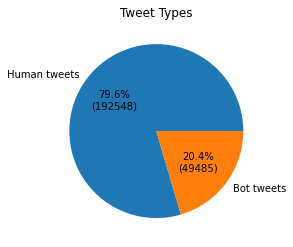

In [181]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

data = [len(human_tweets), len(bot_tweets)]
plt.pie(data, 
        labels = ['Human tweets', 'Bot tweets'],
        autopct = lambda pct: func(pct, data))
plt.title('Tweet Types')
plt.show()

In [5]:
def fixTime(tweets):
    newDates = []
    for oldDate in tweets['Date']:
        trimmedDate = oldDate
        if trimmedDate.find('+') != -1:
            trimmedDate = trimmedDate[0:trimmedDate.find('+')]
        newDates.append(datetime.datetime.strptime(trimmedDate, '%Y-%m-%d %H:%M:%S'))
    newDates = pd.DataFrame(newDates, columns=['Date'])
    tweets['Date'] = newDates
    return tweets

In [7]:
bot_tweets = fixTime(bot_tweets)
human_tweets = fixTime(human_tweets)

In [8]:
bot_users = pd.DataFrame(bot_tweets.User_ID.unique(), columns = ["ID"])
human_users = pd.DataFrame(human_tweets.User_ID.unique(), columns = ["ID"])

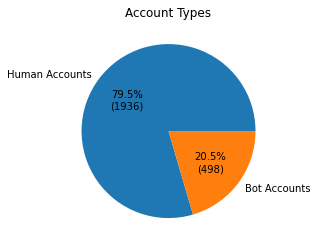

In [184]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

data = [len(human_users), len(bot_users)]
plt.pie(data, 
        labels = ['Human Accounts', 'Bot Accounts'],
        autopct = lambda pct: func(pct, data))
plt.title('Account Types')
plt.show()

In [9]:
def calculateAverageTweetLength(users, tweets):
    curr_ID = users['ID'][0]
    user_index = 0
    tweet_count = 0
    char_count = 0

    users['Average_Tweet_Length'] = 0
    for index, tweet in tweets.iterrows():
        if curr_ID != tweet['User_ID']:
            if tweet_count != 0:
                users['Average_Tweet_Length'][user_index] = char_count / tweet_count
            user_index += 1
            tweet_count = 0
            char_count = 0
            curr_ID = tweet['User_ID']
        tweet_count += 1
        char_count += len(tweet['Text'])

    if tweet_count != 0:
        users['Average_Tweet_Length'][user_index] = char_count / tweet_count
    
    return users

In [10]:
bot_users = calculateAverageTweetLength(bot_users, bot_tweets)

In [11]:
human_users = calculateAverageTweetLength(human_users, human_tweets)

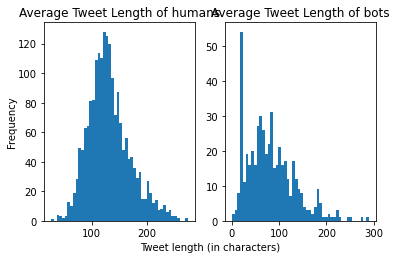

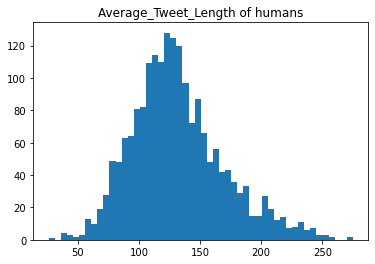

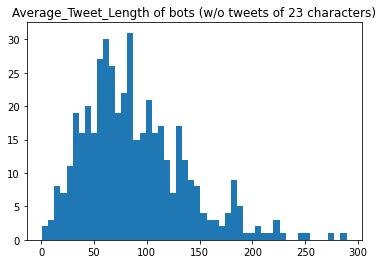

In [200]:
n_bins = 50

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(human_users['Average_Tweet_Length'], bins=n_bins)
axs[0].set_title('Average Tweet Length of humans')
axs[1].hist(bot_users['Average_Tweet_Length'], bins=n_bins)
axs[1].set_title('Average Tweet Length of bots')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Tweet length (in characters)')
plt.ylabel('Frequency')
plt.show()

plt.hist(human_users['Average_Tweet_Length'], bins=n_bins)
plt.title('Average_Tweet_Length of humans')
plt.show()

temp = bot_users[bot_users['Average_Tweet_Length'] != 23]
plt.hist(temp['Average_Tweet_Length'], bins=n_bins)
plt.title('Average_Tweet_Length of bots (w/o tweets of 23 characters)')
plt.show()


The peak in human tweets is likely due to Twitter's previous 140 character limit. <br />
Peak in bots is 23, images with no text <br />
Tweets also go beyond the current 280 character limit due to links, mentions, and images.

In [14]:
def calculateTweetFrequency(users, tweets):
    curr_ID = users['ID'][0]
    user_index = 0
    tweet_count = 0
    start_date = tweets['Date'][0]
    end_date = tweets['Date'][0]

    users['Average_Tweets_Per_Day'] = 0
    for index, tweet in tweets.iterrows():
        if curr_ID != tweet['User_ID']:
            if tweet_count != 0:
                users['Average_Tweets_Per_Day'][user_index] = tweet_count / ((start_date - end_date).days + 1)
            user_index += 1
            tweet_count = 0
            curr_ID = tweet['User_ID']
            start_date = tweet['Date']
        tweet_count += 1
        end_date = tweet['Date']

    if tweet_count != 0:
        users['Average_Tweets_Per_Day'][user_index] = tweet_count / ((start_date - end_date).days + 1)
    
    return users

Slight bias introduced as the timeframe is based on most and least recent tweets, two guaranteed points.

In [15]:
human_users = calculateTweetFrequency(human_users, human_tweets)
bot_users = calculateTweetFrequency(bot_users, bot_tweets)

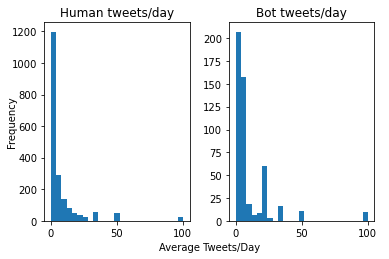

In [202]:
n_bins = 25

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(human_users['Average_Tweets_Per_Day'], bins=n_bins)
axs[0].set_title('Human tweets/day')
axs[1].hist(bot_users['Average_Tweets_Per_Day'], bins=n_bins)
axs[1].set_title('Bot tweets/day')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Average Tweets/Day')
plt.ylabel('Frequency')
plt.show()

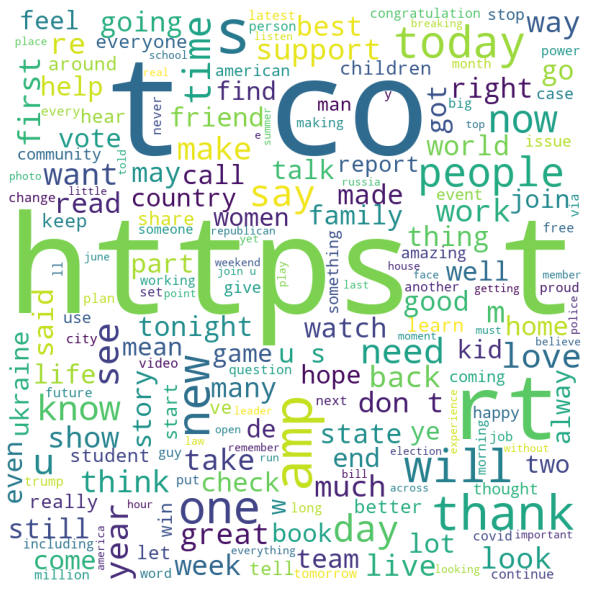

In [18]:
words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in human_tweets['Text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

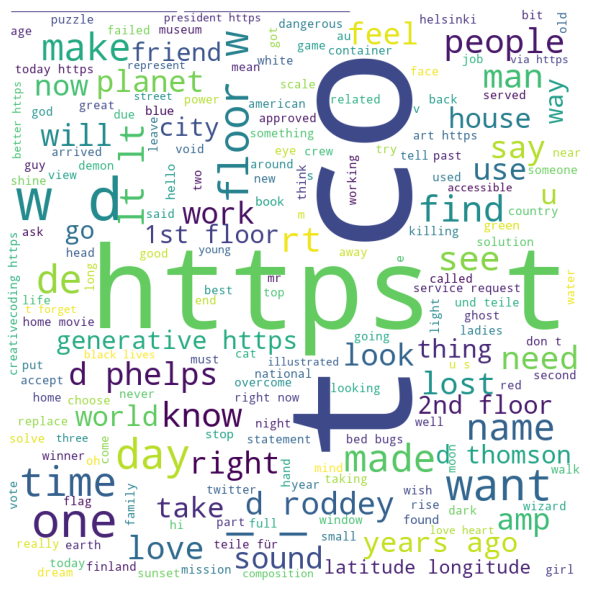

In [19]:
words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in bot_tweets['Text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Sentiment Analysis
https://www.red-gate.com/simple-talk/development/data-science-development/sentiment-analysis-python/

## Human Tweets

In [21]:
human_tweets["row_id"] = human_tweets.index + 1

#create a new data frame with "id" and "comment" fields
df_subset = human_tweets[['row_id', 'Text']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Text'] = df_subset['Text'].str.casefold()

/tmp/ipykernel_4210/1224465753.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")


In [22]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [24]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1

total_tweets = len(df_subset)
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
    print(str(index) + " out of " + str(total_tweets))
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']

Processing sentiment analysis...
0 out of 192549
1 out of 192549
2 out of 192549
3 out of 192549
4 out of 192549
5 out of 192549
6 out of 192549
7 out of 192549
8 out of 192549
9 out of 192549
10 out of 192549
11 out of 192549
12 out of 192549
13 out of 192549
14 out of 192549
15 out of 192549
16 out of 192549
17 out of 192549
18 out of 192549
19 out of 192549
20 out of 192549
21 out of 192549
22 out of 192549
23 out of 192549
24 out of 192549
25 out of 192549
26 out of 192549
27 out of 192549
28 out of 192549
29 out of 192549
30 out of 192549
31 out of 192549
32 out of 192549
33 out of 192549
34 out of 192549
35 out of 192549
36 out of 192549
37 out of 192549
38 out of 192549
39 out of 192549
40 out of 192549
41 out of 192549
42 out of 192549
43 out of 192549
44 out of 192549
45 out of 192549
46 out of 192549
47 out of 192549
48 out of 192549
49 out of 192549
50 out of 192549
51 out of 192549
52 out of 192549
53 out of 192549
54 out of 192549
55 out of 192549
56 out of 192549
57 out o

551 out of 192549
552 out of 192549
553 out of 192549
554 out of 192549
555 out of 192549
556 out of 192549
557 out of 192549
558 out of 192549
559 out of 192549
560 out of 192549
561 out of 192549
562 out of 192549
563 out of 192549
564 out of 192549
565 out of 192549
566 out of 192549
567 out of 192549
568 out of 192549
569 out of 192549
570 out of 192549
571 out of 192549
572 out of 192549
573 out of 192549
574 out of 192549
575 out of 192549
576 out of 192549
577 out of 192549
578 out of 192549
579 out of 192549
580 out of 192549
581 out of 192549
582 out of 192549
583 out of 192549
584 out of 192549
585 out of 192549
586 out of 192549
587 out of 192549
588 out of 192549
589 out of 192549
590 out of 192549
591 out of 192549
592 out of 192549
593 out of 192549
594 out of 192549
595 out of 192549
596 out of 192549
597 out of 192549
598 out of 192549
599 out of 192549
600 out of 192549
601 out of 192549
602 out of 192549
603 out of 192549
604 out of 192549
605 out of 192549
606 out of

1082 out of 192549
1083 out of 192549
1084 out of 192549
1085 out of 192549
1086 out of 192549
1087 out of 192549
1088 out of 192549
1089 out of 192549
1090 out of 192549
1091 out of 192549
1092 out of 192549
1093 out of 192549
1094 out of 192549
1095 out of 192549
1096 out of 192549
1097 out of 192549
1098 out of 192549
1099 out of 192549
1100 out of 192549
1101 out of 192549
1102 out of 192549
1103 out of 192549
1104 out of 192549
1105 out of 192549
1106 out of 192549
1107 out of 192549
1108 out of 192549
1109 out of 192549
1110 out of 192549
1111 out of 192549
1112 out of 192549
1113 out of 192549
1114 out of 192549
1115 out of 192549
1116 out of 192549
1117 out of 192549
1118 out of 192549
1119 out of 192549
1120 out of 192549
1121 out of 192549
1122 out of 192549
1123 out of 192549
1124 out of 192549
1125 out of 192549
1126 out of 192549
1127 out of 192549
1128 out of 192549
1129 out of 192549
1130 out of 192549
1131 out of 192549
1132 out of 192549
1133 out of 192549
1134 out of 

1583 out of 192549
1584 out of 192549
1585 out of 192549
1586 out of 192549
1587 out of 192549
1588 out of 192549
1589 out of 192549
1590 out of 192549
1591 out of 192549
1592 out of 192549
1593 out of 192549
1594 out of 192549
1595 out of 192549
1596 out of 192549
1597 out of 192549
1598 out of 192549
1599 out of 192549
1600 out of 192549
1601 out of 192549
1602 out of 192549
1603 out of 192549
1604 out of 192549
1605 out of 192549
1606 out of 192549
1607 out of 192549
1608 out of 192549
1609 out of 192549
1610 out of 192549
1611 out of 192549
1612 out of 192549
1613 out of 192549
1614 out of 192549
1615 out of 192549
1616 out of 192549
1617 out of 192549
1618 out of 192549
1619 out of 192549
1620 out of 192549
1621 out of 192549
1622 out of 192549
1623 out of 192549
1624 out of 192549
1625 out of 192549
1626 out of 192549
1627 out of 192549
1628 out of 192549
1629 out of 192549
1630 out of 192549
1631 out of 192549
1632 out of 192549
1633 out of 192549
1634 out of 192549
1635 out of 

2086 out of 192549
2087 out of 192549
2088 out of 192549
2089 out of 192549
2090 out of 192549
2091 out of 192549
2092 out of 192549
2093 out of 192549
2094 out of 192549
2095 out of 192549
2096 out of 192549
2097 out of 192549
2098 out of 192549
2099 out of 192549
2100 out of 192549
2101 out of 192549
2102 out of 192549
2103 out of 192549
2104 out of 192549
2105 out of 192549
2106 out of 192549
2107 out of 192549
2108 out of 192549
2109 out of 192549
2110 out of 192549
2111 out of 192549
2112 out of 192549
2113 out of 192549
2114 out of 192549
2115 out of 192549
2116 out of 192549
2117 out of 192549
2118 out of 192549
2119 out of 192549
2120 out of 192549
2121 out of 192549
2122 out of 192549
2123 out of 192549
2124 out of 192549
2125 out of 192549
2126 out of 192549
2127 out of 192549
2128 out of 192549
2129 out of 192549
2130 out of 192549
2131 out of 192549
2132 out of 192549
2133 out of 192549
2134 out of 192549
2135 out of 192549
2136 out of 192549
2137 out of 192549
2138 out of 

2562 out of 192549
2563 out of 192549
2564 out of 192549
2565 out of 192549
2566 out of 192549
2567 out of 192549
2568 out of 192549
2569 out of 192549
2570 out of 192549
2571 out of 192549
2572 out of 192549
2573 out of 192549
2574 out of 192549
2575 out of 192549
2576 out of 192549
2577 out of 192549
2578 out of 192549
2579 out of 192549
2580 out of 192549
2581 out of 192549
2582 out of 192549
2583 out of 192549
2584 out of 192549
2585 out of 192549
2586 out of 192549
2587 out of 192549
2588 out of 192549
2589 out of 192549
2590 out of 192549
2591 out of 192549
2592 out of 192549
2593 out of 192549
2594 out of 192549
2595 out of 192549
2596 out of 192549
2597 out of 192549
2598 out of 192549
2599 out of 192549
2600 out of 192549
2601 out of 192549
2602 out of 192549
2603 out of 192549
2604 out of 192549
2605 out of 192549
2606 out of 192549
2607 out of 192549
2608 out of 192549
2609 out of 192549
2610 out of 192549
2611 out of 192549
2612 out of 192549
2613 out of 192549
2614 out of 

3008 out of 192549
3009 out of 192549
3010 out of 192549
3011 out of 192549
3012 out of 192549
3013 out of 192549
3014 out of 192549
3015 out of 192549
3016 out of 192549
3017 out of 192549
3018 out of 192549
3019 out of 192549
3020 out of 192549
3021 out of 192549
3022 out of 192549
3023 out of 192549
3024 out of 192549
3025 out of 192549
3026 out of 192549
3027 out of 192549
3028 out of 192549
3029 out of 192549
3030 out of 192549
3031 out of 192549
3032 out of 192549
3033 out of 192549
3034 out of 192549
3035 out of 192549
3036 out of 192549
3037 out of 192549
3038 out of 192549
3039 out of 192549
3040 out of 192549
3041 out of 192549
3042 out of 192549
3043 out of 192549
3044 out of 192549
3045 out of 192549
3046 out of 192549
3047 out of 192549
3048 out of 192549
3049 out of 192549
3050 out of 192549
3051 out of 192549
3052 out of 192549
3053 out of 192549
3054 out of 192549
3055 out of 192549
3056 out of 192549
3057 out of 192549
3058 out of 192549
3059 out of 192549
3060 out of 

3478 out of 192549
3479 out of 192549
3480 out of 192549
3481 out of 192549
3482 out of 192549
3483 out of 192549
3484 out of 192549
3485 out of 192549
3486 out of 192549
3487 out of 192549
3488 out of 192549
3489 out of 192549
3490 out of 192549
3491 out of 192549
3492 out of 192549
3493 out of 192549
3494 out of 192549
3495 out of 192549
3496 out of 192549
3497 out of 192549
3498 out of 192549
3499 out of 192549
3500 out of 192549
3501 out of 192549
3502 out of 192549
3503 out of 192549
3504 out of 192549
3505 out of 192549
3506 out of 192549
3507 out of 192549
3508 out of 192549
3509 out of 192549
3510 out of 192549
3511 out of 192549
3512 out of 192549
3513 out of 192549
3514 out of 192549
3515 out of 192549
3516 out of 192549
3517 out of 192549
3518 out of 192549
3519 out of 192549
3520 out of 192549
3521 out of 192549
3522 out of 192549
3523 out of 192549
3524 out of 192549
3525 out of 192549
3526 out of 192549
3527 out of 192549
3528 out of 192549
3529 out of 192549
3530 out of 

3954 out of 192549
3955 out of 192549
3956 out of 192549
3957 out of 192549
3958 out of 192549
3959 out of 192549
3960 out of 192549
3961 out of 192549
3962 out of 192549
3963 out of 192549
3964 out of 192549
3965 out of 192549
3966 out of 192549
3967 out of 192549
3968 out of 192549
3969 out of 192549
3970 out of 192549
3971 out of 192549
3972 out of 192549
3973 out of 192549
3974 out of 192549
3975 out of 192549
3976 out of 192549
3977 out of 192549
3978 out of 192549
3979 out of 192549
3980 out of 192549
3981 out of 192549
3982 out of 192549
3983 out of 192549
3984 out of 192549
3985 out of 192549
3986 out of 192549
3987 out of 192549
3988 out of 192549
3989 out of 192549
3990 out of 192549
3991 out of 192549
3992 out of 192549
3993 out of 192549
3994 out of 192549
3995 out of 192549
3996 out of 192549
3997 out of 192549
3998 out of 192549
3999 out of 192549
4000 out of 192549
4001 out of 192549
4002 out of 192549
4003 out of 192549
4004 out of 192549
4005 out of 192549
4006 out of 

4407 out of 192549
4408 out of 192549
4409 out of 192549
4410 out of 192549
4411 out of 192549
4412 out of 192549
4413 out of 192549
4414 out of 192549
4415 out of 192549
4416 out of 192549
4417 out of 192549
4418 out of 192549
4419 out of 192549
4420 out of 192549
4421 out of 192549
4422 out of 192549
4423 out of 192549
4424 out of 192549
4425 out of 192549
4426 out of 192549
4427 out of 192549
4428 out of 192549
4429 out of 192549
4430 out of 192549
4431 out of 192549
4432 out of 192549
4433 out of 192549
4434 out of 192549
4435 out of 192549
4436 out of 192549
4437 out of 192549
4438 out of 192549
4439 out of 192549
4440 out of 192549
4441 out of 192549
4442 out of 192549
4443 out of 192549
4444 out of 192549
4445 out of 192549
4446 out of 192549
4447 out of 192549
4448 out of 192549
4449 out of 192549
4450 out of 192549
4451 out of 192549
4452 out of 192549
4453 out of 192549
4454 out of 192549
4455 out of 192549
4456 out of 192549
4457 out of 192549
4458 out of 192549
4459 out of 

4844 out of 192549
4845 out of 192549
4846 out of 192549
4847 out of 192549
4848 out of 192549
4849 out of 192549
4850 out of 192549
4851 out of 192549
4852 out of 192549
4853 out of 192549
4854 out of 192549
4855 out of 192549
4856 out of 192549
4857 out of 192549
4858 out of 192549
4859 out of 192549
4860 out of 192549
4861 out of 192549
4862 out of 192549
4863 out of 192549
4864 out of 192549
4865 out of 192549
4866 out of 192549
4867 out of 192549
4868 out of 192549
4869 out of 192549
4870 out of 192549
4871 out of 192549
4872 out of 192549
4873 out of 192549
4874 out of 192549
4875 out of 192549
4876 out of 192549
4877 out of 192549
4878 out of 192549
4879 out of 192549
4880 out of 192549
4881 out of 192549
4882 out of 192549
4883 out of 192549
4884 out of 192549
4885 out of 192549
4886 out of 192549
4887 out of 192549
4888 out of 192549
4889 out of 192549
4890 out of 192549
4891 out of 192549
4892 out of 192549
4893 out of 192549
4894 out of 192549
4895 out of 192549
4896 out of 

5281 out of 192549
5282 out of 192549
5283 out of 192549
5284 out of 192549
5285 out of 192549
5286 out of 192549
5287 out of 192549
5288 out of 192549
5289 out of 192549
5290 out of 192549
5291 out of 192549
5292 out of 192549
5293 out of 192549
5294 out of 192549
5295 out of 192549
5296 out of 192549
5297 out of 192549
5298 out of 192549
5299 out of 192549
5300 out of 192549
5301 out of 192549
5302 out of 192549
5303 out of 192549
5304 out of 192549
5305 out of 192549
5306 out of 192549
5307 out of 192549
5308 out of 192549
5309 out of 192549
5310 out of 192549
5311 out of 192549
5312 out of 192549
5313 out of 192549
5314 out of 192549
5315 out of 192549
5316 out of 192549
5317 out of 192549
5318 out of 192549
5319 out of 192549
5320 out of 192549
5321 out of 192549
5322 out of 192549
5323 out of 192549
5324 out of 192549
5325 out of 192549
5326 out of 192549
5327 out of 192549
5328 out of 192549
5329 out of 192549
5330 out of 192549
5331 out of 192549
5332 out of 192549
5333 out of 

5783 out of 192549
5784 out of 192549
5785 out of 192549
5786 out of 192549
5787 out of 192549
5788 out of 192549
5789 out of 192549
5790 out of 192549
5791 out of 192549
5792 out of 192549
5793 out of 192549
5794 out of 192549
5795 out of 192549
5796 out of 192549
5797 out of 192549
5798 out of 192549
5799 out of 192549
5800 out of 192549
5801 out of 192549
5802 out of 192549
5803 out of 192549
5804 out of 192549
5805 out of 192549
5806 out of 192549
5807 out of 192549
5808 out of 192549
5809 out of 192549
5810 out of 192549
5811 out of 192549
5812 out of 192549
5813 out of 192549
5814 out of 192549
5815 out of 192549
5816 out of 192549
5817 out of 192549
5818 out of 192549
5819 out of 192549
5820 out of 192549
5821 out of 192549
5822 out of 192549
5823 out of 192549
5824 out of 192549
5825 out of 192549
5826 out of 192549
5827 out of 192549
5828 out of 192549
5829 out of 192549
5830 out of 192549
5831 out of 192549
5832 out of 192549
5833 out of 192549
5834 out of 192549
5835 out of 

6233 out of 192549
6234 out of 192549
6235 out of 192549
6236 out of 192549
6237 out of 192549
6238 out of 192549
6239 out of 192549
6240 out of 192549
6241 out of 192549
6242 out of 192549
6243 out of 192549
6244 out of 192549
6245 out of 192549
6246 out of 192549
6247 out of 192549
6248 out of 192549
6249 out of 192549
6250 out of 192549
6251 out of 192549
6252 out of 192549
6253 out of 192549
6254 out of 192549
6255 out of 192549
6256 out of 192549
6257 out of 192549
6258 out of 192549
6259 out of 192549
6260 out of 192549
6261 out of 192549
6262 out of 192549
6263 out of 192549
6264 out of 192549
6265 out of 192549
6266 out of 192549
6267 out of 192549
6268 out of 192549
6269 out of 192549
6270 out of 192549
6271 out of 192549
6272 out of 192549
6273 out of 192549
6274 out of 192549
6275 out of 192549
6276 out of 192549
6277 out of 192549
6278 out of 192549
6279 out of 192549
6280 out of 192549
6281 out of 192549
6282 out of 192549
6283 out of 192549
6284 out of 192549
6285 out of 

6711 out of 192549
6712 out of 192549
6713 out of 192549
6714 out of 192549
6715 out of 192549
6716 out of 192549
6717 out of 192549
6718 out of 192549
6719 out of 192549
6720 out of 192549
6721 out of 192549
6722 out of 192549
6723 out of 192549
6724 out of 192549
6725 out of 192549
6726 out of 192549
6727 out of 192549
6728 out of 192549
6729 out of 192549
6730 out of 192549
6731 out of 192549
6732 out of 192549
6733 out of 192549
6734 out of 192549
6735 out of 192549
6736 out of 192549
6737 out of 192549
6738 out of 192549
6739 out of 192549
6740 out of 192549
6741 out of 192549
6742 out of 192549
6743 out of 192549
6744 out of 192549
6745 out of 192549
6746 out of 192549
6747 out of 192549
6748 out of 192549
6749 out of 192549
6750 out of 192549
6751 out of 192549
6752 out of 192549
6753 out of 192549
6754 out of 192549
6755 out of 192549
6756 out of 192549
6757 out of 192549
6758 out of 192549
6759 out of 192549
6760 out of 192549
6761 out of 192549
6762 out of 192549
6763 out of 

7183 out of 192549
7184 out of 192549
7185 out of 192549
7186 out of 192549
7187 out of 192549
7188 out of 192549
7189 out of 192549
7190 out of 192549
7191 out of 192549
7192 out of 192549
7193 out of 192549
7194 out of 192549
7195 out of 192549
7196 out of 192549
7197 out of 192549
7198 out of 192549
7199 out of 192549
7200 out of 192549
7201 out of 192549
7202 out of 192549
7203 out of 192549
7204 out of 192549
7205 out of 192549
7206 out of 192549
7207 out of 192549
7208 out of 192549
7209 out of 192549
7210 out of 192549
7211 out of 192549
7212 out of 192549
7213 out of 192549
7214 out of 192549
7215 out of 192549
7216 out of 192549
7217 out of 192549
7218 out of 192549
7219 out of 192549
7220 out of 192549
7221 out of 192549
7222 out of 192549
7223 out of 192549
7224 out of 192549
7225 out of 192549
7226 out of 192549
7227 out of 192549
7228 out of 192549
7229 out of 192549
7230 out of 192549
7231 out of 192549
7232 out of 192549
7233 out of 192549
7234 out of 192549
7235 out of 

7622 out of 192549
7623 out of 192549
7624 out of 192549
7625 out of 192549
7626 out of 192549
7627 out of 192549
7628 out of 192549
7629 out of 192549
7630 out of 192549
7631 out of 192549
7632 out of 192549
7633 out of 192549
7634 out of 192549
7635 out of 192549
7636 out of 192549
7637 out of 192549
7638 out of 192549
7639 out of 192549
7640 out of 192549
7641 out of 192549
7642 out of 192549
7643 out of 192549
7644 out of 192549
7645 out of 192549
7646 out of 192549
7647 out of 192549
7648 out of 192549
7649 out of 192549
7650 out of 192549
7651 out of 192549
7652 out of 192549
7653 out of 192549
7654 out of 192549
7655 out of 192549
7656 out of 192549
7657 out of 192549
7658 out of 192549
7659 out of 192549
7660 out of 192549
7661 out of 192549
7662 out of 192549
7663 out of 192549
7664 out of 192549
7665 out of 192549
7666 out of 192549
7667 out of 192549
7668 out of 192549
7669 out of 192549
7670 out of 192549
7671 out of 192549
7672 out of 192549
7673 out of 192549
7674 out of 

8078 out of 192549
8079 out of 192549
8080 out of 192549
8081 out of 192549
8082 out of 192549
8083 out of 192549
8084 out of 192549
8085 out of 192549
8086 out of 192549
8087 out of 192549
8088 out of 192549
8089 out of 192549
8090 out of 192549
8091 out of 192549
8092 out of 192549
8093 out of 192549
8094 out of 192549
8095 out of 192549
8096 out of 192549
8097 out of 192549
8098 out of 192549
8099 out of 192549
8100 out of 192549
8101 out of 192549
8102 out of 192549
8103 out of 192549
8104 out of 192549
8105 out of 192549
8106 out of 192549
8107 out of 192549
8108 out of 192549
8109 out of 192549
8110 out of 192549
8111 out of 192549
8112 out of 192549
8113 out of 192549
8114 out of 192549
8115 out of 192549
8116 out of 192549
8117 out of 192549
8118 out of 192549
8119 out of 192549
8120 out of 192549
8121 out of 192549
8122 out of 192549
8123 out of 192549
8124 out of 192549
8125 out of 192549
8126 out of 192549
8127 out of 192549
8128 out of 192549
8129 out of 192549
8130 out of 

8512 out of 192549
8513 out of 192549
8514 out of 192549
8515 out of 192549
8516 out of 192549
8517 out of 192549
8518 out of 192549
8519 out of 192549
8520 out of 192549
8521 out of 192549
8522 out of 192549
8523 out of 192549
8524 out of 192549
8525 out of 192549
8526 out of 192549
8527 out of 192549
8528 out of 192549
8529 out of 192549
8530 out of 192549
8531 out of 192549
8532 out of 192549
8533 out of 192549
8534 out of 192549
8535 out of 192549
8536 out of 192549
8537 out of 192549
8538 out of 192549
8539 out of 192549
8540 out of 192549
8541 out of 192549
8542 out of 192549
8543 out of 192549
8544 out of 192549
8545 out of 192549
8546 out of 192549
8547 out of 192549
8548 out of 192549
8549 out of 192549
8550 out of 192549
8551 out of 192549
8552 out of 192549
8553 out of 192549
8554 out of 192549
8555 out of 192549
8556 out of 192549
8557 out of 192549
8558 out of 192549
8559 out of 192549
8560 out of 192549
8561 out of 192549
8562 out of 192549
8563 out of 192549
8564 out of 

8995 out of 192549
8996 out of 192549
8997 out of 192549
8998 out of 192549
8999 out of 192549
9000 out of 192549
9001 out of 192549
9002 out of 192549
9003 out of 192549
9004 out of 192549
9005 out of 192549
9006 out of 192549
9007 out of 192549
9008 out of 192549
9009 out of 192549
9010 out of 192549
9011 out of 192549
9012 out of 192549
9013 out of 192549
9014 out of 192549
9015 out of 192549
9016 out of 192549
9017 out of 192549
9018 out of 192549
9019 out of 192549
9020 out of 192549
9021 out of 192549
9022 out of 192549
9023 out of 192549
9024 out of 192549
9025 out of 192549
9026 out of 192549
9027 out of 192549
9028 out of 192549
9029 out of 192549
9030 out of 192549
9031 out of 192549
9032 out of 192549
9033 out of 192549
9034 out of 192549
9035 out of 192549
9036 out of 192549
9037 out of 192549
9038 out of 192549
9039 out of 192549
9040 out of 192549
9041 out of 192549
9042 out of 192549
9043 out of 192549
9044 out of 192549
9045 out of 192549
9046 out of 192549
9047 out of 

9470 out of 192549
9471 out of 192549
9472 out of 192549
9473 out of 192549
9474 out of 192549
9475 out of 192549
9476 out of 192549
9477 out of 192549
9478 out of 192549
9479 out of 192549
9480 out of 192549
9481 out of 192549
9482 out of 192549
9483 out of 192549
9484 out of 192549
9485 out of 192549
9486 out of 192549
9487 out of 192549
9488 out of 192549
9489 out of 192549
9490 out of 192549
9491 out of 192549
9492 out of 192549
9493 out of 192549
9494 out of 192549
9495 out of 192549
9496 out of 192549
9497 out of 192549
9498 out of 192549
9499 out of 192549
9500 out of 192549
9501 out of 192549
9502 out of 192549
9503 out of 192549
9504 out of 192549
9505 out of 192549
9506 out of 192549
9507 out of 192549
9508 out of 192549
9509 out of 192549
9510 out of 192549
9511 out of 192549
9512 out of 192549
9513 out of 192549
9514 out of 192549
9515 out of 192549
9516 out of 192549
9517 out of 192549
9518 out of 192549
9519 out of 192549
9520 out of 192549
9521 out of 192549
9522 out of 

9958 out of 192549
9959 out of 192549
9960 out of 192549
9961 out of 192549
9962 out of 192549
9963 out of 192549
9964 out of 192549
9965 out of 192549
9966 out of 192549
9967 out of 192549
9968 out of 192549
9969 out of 192549
9970 out of 192549
9971 out of 192549
9972 out of 192549
9973 out of 192549
9974 out of 192549
9975 out of 192549
9976 out of 192549
9977 out of 192549
9978 out of 192549
9979 out of 192549
9980 out of 192549
9981 out of 192549
9982 out of 192549
9983 out of 192549
9984 out of 192549
9985 out of 192549
9986 out of 192549
9987 out of 192549
9988 out of 192549
9989 out of 192549
9990 out of 192549
9991 out of 192549
9992 out of 192549
9993 out of 192549
9994 out of 192549
9995 out of 192549
9996 out of 192549
9997 out of 192549
9998 out of 192549
9999 out of 192549
10000 out of 192549
10001 out of 192549
10002 out of 192549
10003 out of 192549
10004 out of 192549
10005 out of 192549
10006 out of 192549
10007 out of 192549
10008 out of 192549
10009 out of 192549
10

10378 out of 192549
10379 out of 192549
10380 out of 192549
10381 out of 192549
10382 out of 192549
10383 out of 192549
10384 out of 192549
10385 out of 192549
10386 out of 192549
10387 out of 192549
10388 out of 192549
10389 out of 192549
10390 out of 192549
10391 out of 192549
10392 out of 192549
10393 out of 192549
10394 out of 192549
10395 out of 192549
10396 out of 192549
10397 out of 192549
10398 out of 192549
10399 out of 192549
10400 out of 192549
10401 out of 192549
10402 out of 192549
10403 out of 192549
10404 out of 192549
10405 out of 192549
10406 out of 192549
10407 out of 192549
10408 out of 192549
10409 out of 192549
10410 out of 192549
10411 out of 192549
10412 out of 192549
10413 out of 192549
10414 out of 192549
10415 out of 192549
10416 out of 192549
10417 out of 192549
10418 out of 192549
10419 out of 192549
10420 out of 192549
10421 out of 192549
10422 out of 192549
10423 out of 192549
10424 out of 192549
10425 out of 192549
10426 out of 192549
10427 out of 192549


10844 out of 192549
10845 out of 192549
10846 out of 192549
10847 out of 192549
10848 out of 192549
10849 out of 192549
10850 out of 192549
10851 out of 192549
10852 out of 192549
10853 out of 192549
10854 out of 192549
10855 out of 192549
10856 out of 192549
10857 out of 192549
10858 out of 192549
10859 out of 192549
10860 out of 192549
10861 out of 192549
10862 out of 192549
10863 out of 192549
10864 out of 192549
10865 out of 192549
10866 out of 192549
10867 out of 192549
10868 out of 192549
10869 out of 192549
10870 out of 192549
10871 out of 192549
10872 out of 192549
10873 out of 192549
10874 out of 192549
10875 out of 192549
10876 out of 192549
10877 out of 192549
10878 out of 192549
10879 out of 192549
10880 out of 192549
10881 out of 192549
10882 out of 192549
10883 out of 192549
10884 out of 192549
10885 out of 192549
10886 out of 192549
10887 out of 192549
10888 out of 192549
10889 out of 192549
10890 out of 192549
10891 out of 192549
10892 out of 192549
10893 out of 192549


11297 out of 192549
11298 out of 192549
11299 out of 192549
11300 out of 192549
11301 out of 192549
11302 out of 192549
11303 out of 192549
11304 out of 192549
11305 out of 192549
11306 out of 192549
11307 out of 192549
11308 out of 192549
11309 out of 192549
11310 out of 192549
11311 out of 192549
11312 out of 192549
11313 out of 192549
11314 out of 192549
11315 out of 192549
11316 out of 192549
11317 out of 192549
11318 out of 192549
11319 out of 192549
11320 out of 192549
11321 out of 192549
11322 out of 192549
11323 out of 192549
11324 out of 192549
11325 out of 192549
11326 out of 192549
11327 out of 192549
11328 out of 192549
11329 out of 192549
11330 out of 192549
11331 out of 192549
11332 out of 192549
11333 out of 192549
11334 out of 192549
11335 out of 192549
11336 out of 192549
11337 out of 192549
11338 out of 192549
11339 out of 192549
11340 out of 192549
11341 out of 192549
11342 out of 192549
11343 out of 192549
11344 out of 192549
11345 out of 192549
11346 out of 192549


11738 out of 192549
11739 out of 192549
11740 out of 192549
11741 out of 192549
11742 out of 192549
11743 out of 192549
11744 out of 192549
11745 out of 192549
11746 out of 192549
11747 out of 192549
11748 out of 192549
11749 out of 192549
11750 out of 192549
11751 out of 192549
11752 out of 192549
11753 out of 192549
11754 out of 192549
11755 out of 192549
11756 out of 192549
11757 out of 192549
11758 out of 192549
11759 out of 192549
11760 out of 192549
11761 out of 192549
11762 out of 192549
11763 out of 192549
11764 out of 192549
11765 out of 192549
11766 out of 192549
11767 out of 192549
11768 out of 192549
11769 out of 192549
11770 out of 192549
11771 out of 192549
11772 out of 192549
11773 out of 192549
11774 out of 192549
11775 out of 192549
11776 out of 192549
11777 out of 192549
11778 out of 192549
11779 out of 192549
11780 out of 192549
11781 out of 192549
11782 out of 192549
11783 out of 192549
11784 out of 192549
11785 out of 192549
11786 out of 192549
11787 out of 192549


12158 out of 192549
12159 out of 192549
12160 out of 192549
12161 out of 192549
12162 out of 192549
12163 out of 192549
12164 out of 192549
12165 out of 192549
12166 out of 192549
12167 out of 192549
12168 out of 192549
12169 out of 192549
12170 out of 192549
12171 out of 192549
12172 out of 192549
12173 out of 192549
12174 out of 192549
12175 out of 192549
12176 out of 192549
12177 out of 192549
12178 out of 192549
12179 out of 192549
12180 out of 192549
12181 out of 192549
12182 out of 192549
12183 out of 192549
12184 out of 192549
12185 out of 192549
12186 out of 192549
12187 out of 192549
12188 out of 192549
12189 out of 192549
12190 out of 192549
12191 out of 192549
12192 out of 192549
12193 out of 192549
12194 out of 192549
12195 out of 192549
12196 out of 192549
12197 out of 192549
12198 out of 192549
12199 out of 192549
12200 out of 192549
12201 out of 192549
12202 out of 192549
12203 out of 192549
12204 out of 192549
12205 out of 192549
12206 out of 192549
12207 out of 192549


12615 out of 192549
12616 out of 192549
12617 out of 192549
12618 out of 192549
12619 out of 192549
12620 out of 192549
12621 out of 192549
12622 out of 192549
12623 out of 192549
12624 out of 192549
12625 out of 192549
12626 out of 192549
12627 out of 192549
12628 out of 192549
12629 out of 192549
12630 out of 192549
12631 out of 192549
12632 out of 192549
12633 out of 192549
12634 out of 192549
12635 out of 192549
12636 out of 192549
12637 out of 192549
12638 out of 192549
12639 out of 192549
12640 out of 192549
12641 out of 192549
12642 out of 192549
12643 out of 192549
12644 out of 192549
12645 out of 192549
12646 out of 192549
12647 out of 192549
12648 out of 192549
12649 out of 192549
12650 out of 192549
12651 out of 192549
12652 out of 192549
12653 out of 192549
12654 out of 192549
12655 out of 192549
12656 out of 192549
12657 out of 192549
12658 out of 192549
12659 out of 192549
12660 out of 192549
12661 out of 192549
12662 out of 192549
12663 out of 192549
12664 out of 192549


13025 out of 192549
13026 out of 192549
13027 out of 192549
13028 out of 192549
13029 out of 192549
13030 out of 192549
13031 out of 192549
13032 out of 192549
13033 out of 192549
13034 out of 192549
13035 out of 192549
13036 out of 192549
13037 out of 192549
13038 out of 192549
13039 out of 192549
13040 out of 192549
13041 out of 192549
13042 out of 192549
13043 out of 192549
13044 out of 192549
13045 out of 192549
13046 out of 192549
13047 out of 192549
13048 out of 192549
13049 out of 192549
13050 out of 192549
13051 out of 192549
13052 out of 192549
13053 out of 192549
13054 out of 192549
13055 out of 192549
13056 out of 192549
13057 out of 192549
13058 out of 192549
13059 out of 192549
13060 out of 192549
13061 out of 192549
13062 out of 192549
13063 out of 192549
13064 out of 192549
13065 out of 192549
13066 out of 192549
13067 out of 192549
13068 out of 192549
13069 out of 192549
13070 out of 192549
13071 out of 192549
13072 out of 192549
13073 out of 192549
13074 out of 192549


13474 out of 192549
13475 out of 192549
13476 out of 192549
13477 out of 192549
13478 out of 192549
13479 out of 192549
13480 out of 192549
13481 out of 192549
13482 out of 192549
13483 out of 192549
13484 out of 192549
13485 out of 192549
13486 out of 192549
13487 out of 192549
13488 out of 192549
13489 out of 192549
13490 out of 192549
13491 out of 192549
13492 out of 192549
13493 out of 192549
13494 out of 192549
13495 out of 192549
13496 out of 192549
13497 out of 192549
13498 out of 192549
13499 out of 192549
13500 out of 192549
13501 out of 192549
13502 out of 192549
13503 out of 192549
13504 out of 192549
13505 out of 192549
13506 out of 192549
13507 out of 192549
13508 out of 192549
13509 out of 192549
13510 out of 192549
13511 out of 192549
13512 out of 192549
13513 out of 192549
13514 out of 192549
13515 out of 192549
13516 out of 192549
13517 out of 192549
13518 out of 192549
13519 out of 192549
13520 out of 192549
13521 out of 192549
13522 out of 192549
13523 out of 192549


13884 out of 192549
13885 out of 192549
13886 out of 192549
13887 out of 192549
13888 out of 192549
13889 out of 192549
13890 out of 192549
13891 out of 192549
13892 out of 192549
13893 out of 192549
13894 out of 192549
13895 out of 192549
13896 out of 192549
13897 out of 192549
13898 out of 192549
13899 out of 192549
13900 out of 192549
13901 out of 192549
13902 out of 192549
13903 out of 192549
13904 out of 192549
13905 out of 192549
13906 out of 192549
13907 out of 192549
13908 out of 192549
13909 out of 192549
13910 out of 192549
13911 out of 192549
13912 out of 192549
13913 out of 192549
13914 out of 192549
13915 out of 192549
13916 out of 192549
13917 out of 192549
13918 out of 192549
13919 out of 192549
13920 out of 192549
13921 out of 192549
13922 out of 192549
13923 out of 192549
13924 out of 192549
13925 out of 192549
13926 out of 192549
13927 out of 192549
13928 out of 192549
13929 out of 192549
13930 out of 192549
13931 out of 192549
13932 out of 192549
13933 out of 192549


14336 out of 192549
14337 out of 192549
14338 out of 192549
14339 out of 192549
14340 out of 192549
14341 out of 192549
14342 out of 192549
14343 out of 192549
14344 out of 192549
14345 out of 192549
14346 out of 192549
14347 out of 192549
14348 out of 192549
14349 out of 192549
14350 out of 192549
14351 out of 192549
14352 out of 192549
14353 out of 192549
14354 out of 192549
14355 out of 192549
14356 out of 192549
14357 out of 192549
14358 out of 192549
14359 out of 192549
14360 out of 192549
14361 out of 192549
14362 out of 192549
14363 out of 192549
14364 out of 192549
14365 out of 192549
14366 out of 192549
14367 out of 192549
14368 out of 192549
14369 out of 192549
14370 out of 192549
14371 out of 192549
14372 out of 192549
14373 out of 192549
14374 out of 192549
14375 out of 192549
14376 out of 192549
14377 out of 192549
14378 out of 192549
14379 out of 192549
14380 out of 192549
14381 out of 192549
14382 out of 192549
14383 out of 192549
14384 out of 192549
14385 out of 192549


14761 out of 192549
14762 out of 192549
14763 out of 192549
14764 out of 192549
14765 out of 192549
14766 out of 192549
14767 out of 192549
14768 out of 192549
14769 out of 192549
14770 out of 192549
14771 out of 192549
14772 out of 192549
14773 out of 192549
14774 out of 192549
14775 out of 192549
14776 out of 192549
14777 out of 192549
14778 out of 192549
14779 out of 192549
14780 out of 192549
14781 out of 192549
14782 out of 192549
14783 out of 192549
14784 out of 192549
14785 out of 192549
14786 out of 192549
14787 out of 192549
14788 out of 192549
14789 out of 192549
14790 out of 192549
14791 out of 192549
14792 out of 192549
14793 out of 192549
14794 out of 192549
14795 out of 192549
14796 out of 192549
14797 out of 192549
14798 out of 192549
14799 out of 192549
14800 out of 192549
14801 out of 192549
14802 out of 192549
14803 out of 192549
14804 out of 192549
14805 out of 192549
14806 out of 192549
14807 out of 192549
14808 out of 192549
14809 out of 192549
14810 out of 192549


15180 out of 192549
15181 out of 192549
15182 out of 192549
15183 out of 192549
15184 out of 192549
15185 out of 192549
15186 out of 192549
15187 out of 192549
15188 out of 192549
15189 out of 192549
15190 out of 192549
15191 out of 192549
15192 out of 192549
15193 out of 192549
15194 out of 192549
15195 out of 192549
15196 out of 192549
15197 out of 192549
15198 out of 192549
15199 out of 192549
15200 out of 192549
15201 out of 192549
15202 out of 192549
15203 out of 192549
15204 out of 192549
15205 out of 192549
15206 out of 192549
15207 out of 192549
15208 out of 192549
15209 out of 192549
15210 out of 192549
15211 out of 192549
15212 out of 192549
15213 out of 192549
15214 out of 192549
15215 out of 192549
15216 out of 192549
15217 out of 192549
15218 out of 192549
15219 out of 192549
15220 out of 192549
15221 out of 192549
15222 out of 192549
15223 out of 192549
15224 out of 192549
15225 out of 192549
15226 out of 192549
15227 out of 192549
15228 out of 192549
15229 out of 192549


15598 out of 192549
15599 out of 192549
15600 out of 192549
15601 out of 192549
15602 out of 192549
15603 out of 192549
15604 out of 192549
15605 out of 192549
15606 out of 192549
15607 out of 192549
15608 out of 192549
15609 out of 192549
15610 out of 192549
15611 out of 192549
15612 out of 192549
15613 out of 192549
15614 out of 192549
15615 out of 192549
15616 out of 192549
15617 out of 192549
15618 out of 192549
15619 out of 192549
15620 out of 192549
15621 out of 192549
15622 out of 192549
15623 out of 192549
15624 out of 192549
15625 out of 192549
15626 out of 192549
15627 out of 192549
15628 out of 192549
15629 out of 192549
15630 out of 192549
15631 out of 192549
15632 out of 192549
15633 out of 192549
15634 out of 192549
15635 out of 192549
15636 out of 192549
15637 out of 192549
15638 out of 192549
15639 out of 192549
15640 out of 192549
15641 out of 192549
15642 out of 192549
15643 out of 192549
15644 out of 192549
15645 out of 192549
15646 out of 192549
15647 out of 192549


16008 out of 192549
16009 out of 192549
16010 out of 192549
16011 out of 192549
16012 out of 192549
16013 out of 192549
16014 out of 192549
16015 out of 192549
16016 out of 192549
16017 out of 192549
16018 out of 192549
16019 out of 192549
16020 out of 192549
16021 out of 192549
16022 out of 192549
16023 out of 192549
16024 out of 192549
16025 out of 192549
16026 out of 192549
16027 out of 192549
16028 out of 192549
16029 out of 192549
16030 out of 192549
16031 out of 192549
16032 out of 192549
16033 out of 192549
16034 out of 192549
16035 out of 192549
16036 out of 192549
16037 out of 192549
16038 out of 192549
16039 out of 192549
16040 out of 192549
16041 out of 192549
16042 out of 192549
16043 out of 192549
16044 out of 192549
16045 out of 192549
16046 out of 192549
16047 out of 192549
16048 out of 192549
16049 out of 192549
16050 out of 192549
16051 out of 192549
16052 out of 192549
16053 out of 192549
16054 out of 192549
16055 out of 192549
16056 out of 192549
16057 out of 192549


16452 out of 192549
16453 out of 192549
16454 out of 192549
16455 out of 192549
16456 out of 192549
16457 out of 192549
16458 out of 192549
16459 out of 192549
16460 out of 192549
16461 out of 192549
16462 out of 192549
16463 out of 192549
16464 out of 192549
16465 out of 192549
16466 out of 192549
16467 out of 192549
16468 out of 192549
16469 out of 192549
16470 out of 192549
16471 out of 192549
16472 out of 192549
16473 out of 192549
16474 out of 192549
16475 out of 192549
16476 out of 192549
16477 out of 192549
16478 out of 192549
16479 out of 192549
16480 out of 192549
16481 out of 192549
16482 out of 192549
16483 out of 192549
16484 out of 192549
16485 out of 192549
16486 out of 192549
16487 out of 192549
16488 out of 192549
16489 out of 192549
16490 out of 192549
16491 out of 192549
16492 out of 192549
16493 out of 192549
16494 out of 192549
16495 out of 192549
16496 out of 192549
16497 out of 192549
16498 out of 192549
16499 out of 192549
16500 out of 192549
16501 out of 192549


16892 out of 192549
16893 out of 192549
16894 out of 192549
16895 out of 192549
16896 out of 192549
16897 out of 192549
16898 out of 192549
16899 out of 192549
16900 out of 192549
16901 out of 192549
16902 out of 192549
16903 out of 192549
16904 out of 192549
16905 out of 192549
16906 out of 192549
16907 out of 192549
16908 out of 192549
16909 out of 192549
16910 out of 192549
16911 out of 192549
16912 out of 192549
16913 out of 192549
16914 out of 192549
16915 out of 192549
16916 out of 192549
16917 out of 192549
16918 out of 192549
16919 out of 192549
16920 out of 192549
16921 out of 192549
16922 out of 192549
16923 out of 192549
16924 out of 192549
16925 out of 192549
16926 out of 192549
16927 out of 192549
16928 out of 192549
16929 out of 192549
16930 out of 192549
16931 out of 192549
16932 out of 192549
16933 out of 192549
16934 out of 192549
16935 out of 192549
16936 out of 192549
16937 out of 192549
16938 out of 192549
16939 out of 192549
16940 out of 192549
16941 out of 192549


17328 out of 192549
17329 out of 192549
17330 out of 192549
17331 out of 192549
17332 out of 192549
17333 out of 192549
17334 out of 192549
17335 out of 192549
17336 out of 192549
17337 out of 192549
17338 out of 192549
17339 out of 192549
17340 out of 192549
17341 out of 192549
17342 out of 192549
17343 out of 192549
17344 out of 192549
17345 out of 192549
17346 out of 192549
17347 out of 192549
17348 out of 192549
17349 out of 192549
17350 out of 192549
17351 out of 192549
17352 out of 192549
17353 out of 192549
17354 out of 192549
17355 out of 192549
17356 out of 192549
17357 out of 192549
17358 out of 192549
17359 out of 192549
17360 out of 192549
17361 out of 192549
17362 out of 192549
17363 out of 192549
17364 out of 192549
17365 out of 192549
17366 out of 192549
17367 out of 192549
17368 out of 192549
17369 out of 192549
17370 out of 192549
17371 out of 192549
17372 out of 192549
17373 out of 192549
17374 out of 192549
17375 out of 192549
17376 out of 192549
17377 out of 192549


17740 out of 192549
17741 out of 192549
17742 out of 192549
17743 out of 192549
17744 out of 192549
17745 out of 192549
17746 out of 192549
17747 out of 192549
17748 out of 192549
17749 out of 192549
17750 out of 192549
17751 out of 192549
17752 out of 192549
17753 out of 192549
17754 out of 192549
17755 out of 192549
17756 out of 192549
17757 out of 192549
17758 out of 192549
17759 out of 192549
17760 out of 192549
17761 out of 192549
17762 out of 192549
17763 out of 192549
17764 out of 192549
17765 out of 192549
17766 out of 192549
17767 out of 192549
17768 out of 192549
17769 out of 192549
17770 out of 192549
17771 out of 192549
17772 out of 192549
17773 out of 192549
17774 out of 192549
17775 out of 192549
17776 out of 192549
17777 out of 192549
17778 out of 192549
17779 out of 192549
17780 out of 192549
17781 out of 192549
17782 out of 192549
17783 out of 192549
17784 out of 192549
17785 out of 192549
17786 out of 192549
17787 out of 192549
17788 out of 192549
17789 out of 192549


18164 out of 192549
18165 out of 192549
18166 out of 192549
18167 out of 192549
18168 out of 192549
18169 out of 192549
18170 out of 192549
18171 out of 192549
18172 out of 192549
18173 out of 192549
18174 out of 192549
18175 out of 192549
18176 out of 192549
18177 out of 192549
18178 out of 192549
18179 out of 192549
18180 out of 192549
18181 out of 192549
18182 out of 192549
18183 out of 192549
18184 out of 192549
18185 out of 192549
18186 out of 192549
18187 out of 192549
18188 out of 192549
18189 out of 192549
18190 out of 192549
18191 out of 192549
18192 out of 192549
18193 out of 192549
18194 out of 192549
18195 out of 192549
18196 out of 192549
18197 out of 192549
18198 out of 192549
18199 out of 192549
18200 out of 192549
18201 out of 192549
18202 out of 192549
18203 out of 192549
18204 out of 192549
18205 out of 192549
18206 out of 192549
18207 out of 192549
18208 out of 192549
18209 out of 192549
18210 out of 192549
18211 out of 192549
18212 out of 192549
18213 out of 192549


18586 out of 192549
18587 out of 192549
18588 out of 192549
18589 out of 192549
18590 out of 192549
18591 out of 192549
18592 out of 192549
18593 out of 192549
18594 out of 192549
18595 out of 192549
18596 out of 192549
18597 out of 192549
18598 out of 192549
18599 out of 192549
18600 out of 192549
18601 out of 192549
18602 out of 192549
18603 out of 192549
18604 out of 192549
18605 out of 192549
18606 out of 192549
18607 out of 192549
18608 out of 192549
18609 out of 192549
18610 out of 192549
18611 out of 192549
18612 out of 192549
18613 out of 192549
18614 out of 192549
18615 out of 192549
18616 out of 192549
18617 out of 192549
18618 out of 192549
18619 out of 192549
18620 out of 192549
18621 out of 192549
18622 out of 192549
18623 out of 192549
18624 out of 192549
18625 out of 192549
18626 out of 192549
18627 out of 192549
18628 out of 192549
18629 out of 192549
18630 out of 192549
18631 out of 192549
18632 out of 192549
18633 out of 192549
18634 out of 192549
18635 out of 192549


19017 out of 192549
19018 out of 192549
19019 out of 192549
19020 out of 192549
19021 out of 192549
19022 out of 192549
19023 out of 192549
19024 out of 192549
19025 out of 192549
19026 out of 192549
19027 out of 192549
19028 out of 192549
19029 out of 192549
19030 out of 192549
19031 out of 192549
19032 out of 192549
19033 out of 192549
19034 out of 192549
19035 out of 192549
19036 out of 192549
19037 out of 192549
19038 out of 192549
19039 out of 192549
19040 out of 192549
19041 out of 192549
19042 out of 192549
19043 out of 192549
19044 out of 192549
19045 out of 192549
19046 out of 192549
19047 out of 192549
19048 out of 192549
19049 out of 192549
19050 out of 192549
19051 out of 192549
19052 out of 192549
19053 out of 192549
19054 out of 192549
19055 out of 192549
19056 out of 192549
19057 out of 192549
19058 out of 192549
19059 out of 192549
19060 out of 192549
19061 out of 192549
19062 out of 192549
19063 out of 192549
19064 out of 192549
19065 out of 192549
19066 out of 192549


19444 out of 192549
19445 out of 192549
19446 out of 192549
19447 out of 192549
19448 out of 192549
19449 out of 192549
19450 out of 192549
19451 out of 192549
19452 out of 192549
19453 out of 192549
19454 out of 192549
19455 out of 192549
19456 out of 192549
19457 out of 192549
19458 out of 192549
19459 out of 192549
19460 out of 192549
19461 out of 192549
19462 out of 192549
19463 out of 192549
19464 out of 192549
19465 out of 192549
19466 out of 192549
19467 out of 192549
19468 out of 192549
19469 out of 192549
19470 out of 192549
19471 out of 192549
19472 out of 192549
19473 out of 192549
19474 out of 192549
19475 out of 192549
19476 out of 192549
19477 out of 192549
19478 out of 192549
19479 out of 192549
19480 out of 192549
19481 out of 192549
19482 out of 192549
19483 out of 192549
19484 out of 192549
19485 out of 192549
19486 out of 192549
19487 out of 192549
19488 out of 192549
19489 out of 192549
19490 out of 192549
19491 out of 192549
19492 out of 192549
19493 out of 192549


19870 out of 192549
19871 out of 192549
19872 out of 192549
19873 out of 192549
19874 out of 192549
19875 out of 192549
19876 out of 192549
19877 out of 192549
19878 out of 192549
19879 out of 192549
19880 out of 192549
19881 out of 192549
19882 out of 192549
19883 out of 192549
19884 out of 192549
19885 out of 192549
19886 out of 192549
19887 out of 192549
19888 out of 192549
19889 out of 192549
19890 out of 192549
19891 out of 192549
19892 out of 192549
19893 out of 192549
19894 out of 192549
19895 out of 192549
19896 out of 192549
19897 out of 192549
19898 out of 192549
19899 out of 192549
19900 out of 192549
19901 out of 192549
19902 out of 192549
19903 out of 192549
19904 out of 192549
19905 out of 192549
19906 out of 192549
19907 out of 192549
19908 out of 192549
19909 out of 192549
19910 out of 192549
19911 out of 192549
19912 out of 192549
19913 out of 192549
19914 out of 192549
19915 out of 192549
19916 out of 192549
19917 out of 192549
19918 out of 192549
19919 out of 192549


20322 out of 192549
20323 out of 192549
20324 out of 192549
20325 out of 192549
20326 out of 192549
20327 out of 192549
20328 out of 192549
20329 out of 192549
20330 out of 192549
20331 out of 192549
20332 out of 192549
20333 out of 192549
20334 out of 192549
20335 out of 192549
20336 out of 192549
20337 out of 192549
20338 out of 192549
20339 out of 192549
20340 out of 192549
20341 out of 192549
20342 out of 192549
20343 out of 192549
20344 out of 192549
20345 out of 192549
20346 out of 192549
20347 out of 192549
20348 out of 192549
20349 out of 192549
20350 out of 192549
20351 out of 192549
20352 out of 192549
20353 out of 192549
20354 out of 192549
20355 out of 192549
20356 out of 192549
20357 out of 192549
20358 out of 192549
20359 out of 192549
20360 out of 192549
20361 out of 192549
20362 out of 192549
20363 out of 192549
20364 out of 192549
20365 out of 192549
20366 out of 192549
20367 out of 192549
20368 out of 192549
20369 out of 192549
20370 out of 192549
20371 out of 192549


20769 out of 192549
20770 out of 192549
20771 out of 192549
20772 out of 192549
20773 out of 192549
20774 out of 192549
20775 out of 192549
20776 out of 192549
20777 out of 192549
20778 out of 192549
20779 out of 192549
20780 out of 192549
20781 out of 192549
20782 out of 192549
20783 out of 192549
20784 out of 192549
20785 out of 192549
20786 out of 192549
20787 out of 192549
20788 out of 192549
20789 out of 192549
20790 out of 192549
20791 out of 192549
20792 out of 192549
20793 out of 192549
20794 out of 192549
20795 out of 192549
20796 out of 192549
20797 out of 192549
20798 out of 192549
20799 out of 192549
20800 out of 192549
20801 out of 192549
20802 out of 192549
20803 out of 192549
20804 out of 192549
20805 out of 192549
20806 out of 192549
20807 out of 192549
20808 out of 192549
20809 out of 192549
20810 out of 192549
20811 out of 192549
20812 out of 192549
20813 out of 192549
20814 out of 192549
20815 out of 192549
20816 out of 192549
20817 out of 192549
20818 out of 192549


21199 out of 192549
21200 out of 192549
21201 out of 192549
21202 out of 192549
21203 out of 192549
21204 out of 192549
21205 out of 192549
21206 out of 192549
21207 out of 192549
21208 out of 192549
21209 out of 192549
21210 out of 192549
21211 out of 192549
21212 out of 192549
21213 out of 192549
21214 out of 192549
21215 out of 192549
21216 out of 192549
21217 out of 192549
21218 out of 192549
21219 out of 192549
21220 out of 192549
21221 out of 192549
21222 out of 192549
21223 out of 192549
21224 out of 192549
21225 out of 192549
21226 out of 192549
21227 out of 192549
21228 out of 192549
21229 out of 192549
21230 out of 192549
21231 out of 192549
21232 out of 192549
21233 out of 192549
21234 out of 192549
21235 out of 192549
21236 out of 192549
21237 out of 192549
21238 out of 192549
21239 out of 192549
21240 out of 192549
21241 out of 192549
21242 out of 192549
21243 out of 192549
21244 out of 192549
21245 out of 192549
21246 out of 192549
21247 out of 192549
21248 out of 192549


21638 out of 192549
21639 out of 192549
21640 out of 192549
21641 out of 192549
21642 out of 192549
21643 out of 192549
21644 out of 192549
21645 out of 192549
21646 out of 192549
21647 out of 192549
21648 out of 192549
21649 out of 192549
21650 out of 192549
21651 out of 192549
21652 out of 192549
21653 out of 192549
21654 out of 192549
21655 out of 192549
21656 out of 192549
21657 out of 192549
21658 out of 192549
21659 out of 192549
21660 out of 192549
21661 out of 192549
21662 out of 192549
21663 out of 192549
21664 out of 192549
21665 out of 192549
21666 out of 192549
21667 out of 192549
21668 out of 192549
21669 out of 192549
21670 out of 192549
21671 out of 192549
21672 out of 192549
21673 out of 192549
21674 out of 192549
21675 out of 192549
21676 out of 192549
21677 out of 192549
21678 out of 192549
21679 out of 192549
21680 out of 192549
21681 out of 192549
21682 out of 192549
21683 out of 192549
21684 out of 192549
21685 out of 192549
21686 out of 192549
21687 out of 192549


22069 out of 192549
22070 out of 192549
22071 out of 192549
22072 out of 192549
22073 out of 192549
22074 out of 192549
22075 out of 192549
22076 out of 192549
22077 out of 192549
22078 out of 192549
22079 out of 192549
22080 out of 192549
22081 out of 192549
22082 out of 192549
22083 out of 192549
22084 out of 192549
22085 out of 192549
22086 out of 192549
22087 out of 192549
22088 out of 192549
22089 out of 192549
22090 out of 192549
22091 out of 192549
22092 out of 192549
22093 out of 192549
22094 out of 192549
22095 out of 192549
22096 out of 192549
22097 out of 192549
22098 out of 192549
22099 out of 192549
22100 out of 192549
22101 out of 192549
22102 out of 192549
22103 out of 192549
22104 out of 192549
22105 out of 192549
22106 out of 192549
22107 out of 192549
22108 out of 192549
22109 out of 192549
22110 out of 192549
22111 out of 192549
22112 out of 192549
22113 out of 192549
22114 out of 192549
22115 out of 192549
22116 out of 192549
22117 out of 192549
22118 out of 192549


22494 out of 192549
22495 out of 192549
22496 out of 192549
22497 out of 192549
22498 out of 192549
22499 out of 192549
22500 out of 192549
22501 out of 192549
22502 out of 192549
22503 out of 192549
22504 out of 192549
22505 out of 192549
22506 out of 192549
22507 out of 192549
22508 out of 192549
22509 out of 192549
22510 out of 192549
22511 out of 192549
22512 out of 192549
22513 out of 192549
22514 out of 192549
22515 out of 192549
22516 out of 192549
22517 out of 192549
22518 out of 192549
22519 out of 192549
22520 out of 192549
22521 out of 192549
22522 out of 192549
22523 out of 192549
22524 out of 192549
22525 out of 192549
22526 out of 192549
22527 out of 192549
22528 out of 192549
22529 out of 192549
22530 out of 192549
22531 out of 192549
22532 out of 192549
22533 out of 192549
22534 out of 192549
22535 out of 192549
22536 out of 192549
22537 out of 192549
22538 out of 192549
22539 out of 192549
22540 out of 192549
22541 out of 192549
22542 out of 192549
22543 out of 192549


22917 out of 192549
22918 out of 192549
22919 out of 192549
22920 out of 192549
22921 out of 192549
22922 out of 192549
22923 out of 192549
22924 out of 192549
22925 out of 192549
22926 out of 192549
22927 out of 192549
22928 out of 192549
22929 out of 192549
22930 out of 192549
22931 out of 192549
22932 out of 192549
22933 out of 192549
22934 out of 192549
22935 out of 192549
22936 out of 192549
22937 out of 192549
22938 out of 192549
22939 out of 192549
22940 out of 192549
22941 out of 192549
22942 out of 192549
22943 out of 192549
22944 out of 192549
22945 out of 192549
22946 out of 192549
22947 out of 192549
22948 out of 192549
22949 out of 192549
22950 out of 192549
22951 out of 192549
22952 out of 192549
22953 out of 192549
22954 out of 192549
22955 out of 192549
22956 out of 192549
22957 out of 192549
22958 out of 192549
22959 out of 192549
22960 out of 192549
22961 out of 192549
22962 out of 192549
22963 out of 192549
22964 out of 192549
22965 out of 192549
22966 out of 192549


23348 out of 192549
23349 out of 192549
23350 out of 192549
23351 out of 192549
23352 out of 192549
23353 out of 192549
23354 out of 192549
23355 out of 192549
23356 out of 192549
23357 out of 192549
23358 out of 192549
23359 out of 192549
23360 out of 192549
23361 out of 192549
23362 out of 192549
23363 out of 192549
23364 out of 192549
23365 out of 192549
23366 out of 192549
23367 out of 192549
23368 out of 192549
23369 out of 192549
23370 out of 192549
23371 out of 192549
23372 out of 192549
23373 out of 192549
23374 out of 192549
23375 out of 192549
23376 out of 192549
23377 out of 192549
23378 out of 192549
23379 out of 192549
23380 out of 192549
23381 out of 192549
23382 out of 192549
23383 out of 192549
23384 out of 192549
23385 out of 192549
23386 out of 192549
23387 out of 192549
23388 out of 192549
23389 out of 192549
23390 out of 192549
23391 out of 192549
23392 out of 192549
23393 out of 192549
23394 out of 192549
23395 out of 192549
23396 out of 192549
23397 out of 192549


23768 out of 192549
23769 out of 192549
23770 out of 192549
23771 out of 192549
23772 out of 192549
23773 out of 192549
23774 out of 192549
23775 out of 192549
23776 out of 192549
23777 out of 192549
23778 out of 192549
23779 out of 192549
23780 out of 192549
23781 out of 192549
23782 out of 192549
23783 out of 192549
23784 out of 192549
23785 out of 192549
23786 out of 192549
23787 out of 192549
23788 out of 192549
23789 out of 192549
23790 out of 192549
23791 out of 192549
23792 out of 192549
23793 out of 192549
23794 out of 192549
23795 out of 192549
23796 out of 192549
23797 out of 192549
23798 out of 192549
23799 out of 192549
23800 out of 192549
23801 out of 192549
23802 out of 192549
23803 out of 192549
23804 out of 192549
23805 out of 192549
23806 out of 192549
23807 out of 192549
23808 out of 192549
23809 out of 192549
23810 out of 192549
23811 out of 192549
23812 out of 192549
23813 out of 192549
23814 out of 192549
23815 out of 192549
23816 out of 192549
23817 out of 192549


24210 out of 192549
24211 out of 192549
24212 out of 192549
24213 out of 192549
24214 out of 192549
24215 out of 192549
24216 out of 192549
24217 out of 192549
24218 out of 192549
24219 out of 192549
24220 out of 192549
24221 out of 192549
24222 out of 192549
24223 out of 192549
24224 out of 192549
24225 out of 192549
24226 out of 192549
24227 out of 192549
24228 out of 192549
24229 out of 192549
24230 out of 192549
24231 out of 192549
24232 out of 192549
24233 out of 192549
24234 out of 192549
24235 out of 192549
24236 out of 192549
24237 out of 192549
24238 out of 192549
24239 out of 192549
24240 out of 192549
24241 out of 192549
24242 out of 192549
24243 out of 192549
24244 out of 192549
24245 out of 192549
24246 out of 192549
24247 out of 192549
24248 out of 192549
24249 out of 192549
24250 out of 192549
24251 out of 192549
24252 out of 192549
24253 out of 192549
24254 out of 192549
24255 out of 192549
24256 out of 192549
24257 out of 192549
24258 out of 192549
24259 out of 192549


24622 out of 192549
24623 out of 192549
24624 out of 192549
24625 out of 192549
24626 out of 192549
24627 out of 192549
24628 out of 192549
24629 out of 192549
24630 out of 192549
24631 out of 192549
24632 out of 192549
24633 out of 192549
24634 out of 192549
24635 out of 192549
24636 out of 192549
24637 out of 192549
24638 out of 192549
24639 out of 192549
24640 out of 192549
24641 out of 192549
24642 out of 192549
24643 out of 192549
24644 out of 192549
24645 out of 192549
24646 out of 192549
24647 out of 192549
24648 out of 192549
24649 out of 192549
24650 out of 192549
24651 out of 192549
24652 out of 192549
24653 out of 192549
24654 out of 192549
24655 out of 192549
24656 out of 192549
24657 out of 192549
24658 out of 192549
24659 out of 192549
24660 out of 192549
24661 out of 192549
24662 out of 192549
24663 out of 192549
24664 out of 192549
24665 out of 192549
24666 out of 192549
24667 out of 192549
24668 out of 192549
24669 out of 192549
24670 out of 192549
24671 out of 192549


25060 out of 192549
25061 out of 192549
25062 out of 192549
25063 out of 192549
25064 out of 192549
25065 out of 192549
25066 out of 192549
25067 out of 192549
25068 out of 192549
25069 out of 192549
25070 out of 192549
25071 out of 192549
25072 out of 192549
25073 out of 192549
25074 out of 192549
25075 out of 192549
25076 out of 192549
25077 out of 192549
25078 out of 192549
25079 out of 192549
25080 out of 192549
25081 out of 192549
25082 out of 192549
25083 out of 192549
25084 out of 192549
25085 out of 192549
25086 out of 192549
25087 out of 192549
25088 out of 192549
25089 out of 192549
25090 out of 192549
25091 out of 192549
25092 out of 192549
25093 out of 192549
25094 out of 192549
25095 out of 192549
25096 out of 192549
25097 out of 192549
25098 out of 192549
25099 out of 192549
25100 out of 192549
25101 out of 192549
25102 out of 192549
25103 out of 192549
25104 out of 192549
25105 out of 192549
25106 out of 192549
25107 out of 192549
25108 out of 192549
25109 out of 192549


25501 out of 192549
25502 out of 192549
25503 out of 192549
25504 out of 192549
25505 out of 192549
25506 out of 192549
25507 out of 192549
25508 out of 192549
25509 out of 192549
25510 out of 192549
25511 out of 192549
25512 out of 192549
25513 out of 192549
25514 out of 192549
25515 out of 192549
25516 out of 192549
25517 out of 192549
25518 out of 192549
25519 out of 192549
25520 out of 192549
25521 out of 192549
25522 out of 192549
25523 out of 192549
25524 out of 192549
25525 out of 192549
25526 out of 192549
25527 out of 192549
25528 out of 192549
25529 out of 192549
25530 out of 192549
25531 out of 192549
25532 out of 192549
25533 out of 192549
25534 out of 192549
25535 out of 192549
25536 out of 192549
25537 out of 192549
25538 out of 192549
25539 out of 192549
25540 out of 192549
25541 out of 192549
25542 out of 192549
25543 out of 192549
25544 out of 192549
25545 out of 192549
25546 out of 192549
25547 out of 192549
25548 out of 192549
25549 out of 192549
25550 out of 192549


25941 out of 192549
25942 out of 192549
25943 out of 192549
25944 out of 192549
25945 out of 192549
25946 out of 192549
25947 out of 192549
25948 out of 192549
25949 out of 192549
25950 out of 192549
25951 out of 192549
25952 out of 192549
25953 out of 192549
25954 out of 192549
25955 out of 192549
25956 out of 192549
25957 out of 192549
25958 out of 192549
25959 out of 192549
25960 out of 192549
25961 out of 192549
25962 out of 192549
25963 out of 192549
25964 out of 192549
25965 out of 192549
25966 out of 192549
25967 out of 192549
25968 out of 192549
25969 out of 192549
25970 out of 192549
25971 out of 192549
25972 out of 192549
25973 out of 192549
25974 out of 192549
25975 out of 192549
25976 out of 192549
25977 out of 192549
25978 out of 192549
25979 out of 192549
25980 out of 192549
25981 out of 192549
25982 out of 192549
25983 out of 192549
25984 out of 192549
25985 out of 192549
25986 out of 192549
25987 out of 192549
25988 out of 192549
25989 out of 192549
25990 out of 192549


26374 out of 192549
26375 out of 192549
26376 out of 192549
26377 out of 192549
26378 out of 192549
26379 out of 192549
26380 out of 192549
26381 out of 192549
26382 out of 192549
26383 out of 192549
26384 out of 192549
26385 out of 192549
26386 out of 192549
26387 out of 192549
26388 out of 192549
26389 out of 192549
26390 out of 192549
26391 out of 192549
26392 out of 192549
26393 out of 192549
26394 out of 192549
26395 out of 192549
26396 out of 192549
26397 out of 192549
26398 out of 192549
26399 out of 192549
26400 out of 192549
26401 out of 192549
26402 out of 192549
26403 out of 192549
26404 out of 192549
26405 out of 192549
26406 out of 192549
26407 out of 192549
26408 out of 192549
26409 out of 192549
26410 out of 192549
26411 out of 192549
26412 out of 192549
26413 out of 192549
26414 out of 192549
26415 out of 192549
26416 out of 192549
26417 out of 192549
26418 out of 192549
26419 out of 192549
26420 out of 192549
26421 out of 192549
26422 out of 192549
26423 out of 192549


26804 out of 192549
26805 out of 192549
26806 out of 192549
26807 out of 192549
26808 out of 192549
26809 out of 192549
26810 out of 192549
26811 out of 192549
26812 out of 192549
26813 out of 192549
26814 out of 192549
26815 out of 192549
26816 out of 192549
26817 out of 192549
26818 out of 192549
26819 out of 192549
26820 out of 192549
26821 out of 192549
26822 out of 192549
26823 out of 192549
26824 out of 192549
26825 out of 192549
26826 out of 192549
26827 out of 192549
26828 out of 192549
26829 out of 192549
26830 out of 192549
26831 out of 192549
26832 out of 192549
26833 out of 192549
26834 out of 192549
26835 out of 192549
26836 out of 192549
26837 out of 192549
26838 out of 192549
26839 out of 192549
26840 out of 192549
26841 out of 192549
26842 out of 192549
26843 out of 192549
26844 out of 192549
26845 out of 192549
26846 out of 192549
26847 out of 192549
26848 out of 192549
26849 out of 192549
26850 out of 192549
26851 out of 192549
26852 out of 192549
26853 out of 192549


27218 out of 192549
27219 out of 192549
27220 out of 192549
27221 out of 192549
27222 out of 192549
27223 out of 192549
27224 out of 192549
27225 out of 192549
27226 out of 192549
27227 out of 192549
27228 out of 192549
27229 out of 192549
27230 out of 192549
27231 out of 192549
27232 out of 192549
27233 out of 192549
27234 out of 192549
27235 out of 192549
27236 out of 192549
27237 out of 192549
27238 out of 192549
27239 out of 192549
27240 out of 192549
27241 out of 192549
27242 out of 192549
27243 out of 192549
27244 out of 192549
27245 out of 192549
27246 out of 192549
27247 out of 192549
27248 out of 192549
27249 out of 192549
27250 out of 192549
27251 out of 192549
27252 out of 192549
27253 out of 192549
27254 out of 192549
27255 out of 192549
27256 out of 192549
27257 out of 192549
27258 out of 192549
27259 out of 192549
27260 out of 192549
27261 out of 192549
27262 out of 192549
27263 out of 192549
27264 out of 192549
27265 out of 192549
27266 out of 192549
27267 out of 192549


27635 out of 192549
27636 out of 192549
27637 out of 192549
27638 out of 192549
27639 out of 192549
27640 out of 192549
27641 out of 192549
27642 out of 192549
27643 out of 192549
27644 out of 192549
27645 out of 192549
27646 out of 192549
27647 out of 192549
27648 out of 192549
27649 out of 192549
27650 out of 192549
27651 out of 192549
27652 out of 192549
27653 out of 192549
27654 out of 192549
27655 out of 192549
27656 out of 192549
27657 out of 192549
27658 out of 192549
27659 out of 192549
27660 out of 192549
27661 out of 192549
27662 out of 192549
27663 out of 192549
27664 out of 192549
27665 out of 192549
27666 out of 192549
27667 out of 192549
27668 out of 192549
27669 out of 192549
27670 out of 192549
27671 out of 192549
27672 out of 192549
27673 out of 192549
27674 out of 192549
27675 out of 192549
27676 out of 192549
27677 out of 192549
27678 out of 192549
27679 out of 192549
27680 out of 192549
27681 out of 192549
27682 out of 192549
27683 out of 192549
27684 out of 192549


28046 out of 192549
28047 out of 192549
28048 out of 192549
28049 out of 192549
28050 out of 192549
28051 out of 192549
28052 out of 192549
28053 out of 192549
28054 out of 192549
28055 out of 192549
28056 out of 192549
28057 out of 192549
28058 out of 192549
28059 out of 192549
28060 out of 192549
28061 out of 192549
28062 out of 192549
28063 out of 192549
28064 out of 192549
28065 out of 192549
28066 out of 192549
28067 out of 192549
28068 out of 192549
28069 out of 192549
28070 out of 192549
28071 out of 192549
28072 out of 192549
28073 out of 192549
28074 out of 192549
28075 out of 192549
28076 out of 192549
28077 out of 192549
28078 out of 192549
28079 out of 192549
28080 out of 192549
28081 out of 192549
28082 out of 192549
28083 out of 192549
28084 out of 192549
28085 out of 192549
28086 out of 192549
28087 out of 192549
28088 out of 192549
28089 out of 192549
28090 out of 192549
28091 out of 192549
28092 out of 192549
28093 out of 192549
28094 out of 192549
28095 out of 192549


28480 out of 192549
28481 out of 192549
28482 out of 192549
28483 out of 192549
28484 out of 192549
28485 out of 192549
28486 out of 192549
28487 out of 192549
28488 out of 192549
28489 out of 192549
28490 out of 192549
28491 out of 192549
28492 out of 192549
28493 out of 192549
28494 out of 192549
28495 out of 192549
28496 out of 192549
28497 out of 192549
28498 out of 192549
28499 out of 192549
28500 out of 192549
28501 out of 192549
28502 out of 192549
28503 out of 192549
28504 out of 192549
28505 out of 192549
28506 out of 192549
28507 out of 192549
28508 out of 192549
28509 out of 192549
28510 out of 192549
28511 out of 192549
28512 out of 192549
28513 out of 192549
28514 out of 192549
28515 out of 192549
28516 out of 192549
28517 out of 192549
28518 out of 192549
28519 out of 192549
28520 out of 192549
28521 out of 192549
28522 out of 192549
28523 out of 192549
28524 out of 192549
28525 out of 192549
28526 out of 192549
28527 out of 192549
28528 out of 192549
28529 out of 192549


28916 out of 192549
28917 out of 192549
28918 out of 192549
28919 out of 192549
28920 out of 192549
28921 out of 192549
28922 out of 192549
28923 out of 192549
28924 out of 192549
28925 out of 192549
28926 out of 192549
28927 out of 192549
28928 out of 192549
28929 out of 192549
28930 out of 192549
28931 out of 192549
28932 out of 192549
28933 out of 192549
28934 out of 192549
28935 out of 192549
28936 out of 192549
28937 out of 192549
28938 out of 192549
28939 out of 192549
28940 out of 192549
28941 out of 192549
28942 out of 192549
28943 out of 192549
28944 out of 192549
28945 out of 192549
28946 out of 192549
28947 out of 192549
28948 out of 192549
28949 out of 192549
28950 out of 192549
28951 out of 192549
28952 out of 192549
28953 out of 192549
28954 out of 192549
28955 out of 192549
28956 out of 192549
28957 out of 192549
28958 out of 192549
28959 out of 192549
28960 out of 192549
28961 out of 192549
28962 out of 192549
28963 out of 192549
28964 out of 192549
28965 out of 192549


29347 out of 192549
29348 out of 192549
29349 out of 192549
29350 out of 192549
29351 out of 192549
29352 out of 192549
29353 out of 192549
29354 out of 192549
29355 out of 192549
29356 out of 192549
29357 out of 192549
29358 out of 192549
29359 out of 192549
29360 out of 192549
29361 out of 192549
29362 out of 192549
29363 out of 192549
29364 out of 192549
29365 out of 192549
29366 out of 192549
29367 out of 192549
29368 out of 192549
29369 out of 192549
29370 out of 192549
29371 out of 192549
29372 out of 192549
29373 out of 192549
29374 out of 192549
29375 out of 192549
29376 out of 192549
29377 out of 192549
29378 out of 192549
29379 out of 192549
29380 out of 192549
29381 out of 192549
29382 out of 192549
29383 out of 192549
29384 out of 192549
29385 out of 192549
29386 out of 192549
29387 out of 192549
29388 out of 192549
29389 out of 192549
29390 out of 192549
29391 out of 192549
29392 out of 192549
29393 out of 192549
29394 out of 192549
29395 out of 192549
29396 out of 192549


29785 out of 192549
29786 out of 192549
29787 out of 192549
29788 out of 192549
29789 out of 192549
29790 out of 192549
29791 out of 192549
29792 out of 192549
29793 out of 192549
29794 out of 192549
29795 out of 192549
29796 out of 192549
29797 out of 192549
29798 out of 192549
29799 out of 192549
29800 out of 192549
29801 out of 192549
29802 out of 192549
29803 out of 192549
29804 out of 192549
29805 out of 192549
29806 out of 192549
29807 out of 192549
29808 out of 192549
29809 out of 192549
29810 out of 192549
29811 out of 192549
29812 out of 192549
29813 out of 192549
29814 out of 192549
29815 out of 192549
29816 out of 192549
29817 out of 192549
29818 out of 192549
29819 out of 192549
29820 out of 192549
29821 out of 192549
29822 out of 192549
29823 out of 192549
29824 out of 192549
29825 out of 192549
29826 out of 192549
29827 out of 192549
29828 out of 192549
29829 out of 192549
29830 out of 192549
29831 out of 192549
29832 out of 192549
29833 out of 192549
29834 out of 192549


30224 out of 192549
30225 out of 192549
30226 out of 192549
30227 out of 192549
30228 out of 192549
30229 out of 192549
30230 out of 192549
30231 out of 192549
30232 out of 192549
30233 out of 192549
30234 out of 192549
30235 out of 192549
30236 out of 192549
30237 out of 192549
30238 out of 192549
30239 out of 192549
30240 out of 192549
30241 out of 192549
30242 out of 192549
30243 out of 192549
30244 out of 192549
30245 out of 192549
30246 out of 192549
30247 out of 192549
30248 out of 192549
30249 out of 192549
30250 out of 192549
30251 out of 192549
30252 out of 192549
30253 out of 192549
30254 out of 192549
30255 out of 192549
30256 out of 192549
30257 out of 192549
30258 out of 192549
30259 out of 192549
30260 out of 192549
30261 out of 192549
30262 out of 192549
30263 out of 192549
30264 out of 192549
30265 out of 192549
30266 out of 192549
30267 out of 192549
30268 out of 192549
30269 out of 192549
30270 out of 192549
30271 out of 192549
30272 out of 192549
30273 out of 192549


30645 out of 192549
30646 out of 192549
30647 out of 192549
30648 out of 192549
30649 out of 192549
30650 out of 192549
30651 out of 192549
30652 out of 192549
30653 out of 192549
30654 out of 192549
30655 out of 192549
30656 out of 192549
30657 out of 192549
30658 out of 192549
30659 out of 192549
30660 out of 192549
30661 out of 192549
30662 out of 192549
30663 out of 192549
30664 out of 192549
30665 out of 192549
30666 out of 192549
30667 out of 192549
30668 out of 192549
30669 out of 192549
30670 out of 192549
30671 out of 192549
30672 out of 192549
30673 out of 192549
30674 out of 192549
30675 out of 192549
30676 out of 192549
30677 out of 192549
30678 out of 192549
30679 out of 192549
30680 out of 192549
30681 out of 192549
30682 out of 192549
30683 out of 192549
30684 out of 192549
30685 out of 192549
30686 out of 192549
30687 out of 192549
30688 out of 192549
30689 out of 192549
30690 out of 192549
30691 out of 192549
30692 out of 192549
30693 out of 192549
30694 out of 192549


31067 out of 192549
31068 out of 192549
31069 out of 192549
31070 out of 192549
31071 out of 192549
31072 out of 192549
31073 out of 192549
31074 out of 192549
31075 out of 192549
31076 out of 192549
31077 out of 192549
31078 out of 192549
31079 out of 192549
31080 out of 192549
31081 out of 192549
31082 out of 192549
31083 out of 192549
31084 out of 192549
31085 out of 192549
31086 out of 192549
31087 out of 192549
31088 out of 192549
31089 out of 192549
31090 out of 192549
31091 out of 192549
31092 out of 192549
31093 out of 192549
31094 out of 192549
31095 out of 192549
31096 out of 192549
31097 out of 192549
31098 out of 192549
31099 out of 192549
31100 out of 192549
31101 out of 192549
31102 out of 192549
31103 out of 192549
31104 out of 192549
31105 out of 192549
31106 out of 192549
31107 out of 192549
31108 out of 192549
31109 out of 192549
31110 out of 192549
31111 out of 192549
31112 out of 192549
31113 out of 192549
31114 out of 192549
31115 out of 192549
31116 out of 192549


31489 out of 192549
31490 out of 192549
31491 out of 192549
31492 out of 192549
31493 out of 192549
31494 out of 192549
31495 out of 192549
31496 out of 192549
31497 out of 192549
31498 out of 192549
31499 out of 192549
31500 out of 192549
31501 out of 192549
31502 out of 192549
31503 out of 192549
31504 out of 192549
31505 out of 192549
31506 out of 192549
31507 out of 192549
31508 out of 192549
31509 out of 192549
31510 out of 192549
31511 out of 192549
31512 out of 192549
31513 out of 192549
31514 out of 192549
31515 out of 192549
31516 out of 192549
31517 out of 192549
31518 out of 192549
31519 out of 192549
31520 out of 192549
31521 out of 192549
31522 out of 192549
31523 out of 192549
31524 out of 192549
31525 out of 192549
31526 out of 192549
31527 out of 192549
31528 out of 192549
31529 out of 192549
31530 out of 192549
31531 out of 192549
31532 out of 192549
31533 out of 192549
31534 out of 192549
31535 out of 192549
31536 out of 192549
31537 out of 192549
31538 out of 192549


31910 out of 192549
31911 out of 192549
31912 out of 192549
31913 out of 192549
31914 out of 192549
31915 out of 192549
31916 out of 192549
31917 out of 192549
31918 out of 192549
31919 out of 192549
31920 out of 192549
31921 out of 192549
31922 out of 192549
31923 out of 192549
31924 out of 192549
31925 out of 192549
31926 out of 192549
31927 out of 192549
31928 out of 192549
31929 out of 192549
31930 out of 192549
31931 out of 192549
31932 out of 192549
31933 out of 192549
31934 out of 192549
31935 out of 192549
31936 out of 192549
31937 out of 192549
31938 out of 192549
31939 out of 192549
31940 out of 192549
31941 out of 192549
31942 out of 192549
31943 out of 192549
31944 out of 192549
31945 out of 192549
31946 out of 192549
31947 out of 192549
31948 out of 192549
31949 out of 192549
31950 out of 192549
31951 out of 192549
31952 out of 192549
31953 out of 192549
31954 out of 192549
31955 out of 192549
31956 out of 192549
31957 out of 192549
31958 out of 192549
31959 out of 192549


32347 out of 192549
32348 out of 192549
32349 out of 192549
32350 out of 192549
32351 out of 192549
32352 out of 192549
32353 out of 192549
32354 out of 192549
32355 out of 192549
32356 out of 192549
32357 out of 192549
32358 out of 192549
32359 out of 192549
32360 out of 192549
32361 out of 192549
32362 out of 192549
32363 out of 192549
32364 out of 192549
32365 out of 192549
32366 out of 192549
32367 out of 192549
32368 out of 192549
32369 out of 192549
32370 out of 192549
32371 out of 192549
32372 out of 192549
32373 out of 192549
32374 out of 192549
32375 out of 192549
32376 out of 192549
32377 out of 192549
32378 out of 192549
32379 out of 192549
32380 out of 192549
32381 out of 192549
32382 out of 192549
32383 out of 192549
32384 out of 192549
32385 out of 192549
32386 out of 192549
32387 out of 192549
32388 out of 192549
32389 out of 192549
32390 out of 192549
32391 out of 192549
32392 out of 192549
32393 out of 192549
32394 out of 192549
32395 out of 192549
32396 out of 192549


32787 out of 192549
32788 out of 192549
32789 out of 192549
32790 out of 192549
32791 out of 192549
32792 out of 192549
32793 out of 192549
32794 out of 192549
32795 out of 192549
32796 out of 192549
32797 out of 192549
32798 out of 192549
32799 out of 192549
32800 out of 192549
32801 out of 192549
32802 out of 192549
32803 out of 192549
32804 out of 192549
32805 out of 192549
32806 out of 192549
32807 out of 192549
32808 out of 192549
32809 out of 192549
32810 out of 192549
32811 out of 192549
32812 out of 192549
32813 out of 192549
32814 out of 192549
32815 out of 192549
32816 out of 192549
32817 out of 192549
32818 out of 192549
32819 out of 192549
32820 out of 192549
32821 out of 192549
32822 out of 192549
32823 out of 192549
32824 out of 192549
32825 out of 192549
32826 out of 192549
32827 out of 192549
32828 out of 192549
32829 out of 192549
32830 out of 192549
32831 out of 192549
32832 out of 192549
32833 out of 192549
32834 out of 192549
32835 out of 192549
32836 out of 192549


33225 out of 192549
33226 out of 192549
33227 out of 192549
33228 out of 192549
33229 out of 192549
33230 out of 192549
33231 out of 192549
33232 out of 192549
33233 out of 192549
33234 out of 192549
33235 out of 192549
33236 out of 192549
33237 out of 192549
33238 out of 192549
33239 out of 192549
33240 out of 192549
33241 out of 192549
33242 out of 192549
33243 out of 192549
33244 out of 192549
33245 out of 192549
33246 out of 192549
33247 out of 192549
33248 out of 192549
33249 out of 192549
33250 out of 192549
33251 out of 192549
33252 out of 192549
33253 out of 192549
33254 out of 192549
33255 out of 192549
33256 out of 192549
33257 out of 192549
33258 out of 192549
33259 out of 192549
33260 out of 192549
33261 out of 192549
33262 out of 192549
33263 out of 192549
33264 out of 192549
33265 out of 192549
33266 out of 192549
33267 out of 192549
33268 out of 192549
33269 out of 192549
33270 out of 192549
33271 out of 192549
33272 out of 192549
33273 out of 192549
33274 out of 192549


33659 out of 192549
33660 out of 192549
33661 out of 192549
33662 out of 192549
33663 out of 192549
33664 out of 192549
33665 out of 192549
33666 out of 192549
33667 out of 192549
33668 out of 192549
33669 out of 192549
33670 out of 192549
33671 out of 192549
33672 out of 192549
33673 out of 192549
33674 out of 192549
33675 out of 192549
33676 out of 192549
33677 out of 192549
33678 out of 192549
33679 out of 192549
33680 out of 192549
33681 out of 192549
33682 out of 192549
33683 out of 192549
33684 out of 192549
33685 out of 192549
33686 out of 192549
33687 out of 192549
33688 out of 192549
33689 out of 192549
33690 out of 192549
33691 out of 192549
33692 out of 192549
33693 out of 192549
33694 out of 192549
33695 out of 192549
33696 out of 192549
33697 out of 192549
33698 out of 192549
33699 out of 192549
33700 out of 192549
33701 out of 192549
33702 out of 192549
33703 out of 192549
33704 out of 192549
33705 out of 192549
33706 out of 192549
33707 out of 192549
33708 out of 192549


34083 out of 192549
34084 out of 192549
34085 out of 192549
34086 out of 192549
34087 out of 192549
34088 out of 192549
34089 out of 192549
34090 out of 192549
34091 out of 192549
34092 out of 192549
34093 out of 192549
34094 out of 192549
34095 out of 192549
34096 out of 192549
34097 out of 192549
34098 out of 192549
34099 out of 192549
34100 out of 192549
34101 out of 192549
34102 out of 192549
34103 out of 192549
34104 out of 192549
34105 out of 192549
34106 out of 192549
34107 out of 192549
34108 out of 192549
34109 out of 192549
34110 out of 192549
34111 out of 192549
34112 out of 192549
34113 out of 192549
34114 out of 192549
34115 out of 192549
34116 out of 192549
34117 out of 192549
34118 out of 192549
34119 out of 192549
34120 out of 192549
34121 out of 192549
34122 out of 192549
34123 out of 192549
34124 out of 192549
34125 out of 192549
34126 out of 192549
34127 out of 192549
34128 out of 192549
34129 out of 192549
34130 out of 192549
34131 out of 192549
34132 out of 192549


34505 out of 192549
34506 out of 192549
34507 out of 192549
34508 out of 192549
34509 out of 192549
34510 out of 192549
34511 out of 192549
34512 out of 192549
34513 out of 192549
34514 out of 192549
34515 out of 192549
34516 out of 192549
34517 out of 192549
34518 out of 192549
34519 out of 192549
34520 out of 192549
34521 out of 192549
34522 out of 192549
34523 out of 192549
34524 out of 192549
34525 out of 192549
34526 out of 192549
34527 out of 192549
34528 out of 192549
34529 out of 192549
34530 out of 192549
34531 out of 192549
34532 out of 192549
34533 out of 192549
34534 out of 192549
34535 out of 192549
34536 out of 192549
34537 out of 192549
34538 out of 192549
34539 out of 192549
34540 out of 192549
34541 out of 192549
34542 out of 192549
34543 out of 192549
34544 out of 192549
34545 out of 192549
34546 out of 192549
34547 out of 192549
34548 out of 192549
34549 out of 192549
34550 out of 192549
34551 out of 192549
34552 out of 192549
34553 out of 192549
34554 out of 192549


34941 out of 192549
34942 out of 192549
34943 out of 192549
34944 out of 192549
34945 out of 192549
34946 out of 192549
34947 out of 192549
34948 out of 192549
34949 out of 192549
34950 out of 192549
34951 out of 192549
34952 out of 192549
34953 out of 192549
34954 out of 192549
34955 out of 192549
34956 out of 192549
34957 out of 192549
34958 out of 192549
34959 out of 192549
34960 out of 192549
34961 out of 192549
34962 out of 192549
34963 out of 192549
34964 out of 192549
34965 out of 192549
34966 out of 192549
34967 out of 192549
34968 out of 192549
34969 out of 192549
34970 out of 192549
34971 out of 192549
34972 out of 192549
34973 out of 192549
34974 out of 192549
34975 out of 192549
34976 out of 192549
34977 out of 192549
34978 out of 192549
34979 out of 192549
34980 out of 192549
34981 out of 192549
34982 out of 192549
34983 out of 192549
34984 out of 192549
34985 out of 192549
34986 out of 192549
34987 out of 192549
34988 out of 192549
34989 out of 192549
34990 out of 192549


35353 out of 192549
35354 out of 192549
35355 out of 192549
35356 out of 192549
35357 out of 192549
35358 out of 192549
35359 out of 192549
35360 out of 192549
35361 out of 192549
35362 out of 192549
35363 out of 192549
35364 out of 192549
35365 out of 192549
35366 out of 192549
35367 out of 192549
35368 out of 192549
35369 out of 192549
35370 out of 192549
35371 out of 192549
35372 out of 192549
35373 out of 192549
35374 out of 192549
35375 out of 192549
35376 out of 192549
35377 out of 192549
35378 out of 192549
35379 out of 192549
35380 out of 192549
35381 out of 192549
35382 out of 192549
35383 out of 192549
35384 out of 192549
35385 out of 192549
35386 out of 192549
35387 out of 192549
35388 out of 192549
35389 out of 192549
35390 out of 192549
35391 out of 192549
35392 out of 192549
35393 out of 192549
35394 out of 192549
35395 out of 192549
35396 out of 192549
35397 out of 192549
35398 out of 192549
35399 out of 192549
35400 out of 192549
35401 out of 192549
35402 out of 192549


35770 out of 192549
35771 out of 192549
35772 out of 192549
35773 out of 192549
35774 out of 192549
35775 out of 192549
35776 out of 192549
35777 out of 192549
35778 out of 192549
35779 out of 192549
35780 out of 192549
35781 out of 192549
35782 out of 192549
35783 out of 192549
35784 out of 192549
35785 out of 192549
35786 out of 192549
35787 out of 192549
35788 out of 192549
35789 out of 192549
35790 out of 192549
35791 out of 192549
35792 out of 192549
35793 out of 192549
35794 out of 192549
35795 out of 192549
35796 out of 192549
35797 out of 192549
35798 out of 192549
35799 out of 192549
35800 out of 192549
35801 out of 192549
35802 out of 192549
35803 out of 192549
35804 out of 192549
35805 out of 192549
35806 out of 192549
35807 out of 192549
35808 out of 192549
35809 out of 192549
35810 out of 192549
35811 out of 192549
35812 out of 192549
35813 out of 192549
35814 out of 192549
35815 out of 192549
35816 out of 192549
35817 out of 192549
35818 out of 192549
35819 out of 192549


36187 out of 192549
36188 out of 192549
36189 out of 192549
36190 out of 192549
36191 out of 192549
36192 out of 192549
36193 out of 192549
36194 out of 192549
36195 out of 192549
36196 out of 192549
36197 out of 192549
36198 out of 192549
36199 out of 192549
36200 out of 192549
36201 out of 192549
36202 out of 192549
36203 out of 192549
36204 out of 192549
36205 out of 192549
36206 out of 192549
36207 out of 192549
36208 out of 192549
36209 out of 192549
36210 out of 192549
36211 out of 192549
36212 out of 192549
36213 out of 192549
36214 out of 192549
36215 out of 192549
36216 out of 192549
36217 out of 192549
36218 out of 192549
36219 out of 192549
36220 out of 192549
36221 out of 192549
36222 out of 192549
36223 out of 192549
36224 out of 192549
36225 out of 192549
36226 out of 192549
36227 out of 192549
36228 out of 192549
36229 out of 192549
36230 out of 192549
36231 out of 192549
36232 out of 192549
36233 out of 192549
36234 out of 192549
36235 out of 192549
36236 out of 192549


36598 out of 192549
36599 out of 192549
36600 out of 192549
36601 out of 192549
36602 out of 192549
36603 out of 192549
36604 out of 192549
36605 out of 192549
36606 out of 192549
36607 out of 192549
36608 out of 192549
36609 out of 192549
36610 out of 192549
36611 out of 192549
36612 out of 192549
36613 out of 192549
36614 out of 192549
36615 out of 192549
36616 out of 192549
36617 out of 192549
36618 out of 192549
36619 out of 192549
36620 out of 192549
36621 out of 192549
36622 out of 192549
36623 out of 192549
36624 out of 192549
36625 out of 192549
36626 out of 192549
36627 out of 192549
36628 out of 192549
36629 out of 192549
36630 out of 192549
36631 out of 192549
36632 out of 192549
36633 out of 192549
36634 out of 192549
36635 out of 192549
36636 out of 192549
36637 out of 192549
36638 out of 192549
36639 out of 192549
36640 out of 192549
36641 out of 192549
36642 out of 192549
36643 out of 192549
36644 out of 192549
36645 out of 192549
36646 out of 192549
36647 out of 192549


37009 out of 192549
37010 out of 192549
37011 out of 192549
37012 out of 192549
37013 out of 192549
37014 out of 192549
37015 out of 192549
37016 out of 192549
37017 out of 192549
37018 out of 192549
37019 out of 192549
37020 out of 192549
37021 out of 192549
37022 out of 192549
37023 out of 192549
37024 out of 192549
37025 out of 192549
37026 out of 192549
37027 out of 192549
37028 out of 192549
37029 out of 192549
37030 out of 192549
37031 out of 192549
37032 out of 192549
37033 out of 192549
37034 out of 192549
37035 out of 192549
37036 out of 192549
37037 out of 192549
37038 out of 192549
37039 out of 192549
37040 out of 192549
37041 out of 192549
37042 out of 192549
37043 out of 192549
37044 out of 192549
37045 out of 192549
37046 out of 192549
37047 out of 192549
37048 out of 192549
37049 out of 192549
37050 out of 192549
37051 out of 192549
37052 out of 192549
37053 out of 192549
37054 out of 192549
37055 out of 192549
37056 out of 192549
37057 out of 192549
37058 out of 192549


37447 out of 192549
37448 out of 192549
37449 out of 192549
37450 out of 192549
37451 out of 192549
37452 out of 192549
37453 out of 192549
37454 out of 192549
37455 out of 192549
37456 out of 192549
37457 out of 192549
37458 out of 192549
37459 out of 192549
37460 out of 192549
37461 out of 192549
37462 out of 192549
37463 out of 192549
37464 out of 192549
37465 out of 192549
37466 out of 192549
37467 out of 192549
37468 out of 192549
37469 out of 192549
37470 out of 192549
37471 out of 192549
37472 out of 192549
37473 out of 192549
37474 out of 192549
37475 out of 192549
37476 out of 192549
37477 out of 192549
37478 out of 192549
37479 out of 192549
37480 out of 192549
37481 out of 192549
37482 out of 192549
37483 out of 192549
37484 out of 192549
37485 out of 192549
37486 out of 192549
37487 out of 192549
37488 out of 192549
37489 out of 192549
37490 out of 192549
37491 out of 192549
37492 out of 192549
37493 out of 192549
37494 out of 192549
37495 out of 192549
37496 out of 192549


37884 out of 192549
37885 out of 192549
37886 out of 192549
37887 out of 192549
37888 out of 192549
37889 out of 192549
37890 out of 192549
37891 out of 192549
37892 out of 192549
37893 out of 192549
37894 out of 192549
37895 out of 192549
37896 out of 192549
37897 out of 192549
37898 out of 192549
37899 out of 192549
37900 out of 192549
37901 out of 192549
37902 out of 192549
37903 out of 192549
37904 out of 192549
37905 out of 192549
37906 out of 192549
37907 out of 192549
37908 out of 192549
37909 out of 192549
37910 out of 192549
37911 out of 192549
37912 out of 192549
37913 out of 192549
37914 out of 192549
37915 out of 192549
37916 out of 192549
37917 out of 192549
37918 out of 192549
37919 out of 192549
37920 out of 192549
37921 out of 192549
37922 out of 192549
37923 out of 192549
37924 out of 192549
37925 out of 192549
37926 out of 192549
37927 out of 192549
37928 out of 192549
37929 out of 192549
37930 out of 192549
37931 out of 192549
37932 out of 192549
37933 out of 192549


38306 out of 192549
38307 out of 192549
38308 out of 192549
38309 out of 192549
38310 out of 192549
38311 out of 192549
38312 out of 192549
38313 out of 192549
38314 out of 192549
38315 out of 192549
38316 out of 192549
38317 out of 192549
38318 out of 192549
38319 out of 192549
38320 out of 192549
38321 out of 192549
38322 out of 192549
38323 out of 192549
38324 out of 192549
38325 out of 192549
38326 out of 192549
38327 out of 192549
38328 out of 192549
38329 out of 192549
38330 out of 192549
38331 out of 192549
38332 out of 192549
38333 out of 192549
38334 out of 192549
38335 out of 192549
38336 out of 192549
38337 out of 192549
38338 out of 192549
38339 out of 192549
38340 out of 192549
38341 out of 192549
38342 out of 192549
38343 out of 192549
38344 out of 192549
38345 out of 192549
38346 out of 192549
38347 out of 192549
38348 out of 192549
38349 out of 192549
38350 out of 192549
38351 out of 192549
38352 out of 192549
38353 out of 192549
38354 out of 192549
38355 out of 192549


38730 out of 192549
38731 out of 192549
38732 out of 192549
38733 out of 192549
38734 out of 192549
38735 out of 192549
38736 out of 192549
38737 out of 192549
38738 out of 192549
38739 out of 192549
38740 out of 192549
38741 out of 192549
38742 out of 192549
38743 out of 192549
38744 out of 192549
38745 out of 192549
38746 out of 192549
38747 out of 192549
38748 out of 192549
38749 out of 192549
38750 out of 192549
38751 out of 192549
38752 out of 192549
38753 out of 192549
38754 out of 192549
38755 out of 192549
38756 out of 192549
38757 out of 192549
38758 out of 192549
38759 out of 192549
38760 out of 192549
38761 out of 192549
38762 out of 192549
38763 out of 192549
38764 out of 192549
38765 out of 192549
38766 out of 192549
38767 out of 192549
38768 out of 192549
38769 out of 192549
38770 out of 192549
38771 out of 192549
38772 out of 192549
38773 out of 192549
38774 out of 192549
38775 out of 192549
38776 out of 192549
38777 out of 192549
38778 out of 192549
38779 out of 192549


39151 out of 192549
39152 out of 192549
39153 out of 192549
39154 out of 192549
39155 out of 192549
39156 out of 192549
39157 out of 192549
39158 out of 192549
39159 out of 192549
39160 out of 192549
39161 out of 192549
39162 out of 192549
39163 out of 192549
39164 out of 192549
39165 out of 192549
39166 out of 192549
39167 out of 192549
39168 out of 192549
39169 out of 192549
39170 out of 192549
39171 out of 192549
39172 out of 192549
39173 out of 192549
39174 out of 192549
39175 out of 192549
39176 out of 192549
39177 out of 192549
39178 out of 192549
39179 out of 192549
39180 out of 192549
39181 out of 192549
39182 out of 192549
39183 out of 192549
39184 out of 192549
39185 out of 192549
39186 out of 192549
39187 out of 192549
39188 out of 192549
39189 out of 192549
39190 out of 192549
39191 out of 192549
39192 out of 192549
39193 out of 192549
39194 out of 192549
39195 out of 192549
39196 out of 192549
39197 out of 192549
39198 out of 192549
39199 out of 192549
39200 out of 192549


39572 out of 192549
39573 out of 192549
39574 out of 192549
39575 out of 192549
39576 out of 192549
39577 out of 192549
39578 out of 192549
39579 out of 192549
39580 out of 192549
39581 out of 192549
39582 out of 192549
39583 out of 192549
39584 out of 192549
39585 out of 192549
39586 out of 192549
39587 out of 192549
39588 out of 192549
39589 out of 192549
39590 out of 192549
39591 out of 192549
39592 out of 192549
39593 out of 192549
39594 out of 192549
39595 out of 192549
39596 out of 192549
39597 out of 192549
39598 out of 192549
39599 out of 192549
39600 out of 192549
39601 out of 192549
39602 out of 192549
39603 out of 192549
39604 out of 192549
39605 out of 192549
39606 out of 192549
39607 out of 192549
39608 out of 192549
39609 out of 192549
39610 out of 192549
39611 out of 192549
39612 out of 192549
39613 out of 192549
39614 out of 192549
39615 out of 192549
39616 out of 192549
39617 out of 192549
39618 out of 192549
39619 out of 192549
39620 out of 192549
39621 out of 192549


39988 out of 192549
39989 out of 192549
39990 out of 192549
39991 out of 192549
39992 out of 192549
39993 out of 192549
39994 out of 192549
39995 out of 192549
39996 out of 192549
39997 out of 192549
39998 out of 192549
39999 out of 192549
40000 out of 192549
40001 out of 192549
40002 out of 192549
40003 out of 192549
40004 out of 192549
40005 out of 192549
40006 out of 192549
40007 out of 192549
40008 out of 192549
40009 out of 192549
40010 out of 192549
40011 out of 192549
40012 out of 192549
40013 out of 192549
40014 out of 192549
40015 out of 192549
40016 out of 192549
40017 out of 192549
40018 out of 192549
40019 out of 192549
40020 out of 192549
40021 out of 192549
40022 out of 192549
40023 out of 192549
40024 out of 192549
40025 out of 192549
40026 out of 192549
40027 out of 192549
40028 out of 192549
40029 out of 192549
40030 out of 192549
40031 out of 192549
40032 out of 192549
40033 out of 192549
40034 out of 192549
40035 out of 192549
40036 out of 192549
40037 out of 192549


40398 out of 192549
40399 out of 192549
40400 out of 192549
40401 out of 192549
40402 out of 192549
40403 out of 192549
40404 out of 192549
40405 out of 192549
40406 out of 192549
40407 out of 192549
40408 out of 192549
40409 out of 192549
40410 out of 192549
40411 out of 192549
40412 out of 192549
40413 out of 192549
40414 out of 192549
40415 out of 192549
40416 out of 192549
40417 out of 192549
40418 out of 192549
40419 out of 192549
40420 out of 192549
40421 out of 192549
40422 out of 192549
40423 out of 192549
40424 out of 192549
40425 out of 192549
40426 out of 192549
40427 out of 192549
40428 out of 192549
40429 out of 192549
40430 out of 192549
40431 out of 192549
40432 out of 192549
40433 out of 192549
40434 out of 192549
40435 out of 192549
40436 out of 192549
40437 out of 192549
40438 out of 192549
40439 out of 192549
40440 out of 192549
40441 out of 192549
40442 out of 192549
40443 out of 192549
40444 out of 192549
40445 out of 192549
40446 out of 192549
40447 out of 192549


40822 out of 192549
40823 out of 192549
40824 out of 192549
40825 out of 192549
40826 out of 192549
40827 out of 192549
40828 out of 192549
40829 out of 192549
40830 out of 192549
40831 out of 192549
40832 out of 192549
40833 out of 192549
40834 out of 192549
40835 out of 192549
40836 out of 192549
40837 out of 192549
40838 out of 192549
40839 out of 192549
40840 out of 192549
40841 out of 192549
40842 out of 192549
40843 out of 192549
40844 out of 192549
40845 out of 192549
40846 out of 192549
40847 out of 192549
40848 out of 192549
40849 out of 192549
40850 out of 192549
40851 out of 192549
40852 out of 192549
40853 out of 192549
40854 out of 192549
40855 out of 192549
40856 out of 192549
40857 out of 192549
40858 out of 192549
40859 out of 192549
40860 out of 192549
40861 out of 192549
40862 out of 192549
40863 out of 192549
40864 out of 192549
40865 out of 192549
40866 out of 192549
40867 out of 192549
40868 out of 192549
40869 out of 192549
40870 out of 192549
40871 out of 192549


41255 out of 192549
41256 out of 192549
41257 out of 192549
41258 out of 192549
41259 out of 192549
41260 out of 192549
41261 out of 192549
41262 out of 192549
41263 out of 192549
41264 out of 192549
41265 out of 192549
41266 out of 192549
41267 out of 192549
41268 out of 192549
41269 out of 192549
41270 out of 192549
41271 out of 192549
41272 out of 192549
41273 out of 192549
41274 out of 192549
41275 out of 192549
41276 out of 192549
41277 out of 192549
41278 out of 192549
41279 out of 192549
41280 out of 192549
41281 out of 192549
41282 out of 192549
41283 out of 192549
41284 out of 192549
41285 out of 192549
41286 out of 192549
41287 out of 192549
41288 out of 192549
41289 out of 192549
41290 out of 192549
41291 out of 192549
41292 out of 192549
41293 out of 192549
41294 out of 192549
41295 out of 192549
41296 out of 192549
41297 out of 192549
41298 out of 192549
41299 out of 192549
41300 out of 192549
41301 out of 192549
41302 out of 192549
41303 out of 192549
41304 out of 192549


41685 out of 192549
41686 out of 192549
41687 out of 192549
41688 out of 192549
41689 out of 192549
41690 out of 192549
41691 out of 192549
41692 out of 192549
41693 out of 192549
41694 out of 192549
41695 out of 192549
41696 out of 192549
41697 out of 192549
41698 out of 192549
41699 out of 192549
41700 out of 192549
41701 out of 192549
41702 out of 192549
41703 out of 192549
41704 out of 192549
41705 out of 192549
41706 out of 192549
41707 out of 192549
41708 out of 192549
41709 out of 192549
41710 out of 192549
41711 out of 192549
41712 out of 192549
41713 out of 192549
41714 out of 192549
41715 out of 192549
41716 out of 192549
41717 out of 192549
41718 out of 192549
41719 out of 192549
41720 out of 192549
41721 out of 192549
41722 out of 192549
41723 out of 192549
41724 out of 192549
41725 out of 192549
41726 out of 192549
41727 out of 192549
41728 out of 192549
41729 out of 192549
41730 out of 192549
41731 out of 192549
41732 out of 192549
41733 out of 192549
41734 out of 192549


42110 out of 192549
42111 out of 192549
42112 out of 192549
42113 out of 192549
42114 out of 192549
42115 out of 192549
42116 out of 192549
42117 out of 192549
42118 out of 192549
42119 out of 192549
42120 out of 192549
42121 out of 192549
42122 out of 192549
42123 out of 192549
42124 out of 192549
42125 out of 192549
42126 out of 192549
42127 out of 192549
42128 out of 192549
42129 out of 192549
42130 out of 192549
42131 out of 192549
42132 out of 192549
42133 out of 192549
42134 out of 192549
42135 out of 192549
42136 out of 192549
42137 out of 192549
42138 out of 192549
42139 out of 192549
42140 out of 192549
42141 out of 192549
42142 out of 192549
42143 out of 192549
42144 out of 192549
42145 out of 192549
42146 out of 192549
42147 out of 192549
42148 out of 192549
42149 out of 192549
42150 out of 192549
42151 out of 192549
42152 out of 192549
42153 out of 192549
42154 out of 192549
42155 out of 192549
42156 out of 192549
42157 out of 192549
42158 out of 192549
42159 out of 192549


42530 out of 192549
42531 out of 192549
42532 out of 192549
42533 out of 192549
42534 out of 192549
42535 out of 192549
42536 out of 192549
42537 out of 192549
42538 out of 192549
42539 out of 192549
42540 out of 192549
42541 out of 192549
42542 out of 192549
42543 out of 192549
42544 out of 192549
42545 out of 192549
42546 out of 192549
42547 out of 192549
42548 out of 192549
42549 out of 192549
42550 out of 192549
42551 out of 192549
42552 out of 192549
42553 out of 192549
42554 out of 192549
42555 out of 192549
42556 out of 192549
42557 out of 192549
42558 out of 192549
42559 out of 192549
42560 out of 192549
42561 out of 192549
42562 out of 192549
42563 out of 192549
42564 out of 192549
42565 out of 192549
42566 out of 192549
42567 out of 192549
42568 out of 192549
42569 out of 192549
42570 out of 192549
42571 out of 192549
42572 out of 192549
42573 out of 192549
42574 out of 192549
42575 out of 192549
42576 out of 192549
42577 out of 192549
42578 out of 192549
42579 out of 192549


42948 out of 192549
42949 out of 192549
42950 out of 192549
42951 out of 192549
42952 out of 192549
42953 out of 192549
42954 out of 192549
42955 out of 192549
42956 out of 192549
42957 out of 192549
42958 out of 192549
42959 out of 192549
42960 out of 192549
42961 out of 192549
42962 out of 192549
42963 out of 192549
42964 out of 192549
42965 out of 192549
42966 out of 192549
42967 out of 192549
42968 out of 192549
42969 out of 192549
42970 out of 192549
42971 out of 192549
42972 out of 192549
42973 out of 192549
42974 out of 192549
42975 out of 192549
42976 out of 192549
42977 out of 192549
42978 out of 192549
42979 out of 192549
42980 out of 192549
42981 out of 192549
42982 out of 192549
42983 out of 192549
42984 out of 192549
42985 out of 192549
42986 out of 192549
42987 out of 192549
42988 out of 192549
42989 out of 192549
42990 out of 192549
42991 out of 192549
42992 out of 192549
42993 out of 192549
42994 out of 192549
42995 out of 192549
42996 out of 192549
42997 out of 192549


43382 out of 192549
43383 out of 192549
43384 out of 192549
43385 out of 192549
43386 out of 192549
43387 out of 192549
43388 out of 192549
43389 out of 192549
43390 out of 192549
43391 out of 192549
43392 out of 192549
43393 out of 192549
43394 out of 192549
43395 out of 192549
43396 out of 192549
43397 out of 192549
43398 out of 192549
43399 out of 192549
43400 out of 192549
43401 out of 192549
43402 out of 192549
43403 out of 192549
43404 out of 192549
43405 out of 192549
43406 out of 192549
43407 out of 192549
43408 out of 192549
43409 out of 192549
43410 out of 192549
43411 out of 192549
43412 out of 192549
43413 out of 192549
43414 out of 192549
43415 out of 192549
43416 out of 192549
43417 out of 192549
43418 out of 192549
43419 out of 192549
43420 out of 192549
43421 out of 192549
43422 out of 192549
43423 out of 192549
43424 out of 192549
43425 out of 192549
43426 out of 192549
43427 out of 192549
43428 out of 192549
43429 out of 192549
43430 out of 192549
43431 out of 192549


43808 out of 192549
43809 out of 192549
43810 out of 192549
43811 out of 192549
43812 out of 192549
43813 out of 192549
43814 out of 192549
43815 out of 192549
43816 out of 192549
43817 out of 192549
43818 out of 192549
43819 out of 192549
43820 out of 192549
43821 out of 192549
43822 out of 192549
43823 out of 192549
43824 out of 192549
43825 out of 192549
43826 out of 192549
43827 out of 192549
43828 out of 192549
43829 out of 192549
43830 out of 192549
43831 out of 192549
43832 out of 192549
43833 out of 192549
43834 out of 192549
43835 out of 192549
43836 out of 192549
43837 out of 192549
43838 out of 192549
43839 out of 192549
43840 out of 192549
43841 out of 192549
43842 out of 192549
43843 out of 192549
43844 out of 192549
43845 out of 192549
43846 out of 192549
43847 out of 192549
43848 out of 192549
43849 out of 192549
43850 out of 192549
43851 out of 192549
43852 out of 192549
43853 out of 192549
43854 out of 192549
43855 out of 192549
43856 out of 192549
43857 out of 192549


44223 out of 192549
44224 out of 192549
44225 out of 192549
44226 out of 192549
44227 out of 192549
44228 out of 192549
44229 out of 192549
44230 out of 192549
44231 out of 192549
44232 out of 192549
44233 out of 192549
44234 out of 192549
44235 out of 192549
44236 out of 192549
44237 out of 192549
44238 out of 192549
44239 out of 192549
44240 out of 192549
44241 out of 192549
44242 out of 192549
44243 out of 192549
44244 out of 192549
44245 out of 192549
44246 out of 192549
44247 out of 192549
44248 out of 192549
44249 out of 192549
44250 out of 192549
44251 out of 192549
44252 out of 192549
44253 out of 192549
44254 out of 192549
44255 out of 192549
44256 out of 192549
44257 out of 192549
44258 out of 192549
44259 out of 192549
44260 out of 192549
44261 out of 192549
44262 out of 192549
44263 out of 192549
44264 out of 192549
44265 out of 192549
44266 out of 192549
44267 out of 192549
44268 out of 192549
44269 out of 192549
44270 out of 192549
44271 out of 192549
44272 out of 192549


44654 out of 192549
44655 out of 192549
44656 out of 192549
44657 out of 192549
44658 out of 192549
44659 out of 192549
44660 out of 192549
44661 out of 192549
44662 out of 192549
44663 out of 192549
44664 out of 192549
44665 out of 192549
44666 out of 192549
44667 out of 192549
44668 out of 192549
44669 out of 192549
44670 out of 192549
44671 out of 192549
44672 out of 192549
44673 out of 192549
44674 out of 192549
44675 out of 192549
44676 out of 192549
44677 out of 192549
44678 out of 192549
44679 out of 192549
44680 out of 192549
44681 out of 192549
44682 out of 192549
44683 out of 192549
44684 out of 192549
44685 out of 192549
44686 out of 192549
44687 out of 192549
44688 out of 192549
44689 out of 192549
44690 out of 192549
44691 out of 192549
44692 out of 192549
44693 out of 192549
44694 out of 192549
44695 out of 192549
44696 out of 192549
44697 out of 192549
44698 out of 192549
44699 out of 192549
44700 out of 192549
44701 out of 192549
44702 out of 192549
44703 out of 192549


45089 out of 192549
45090 out of 192549
45091 out of 192549
45092 out of 192549
45093 out of 192549
45094 out of 192549
45095 out of 192549
45096 out of 192549
45097 out of 192549
45098 out of 192549
45099 out of 192549
45100 out of 192549
45101 out of 192549
45102 out of 192549
45103 out of 192549
45104 out of 192549
45105 out of 192549
45106 out of 192549
45107 out of 192549
45108 out of 192549
45109 out of 192549
45110 out of 192549
45111 out of 192549
45112 out of 192549
45113 out of 192549
45114 out of 192549
45115 out of 192549
45116 out of 192549
45117 out of 192549
45118 out of 192549
45119 out of 192549
45120 out of 192549
45121 out of 192549
45122 out of 192549
45123 out of 192549
45124 out of 192549
45125 out of 192549
45126 out of 192549
45127 out of 192549
45128 out of 192549
45129 out of 192549
45130 out of 192549
45131 out of 192549
45132 out of 192549
45133 out of 192549
45134 out of 192549
45135 out of 192549
45136 out of 192549
45137 out of 192549
45138 out of 192549


45515 out of 192549
45516 out of 192549
45517 out of 192549
45518 out of 192549
45519 out of 192549
45520 out of 192549
45521 out of 192549
45522 out of 192549
45523 out of 192549
45524 out of 192549
45525 out of 192549
45526 out of 192549
45527 out of 192549
45528 out of 192549
45529 out of 192549
45530 out of 192549
45531 out of 192549
45532 out of 192549
45533 out of 192549
45534 out of 192549
45535 out of 192549
45536 out of 192549
45537 out of 192549
45538 out of 192549
45539 out of 192549
45540 out of 192549
45541 out of 192549
45542 out of 192549
45543 out of 192549
45544 out of 192549
45545 out of 192549
45546 out of 192549
45547 out of 192549
45548 out of 192549
45549 out of 192549
45550 out of 192549
45551 out of 192549
45552 out of 192549
45553 out of 192549
45554 out of 192549
45555 out of 192549
45556 out of 192549
45557 out of 192549
45558 out of 192549
45559 out of 192549
45560 out of 192549
45561 out of 192549
45562 out of 192549
45563 out of 192549
45564 out of 192549


45935 out of 192549
45936 out of 192549
45937 out of 192549
45938 out of 192549
45939 out of 192549
45940 out of 192549
45941 out of 192549
45942 out of 192549
45943 out of 192549
45944 out of 192549
45945 out of 192549
45946 out of 192549
45947 out of 192549
45948 out of 192549
45949 out of 192549
45950 out of 192549
45951 out of 192549
45952 out of 192549
45953 out of 192549
45954 out of 192549
45955 out of 192549
45956 out of 192549
45957 out of 192549
45958 out of 192549
45959 out of 192549
45960 out of 192549
45961 out of 192549
45962 out of 192549
45963 out of 192549
45964 out of 192549
45965 out of 192549
45966 out of 192549
45967 out of 192549
45968 out of 192549
45969 out of 192549
45970 out of 192549
45971 out of 192549
45972 out of 192549
45973 out of 192549
45974 out of 192549
45975 out of 192549
45976 out of 192549
45977 out of 192549
45978 out of 192549
45979 out of 192549
45980 out of 192549
45981 out of 192549
45982 out of 192549
45983 out of 192549
45984 out of 192549


46352 out of 192549
46353 out of 192549
46354 out of 192549
46355 out of 192549
46356 out of 192549
46357 out of 192549
46358 out of 192549
46359 out of 192549
46360 out of 192549
46361 out of 192549
46362 out of 192549
46363 out of 192549
46364 out of 192549
46365 out of 192549
46366 out of 192549
46367 out of 192549
46368 out of 192549
46369 out of 192549
46370 out of 192549
46371 out of 192549
46372 out of 192549
46373 out of 192549
46374 out of 192549
46375 out of 192549
46376 out of 192549
46377 out of 192549
46378 out of 192549
46379 out of 192549
46380 out of 192549
46381 out of 192549
46382 out of 192549
46383 out of 192549
46384 out of 192549
46385 out of 192549
46386 out of 192549
46387 out of 192549
46388 out of 192549
46389 out of 192549
46390 out of 192549
46391 out of 192549
46392 out of 192549
46393 out of 192549
46394 out of 192549
46395 out of 192549
46396 out of 192549
46397 out of 192549
46398 out of 192549
46399 out of 192549
46400 out of 192549
46401 out of 192549


46776 out of 192549
46777 out of 192549
46778 out of 192549
46779 out of 192549
46780 out of 192549
46781 out of 192549
46782 out of 192549
46783 out of 192549
46784 out of 192549
46785 out of 192549
46786 out of 192549
46787 out of 192549
46788 out of 192549
46789 out of 192549
46790 out of 192549
46791 out of 192549
46792 out of 192549
46793 out of 192549
46794 out of 192549
46795 out of 192549
46796 out of 192549
46797 out of 192549
46798 out of 192549
46799 out of 192549
46800 out of 192549
46801 out of 192549
46802 out of 192549
46803 out of 192549
46804 out of 192549
46805 out of 192549
46806 out of 192549
46807 out of 192549
46808 out of 192549
46809 out of 192549
46810 out of 192549
46811 out of 192549
46812 out of 192549
46813 out of 192549
46814 out of 192549
46815 out of 192549
46816 out of 192549
46817 out of 192549
46818 out of 192549
46819 out of 192549
46820 out of 192549
46821 out of 192549
46822 out of 192549
46823 out of 192549
46824 out of 192549
46825 out of 192549


47187 out of 192549
47188 out of 192549
47189 out of 192549
47190 out of 192549
47191 out of 192549
47192 out of 192549
47193 out of 192549
47194 out of 192549
47195 out of 192549
47196 out of 192549
47197 out of 192549
47198 out of 192549
47199 out of 192549
47200 out of 192549
47201 out of 192549
47202 out of 192549
47203 out of 192549
47204 out of 192549
47205 out of 192549
47206 out of 192549
47207 out of 192549
47208 out of 192549
47209 out of 192549
47210 out of 192549
47211 out of 192549
47212 out of 192549
47213 out of 192549
47214 out of 192549
47215 out of 192549
47216 out of 192549
47217 out of 192549
47218 out of 192549
47219 out of 192549
47220 out of 192549
47221 out of 192549
47222 out of 192549
47223 out of 192549
47224 out of 192549
47225 out of 192549
47226 out of 192549
47227 out of 192549
47228 out of 192549
47229 out of 192549
47230 out of 192549
47231 out of 192549
47232 out of 192549
47233 out of 192549
47234 out of 192549
47235 out of 192549
47236 out of 192549


47603 out of 192549
47604 out of 192549
47605 out of 192549
47606 out of 192549
47607 out of 192549
47608 out of 192549
47609 out of 192549
47610 out of 192549
47611 out of 192549
47612 out of 192549
47613 out of 192549
47614 out of 192549
47615 out of 192549
47616 out of 192549
47617 out of 192549
47618 out of 192549
47619 out of 192549
47620 out of 192549
47621 out of 192549
47622 out of 192549
47623 out of 192549
47624 out of 192549
47625 out of 192549
47626 out of 192549
47627 out of 192549
47628 out of 192549
47629 out of 192549
47630 out of 192549
47631 out of 192549
47632 out of 192549
47633 out of 192549
47634 out of 192549
47635 out of 192549
47636 out of 192549
47637 out of 192549
47638 out of 192549
47639 out of 192549
47640 out of 192549
47641 out of 192549
47642 out of 192549
47643 out of 192549
47644 out of 192549
47645 out of 192549
47646 out of 192549
47647 out of 192549
47648 out of 192549
47649 out of 192549
47650 out of 192549
47651 out of 192549
47652 out of 192549


48029 out of 192549
48030 out of 192549
48031 out of 192549
48032 out of 192549
48033 out of 192549
48034 out of 192549
48035 out of 192549
48036 out of 192549
48037 out of 192549
48038 out of 192549
48039 out of 192549
48040 out of 192549
48041 out of 192549
48042 out of 192549
48043 out of 192549
48044 out of 192549
48045 out of 192549
48046 out of 192549
48047 out of 192549
48048 out of 192549
48049 out of 192549
48050 out of 192549
48051 out of 192549
48052 out of 192549
48053 out of 192549
48054 out of 192549
48055 out of 192549
48056 out of 192549
48057 out of 192549
48058 out of 192549
48059 out of 192549
48060 out of 192549
48061 out of 192549
48062 out of 192549
48063 out of 192549
48064 out of 192549
48065 out of 192549
48066 out of 192549
48067 out of 192549
48068 out of 192549
48069 out of 192549
48070 out of 192549
48071 out of 192549
48072 out of 192549
48073 out of 192549
48074 out of 192549
48075 out of 192549
48076 out of 192549
48077 out of 192549
48078 out of 192549


48457 out of 192549
48458 out of 192549
48459 out of 192549
48460 out of 192549
48461 out of 192549
48462 out of 192549
48463 out of 192549
48464 out of 192549
48465 out of 192549
48466 out of 192549
48467 out of 192549
48468 out of 192549
48469 out of 192549
48470 out of 192549
48471 out of 192549
48472 out of 192549
48473 out of 192549
48474 out of 192549
48475 out of 192549
48476 out of 192549
48477 out of 192549
48478 out of 192549
48479 out of 192549
48480 out of 192549
48481 out of 192549
48482 out of 192549
48483 out of 192549
48484 out of 192549
48485 out of 192549
48486 out of 192549
48487 out of 192549
48488 out of 192549
48489 out of 192549
48490 out of 192549
48491 out of 192549
48492 out of 192549
48493 out of 192549
48494 out of 192549
48495 out of 192549
48496 out of 192549
48497 out of 192549
48498 out of 192549
48499 out of 192549
48500 out of 192549
48501 out of 192549
48502 out of 192549
48503 out of 192549
48504 out of 192549
48505 out of 192549
48506 out of 192549


48877 out of 192549
48878 out of 192549
48879 out of 192549
48880 out of 192549
48881 out of 192549
48882 out of 192549
48883 out of 192549
48884 out of 192549
48885 out of 192549
48886 out of 192549
48887 out of 192549
48888 out of 192549
48889 out of 192549
48890 out of 192549
48891 out of 192549
48892 out of 192549
48893 out of 192549
48894 out of 192549
48895 out of 192549
48896 out of 192549
48897 out of 192549
48898 out of 192549
48899 out of 192549
48900 out of 192549
48901 out of 192549
48902 out of 192549
48903 out of 192549
48904 out of 192549
48905 out of 192549
48906 out of 192549
48907 out of 192549
48908 out of 192549
48909 out of 192549
48910 out of 192549
48911 out of 192549
48912 out of 192549
48913 out of 192549
48914 out of 192549
48915 out of 192549
48916 out of 192549
48917 out of 192549
48918 out of 192549
48919 out of 192549
48920 out of 192549
48921 out of 192549
48922 out of 192549
48923 out of 192549
48924 out of 192549
48925 out of 192549
48926 out of 192549


49300 out of 192549
49301 out of 192549
49302 out of 192549
49303 out of 192549
49304 out of 192549
49305 out of 192549
49306 out of 192549
49307 out of 192549
49308 out of 192549
49309 out of 192549
49310 out of 192549
49311 out of 192549
49312 out of 192549
49313 out of 192549
49314 out of 192549
49315 out of 192549
49316 out of 192549
49317 out of 192549
49318 out of 192549
49319 out of 192549
49320 out of 192549
49321 out of 192549
49322 out of 192549
49323 out of 192549
49324 out of 192549
49325 out of 192549
49326 out of 192549
49327 out of 192549
49328 out of 192549
49329 out of 192549
49330 out of 192549
49331 out of 192549
49332 out of 192549
49333 out of 192549
49334 out of 192549
49335 out of 192549
49336 out of 192549
49337 out of 192549
49338 out of 192549
49339 out of 192549
49340 out of 192549
49341 out of 192549
49342 out of 192549
49343 out of 192549
49344 out of 192549
49345 out of 192549
49346 out of 192549
49347 out of 192549
49348 out of 192549
49349 out of 192549


49716 out of 192549
49717 out of 192549
49718 out of 192549
49719 out of 192549
49720 out of 192549
49721 out of 192549
49722 out of 192549
49723 out of 192549
49724 out of 192549
49725 out of 192549
49726 out of 192549
49727 out of 192549
49728 out of 192549
49729 out of 192549
49730 out of 192549
49731 out of 192549
49732 out of 192549
49733 out of 192549
49734 out of 192549
49735 out of 192549
49736 out of 192549
49737 out of 192549
49738 out of 192549
49739 out of 192549
49740 out of 192549
49741 out of 192549
49742 out of 192549
49743 out of 192549
49744 out of 192549
49745 out of 192549
49746 out of 192549
49747 out of 192549
49748 out of 192549
49749 out of 192549
49750 out of 192549
49751 out of 192549
49752 out of 192549
49753 out of 192549
49754 out of 192549
49755 out of 192549
49756 out of 192549
49757 out of 192549
49758 out of 192549
49759 out of 192549
49760 out of 192549
49761 out of 192549
49762 out of 192549
49763 out of 192549
49764 out of 192549
49765 out of 192549


50133 out of 192549
50134 out of 192549
50135 out of 192549
50136 out of 192549
50137 out of 192549
50138 out of 192549
50139 out of 192549
50140 out of 192549
50141 out of 192549
50142 out of 192549
50143 out of 192549
50144 out of 192549
50145 out of 192549
50146 out of 192549
50147 out of 192549
50148 out of 192549
50149 out of 192549
50150 out of 192549
50151 out of 192549
50152 out of 192549
50153 out of 192549
50154 out of 192549
50155 out of 192549
50156 out of 192549
50157 out of 192549
50158 out of 192549
50159 out of 192549
50160 out of 192549
50161 out of 192549
50162 out of 192549
50163 out of 192549
50164 out of 192549
50165 out of 192549
50166 out of 192549
50167 out of 192549
50168 out of 192549
50169 out of 192549
50170 out of 192549
50171 out of 192549
50172 out of 192549
50173 out of 192549
50174 out of 192549
50175 out of 192549
50176 out of 192549
50177 out of 192549
50178 out of 192549
50179 out of 192549
50180 out of 192549
50181 out of 192549
50182 out of 192549


50559 out of 192549
50560 out of 192549
50561 out of 192549
50562 out of 192549
50563 out of 192549
50564 out of 192549
50565 out of 192549
50566 out of 192549
50567 out of 192549
50568 out of 192549
50569 out of 192549
50570 out of 192549
50571 out of 192549
50572 out of 192549
50573 out of 192549
50574 out of 192549
50575 out of 192549
50576 out of 192549
50577 out of 192549
50578 out of 192549
50579 out of 192549
50580 out of 192549
50581 out of 192549
50582 out of 192549
50583 out of 192549
50584 out of 192549
50585 out of 192549
50586 out of 192549
50587 out of 192549
50588 out of 192549
50589 out of 192549
50590 out of 192549
50591 out of 192549
50592 out of 192549
50593 out of 192549
50594 out of 192549
50595 out of 192549
50596 out of 192549
50597 out of 192549
50598 out of 192549
50599 out of 192549
50600 out of 192549
50601 out of 192549
50602 out of 192549
50603 out of 192549
50604 out of 192549
50605 out of 192549
50606 out of 192549
50607 out of 192549
50608 out of 192549


50977 out of 192549
50978 out of 192549
50979 out of 192549
50980 out of 192549
50981 out of 192549
50982 out of 192549
50983 out of 192549
50984 out of 192549
50985 out of 192549
50986 out of 192549
50987 out of 192549
50988 out of 192549
50989 out of 192549
50990 out of 192549
50991 out of 192549
50992 out of 192549
50993 out of 192549
50994 out of 192549
50995 out of 192549
50996 out of 192549
50997 out of 192549
50998 out of 192549
50999 out of 192549
51000 out of 192549
51001 out of 192549
51002 out of 192549
51003 out of 192549
51004 out of 192549
51005 out of 192549
51006 out of 192549
51007 out of 192549
51008 out of 192549
51009 out of 192549
51010 out of 192549
51011 out of 192549
51012 out of 192549
51013 out of 192549
51014 out of 192549
51015 out of 192549
51016 out of 192549
51017 out of 192549
51018 out of 192549
51019 out of 192549
51020 out of 192549
51021 out of 192549
51022 out of 192549
51023 out of 192549
51024 out of 192549
51025 out of 192549
51026 out of 192549


51407 out of 192549
51408 out of 192549
51409 out of 192549
51410 out of 192549
51411 out of 192549
51412 out of 192549
51413 out of 192549
51414 out of 192549
51415 out of 192549
51416 out of 192549
51417 out of 192549
51418 out of 192549
51419 out of 192549
51420 out of 192549
51421 out of 192549
51422 out of 192549
51423 out of 192549
51424 out of 192549
51425 out of 192549
51426 out of 192549
51427 out of 192549
51428 out of 192549
51429 out of 192549
51430 out of 192549
51431 out of 192549
51432 out of 192549
51433 out of 192549
51434 out of 192549
51435 out of 192549
51436 out of 192549
51437 out of 192549
51438 out of 192549
51439 out of 192549
51440 out of 192549
51441 out of 192549
51442 out of 192549
51443 out of 192549
51444 out of 192549
51445 out of 192549
51446 out of 192549
51447 out of 192549
51448 out of 192549
51449 out of 192549
51450 out of 192549
51451 out of 192549
51452 out of 192549
51453 out of 192549
51454 out of 192549
51455 out of 192549
51456 out of 192549


51833 out of 192549
51834 out of 192549
51835 out of 192549
51836 out of 192549
51837 out of 192549
51838 out of 192549
51839 out of 192549
51840 out of 192549
51841 out of 192549
51842 out of 192549
51843 out of 192549
51844 out of 192549
51845 out of 192549
51846 out of 192549
51847 out of 192549
51848 out of 192549
51849 out of 192549
51850 out of 192549
51851 out of 192549
51852 out of 192549
51853 out of 192549
51854 out of 192549
51855 out of 192549
51856 out of 192549
51857 out of 192549
51858 out of 192549
51859 out of 192549
51860 out of 192549
51861 out of 192549
51862 out of 192549
51863 out of 192549
51864 out of 192549
51865 out of 192549
51866 out of 192549
51867 out of 192549
51868 out of 192549
51869 out of 192549
51870 out of 192549
51871 out of 192549
51872 out of 192549
51873 out of 192549
51874 out of 192549
51875 out of 192549
51876 out of 192549
51877 out of 192549
51878 out of 192549
51879 out of 192549
51880 out of 192549
51881 out of 192549
51882 out of 192549


52259 out of 192549
52260 out of 192549
52261 out of 192549
52262 out of 192549
52263 out of 192549
52264 out of 192549
52265 out of 192549
52266 out of 192549
52267 out of 192549
52268 out of 192549
52269 out of 192549
52270 out of 192549
52271 out of 192549
52272 out of 192549
52273 out of 192549
52274 out of 192549
52275 out of 192549
52276 out of 192549
52277 out of 192549
52278 out of 192549
52279 out of 192549
52280 out of 192549
52281 out of 192549
52282 out of 192549
52283 out of 192549
52284 out of 192549
52285 out of 192549
52286 out of 192549
52287 out of 192549
52288 out of 192549
52289 out of 192549
52290 out of 192549
52291 out of 192549
52292 out of 192549
52293 out of 192549
52294 out of 192549
52295 out of 192549
52296 out of 192549
52297 out of 192549
52298 out of 192549
52299 out of 192549
52300 out of 192549
52301 out of 192549
52302 out of 192549
52303 out of 192549
52304 out of 192549
52305 out of 192549
52306 out of 192549
52307 out of 192549
52308 out of 192549


52687 out of 192549
52688 out of 192549
52689 out of 192549
52690 out of 192549
52691 out of 192549
52692 out of 192549
52693 out of 192549
52694 out of 192549
52695 out of 192549
52696 out of 192549
52697 out of 192549
52698 out of 192549
52699 out of 192549
52700 out of 192549
52701 out of 192549
52702 out of 192549
52703 out of 192549
52704 out of 192549
52705 out of 192549
52706 out of 192549
52707 out of 192549
52708 out of 192549
52709 out of 192549
52710 out of 192549
52711 out of 192549
52712 out of 192549
52713 out of 192549
52714 out of 192549
52715 out of 192549
52716 out of 192549
52717 out of 192549
52718 out of 192549
52719 out of 192549
52720 out of 192549
52721 out of 192549
52722 out of 192549
52723 out of 192549
52724 out of 192549
52725 out of 192549
52726 out of 192549
52727 out of 192549
52728 out of 192549
52729 out of 192549
52730 out of 192549
52731 out of 192549
52732 out of 192549
52733 out of 192549
52734 out of 192549
52735 out of 192549
52736 out of 192549


53112 out of 192549
53113 out of 192549
53114 out of 192549
53115 out of 192549
53116 out of 192549
53117 out of 192549
53118 out of 192549
53119 out of 192549
53120 out of 192549
53121 out of 192549
53122 out of 192549
53123 out of 192549
53124 out of 192549
53125 out of 192549
53126 out of 192549
53127 out of 192549
53128 out of 192549
53129 out of 192549
53130 out of 192549
53131 out of 192549
53132 out of 192549
53133 out of 192549
53134 out of 192549
53135 out of 192549
53136 out of 192549
53137 out of 192549
53138 out of 192549
53139 out of 192549
53140 out of 192549
53141 out of 192549
53142 out of 192549
53143 out of 192549
53144 out of 192549
53145 out of 192549
53146 out of 192549
53147 out of 192549
53148 out of 192549
53149 out of 192549
53150 out of 192549
53151 out of 192549
53152 out of 192549
53153 out of 192549
53154 out of 192549
53155 out of 192549
53156 out of 192549
53157 out of 192549
53158 out of 192549
53159 out of 192549
53160 out of 192549
53161 out of 192549


53525 out of 192549
53526 out of 192549
53527 out of 192549
53528 out of 192549
53529 out of 192549
53530 out of 192549
53531 out of 192549
53532 out of 192549
53533 out of 192549
53534 out of 192549
53535 out of 192549
53536 out of 192549
53537 out of 192549
53538 out of 192549
53539 out of 192549
53540 out of 192549
53541 out of 192549
53542 out of 192549
53543 out of 192549
53544 out of 192549
53545 out of 192549
53546 out of 192549
53547 out of 192549
53548 out of 192549
53549 out of 192549
53550 out of 192549
53551 out of 192549
53552 out of 192549
53553 out of 192549
53554 out of 192549
53555 out of 192549
53556 out of 192549
53557 out of 192549
53558 out of 192549
53559 out of 192549
53560 out of 192549
53561 out of 192549
53562 out of 192549
53563 out of 192549
53564 out of 192549
53565 out of 192549
53566 out of 192549
53567 out of 192549
53568 out of 192549
53569 out of 192549
53570 out of 192549
53571 out of 192549
53572 out of 192549
53573 out of 192549
53574 out of 192549


53936 out of 192549
53937 out of 192549
53938 out of 192549
53939 out of 192549
53940 out of 192549
53941 out of 192549
53942 out of 192549
53943 out of 192549
53944 out of 192549
53945 out of 192549
53946 out of 192549
53947 out of 192549
53948 out of 192549
53949 out of 192549
53950 out of 192549
53951 out of 192549
53952 out of 192549
53953 out of 192549
53954 out of 192549
53955 out of 192549
53956 out of 192549
53957 out of 192549
53958 out of 192549
53959 out of 192549
53960 out of 192549
53961 out of 192549
53962 out of 192549
53963 out of 192549
53964 out of 192549
53965 out of 192549
53966 out of 192549
53967 out of 192549
53968 out of 192549
53969 out of 192549
53970 out of 192549
53971 out of 192549
53972 out of 192549
53973 out of 192549
53974 out of 192549
53975 out of 192549
53976 out of 192549
53977 out of 192549
53978 out of 192549
53979 out of 192549
53980 out of 192549
53981 out of 192549
53982 out of 192549
53983 out of 192549
53984 out of 192549
53985 out of 192549


54351 out of 192549
54352 out of 192549
54353 out of 192549
54354 out of 192549
54355 out of 192549
54356 out of 192549
54357 out of 192549
54358 out of 192549
54359 out of 192549
54360 out of 192549
54361 out of 192549
54362 out of 192549
54363 out of 192549
54364 out of 192549
54365 out of 192549
54366 out of 192549
54367 out of 192549
54368 out of 192549
54369 out of 192549
54370 out of 192549
54371 out of 192549
54372 out of 192549
54373 out of 192549
54374 out of 192549
54375 out of 192549
54376 out of 192549
54377 out of 192549
54378 out of 192549
54379 out of 192549
54380 out of 192549
54381 out of 192549
54382 out of 192549
54383 out of 192549
54384 out of 192549
54385 out of 192549
54386 out of 192549
54387 out of 192549
54388 out of 192549
54389 out of 192549
54390 out of 192549
54391 out of 192549
54392 out of 192549
54393 out of 192549
54394 out of 192549
54395 out of 192549
54396 out of 192549
54397 out of 192549
54398 out of 192549
54399 out of 192549
54400 out of 192549


54780 out of 192549
54781 out of 192549
54782 out of 192549
54783 out of 192549
54784 out of 192549
54785 out of 192549
54786 out of 192549
54787 out of 192549
54788 out of 192549
54789 out of 192549
54790 out of 192549
54791 out of 192549
54792 out of 192549
54793 out of 192549
54794 out of 192549
54795 out of 192549
54796 out of 192549
54797 out of 192549
54798 out of 192549
54799 out of 192549
54800 out of 192549
54801 out of 192549
54802 out of 192549
54803 out of 192549
54804 out of 192549
54805 out of 192549
54806 out of 192549
54807 out of 192549
54808 out of 192549
54809 out of 192549
54810 out of 192549
54811 out of 192549
54812 out of 192549
54813 out of 192549
54814 out of 192549
54815 out of 192549
54816 out of 192549
54817 out of 192549
54818 out of 192549
54819 out of 192549
54820 out of 192549
54821 out of 192549
54822 out of 192549
54823 out of 192549
54824 out of 192549
54825 out of 192549
54826 out of 192549
54827 out of 192549
54828 out of 192549
54829 out of 192549


55206 out of 192549
55207 out of 192549
55208 out of 192549
55209 out of 192549
55210 out of 192549
55211 out of 192549
55212 out of 192549
55213 out of 192549
55214 out of 192549
55215 out of 192549
55216 out of 192549
55217 out of 192549
55218 out of 192549
55219 out of 192549
55220 out of 192549
55221 out of 192549
55222 out of 192549
55223 out of 192549
55224 out of 192549
55225 out of 192549
55226 out of 192549
55227 out of 192549
55228 out of 192549
55229 out of 192549
55230 out of 192549
55231 out of 192549
55232 out of 192549
55233 out of 192549
55234 out of 192549
55235 out of 192549
55236 out of 192549
55237 out of 192549
55238 out of 192549
55239 out of 192549
55240 out of 192549
55241 out of 192549
55242 out of 192549
55243 out of 192549
55244 out of 192549
55245 out of 192549
55246 out of 192549
55247 out of 192549
55248 out of 192549
55249 out of 192549
55250 out of 192549
55251 out of 192549
55252 out of 192549
55253 out of 192549
55254 out of 192549
55255 out of 192549


55619 out of 192549
55620 out of 192549
55621 out of 192549
55622 out of 192549
55623 out of 192549
55624 out of 192549
55625 out of 192549
55626 out of 192549
55627 out of 192549
55628 out of 192549
55629 out of 192549
55630 out of 192549
55631 out of 192549
55632 out of 192549
55633 out of 192549
55634 out of 192549
55635 out of 192549
55636 out of 192549
55637 out of 192549
55638 out of 192549
55639 out of 192549
55640 out of 192549
55641 out of 192549
55642 out of 192549
55643 out of 192549
55644 out of 192549
55645 out of 192549
55646 out of 192549
55647 out of 192549
55648 out of 192549
55649 out of 192549
55650 out of 192549
55651 out of 192549
55652 out of 192549
55653 out of 192549
55654 out of 192549
55655 out of 192549
55656 out of 192549
55657 out of 192549
55658 out of 192549
55659 out of 192549
55660 out of 192549
55661 out of 192549
55662 out of 192549
55663 out of 192549
55664 out of 192549
55665 out of 192549
55666 out of 192549
55667 out of 192549
55668 out of 192549


56032 out of 192549
56033 out of 192549
56034 out of 192549
56035 out of 192549
56036 out of 192549
56037 out of 192549
56038 out of 192549
56039 out of 192549
56040 out of 192549
56041 out of 192549
56042 out of 192549
56043 out of 192549
56044 out of 192549
56045 out of 192549
56046 out of 192549
56047 out of 192549
56048 out of 192549
56049 out of 192549
56050 out of 192549
56051 out of 192549
56052 out of 192549
56053 out of 192549
56054 out of 192549
56055 out of 192549
56056 out of 192549
56057 out of 192549
56058 out of 192549
56059 out of 192549
56060 out of 192549
56061 out of 192549
56062 out of 192549
56063 out of 192549
56064 out of 192549
56065 out of 192549
56066 out of 192549
56067 out of 192549
56068 out of 192549
56069 out of 192549
56070 out of 192549
56071 out of 192549
56072 out of 192549
56073 out of 192549
56074 out of 192549
56075 out of 192549
56076 out of 192549
56077 out of 192549
56078 out of 192549
56079 out of 192549
56080 out of 192549
56081 out of 192549


56459 out of 192549
56460 out of 192549
56461 out of 192549
56462 out of 192549
56463 out of 192549
56464 out of 192549
56465 out of 192549
56466 out of 192549
56467 out of 192549
56468 out of 192549
56469 out of 192549
56470 out of 192549
56471 out of 192549
56472 out of 192549
56473 out of 192549
56474 out of 192549
56475 out of 192549
56476 out of 192549
56477 out of 192549
56478 out of 192549
56479 out of 192549
56480 out of 192549
56481 out of 192549
56482 out of 192549
56483 out of 192549
56484 out of 192549
56485 out of 192549
56486 out of 192549
56487 out of 192549
56488 out of 192549
56489 out of 192549
56490 out of 192549
56491 out of 192549
56492 out of 192549
56493 out of 192549
56494 out of 192549
56495 out of 192549
56496 out of 192549
56497 out of 192549
56498 out of 192549
56499 out of 192549
56500 out of 192549
56501 out of 192549
56502 out of 192549
56503 out of 192549
56504 out of 192549
56505 out of 192549
56506 out of 192549
56507 out of 192549
56508 out of 192549


56881 out of 192549
56882 out of 192549
56883 out of 192549
56884 out of 192549
56885 out of 192549
56886 out of 192549
56887 out of 192549
56888 out of 192549
56889 out of 192549
56890 out of 192549
56891 out of 192549
56892 out of 192549
56893 out of 192549
56894 out of 192549
56895 out of 192549
56896 out of 192549
56897 out of 192549
56898 out of 192549
56899 out of 192549
56900 out of 192549
56901 out of 192549
56902 out of 192549
56903 out of 192549
56904 out of 192549
56905 out of 192549
56906 out of 192549
56907 out of 192549
56908 out of 192549
56909 out of 192549
56910 out of 192549
56911 out of 192549
56912 out of 192549
56913 out of 192549
56914 out of 192549
56915 out of 192549
56916 out of 192549
56917 out of 192549
56918 out of 192549
56919 out of 192549
56920 out of 192549
56921 out of 192549
56922 out of 192549
56923 out of 192549
56924 out of 192549
56925 out of 192549
56926 out of 192549
56927 out of 192549
56928 out of 192549
56929 out of 192549
56930 out of 192549


57302 out of 192549
57303 out of 192549
57304 out of 192549
57305 out of 192549
57306 out of 192549
57307 out of 192549
57308 out of 192549
57309 out of 192549
57310 out of 192549
57311 out of 192549
57312 out of 192549
57313 out of 192549
57314 out of 192549
57315 out of 192549
57316 out of 192549
57317 out of 192549
57318 out of 192549
57319 out of 192549
57320 out of 192549
57321 out of 192549
57322 out of 192549
57323 out of 192549
57324 out of 192549
57325 out of 192549
57326 out of 192549
57327 out of 192549
57328 out of 192549
57329 out of 192549
57330 out of 192549
57331 out of 192549
57332 out of 192549
57333 out of 192549
57334 out of 192549
57335 out of 192549
57336 out of 192549
57337 out of 192549
57338 out of 192549
57339 out of 192549
57340 out of 192549
57341 out of 192549
57342 out of 192549
57343 out of 192549
57344 out of 192549
57345 out of 192549
57346 out of 192549
57347 out of 192549
57348 out of 192549
57349 out of 192549
57350 out of 192549
57351 out of 192549


57713 out of 192549
57714 out of 192549
57715 out of 192549
57716 out of 192549
57717 out of 192549
57718 out of 192549
57719 out of 192549
57720 out of 192549
57721 out of 192549
57722 out of 192549
57723 out of 192549
57724 out of 192549
57725 out of 192549
57726 out of 192549
57727 out of 192549
57728 out of 192549
57729 out of 192549
57730 out of 192549
57731 out of 192549
57732 out of 192549
57733 out of 192549
57734 out of 192549
57735 out of 192549
57736 out of 192549
57737 out of 192549
57738 out of 192549
57739 out of 192549
57740 out of 192549
57741 out of 192549
57742 out of 192549
57743 out of 192549
57744 out of 192549
57745 out of 192549
57746 out of 192549
57747 out of 192549
57748 out of 192549
57749 out of 192549
57750 out of 192549
57751 out of 192549
57752 out of 192549
57753 out of 192549
57754 out of 192549
57755 out of 192549
57756 out of 192549
57757 out of 192549
57758 out of 192549
57759 out of 192549
57760 out of 192549
57761 out of 192549
57762 out of 192549


58125 out of 192549
58126 out of 192549
58127 out of 192549
58128 out of 192549
58129 out of 192549
58130 out of 192549
58131 out of 192549
58132 out of 192549
58133 out of 192549
58134 out of 192549
58135 out of 192549
58136 out of 192549
58137 out of 192549
58138 out of 192549
58139 out of 192549
58140 out of 192549
58141 out of 192549
58142 out of 192549
58143 out of 192549
58144 out of 192549
58145 out of 192549
58146 out of 192549
58147 out of 192549
58148 out of 192549
58149 out of 192549
58150 out of 192549
58151 out of 192549
58152 out of 192549
58153 out of 192549
58154 out of 192549
58155 out of 192549
58156 out of 192549
58157 out of 192549
58158 out of 192549
58159 out of 192549
58160 out of 192549
58161 out of 192549
58162 out of 192549
58163 out of 192549
58164 out of 192549
58165 out of 192549
58166 out of 192549
58167 out of 192549
58168 out of 192549
58169 out of 192549
58170 out of 192549
58171 out of 192549
58172 out of 192549
58173 out of 192549
58174 out of 192549


58553 out of 192549
58554 out of 192549
58555 out of 192549
58556 out of 192549
58557 out of 192549
58558 out of 192549
58559 out of 192549
58560 out of 192549
58561 out of 192549
58562 out of 192549
58563 out of 192549
58564 out of 192549
58565 out of 192549
58566 out of 192549
58567 out of 192549
58568 out of 192549
58569 out of 192549
58570 out of 192549
58571 out of 192549
58572 out of 192549
58573 out of 192549
58574 out of 192549
58575 out of 192549
58576 out of 192549
58577 out of 192549
58578 out of 192549
58579 out of 192549
58580 out of 192549
58581 out of 192549
58582 out of 192549
58583 out of 192549
58584 out of 192549
58585 out of 192549
58586 out of 192549
58587 out of 192549
58588 out of 192549
58589 out of 192549
58590 out of 192549
58591 out of 192549
58592 out of 192549
58593 out of 192549
58594 out of 192549
58595 out of 192549
58596 out of 192549
58597 out of 192549
58598 out of 192549
58599 out of 192549
58600 out of 192549
58601 out of 192549
58602 out of 192549


58976 out of 192549
58977 out of 192549
58978 out of 192549
58979 out of 192549
58980 out of 192549
58981 out of 192549
58982 out of 192549
58983 out of 192549
58984 out of 192549
58985 out of 192549
58986 out of 192549
58987 out of 192549
58988 out of 192549
58989 out of 192549
58990 out of 192549
58991 out of 192549
58992 out of 192549
58993 out of 192549
58994 out of 192549
58995 out of 192549
58996 out of 192549
58997 out of 192549
58998 out of 192549
58999 out of 192549
59000 out of 192549
59001 out of 192549
59002 out of 192549
59003 out of 192549
59004 out of 192549
59005 out of 192549
59006 out of 192549
59007 out of 192549
59008 out of 192549
59009 out of 192549
59010 out of 192549
59011 out of 192549
59012 out of 192549
59013 out of 192549
59014 out of 192549
59015 out of 192549
59016 out of 192549
59017 out of 192549
59018 out of 192549
59019 out of 192549
59020 out of 192549
59021 out of 192549
59022 out of 192549
59023 out of 192549
59024 out of 192549
59025 out of 192549


59404 out of 192549
59405 out of 192549
59406 out of 192549
59407 out of 192549
59408 out of 192549
59409 out of 192549
59410 out of 192549
59411 out of 192549
59412 out of 192549
59413 out of 192549
59414 out of 192549
59415 out of 192549
59416 out of 192549
59417 out of 192549
59418 out of 192549
59419 out of 192549
59420 out of 192549
59421 out of 192549
59422 out of 192549
59423 out of 192549
59424 out of 192549
59425 out of 192549
59426 out of 192549
59427 out of 192549
59428 out of 192549
59429 out of 192549
59430 out of 192549
59431 out of 192549
59432 out of 192549
59433 out of 192549
59434 out of 192549
59435 out of 192549
59436 out of 192549
59437 out of 192549
59438 out of 192549
59439 out of 192549
59440 out of 192549
59441 out of 192549
59442 out of 192549
59443 out of 192549
59444 out of 192549
59445 out of 192549
59446 out of 192549
59447 out of 192549
59448 out of 192549
59449 out of 192549
59450 out of 192549
59451 out of 192549
59452 out of 192549
59453 out of 192549


59817 out of 192549
59818 out of 192549
59819 out of 192549
59820 out of 192549
59821 out of 192549
59822 out of 192549
59823 out of 192549
59824 out of 192549
59825 out of 192549
59826 out of 192549
59827 out of 192549
59828 out of 192549
59829 out of 192549
59830 out of 192549
59831 out of 192549
59832 out of 192549
59833 out of 192549
59834 out of 192549
59835 out of 192549
59836 out of 192549
59837 out of 192549
59838 out of 192549
59839 out of 192549
59840 out of 192549
59841 out of 192549
59842 out of 192549
59843 out of 192549
59844 out of 192549
59845 out of 192549
59846 out of 192549
59847 out of 192549
59848 out of 192549
59849 out of 192549
59850 out of 192549
59851 out of 192549
59852 out of 192549
59853 out of 192549
59854 out of 192549
59855 out of 192549
59856 out of 192549
59857 out of 192549
59858 out of 192549
59859 out of 192549
59860 out of 192549
59861 out of 192549
59862 out of 192549
59863 out of 192549
59864 out of 192549
59865 out of 192549
59866 out of 192549


60245 out of 192549
60246 out of 192549
60247 out of 192549
60248 out of 192549
60249 out of 192549
60250 out of 192549
60251 out of 192549
60252 out of 192549
60253 out of 192549
60254 out of 192549
60255 out of 192549
60256 out of 192549
60257 out of 192549
60258 out of 192549
60259 out of 192549
60260 out of 192549
60261 out of 192549
60262 out of 192549
60263 out of 192549
60264 out of 192549
60265 out of 192549
60266 out of 192549
60267 out of 192549
60268 out of 192549
60269 out of 192549
60270 out of 192549
60271 out of 192549
60272 out of 192549
60273 out of 192549
60274 out of 192549
60275 out of 192549
60276 out of 192549
60277 out of 192549
60278 out of 192549
60279 out of 192549
60280 out of 192549
60281 out of 192549
60282 out of 192549
60283 out of 192549
60284 out of 192549
60285 out of 192549
60286 out of 192549
60287 out of 192549
60288 out of 192549
60289 out of 192549
60290 out of 192549
60291 out of 192549
60292 out of 192549
60293 out of 192549
60294 out of 192549


60660 out of 192549
60661 out of 192549
60662 out of 192549
60663 out of 192549
60664 out of 192549
60665 out of 192549
60666 out of 192549
60667 out of 192549
60668 out of 192549
60669 out of 192549
60670 out of 192549
60671 out of 192549
60672 out of 192549
60673 out of 192549
60674 out of 192549
60675 out of 192549
60676 out of 192549
60677 out of 192549
60678 out of 192549
60679 out of 192549
60680 out of 192549
60681 out of 192549
60682 out of 192549
60683 out of 192549
60684 out of 192549
60685 out of 192549
60686 out of 192549
60687 out of 192549
60688 out of 192549
60689 out of 192549
60690 out of 192549
60691 out of 192549
60692 out of 192549
60693 out of 192549
60694 out of 192549
60695 out of 192549
60696 out of 192549
60697 out of 192549
60698 out of 192549
60699 out of 192549
60700 out of 192549
60701 out of 192549
60702 out of 192549
60703 out of 192549
60704 out of 192549
60705 out of 192549
60706 out of 192549
60707 out of 192549
60708 out of 192549
60709 out of 192549


61071 out of 192549
61072 out of 192549
61073 out of 192549
61074 out of 192549
61075 out of 192549
61076 out of 192549
61077 out of 192549
61078 out of 192549
61079 out of 192549
61080 out of 192549
61081 out of 192549
61082 out of 192549
61083 out of 192549
61084 out of 192549
61085 out of 192549
61086 out of 192549
61087 out of 192549
61088 out of 192549
61089 out of 192549
61090 out of 192549
61091 out of 192549
61092 out of 192549
61093 out of 192549
61094 out of 192549
61095 out of 192549
61096 out of 192549
61097 out of 192549
61098 out of 192549
61099 out of 192549
61100 out of 192549
61101 out of 192549
61102 out of 192549
61103 out of 192549
61104 out of 192549
61105 out of 192549
61106 out of 192549
61107 out of 192549
61108 out of 192549
61109 out of 192549
61110 out of 192549
61111 out of 192549
61112 out of 192549
61113 out of 192549
61114 out of 192549
61115 out of 192549
61116 out of 192549
61117 out of 192549
61118 out of 192549
61119 out of 192549
61120 out of 192549


61496 out of 192549
61497 out of 192549
61498 out of 192549
61499 out of 192549
61500 out of 192549
61501 out of 192549
61502 out of 192549
61503 out of 192549
61504 out of 192549
61505 out of 192549
61506 out of 192549
61507 out of 192549
61508 out of 192549
61509 out of 192549
61510 out of 192549
61511 out of 192549
61512 out of 192549
61513 out of 192549
61514 out of 192549
61515 out of 192549
61516 out of 192549
61517 out of 192549
61518 out of 192549
61519 out of 192549
61520 out of 192549
61521 out of 192549
61522 out of 192549
61523 out of 192549
61524 out of 192549
61525 out of 192549
61526 out of 192549
61527 out of 192549
61528 out of 192549
61529 out of 192549
61530 out of 192549
61531 out of 192549
61532 out of 192549
61533 out of 192549
61534 out of 192549
61535 out of 192549
61536 out of 192549
61537 out of 192549
61538 out of 192549
61539 out of 192549
61540 out of 192549
61541 out of 192549
61542 out of 192549
61543 out of 192549
61544 out of 192549
61545 out of 192549


61919 out of 192549
61920 out of 192549
61921 out of 192549
61922 out of 192549
61923 out of 192549
61924 out of 192549
61925 out of 192549
61926 out of 192549
61927 out of 192549
61928 out of 192549
61929 out of 192549
61930 out of 192549
61931 out of 192549
61932 out of 192549
61933 out of 192549
61934 out of 192549
61935 out of 192549
61936 out of 192549
61937 out of 192549
61938 out of 192549
61939 out of 192549
61940 out of 192549
61941 out of 192549
61942 out of 192549
61943 out of 192549
61944 out of 192549
61945 out of 192549
61946 out of 192549
61947 out of 192549
61948 out of 192549
61949 out of 192549
61950 out of 192549
61951 out of 192549
61952 out of 192549
61953 out of 192549
61954 out of 192549
61955 out of 192549
61956 out of 192549
61957 out of 192549
61958 out of 192549
61959 out of 192549
61960 out of 192549
61961 out of 192549
61962 out of 192549
61963 out of 192549
61964 out of 192549
61965 out of 192549
61966 out of 192549
61967 out of 192549
61968 out of 192549


62332 out of 192549
62333 out of 192549
62334 out of 192549
62335 out of 192549
62336 out of 192549
62337 out of 192549
62338 out of 192549
62339 out of 192549
62340 out of 192549
62341 out of 192549
62342 out of 192549
62343 out of 192549
62344 out of 192549
62345 out of 192549
62346 out of 192549
62347 out of 192549
62348 out of 192549
62349 out of 192549
62350 out of 192549
62351 out of 192549
62352 out of 192549
62353 out of 192549
62354 out of 192549
62355 out of 192549
62356 out of 192549
62357 out of 192549
62358 out of 192549
62359 out of 192549
62360 out of 192549
62361 out of 192549
62362 out of 192549
62363 out of 192549
62364 out of 192549
62365 out of 192549
62366 out of 192549
62367 out of 192549
62368 out of 192549
62369 out of 192549
62370 out of 192549
62371 out of 192549
62372 out of 192549
62373 out of 192549
62374 out of 192549
62375 out of 192549
62376 out of 192549
62377 out of 192549
62378 out of 192549
62379 out of 192549
62380 out of 192549
62381 out of 192549


62746 out of 192549
62747 out of 192549
62748 out of 192549
62749 out of 192549
62750 out of 192549
62751 out of 192549
62752 out of 192549
62753 out of 192549
62754 out of 192549
62755 out of 192549
62756 out of 192549
62757 out of 192549
62758 out of 192549
62759 out of 192549
62760 out of 192549
62761 out of 192549
62762 out of 192549
62763 out of 192549
62764 out of 192549
62765 out of 192549
62766 out of 192549
62767 out of 192549
62768 out of 192549
62769 out of 192549
62770 out of 192549
62771 out of 192549
62772 out of 192549
62773 out of 192549
62774 out of 192549
62775 out of 192549
62776 out of 192549
62777 out of 192549
62778 out of 192549
62779 out of 192549
62780 out of 192549
62781 out of 192549
62782 out of 192549
62783 out of 192549
62784 out of 192549
62785 out of 192549
62786 out of 192549
62787 out of 192549
62788 out of 192549
62789 out of 192549
62790 out of 192549
62791 out of 192549
62792 out of 192549
62793 out of 192549
62794 out of 192549
62795 out of 192549


63162 out of 192549
63163 out of 192549
63164 out of 192549
63165 out of 192549
63166 out of 192549
63167 out of 192549
63168 out of 192549
63169 out of 192549
63170 out of 192549
63171 out of 192549
63172 out of 192549
63173 out of 192549
63174 out of 192549
63175 out of 192549
63176 out of 192549
63177 out of 192549
63178 out of 192549
63179 out of 192549
63180 out of 192549
63181 out of 192549
63182 out of 192549
63183 out of 192549
63184 out of 192549
63185 out of 192549
63186 out of 192549
63187 out of 192549
63188 out of 192549
63189 out of 192549
63190 out of 192549
63191 out of 192549
63192 out of 192549
63193 out of 192549
63194 out of 192549
63195 out of 192549
63196 out of 192549
63197 out of 192549
63198 out of 192549
63199 out of 192549
63200 out of 192549
63201 out of 192549
63202 out of 192549
63203 out of 192549
63204 out of 192549
63205 out of 192549
63206 out of 192549
63207 out of 192549
63208 out of 192549
63209 out of 192549
63210 out of 192549
63211 out of 192549


63573 out of 192549
63574 out of 192549
63575 out of 192549
63576 out of 192549
63577 out of 192549
63578 out of 192549
63579 out of 192549
63580 out of 192549
63581 out of 192549
63582 out of 192549
63583 out of 192549
63584 out of 192549
63585 out of 192549
63586 out of 192549
63587 out of 192549
63588 out of 192549
63589 out of 192549
63590 out of 192549
63591 out of 192549
63592 out of 192549
63593 out of 192549
63594 out of 192549
63595 out of 192549
63596 out of 192549
63597 out of 192549
63598 out of 192549
63599 out of 192549
63600 out of 192549
63601 out of 192549
63602 out of 192549
63603 out of 192549
63604 out of 192549
63605 out of 192549
63606 out of 192549
63607 out of 192549
63608 out of 192549
63609 out of 192549
63610 out of 192549
63611 out of 192549
63612 out of 192549
63613 out of 192549
63614 out of 192549
63615 out of 192549
63616 out of 192549
63617 out of 192549
63618 out of 192549
63619 out of 192549
63620 out of 192549
63621 out of 192549
63622 out of 192549


63985 out of 192549
63986 out of 192549
63987 out of 192549
63988 out of 192549
63989 out of 192549
63990 out of 192549
63991 out of 192549
63992 out of 192549
63993 out of 192549
63994 out of 192549
63995 out of 192549
63996 out of 192549
63997 out of 192549
63998 out of 192549
63999 out of 192549
64000 out of 192549
64001 out of 192549
64002 out of 192549
64003 out of 192549
64004 out of 192549
64005 out of 192549
64006 out of 192549
64007 out of 192549
64008 out of 192549
64009 out of 192549
64010 out of 192549
64011 out of 192549
64012 out of 192549
64013 out of 192549
64014 out of 192549
64015 out of 192549
64016 out of 192549
64017 out of 192549
64018 out of 192549
64019 out of 192549
64020 out of 192549
64021 out of 192549
64022 out of 192549
64023 out of 192549
64024 out of 192549
64025 out of 192549
64026 out of 192549
64027 out of 192549
64028 out of 192549
64029 out of 192549
64030 out of 192549
64031 out of 192549
64032 out of 192549
64033 out of 192549
64034 out of 192549


64395 out of 192549
64396 out of 192549
64397 out of 192549
64398 out of 192549
64399 out of 192549
64400 out of 192549
64401 out of 192549
64402 out of 192549
64403 out of 192549
64404 out of 192549
64405 out of 192549
64406 out of 192549
64407 out of 192549
64408 out of 192549
64409 out of 192549
64410 out of 192549
64411 out of 192549
64412 out of 192549
64413 out of 192549
64414 out of 192549
64415 out of 192549
64416 out of 192549
64417 out of 192549
64418 out of 192549
64419 out of 192549
64420 out of 192549
64421 out of 192549
64422 out of 192549
64423 out of 192549
64424 out of 192549
64425 out of 192549
64426 out of 192549
64427 out of 192549
64428 out of 192549
64429 out of 192549
64430 out of 192549
64431 out of 192549
64432 out of 192549
64433 out of 192549
64434 out of 192549
64435 out of 192549
64436 out of 192549
64437 out of 192549
64438 out of 192549
64439 out of 192549
64440 out of 192549
64441 out of 192549
64442 out of 192549
64443 out of 192549
64444 out of 192549


64820 out of 192549
64821 out of 192549
64822 out of 192549
64823 out of 192549
64824 out of 192549
64825 out of 192549
64826 out of 192549
64827 out of 192549
64828 out of 192549
64829 out of 192549
64830 out of 192549
64831 out of 192549
64832 out of 192549
64833 out of 192549
64834 out of 192549
64835 out of 192549
64836 out of 192549
64837 out of 192549
64838 out of 192549
64839 out of 192549
64840 out of 192549
64841 out of 192549
64842 out of 192549
64843 out of 192549
64844 out of 192549
64845 out of 192549
64846 out of 192549
64847 out of 192549
64848 out of 192549
64849 out of 192549
64850 out of 192549
64851 out of 192549
64852 out of 192549
64853 out of 192549
64854 out of 192549
64855 out of 192549
64856 out of 192549
64857 out of 192549
64858 out of 192549
64859 out of 192549
64860 out of 192549
64861 out of 192549
64862 out of 192549
64863 out of 192549
64864 out of 192549
64865 out of 192549
64866 out of 192549
64867 out of 192549
64868 out of 192549
64869 out of 192549


65244 out of 192549
65245 out of 192549
65246 out of 192549
65247 out of 192549
65248 out of 192549
65249 out of 192549
65250 out of 192549
65251 out of 192549
65252 out of 192549
65253 out of 192549
65254 out of 192549
65255 out of 192549
65256 out of 192549
65257 out of 192549
65258 out of 192549
65259 out of 192549
65260 out of 192549
65261 out of 192549
65262 out of 192549
65263 out of 192549
65264 out of 192549
65265 out of 192549
65266 out of 192549
65267 out of 192549
65268 out of 192549
65269 out of 192549
65270 out of 192549
65271 out of 192549
65272 out of 192549
65273 out of 192549
65274 out of 192549
65275 out of 192549
65276 out of 192549
65277 out of 192549
65278 out of 192549
65279 out of 192549
65280 out of 192549
65281 out of 192549
65282 out of 192549
65283 out of 192549
65284 out of 192549
65285 out of 192549
65286 out of 192549
65287 out of 192549
65288 out of 192549
65289 out of 192549
65290 out of 192549
65291 out of 192549
65292 out of 192549
65293 out of 192549


65671 out of 192549
65672 out of 192549
65673 out of 192549
65674 out of 192549
65675 out of 192549
65676 out of 192549
65677 out of 192549
65678 out of 192549
65679 out of 192549
65680 out of 192549
65681 out of 192549
65682 out of 192549
65683 out of 192549
65684 out of 192549
65685 out of 192549
65686 out of 192549
65687 out of 192549
65688 out of 192549
65689 out of 192549
65690 out of 192549
65691 out of 192549
65692 out of 192549
65693 out of 192549
65694 out of 192549
65695 out of 192549
65696 out of 192549
65697 out of 192549
65698 out of 192549
65699 out of 192549
65700 out of 192549
65701 out of 192549
65702 out of 192549
65703 out of 192549
65704 out of 192549
65705 out of 192549
65706 out of 192549
65707 out of 192549
65708 out of 192549
65709 out of 192549
65710 out of 192549
65711 out of 192549
65712 out of 192549
65713 out of 192549
65714 out of 192549
65715 out of 192549
65716 out of 192549
65717 out of 192549
65718 out of 192549
65719 out of 192549
65720 out of 192549


66086 out of 192549
66087 out of 192549
66088 out of 192549
66089 out of 192549
66090 out of 192549
66091 out of 192549
66092 out of 192549
66093 out of 192549
66094 out of 192549
66095 out of 192549
66096 out of 192549
66097 out of 192549
66098 out of 192549
66099 out of 192549
66100 out of 192549
66101 out of 192549
66102 out of 192549
66103 out of 192549
66104 out of 192549
66105 out of 192549
66106 out of 192549
66107 out of 192549
66108 out of 192549
66109 out of 192549
66110 out of 192549
66111 out of 192549
66112 out of 192549
66113 out of 192549
66114 out of 192549
66115 out of 192549
66116 out of 192549
66117 out of 192549
66118 out of 192549
66119 out of 192549
66120 out of 192549
66121 out of 192549
66122 out of 192549
66123 out of 192549
66124 out of 192549
66125 out of 192549
66126 out of 192549
66127 out of 192549
66128 out of 192549
66129 out of 192549
66130 out of 192549
66131 out of 192549
66132 out of 192549
66133 out of 192549
66134 out of 192549
66135 out of 192549


66499 out of 192549
66500 out of 192549
66501 out of 192549
66502 out of 192549
66503 out of 192549
66504 out of 192549
66505 out of 192549
66506 out of 192549
66507 out of 192549
66508 out of 192549
66509 out of 192549
66510 out of 192549
66511 out of 192549
66512 out of 192549
66513 out of 192549
66514 out of 192549
66515 out of 192549
66516 out of 192549
66517 out of 192549
66518 out of 192549
66519 out of 192549
66520 out of 192549
66521 out of 192549
66522 out of 192549
66523 out of 192549
66524 out of 192549
66525 out of 192549
66526 out of 192549
66527 out of 192549
66528 out of 192549
66529 out of 192549
66530 out of 192549
66531 out of 192549
66532 out of 192549
66533 out of 192549
66534 out of 192549
66535 out of 192549
66536 out of 192549
66537 out of 192549
66538 out of 192549
66539 out of 192549
66540 out of 192549
66541 out of 192549
66542 out of 192549
66543 out of 192549
66544 out of 192549
66545 out of 192549
66546 out of 192549
66547 out of 192549
66548 out of 192549


66912 out of 192549
66913 out of 192549
66914 out of 192549
66915 out of 192549
66916 out of 192549
66917 out of 192549
66918 out of 192549
66919 out of 192549
66920 out of 192549
66921 out of 192549
66922 out of 192549
66923 out of 192549
66924 out of 192549
66925 out of 192549
66926 out of 192549
66927 out of 192549
66928 out of 192549
66929 out of 192549
66930 out of 192549
66931 out of 192549
66932 out of 192549
66933 out of 192549
66934 out of 192549
66935 out of 192549
66936 out of 192549
66937 out of 192549
66938 out of 192549
66939 out of 192549
66940 out of 192549
66941 out of 192549
66942 out of 192549
66943 out of 192549
66944 out of 192549
66945 out of 192549
66946 out of 192549
66947 out of 192549
66948 out of 192549
66949 out of 192549
66950 out of 192549
66951 out of 192549
66952 out of 192549
66953 out of 192549
66954 out of 192549
66955 out of 192549
66956 out of 192549
66957 out of 192549
66958 out of 192549
66959 out of 192549
66960 out of 192549
66961 out of 192549


67339 out of 192549
67340 out of 192549
67341 out of 192549
67342 out of 192549
67343 out of 192549
67344 out of 192549
67345 out of 192549
67346 out of 192549
67347 out of 192549
67348 out of 192549
67349 out of 192549
67350 out of 192549
67351 out of 192549
67352 out of 192549
67353 out of 192549
67354 out of 192549
67355 out of 192549
67356 out of 192549
67357 out of 192549
67358 out of 192549
67359 out of 192549
67360 out of 192549
67361 out of 192549
67362 out of 192549
67363 out of 192549
67364 out of 192549
67365 out of 192549
67366 out of 192549
67367 out of 192549
67368 out of 192549
67369 out of 192549
67370 out of 192549
67371 out of 192549
67372 out of 192549
67373 out of 192549
67374 out of 192549
67375 out of 192549
67376 out of 192549
67377 out of 192549
67378 out of 192549
67379 out of 192549
67380 out of 192549
67381 out of 192549
67382 out of 192549
67383 out of 192549
67384 out of 192549
67385 out of 192549
67386 out of 192549
67387 out of 192549
67388 out of 192549


67764 out of 192549
67765 out of 192549
67766 out of 192549
67767 out of 192549
67768 out of 192549
67769 out of 192549
67770 out of 192549
67771 out of 192549
67772 out of 192549
67773 out of 192549
67774 out of 192549
67775 out of 192549
67776 out of 192549
67777 out of 192549
67778 out of 192549
67779 out of 192549
67780 out of 192549
67781 out of 192549
67782 out of 192549
67783 out of 192549
67784 out of 192549
67785 out of 192549
67786 out of 192549
67787 out of 192549
67788 out of 192549
67789 out of 192549
67790 out of 192549
67791 out of 192549
67792 out of 192549
67793 out of 192549
67794 out of 192549
67795 out of 192549
67796 out of 192549
67797 out of 192549
67798 out of 192549
67799 out of 192549
67800 out of 192549
67801 out of 192549
67802 out of 192549
67803 out of 192549
67804 out of 192549
67805 out of 192549
67806 out of 192549
67807 out of 192549
67808 out of 192549
67809 out of 192549
67810 out of 192549
67811 out of 192549
67812 out of 192549
67813 out of 192549


68175 out of 192549
68176 out of 192549
68177 out of 192549
68178 out of 192549
68179 out of 192549
68180 out of 192549
68181 out of 192549
68182 out of 192549
68183 out of 192549
68184 out of 192549
68185 out of 192549
68186 out of 192549
68187 out of 192549
68188 out of 192549
68189 out of 192549
68190 out of 192549
68191 out of 192549
68192 out of 192549
68193 out of 192549
68194 out of 192549
68195 out of 192549
68196 out of 192549
68197 out of 192549
68198 out of 192549
68199 out of 192549
68200 out of 192549
68201 out of 192549
68202 out of 192549
68203 out of 192549
68204 out of 192549
68205 out of 192549
68206 out of 192549
68207 out of 192549
68208 out of 192549
68209 out of 192549
68210 out of 192549
68211 out of 192549
68212 out of 192549
68213 out of 192549
68214 out of 192549
68215 out of 192549
68216 out of 192549
68217 out of 192549
68218 out of 192549
68219 out of 192549
68220 out of 192549
68221 out of 192549
68222 out of 192549
68223 out of 192549
68224 out of 192549


68586 out of 192549
68587 out of 192549
68588 out of 192549
68589 out of 192549
68590 out of 192549
68591 out of 192549
68592 out of 192549
68593 out of 192549
68594 out of 192549
68595 out of 192549
68596 out of 192549
68597 out of 192549
68598 out of 192549
68599 out of 192549
68600 out of 192549
68601 out of 192549
68602 out of 192549
68603 out of 192549
68604 out of 192549
68605 out of 192549
68606 out of 192549
68607 out of 192549
68608 out of 192549
68609 out of 192549
68610 out of 192549
68611 out of 192549
68612 out of 192549
68613 out of 192549
68614 out of 192549
68615 out of 192549
68616 out of 192549
68617 out of 192549
68618 out of 192549
68619 out of 192549
68620 out of 192549
68621 out of 192549
68622 out of 192549
68623 out of 192549
68624 out of 192549
68625 out of 192549
68626 out of 192549
68627 out of 192549
68628 out of 192549
68629 out of 192549
68630 out of 192549
68631 out of 192549
68632 out of 192549
68633 out of 192549
68634 out of 192549
68635 out of 192549


68999 out of 192549
69000 out of 192549
69001 out of 192549
69002 out of 192549
69003 out of 192549
69004 out of 192549
69005 out of 192549
69006 out of 192549
69007 out of 192549
69008 out of 192549
69009 out of 192549
69010 out of 192549
69011 out of 192549
69012 out of 192549
69013 out of 192549
69014 out of 192549
69015 out of 192549
69016 out of 192549
69017 out of 192549
69018 out of 192549
69019 out of 192549
69020 out of 192549
69021 out of 192549
69022 out of 192549
69023 out of 192549
69024 out of 192549
69025 out of 192549
69026 out of 192549
69027 out of 192549
69028 out of 192549
69029 out of 192549
69030 out of 192549
69031 out of 192549
69032 out of 192549
69033 out of 192549
69034 out of 192549
69035 out of 192549
69036 out of 192549
69037 out of 192549
69038 out of 192549
69039 out of 192549
69040 out of 192549
69041 out of 192549
69042 out of 192549
69043 out of 192549
69044 out of 192549
69045 out of 192549
69046 out of 192549
69047 out of 192549
69048 out of 192549


69418 out of 192549
69419 out of 192549
69420 out of 192549
69421 out of 192549
69422 out of 192549
69423 out of 192549
69424 out of 192549
69425 out of 192549
69426 out of 192549
69427 out of 192549
69428 out of 192549
69429 out of 192549
69430 out of 192549
69431 out of 192549
69432 out of 192549
69433 out of 192549
69434 out of 192549
69435 out of 192549
69436 out of 192549
69437 out of 192549
69438 out of 192549
69439 out of 192549
69440 out of 192549
69441 out of 192549
69442 out of 192549
69443 out of 192549
69444 out of 192549
69445 out of 192549
69446 out of 192549
69447 out of 192549
69448 out of 192549
69449 out of 192549
69450 out of 192549
69451 out of 192549
69452 out of 192549
69453 out of 192549
69454 out of 192549
69455 out of 192549
69456 out of 192549
69457 out of 192549
69458 out of 192549
69459 out of 192549
69460 out of 192549
69461 out of 192549
69462 out of 192549
69463 out of 192549
69464 out of 192549
69465 out of 192549
69466 out of 192549
69467 out of 192549


69832 out of 192549
69833 out of 192549
69834 out of 192549
69835 out of 192549
69836 out of 192549
69837 out of 192549
69838 out of 192549
69839 out of 192549
69840 out of 192549
69841 out of 192549
69842 out of 192549
69843 out of 192549
69844 out of 192549
69845 out of 192549
69846 out of 192549
69847 out of 192549
69848 out of 192549
69849 out of 192549
69850 out of 192549
69851 out of 192549
69852 out of 192549
69853 out of 192549
69854 out of 192549
69855 out of 192549
69856 out of 192549
69857 out of 192549
69858 out of 192549
69859 out of 192549
69860 out of 192549
69861 out of 192549
69862 out of 192549
69863 out of 192549
69864 out of 192549
69865 out of 192549
69866 out of 192549
69867 out of 192549
69868 out of 192549
69869 out of 192549
69870 out of 192549
69871 out of 192549
69872 out of 192549
69873 out of 192549
69874 out of 192549
69875 out of 192549
69876 out of 192549
69877 out of 192549
69878 out of 192549
69879 out of 192549
69880 out of 192549
69881 out of 192549


70244 out of 192549
70245 out of 192549
70246 out of 192549
70247 out of 192549
70248 out of 192549
70249 out of 192549
70250 out of 192549
70251 out of 192549
70252 out of 192549
70253 out of 192549
70254 out of 192549
70255 out of 192549
70256 out of 192549
70257 out of 192549
70258 out of 192549
70259 out of 192549
70260 out of 192549
70261 out of 192549
70262 out of 192549
70263 out of 192549
70264 out of 192549
70265 out of 192549
70266 out of 192549
70267 out of 192549
70268 out of 192549
70269 out of 192549
70270 out of 192549
70271 out of 192549
70272 out of 192549
70273 out of 192549
70274 out of 192549
70275 out of 192549
70276 out of 192549
70277 out of 192549
70278 out of 192549
70279 out of 192549
70280 out of 192549
70281 out of 192549
70282 out of 192549
70283 out of 192549
70284 out of 192549
70285 out of 192549
70286 out of 192549
70287 out of 192549
70288 out of 192549
70289 out of 192549
70290 out of 192549
70291 out of 192549
70292 out of 192549
70293 out of 192549


70659 out of 192549
70660 out of 192549
70661 out of 192549
70662 out of 192549
70663 out of 192549
70664 out of 192549
70665 out of 192549
70666 out of 192549
70667 out of 192549
70668 out of 192549
70669 out of 192549
70670 out of 192549
70671 out of 192549
70672 out of 192549
70673 out of 192549
70674 out of 192549
70675 out of 192549
70676 out of 192549
70677 out of 192549
70678 out of 192549
70679 out of 192549
70680 out of 192549
70681 out of 192549
70682 out of 192549
70683 out of 192549
70684 out of 192549
70685 out of 192549
70686 out of 192549
70687 out of 192549
70688 out of 192549
70689 out of 192549
70690 out of 192549
70691 out of 192549
70692 out of 192549
70693 out of 192549
70694 out of 192549
70695 out of 192549
70696 out of 192549
70697 out of 192549
70698 out of 192549
70699 out of 192549
70700 out of 192549
70701 out of 192549
70702 out of 192549
70703 out of 192549
70704 out of 192549
70705 out of 192549
70706 out of 192549
70707 out of 192549
70708 out of 192549


71084 out of 192549
71085 out of 192549
71086 out of 192549
71087 out of 192549
71088 out of 192549
71089 out of 192549
71090 out of 192549
71091 out of 192549
71092 out of 192549
71093 out of 192549
71094 out of 192549
71095 out of 192549
71096 out of 192549
71097 out of 192549
71098 out of 192549
71099 out of 192549
71100 out of 192549
71101 out of 192549
71102 out of 192549
71103 out of 192549
71104 out of 192549
71105 out of 192549
71106 out of 192549
71107 out of 192549
71108 out of 192549
71109 out of 192549
71110 out of 192549
71111 out of 192549
71112 out of 192549
71113 out of 192549
71114 out of 192549
71115 out of 192549
71116 out of 192549
71117 out of 192549
71118 out of 192549
71119 out of 192549
71120 out of 192549
71121 out of 192549
71122 out of 192549
71123 out of 192549
71124 out of 192549
71125 out of 192549
71126 out of 192549
71127 out of 192549
71128 out of 192549
71129 out of 192549
71130 out of 192549
71131 out of 192549
71132 out of 192549
71133 out of 192549


71503 out of 192549
71504 out of 192549
71505 out of 192549
71506 out of 192549
71507 out of 192549
71508 out of 192549
71509 out of 192549
71510 out of 192549
71511 out of 192549
71512 out of 192549
71513 out of 192549
71514 out of 192549
71515 out of 192549
71516 out of 192549
71517 out of 192549
71518 out of 192549
71519 out of 192549
71520 out of 192549
71521 out of 192549
71522 out of 192549
71523 out of 192549
71524 out of 192549
71525 out of 192549
71526 out of 192549
71527 out of 192549
71528 out of 192549
71529 out of 192549
71530 out of 192549
71531 out of 192549
71532 out of 192549
71533 out of 192549
71534 out of 192549
71535 out of 192549
71536 out of 192549
71537 out of 192549
71538 out of 192549
71539 out of 192549
71540 out of 192549
71541 out of 192549
71542 out of 192549
71543 out of 192549
71544 out of 192549
71545 out of 192549
71546 out of 192549
71547 out of 192549
71548 out of 192549
71549 out of 192549
71550 out of 192549
71551 out of 192549
71552 out of 192549


71924 out of 192549
71925 out of 192549
71926 out of 192549
71927 out of 192549
71928 out of 192549
71929 out of 192549
71930 out of 192549
71931 out of 192549
71932 out of 192549
71933 out of 192549
71934 out of 192549
71935 out of 192549
71936 out of 192549
71937 out of 192549
71938 out of 192549
71939 out of 192549
71940 out of 192549
71941 out of 192549
71942 out of 192549
71943 out of 192549
71944 out of 192549
71945 out of 192549
71946 out of 192549
71947 out of 192549
71948 out of 192549
71949 out of 192549
71950 out of 192549
71951 out of 192549
71952 out of 192549
71953 out of 192549
71954 out of 192549
71955 out of 192549
71956 out of 192549
71957 out of 192549
71958 out of 192549
71959 out of 192549
71960 out of 192549
71961 out of 192549
71962 out of 192549
71963 out of 192549
71964 out of 192549
71965 out of 192549
71966 out of 192549
71967 out of 192549
71968 out of 192549
71969 out of 192549
71970 out of 192549
71971 out of 192549
71972 out of 192549
71973 out of 192549


72349 out of 192549
72350 out of 192549
72351 out of 192549
72352 out of 192549
72353 out of 192549
72354 out of 192549
72355 out of 192549
72356 out of 192549
72357 out of 192549
72358 out of 192549
72359 out of 192549
72360 out of 192549
72361 out of 192549
72362 out of 192549
72363 out of 192549
72364 out of 192549
72365 out of 192549
72366 out of 192549
72367 out of 192549
72368 out of 192549
72369 out of 192549
72370 out of 192549
72371 out of 192549
72372 out of 192549
72373 out of 192549
72374 out of 192549
72375 out of 192549
72376 out of 192549
72377 out of 192549
72378 out of 192549
72379 out of 192549
72380 out of 192549
72381 out of 192549
72382 out of 192549
72383 out of 192549
72384 out of 192549
72385 out of 192549
72386 out of 192549
72387 out of 192549
72388 out of 192549
72389 out of 192549
72390 out of 192549
72391 out of 192549
72392 out of 192549
72393 out of 192549
72394 out of 192549
72395 out of 192549
72396 out of 192549
72397 out of 192549
72398 out of 192549


72772 out of 192549
72773 out of 192549
72774 out of 192549
72775 out of 192549
72776 out of 192549
72777 out of 192549
72778 out of 192549
72779 out of 192549
72780 out of 192549
72781 out of 192549
72782 out of 192549
72783 out of 192549
72784 out of 192549
72785 out of 192549
72786 out of 192549
72787 out of 192549
72788 out of 192549
72789 out of 192549
72790 out of 192549
72791 out of 192549
72792 out of 192549
72793 out of 192549
72794 out of 192549
72795 out of 192549
72796 out of 192549
72797 out of 192549
72798 out of 192549
72799 out of 192549
72800 out of 192549
72801 out of 192549
72802 out of 192549
72803 out of 192549
72804 out of 192549
72805 out of 192549
72806 out of 192549
72807 out of 192549
72808 out of 192549
72809 out of 192549
72810 out of 192549
72811 out of 192549
72812 out of 192549
72813 out of 192549
72814 out of 192549
72815 out of 192549
72816 out of 192549
72817 out of 192549
72818 out of 192549
72819 out of 192549
72820 out of 192549
72821 out of 192549


73199 out of 192549
73200 out of 192549
73201 out of 192549
73202 out of 192549
73203 out of 192549
73204 out of 192549
73205 out of 192549
73206 out of 192549
73207 out of 192549
73208 out of 192549
73209 out of 192549
73210 out of 192549
73211 out of 192549
73212 out of 192549
73213 out of 192549
73214 out of 192549
73215 out of 192549
73216 out of 192549
73217 out of 192549
73218 out of 192549
73219 out of 192549
73220 out of 192549
73221 out of 192549
73222 out of 192549
73223 out of 192549
73224 out of 192549
73225 out of 192549
73226 out of 192549
73227 out of 192549
73228 out of 192549
73229 out of 192549
73230 out of 192549
73231 out of 192549
73232 out of 192549
73233 out of 192549
73234 out of 192549
73235 out of 192549
73236 out of 192549
73237 out of 192549
73238 out of 192549
73239 out of 192549
73240 out of 192549
73241 out of 192549
73242 out of 192549
73243 out of 192549
73244 out of 192549
73245 out of 192549
73246 out of 192549
73247 out of 192549
73248 out of 192549


73622 out of 192549
73623 out of 192549
73624 out of 192549
73625 out of 192549
73626 out of 192549
73627 out of 192549
73628 out of 192549
73629 out of 192549
73630 out of 192549
73631 out of 192549
73632 out of 192549
73633 out of 192549
73634 out of 192549
73635 out of 192549
73636 out of 192549
73637 out of 192549
73638 out of 192549
73639 out of 192549
73640 out of 192549
73641 out of 192549
73642 out of 192549
73643 out of 192549
73644 out of 192549
73645 out of 192549
73646 out of 192549
73647 out of 192549
73648 out of 192549
73649 out of 192549
73650 out of 192549
73651 out of 192549
73652 out of 192549
73653 out of 192549
73654 out of 192549
73655 out of 192549
73656 out of 192549
73657 out of 192549
73658 out of 192549
73659 out of 192549
73660 out of 192549
73661 out of 192549
73662 out of 192549
73663 out of 192549
73664 out of 192549
73665 out of 192549
73666 out of 192549
73667 out of 192549
73668 out of 192549
73669 out of 192549
73670 out of 192549
73671 out of 192549


74041 out of 192549
74042 out of 192549
74043 out of 192549
74044 out of 192549
74045 out of 192549
74046 out of 192549
74047 out of 192549
74048 out of 192549
74049 out of 192549
74050 out of 192549
74051 out of 192549
74052 out of 192549
74053 out of 192549
74054 out of 192549
74055 out of 192549
74056 out of 192549
74057 out of 192549
74058 out of 192549
74059 out of 192549
74060 out of 192549
74061 out of 192549
74062 out of 192549
74063 out of 192549
74064 out of 192549
74065 out of 192549
74066 out of 192549
74067 out of 192549
74068 out of 192549
74069 out of 192549
74070 out of 192549
74071 out of 192549
74072 out of 192549
74073 out of 192549
74074 out of 192549
74075 out of 192549
74076 out of 192549
74077 out of 192549
74078 out of 192549
74079 out of 192549
74080 out of 192549
74081 out of 192549
74082 out of 192549
74083 out of 192549
74084 out of 192549
74085 out of 192549
74086 out of 192549
74087 out of 192549
74088 out of 192549
74089 out of 192549
74090 out of 192549


74460 out of 192549
74461 out of 192549
74462 out of 192549
74463 out of 192549
74464 out of 192549
74465 out of 192549
74466 out of 192549
74467 out of 192549
74468 out of 192549
74469 out of 192549
74470 out of 192549
74471 out of 192549
74472 out of 192549
74473 out of 192549
74474 out of 192549
74475 out of 192549
74476 out of 192549
74477 out of 192549
74478 out of 192549
74479 out of 192549
74480 out of 192549
74481 out of 192549
74482 out of 192549
74483 out of 192549
74484 out of 192549
74485 out of 192549
74486 out of 192549
74487 out of 192549
74488 out of 192549
74489 out of 192549
74490 out of 192549
74491 out of 192549
74492 out of 192549
74493 out of 192549
74494 out of 192549
74495 out of 192549
74496 out of 192549
74497 out of 192549
74498 out of 192549
74499 out of 192549
74500 out of 192549
74501 out of 192549
74502 out of 192549
74503 out of 192549
74504 out of 192549
74505 out of 192549
74506 out of 192549
74507 out of 192549
74508 out of 192549
74509 out of 192549


74884 out of 192549
74885 out of 192549
74886 out of 192549
74887 out of 192549
74888 out of 192549
74889 out of 192549
74890 out of 192549
74891 out of 192549
74892 out of 192549
74893 out of 192549
74894 out of 192549
74895 out of 192549
74896 out of 192549
74897 out of 192549
74898 out of 192549
74899 out of 192549
74900 out of 192549
74901 out of 192549
74902 out of 192549
74903 out of 192549
74904 out of 192549
74905 out of 192549
74906 out of 192549
74907 out of 192549
74908 out of 192549
74909 out of 192549
74910 out of 192549
74911 out of 192549
74912 out of 192549
74913 out of 192549
74914 out of 192549
74915 out of 192549
74916 out of 192549
74917 out of 192549
74918 out of 192549
74919 out of 192549
74920 out of 192549
74921 out of 192549
74922 out of 192549
74923 out of 192549
74924 out of 192549
74925 out of 192549
74926 out of 192549
74927 out of 192549
74928 out of 192549
74929 out of 192549
74930 out of 192549
74931 out of 192549
74932 out of 192549
74933 out of 192549


75303 out of 192549
75304 out of 192549
75305 out of 192549
75306 out of 192549
75307 out of 192549
75308 out of 192549
75309 out of 192549
75310 out of 192549
75311 out of 192549
75312 out of 192549
75313 out of 192549
75314 out of 192549
75315 out of 192549
75316 out of 192549
75317 out of 192549
75318 out of 192549
75319 out of 192549
75320 out of 192549
75321 out of 192549
75322 out of 192549
75323 out of 192549
75324 out of 192549
75325 out of 192549
75326 out of 192549
75327 out of 192549
75328 out of 192549
75329 out of 192549
75330 out of 192549
75331 out of 192549
75332 out of 192549
75333 out of 192549
75334 out of 192549
75335 out of 192549
75336 out of 192549
75337 out of 192549
75338 out of 192549
75339 out of 192549
75340 out of 192549
75341 out of 192549
75342 out of 192549
75343 out of 192549
75344 out of 192549
75345 out of 192549
75346 out of 192549
75347 out of 192549
75348 out of 192549
75349 out of 192549
75350 out of 192549
75351 out of 192549
75352 out of 192549


75724 out of 192549
75725 out of 192549
75726 out of 192549
75727 out of 192549
75728 out of 192549
75729 out of 192549
75730 out of 192549
75731 out of 192549
75732 out of 192549
75733 out of 192549
75734 out of 192549
75735 out of 192549
75736 out of 192549
75737 out of 192549
75738 out of 192549
75739 out of 192549
75740 out of 192549
75741 out of 192549
75742 out of 192549
75743 out of 192549
75744 out of 192549
75745 out of 192549
75746 out of 192549
75747 out of 192549
75748 out of 192549
75749 out of 192549
75750 out of 192549
75751 out of 192549
75752 out of 192549
75753 out of 192549
75754 out of 192549
75755 out of 192549
75756 out of 192549
75757 out of 192549
75758 out of 192549
75759 out of 192549
75760 out of 192549
75761 out of 192549
75762 out of 192549
75763 out of 192549
75764 out of 192549
75765 out of 192549
75766 out of 192549
75767 out of 192549
75768 out of 192549
75769 out of 192549
75770 out of 192549
75771 out of 192549
75772 out of 192549
75773 out of 192549


76143 out of 192549
76144 out of 192549
76145 out of 192549
76146 out of 192549
76147 out of 192549
76148 out of 192549
76149 out of 192549
76150 out of 192549
76151 out of 192549
76152 out of 192549
76153 out of 192549
76154 out of 192549
76155 out of 192549
76156 out of 192549
76157 out of 192549
76158 out of 192549
76159 out of 192549
76160 out of 192549
76161 out of 192549
76162 out of 192549
76163 out of 192549
76164 out of 192549
76165 out of 192549
76166 out of 192549
76167 out of 192549
76168 out of 192549
76169 out of 192549
76170 out of 192549
76171 out of 192549
76172 out of 192549
76173 out of 192549
76174 out of 192549
76175 out of 192549
76176 out of 192549
76177 out of 192549
76178 out of 192549
76179 out of 192549
76180 out of 192549
76181 out of 192549
76182 out of 192549
76183 out of 192549
76184 out of 192549
76185 out of 192549
76186 out of 192549
76187 out of 192549
76188 out of 192549
76189 out of 192549
76190 out of 192549
76191 out of 192549
76192 out of 192549


76559 out of 192549
76560 out of 192549
76561 out of 192549
76562 out of 192549
76563 out of 192549
76564 out of 192549
76565 out of 192549
76566 out of 192549
76567 out of 192549
76568 out of 192549
76569 out of 192549
76570 out of 192549
76571 out of 192549
76572 out of 192549
76573 out of 192549
76574 out of 192549
76575 out of 192549
76576 out of 192549
76577 out of 192549
76578 out of 192549
76579 out of 192549
76580 out of 192549
76581 out of 192549
76582 out of 192549
76583 out of 192549
76584 out of 192549
76585 out of 192549
76586 out of 192549
76587 out of 192549
76588 out of 192549
76589 out of 192549
76590 out of 192549
76591 out of 192549
76592 out of 192549
76593 out of 192549
76594 out of 192549
76595 out of 192549
76596 out of 192549
76597 out of 192549
76598 out of 192549
76599 out of 192549
76600 out of 192549
76601 out of 192549
76602 out of 192549
76603 out of 192549
76604 out of 192549
76605 out of 192549
76606 out of 192549
76607 out of 192549
76608 out of 192549


76976 out of 192549
76977 out of 192549
76978 out of 192549
76979 out of 192549
76980 out of 192549
76981 out of 192549
76982 out of 192549
76983 out of 192549
76984 out of 192549
76985 out of 192549
76986 out of 192549
76987 out of 192549
76988 out of 192549
76989 out of 192549
76990 out of 192549
76991 out of 192549
76992 out of 192549
76993 out of 192549
76994 out of 192549
76995 out of 192549
76996 out of 192549
76997 out of 192549
76998 out of 192549
76999 out of 192549
77000 out of 192549
77001 out of 192549
77002 out of 192549
77003 out of 192549
77004 out of 192549
77005 out of 192549
77006 out of 192549
77007 out of 192549
77008 out of 192549
77009 out of 192549
77010 out of 192549
77011 out of 192549
77012 out of 192549
77013 out of 192549
77014 out of 192549
77015 out of 192549
77016 out of 192549
77017 out of 192549
77018 out of 192549
77019 out of 192549
77020 out of 192549
77021 out of 192549
77022 out of 192549
77023 out of 192549
77024 out of 192549
77025 out of 192549


77399 out of 192549
77400 out of 192549
77401 out of 192549
77402 out of 192549
77403 out of 192549
77404 out of 192549
77405 out of 192549
77406 out of 192549
77407 out of 192549
77408 out of 192549
77409 out of 192549
77410 out of 192549
77411 out of 192549
77412 out of 192549
77413 out of 192549
77414 out of 192549
77415 out of 192549
77416 out of 192549
77417 out of 192549
77418 out of 192549
77419 out of 192549
77420 out of 192549
77421 out of 192549
77422 out of 192549
77423 out of 192549
77424 out of 192549
77425 out of 192549
77426 out of 192549
77427 out of 192549
77428 out of 192549
77429 out of 192549
77430 out of 192549
77431 out of 192549
77432 out of 192549
77433 out of 192549
77434 out of 192549
77435 out of 192549
77436 out of 192549
77437 out of 192549
77438 out of 192549
77439 out of 192549
77440 out of 192549
77441 out of 192549
77442 out of 192549
77443 out of 192549
77444 out of 192549
77445 out of 192549
77446 out of 192549
77447 out of 192549
77448 out of 192549


77820 out of 192549
77821 out of 192549
77822 out of 192549
77823 out of 192549
77824 out of 192549
77825 out of 192549
77826 out of 192549
77827 out of 192549
77828 out of 192549
77829 out of 192549
77830 out of 192549
77831 out of 192549
77832 out of 192549
77833 out of 192549
77834 out of 192549
77835 out of 192549
77836 out of 192549
77837 out of 192549
77838 out of 192549
77839 out of 192549
77840 out of 192549
77841 out of 192549
77842 out of 192549
77843 out of 192549
77844 out of 192549
77845 out of 192549
77846 out of 192549
77847 out of 192549
77848 out of 192549
77849 out of 192549
77850 out of 192549
77851 out of 192549
77852 out of 192549
77853 out of 192549
77854 out of 192549
77855 out of 192549
77856 out of 192549
77857 out of 192549
77858 out of 192549
77859 out of 192549
77860 out of 192549
77861 out of 192549
77862 out of 192549
77863 out of 192549
77864 out of 192549
77865 out of 192549
77866 out of 192549
77867 out of 192549
77868 out of 192549
77869 out of 192549


78237 out of 192549
78238 out of 192549
78239 out of 192549
78240 out of 192549
78241 out of 192549
78242 out of 192549
78243 out of 192549
78244 out of 192549
78245 out of 192549
78246 out of 192549
78247 out of 192549
78248 out of 192549
78249 out of 192549
78250 out of 192549
78251 out of 192549
78252 out of 192549
78253 out of 192549
78254 out of 192549
78255 out of 192549
78256 out of 192549
78257 out of 192549
78258 out of 192549
78259 out of 192549
78260 out of 192549
78261 out of 192549
78262 out of 192549
78263 out of 192549
78264 out of 192549
78265 out of 192549
78266 out of 192549
78267 out of 192549
78268 out of 192549
78269 out of 192549
78270 out of 192549
78271 out of 192549
78272 out of 192549
78273 out of 192549
78274 out of 192549
78275 out of 192549
78276 out of 192549
78277 out of 192549
78278 out of 192549
78279 out of 192549
78280 out of 192549
78281 out of 192549
78282 out of 192549
78283 out of 192549
78284 out of 192549
78285 out of 192549
78286 out of 192549


78650 out of 192549
78651 out of 192549
78652 out of 192549
78653 out of 192549
78654 out of 192549
78655 out of 192549
78656 out of 192549
78657 out of 192549
78658 out of 192549
78659 out of 192549
78660 out of 192549
78661 out of 192549
78662 out of 192549
78663 out of 192549
78664 out of 192549
78665 out of 192549
78666 out of 192549
78667 out of 192549
78668 out of 192549
78669 out of 192549
78670 out of 192549
78671 out of 192549
78672 out of 192549
78673 out of 192549
78674 out of 192549
78675 out of 192549
78676 out of 192549
78677 out of 192549
78678 out of 192549
78679 out of 192549
78680 out of 192549
78681 out of 192549
78682 out of 192549
78683 out of 192549
78684 out of 192549
78685 out of 192549
78686 out of 192549
78687 out of 192549
78688 out of 192549
78689 out of 192549
78690 out of 192549
78691 out of 192549
78692 out of 192549
78693 out of 192549
78694 out of 192549
78695 out of 192549
78696 out of 192549
78697 out of 192549
78698 out of 192549
78699 out of 192549


79060 out of 192549
79061 out of 192549
79062 out of 192549
79063 out of 192549
79064 out of 192549
79065 out of 192549
79066 out of 192549
79067 out of 192549
79068 out of 192549
79069 out of 192549
79070 out of 192549
79071 out of 192549
79072 out of 192549
79073 out of 192549
79074 out of 192549
79075 out of 192549
79076 out of 192549
79077 out of 192549
79078 out of 192549
79079 out of 192549
79080 out of 192549
79081 out of 192549
79082 out of 192549
79083 out of 192549
79084 out of 192549
79085 out of 192549
79086 out of 192549
79087 out of 192549
79088 out of 192549
79089 out of 192549
79090 out of 192549
79091 out of 192549
79092 out of 192549
79093 out of 192549
79094 out of 192549
79095 out of 192549
79096 out of 192549
79097 out of 192549
79098 out of 192549
79099 out of 192549
79100 out of 192549
79101 out of 192549
79102 out of 192549
79103 out of 192549
79104 out of 192549
79105 out of 192549
79106 out of 192549
79107 out of 192549
79108 out of 192549
79109 out of 192549


79470 out of 192549
79471 out of 192549
79472 out of 192549
79473 out of 192549
79474 out of 192549
79475 out of 192549
79476 out of 192549
79477 out of 192549
79478 out of 192549
79479 out of 192549
79480 out of 192549
79481 out of 192549
79482 out of 192549
79483 out of 192549
79484 out of 192549
79485 out of 192549
79486 out of 192549
79487 out of 192549
79488 out of 192549
79489 out of 192549
79490 out of 192549
79491 out of 192549
79492 out of 192549
79493 out of 192549
79494 out of 192549
79495 out of 192549
79496 out of 192549
79497 out of 192549
79498 out of 192549
79499 out of 192549
79500 out of 192549
79501 out of 192549
79502 out of 192549
79503 out of 192549
79504 out of 192549
79505 out of 192549
79506 out of 192549
79507 out of 192549
79508 out of 192549
79509 out of 192549
79510 out of 192549
79511 out of 192549
79512 out of 192549
79513 out of 192549
79514 out of 192549
79515 out of 192549
79516 out of 192549
79517 out of 192549
79518 out of 192549
79519 out of 192549


79884 out of 192549
79885 out of 192549
79886 out of 192549
79887 out of 192549
79888 out of 192549
79889 out of 192549
79890 out of 192549
79891 out of 192549
79892 out of 192549
79893 out of 192549
79894 out of 192549
79895 out of 192549
79896 out of 192549
79897 out of 192549
79898 out of 192549
79899 out of 192549
79900 out of 192549
79901 out of 192549
79902 out of 192549
79903 out of 192549
79904 out of 192549
79905 out of 192549
79906 out of 192549
79907 out of 192549
79908 out of 192549
79909 out of 192549
79910 out of 192549
79911 out of 192549
79912 out of 192549
79913 out of 192549
79914 out of 192549
79915 out of 192549
79916 out of 192549
79917 out of 192549
79918 out of 192549
79919 out of 192549
79920 out of 192549
79921 out of 192549
79922 out of 192549
79923 out of 192549
79924 out of 192549
79925 out of 192549
79926 out of 192549
79927 out of 192549
79928 out of 192549
79929 out of 192549
79930 out of 192549
79931 out of 192549
79932 out of 192549
79933 out of 192549


80305 out of 192549
80306 out of 192549
80307 out of 192549
80308 out of 192549
80309 out of 192549
80310 out of 192549
80311 out of 192549
80312 out of 192549
80313 out of 192549
80314 out of 192549
80315 out of 192549
80316 out of 192549
80317 out of 192549
80318 out of 192549
80319 out of 192549
80320 out of 192549
80321 out of 192549
80322 out of 192549
80323 out of 192549
80324 out of 192549
80325 out of 192549
80326 out of 192549
80327 out of 192549
80328 out of 192549
80329 out of 192549
80330 out of 192549
80331 out of 192549
80332 out of 192549
80333 out of 192549
80334 out of 192549
80335 out of 192549
80336 out of 192549
80337 out of 192549
80338 out of 192549
80339 out of 192549
80340 out of 192549
80341 out of 192549
80342 out of 192549
80343 out of 192549
80344 out of 192549
80345 out of 192549
80346 out of 192549
80347 out of 192549
80348 out of 192549
80349 out of 192549
80350 out of 192549
80351 out of 192549
80352 out of 192549
80353 out of 192549
80354 out of 192549


80717 out of 192549
80718 out of 192549
80719 out of 192549
80720 out of 192549
80721 out of 192549
80722 out of 192549
80723 out of 192549
80724 out of 192549
80725 out of 192549
80726 out of 192549
80727 out of 192549
80728 out of 192549
80729 out of 192549
80730 out of 192549
80731 out of 192549
80732 out of 192549
80733 out of 192549
80734 out of 192549
80735 out of 192549
80736 out of 192549
80737 out of 192549
80738 out of 192549
80739 out of 192549
80740 out of 192549
80741 out of 192549
80742 out of 192549
80743 out of 192549
80744 out of 192549
80745 out of 192549
80746 out of 192549
80747 out of 192549
80748 out of 192549
80749 out of 192549
80750 out of 192549
80751 out of 192549
80752 out of 192549
80753 out of 192549
80754 out of 192549
80755 out of 192549
80756 out of 192549
80757 out of 192549
80758 out of 192549
80759 out of 192549
80760 out of 192549
80761 out of 192549
80762 out of 192549
80763 out of 192549
80764 out of 192549
80765 out of 192549
80766 out of 192549


81129 out of 192549
81130 out of 192549
81131 out of 192549
81132 out of 192549
81133 out of 192549
81134 out of 192549
81135 out of 192549
81136 out of 192549
81137 out of 192549
81138 out of 192549
81139 out of 192549
81140 out of 192549
81141 out of 192549
81142 out of 192549
81143 out of 192549
81144 out of 192549
81145 out of 192549
81146 out of 192549
81147 out of 192549
81148 out of 192549
81149 out of 192549
81150 out of 192549
81151 out of 192549
81152 out of 192549
81153 out of 192549
81154 out of 192549
81155 out of 192549
81156 out of 192549
81157 out of 192549
81158 out of 192549
81159 out of 192549
81160 out of 192549
81161 out of 192549
81162 out of 192549
81163 out of 192549
81164 out of 192549
81165 out of 192549
81166 out of 192549
81167 out of 192549
81168 out of 192549
81169 out of 192549
81170 out of 192549
81171 out of 192549
81172 out of 192549
81173 out of 192549
81174 out of 192549
81175 out of 192549
81176 out of 192549
81177 out of 192549
81178 out of 192549


81543 out of 192549
81544 out of 192549
81545 out of 192549
81546 out of 192549
81547 out of 192549
81548 out of 192549
81549 out of 192549
81550 out of 192549
81551 out of 192549
81552 out of 192549
81553 out of 192549
81554 out of 192549
81555 out of 192549
81556 out of 192549
81557 out of 192549
81558 out of 192549
81559 out of 192549
81560 out of 192549
81561 out of 192549
81562 out of 192549
81563 out of 192549
81564 out of 192549
81565 out of 192549
81566 out of 192549
81567 out of 192549
81568 out of 192549
81569 out of 192549
81570 out of 192549
81571 out of 192549
81572 out of 192549
81573 out of 192549
81574 out of 192549
81575 out of 192549
81576 out of 192549
81577 out of 192549
81578 out of 192549
81579 out of 192549
81580 out of 192549
81581 out of 192549
81582 out of 192549
81583 out of 192549
81584 out of 192549
81585 out of 192549
81586 out of 192549
81587 out of 192549
81588 out of 192549
81589 out of 192549
81590 out of 192549
81591 out of 192549
81592 out of 192549


81953 out of 192549
81954 out of 192549
81955 out of 192549
81956 out of 192549
81957 out of 192549
81958 out of 192549
81959 out of 192549
81960 out of 192549
81961 out of 192549
81962 out of 192549
81963 out of 192549
81964 out of 192549
81965 out of 192549
81966 out of 192549
81967 out of 192549
81968 out of 192549
81969 out of 192549
81970 out of 192549
81971 out of 192549
81972 out of 192549
81973 out of 192549
81974 out of 192549
81975 out of 192549
81976 out of 192549
81977 out of 192549
81978 out of 192549
81979 out of 192549
81980 out of 192549
81981 out of 192549
81982 out of 192549
81983 out of 192549
81984 out of 192549
81985 out of 192549
81986 out of 192549
81987 out of 192549
81988 out of 192549
81989 out of 192549
81990 out of 192549
81991 out of 192549
81992 out of 192549
81993 out of 192549
81994 out of 192549
81995 out of 192549
81996 out of 192549
81997 out of 192549
81998 out of 192549
81999 out of 192549
82000 out of 192549
82001 out of 192549
82002 out of 192549


82364 out of 192549
82365 out of 192549
82366 out of 192549
82367 out of 192549
82368 out of 192549
82369 out of 192549
82370 out of 192549
82371 out of 192549
82372 out of 192549
82373 out of 192549
82374 out of 192549
82375 out of 192549
82376 out of 192549
82377 out of 192549
82378 out of 192549
82379 out of 192549
82380 out of 192549
82381 out of 192549
82382 out of 192549
82383 out of 192549
82384 out of 192549
82385 out of 192549
82386 out of 192549
82387 out of 192549
82388 out of 192549
82389 out of 192549
82390 out of 192549
82391 out of 192549
82392 out of 192549
82393 out of 192549
82394 out of 192549
82395 out of 192549
82396 out of 192549
82397 out of 192549
82398 out of 192549
82399 out of 192549
82400 out of 192549
82401 out of 192549
82402 out of 192549
82403 out of 192549
82404 out of 192549
82405 out of 192549
82406 out of 192549
82407 out of 192549
82408 out of 192549
82409 out of 192549
82410 out of 192549
82411 out of 192549
82412 out of 192549
82413 out of 192549


82780 out of 192549
82781 out of 192549
82782 out of 192549
82783 out of 192549
82784 out of 192549
82785 out of 192549
82786 out of 192549
82787 out of 192549
82788 out of 192549
82789 out of 192549
82790 out of 192549
82791 out of 192549
82792 out of 192549
82793 out of 192549
82794 out of 192549
82795 out of 192549
82796 out of 192549
82797 out of 192549
82798 out of 192549
82799 out of 192549
82800 out of 192549
82801 out of 192549
82802 out of 192549
82803 out of 192549
82804 out of 192549
82805 out of 192549
82806 out of 192549
82807 out of 192549
82808 out of 192549
82809 out of 192549
82810 out of 192549
82811 out of 192549
82812 out of 192549
82813 out of 192549
82814 out of 192549
82815 out of 192549
82816 out of 192549
82817 out of 192549
82818 out of 192549
82819 out of 192549
82820 out of 192549
82821 out of 192549
82822 out of 192549
82823 out of 192549
82824 out of 192549
82825 out of 192549
82826 out of 192549
82827 out of 192549
82828 out of 192549
82829 out of 192549


83190 out of 192549
83191 out of 192549
83192 out of 192549
83193 out of 192549
83194 out of 192549
83195 out of 192549
83196 out of 192549
83197 out of 192549
83198 out of 192549
83199 out of 192549
83200 out of 192549
83201 out of 192549
83202 out of 192549
83203 out of 192549
83204 out of 192549
83205 out of 192549
83206 out of 192549
83207 out of 192549
83208 out of 192549
83209 out of 192549
83210 out of 192549
83211 out of 192549
83212 out of 192549
83213 out of 192549
83214 out of 192549
83215 out of 192549
83216 out of 192549
83217 out of 192549
83218 out of 192549
83219 out of 192549
83220 out of 192549
83221 out of 192549
83222 out of 192549
83223 out of 192549
83224 out of 192549
83225 out of 192549
83226 out of 192549
83227 out of 192549
83228 out of 192549
83229 out of 192549
83230 out of 192549
83231 out of 192549
83232 out of 192549
83233 out of 192549
83234 out of 192549
83235 out of 192549
83236 out of 192549
83237 out of 192549
83238 out of 192549
83239 out of 192549


83614 out of 192549
83615 out of 192549
83616 out of 192549
83617 out of 192549
83618 out of 192549
83619 out of 192549
83620 out of 192549
83621 out of 192549
83622 out of 192549
83623 out of 192549
83624 out of 192549
83625 out of 192549
83626 out of 192549
83627 out of 192549
83628 out of 192549
83629 out of 192549
83630 out of 192549
83631 out of 192549
83632 out of 192549
83633 out of 192549
83634 out of 192549
83635 out of 192549
83636 out of 192549
83637 out of 192549
83638 out of 192549
83639 out of 192549
83640 out of 192549
83641 out of 192549
83642 out of 192549
83643 out of 192549
83644 out of 192549
83645 out of 192549
83646 out of 192549
83647 out of 192549
83648 out of 192549
83649 out of 192549
83650 out of 192549
83651 out of 192549
83652 out of 192549
83653 out of 192549
83654 out of 192549
83655 out of 192549
83656 out of 192549
83657 out of 192549
83658 out of 192549
83659 out of 192549
83660 out of 192549
83661 out of 192549
83662 out of 192549
83663 out of 192549


84033 out of 192549
84034 out of 192549
84035 out of 192549
84036 out of 192549
84037 out of 192549
84038 out of 192549
84039 out of 192549
84040 out of 192549
84041 out of 192549
84042 out of 192549
84043 out of 192549
84044 out of 192549
84045 out of 192549
84046 out of 192549
84047 out of 192549
84048 out of 192549
84049 out of 192549
84050 out of 192549
84051 out of 192549
84052 out of 192549
84053 out of 192549
84054 out of 192549
84055 out of 192549
84056 out of 192549
84057 out of 192549
84058 out of 192549
84059 out of 192549
84060 out of 192549
84061 out of 192549
84062 out of 192549
84063 out of 192549
84064 out of 192549
84065 out of 192549
84066 out of 192549
84067 out of 192549
84068 out of 192549
84069 out of 192549
84070 out of 192549
84071 out of 192549
84072 out of 192549
84073 out of 192549
84074 out of 192549
84075 out of 192549
84076 out of 192549
84077 out of 192549
84078 out of 192549
84079 out of 192549
84080 out of 192549
84081 out of 192549
84082 out of 192549


84455 out of 192549
84456 out of 192549
84457 out of 192549
84458 out of 192549
84459 out of 192549
84460 out of 192549
84461 out of 192549
84462 out of 192549
84463 out of 192549
84464 out of 192549
84465 out of 192549
84466 out of 192549
84467 out of 192549
84468 out of 192549
84469 out of 192549
84470 out of 192549
84471 out of 192549
84472 out of 192549
84473 out of 192549
84474 out of 192549
84475 out of 192549
84476 out of 192549
84477 out of 192549
84478 out of 192549
84479 out of 192549
84480 out of 192549
84481 out of 192549
84482 out of 192549
84483 out of 192549
84484 out of 192549
84485 out of 192549
84486 out of 192549
84487 out of 192549
84488 out of 192549
84489 out of 192549
84490 out of 192549
84491 out of 192549
84492 out of 192549
84493 out of 192549
84494 out of 192549
84495 out of 192549
84496 out of 192549
84497 out of 192549
84498 out of 192549
84499 out of 192549
84500 out of 192549
84501 out of 192549
84502 out of 192549
84503 out of 192549
84504 out of 192549


84873 out of 192549
84874 out of 192549
84875 out of 192549
84876 out of 192549
84877 out of 192549
84878 out of 192549
84879 out of 192549
84880 out of 192549
84881 out of 192549
84882 out of 192549
84883 out of 192549
84884 out of 192549
84885 out of 192549
84886 out of 192549
84887 out of 192549
84888 out of 192549
84889 out of 192549
84890 out of 192549
84891 out of 192549
84892 out of 192549
84893 out of 192549
84894 out of 192549
84895 out of 192549
84896 out of 192549
84897 out of 192549
84898 out of 192549
84899 out of 192549
84900 out of 192549
84901 out of 192549
84902 out of 192549
84903 out of 192549
84904 out of 192549
84905 out of 192549
84906 out of 192549
84907 out of 192549
84908 out of 192549
84909 out of 192549
84910 out of 192549
84911 out of 192549
84912 out of 192549
84913 out of 192549
84914 out of 192549
84915 out of 192549
84916 out of 192549
84917 out of 192549
84918 out of 192549
84919 out of 192549
84920 out of 192549
84921 out of 192549
84922 out of 192549


85283 out of 192549
85284 out of 192549
85285 out of 192549
85286 out of 192549
85287 out of 192549
85288 out of 192549
85289 out of 192549
85290 out of 192549
85291 out of 192549
85292 out of 192549
85293 out of 192549
85294 out of 192549
85295 out of 192549
85296 out of 192549
85297 out of 192549
85298 out of 192549
85299 out of 192549
85300 out of 192549
85301 out of 192549
85302 out of 192549
85303 out of 192549
85304 out of 192549
85305 out of 192549
85306 out of 192549
85307 out of 192549
85308 out of 192549
85309 out of 192549
85310 out of 192549
85311 out of 192549
85312 out of 192549
85313 out of 192549
85314 out of 192549
85315 out of 192549
85316 out of 192549
85317 out of 192549
85318 out of 192549
85319 out of 192549
85320 out of 192549
85321 out of 192549
85322 out of 192549
85323 out of 192549
85324 out of 192549
85325 out of 192549
85326 out of 192549
85327 out of 192549
85328 out of 192549
85329 out of 192549
85330 out of 192549
85331 out of 192549
85332 out of 192549


85698 out of 192549
85699 out of 192549
85700 out of 192549
85701 out of 192549
85702 out of 192549
85703 out of 192549
85704 out of 192549
85705 out of 192549
85706 out of 192549
85707 out of 192549
85708 out of 192549
85709 out of 192549
85710 out of 192549
85711 out of 192549
85712 out of 192549
85713 out of 192549
85714 out of 192549
85715 out of 192549
85716 out of 192549
85717 out of 192549
85718 out of 192549
85719 out of 192549
85720 out of 192549
85721 out of 192549
85722 out of 192549
85723 out of 192549
85724 out of 192549
85725 out of 192549
85726 out of 192549
85727 out of 192549
85728 out of 192549
85729 out of 192549
85730 out of 192549
85731 out of 192549
85732 out of 192549
85733 out of 192549
85734 out of 192549
85735 out of 192549
85736 out of 192549
85737 out of 192549
85738 out of 192549
85739 out of 192549
85740 out of 192549
85741 out of 192549
85742 out of 192549
85743 out of 192549
85744 out of 192549
85745 out of 192549
85746 out of 192549
85747 out of 192549


86121 out of 192549
86122 out of 192549
86123 out of 192549
86124 out of 192549
86125 out of 192549
86126 out of 192549
86127 out of 192549
86128 out of 192549
86129 out of 192549
86130 out of 192549
86131 out of 192549
86132 out of 192549
86133 out of 192549
86134 out of 192549
86135 out of 192549
86136 out of 192549
86137 out of 192549
86138 out of 192549
86139 out of 192549
86140 out of 192549
86141 out of 192549
86142 out of 192549
86143 out of 192549
86144 out of 192549
86145 out of 192549
86146 out of 192549
86147 out of 192549
86148 out of 192549
86149 out of 192549
86150 out of 192549
86151 out of 192549
86152 out of 192549
86153 out of 192549
86154 out of 192549
86155 out of 192549
86156 out of 192549
86157 out of 192549
86158 out of 192549
86159 out of 192549
86160 out of 192549
86161 out of 192549
86162 out of 192549
86163 out of 192549
86164 out of 192549
86165 out of 192549
86166 out of 192549
86167 out of 192549
86168 out of 192549
86169 out of 192549
86170 out of 192549


86539 out of 192549
86540 out of 192549
86541 out of 192549
86542 out of 192549
86543 out of 192549
86544 out of 192549
86545 out of 192549
86546 out of 192549
86547 out of 192549
86548 out of 192549
86549 out of 192549
86550 out of 192549
86551 out of 192549
86552 out of 192549
86553 out of 192549
86554 out of 192549
86555 out of 192549
86556 out of 192549
86557 out of 192549
86558 out of 192549
86559 out of 192549
86560 out of 192549
86561 out of 192549
86562 out of 192549
86563 out of 192549
86564 out of 192549
86565 out of 192549
86566 out of 192549
86567 out of 192549
86568 out of 192549
86569 out of 192549
86570 out of 192549
86571 out of 192549
86572 out of 192549
86573 out of 192549
86574 out of 192549
86575 out of 192549
86576 out of 192549
86577 out of 192549
86578 out of 192549
86579 out of 192549
86580 out of 192549
86581 out of 192549
86582 out of 192549
86583 out of 192549
86584 out of 192549
86585 out of 192549
86586 out of 192549
86587 out of 192549
86588 out of 192549


86955 out of 192549
86956 out of 192549
86957 out of 192549
86958 out of 192549
86959 out of 192549
86960 out of 192549
86961 out of 192549
86962 out of 192549
86963 out of 192549
86964 out of 192549
86965 out of 192549
86966 out of 192549
86967 out of 192549
86968 out of 192549
86969 out of 192549
86970 out of 192549
86971 out of 192549
86972 out of 192549
86973 out of 192549
86974 out of 192549
86975 out of 192549
86976 out of 192549
86977 out of 192549
86978 out of 192549
86979 out of 192549
86980 out of 192549
86981 out of 192549
86982 out of 192549
86983 out of 192549
86984 out of 192549
86985 out of 192549
86986 out of 192549
86987 out of 192549
86988 out of 192549
86989 out of 192549
86990 out of 192549
86991 out of 192549
86992 out of 192549
86993 out of 192549
86994 out of 192549
86995 out of 192549
86996 out of 192549
86997 out of 192549
86998 out of 192549
86999 out of 192549
87000 out of 192549
87001 out of 192549
87002 out of 192549
87003 out of 192549
87004 out of 192549


87370 out of 192549
87371 out of 192549
87372 out of 192549
87373 out of 192549
87374 out of 192549
87375 out of 192549
87376 out of 192549
87377 out of 192549
87378 out of 192549
87379 out of 192549
87380 out of 192549
87381 out of 192549
87382 out of 192549
87383 out of 192549
87384 out of 192549
87385 out of 192549
87386 out of 192549
87387 out of 192549
87388 out of 192549
87389 out of 192549
87390 out of 192549
87391 out of 192549
87392 out of 192549
87393 out of 192549
87394 out of 192549
87395 out of 192549
87396 out of 192549
87397 out of 192549
87398 out of 192549
87399 out of 192549
87400 out of 192549
87401 out of 192549
87402 out of 192549
87403 out of 192549
87404 out of 192549
87405 out of 192549
87406 out of 192549
87407 out of 192549
87408 out of 192549
87409 out of 192549
87410 out of 192549
87411 out of 192549
87412 out of 192549
87413 out of 192549
87414 out of 192549
87415 out of 192549
87416 out of 192549
87417 out of 192549
87418 out of 192549
87419 out of 192549


87784 out of 192549
87785 out of 192549
87786 out of 192549
87787 out of 192549
87788 out of 192549
87789 out of 192549
87790 out of 192549
87791 out of 192549
87792 out of 192549
87793 out of 192549
87794 out of 192549
87795 out of 192549
87796 out of 192549
87797 out of 192549
87798 out of 192549
87799 out of 192549
87800 out of 192549
87801 out of 192549
87802 out of 192549
87803 out of 192549
87804 out of 192549
87805 out of 192549
87806 out of 192549
87807 out of 192549
87808 out of 192549
87809 out of 192549
87810 out of 192549
87811 out of 192549
87812 out of 192549
87813 out of 192549
87814 out of 192549
87815 out of 192549
87816 out of 192549
87817 out of 192549
87818 out of 192549
87819 out of 192549
87820 out of 192549
87821 out of 192549
87822 out of 192549
87823 out of 192549
87824 out of 192549
87825 out of 192549
87826 out of 192549
87827 out of 192549
87828 out of 192549
87829 out of 192549
87830 out of 192549
87831 out of 192549
87832 out of 192549
87833 out of 192549


88200 out of 192549
88201 out of 192549
88202 out of 192549
88203 out of 192549
88204 out of 192549
88205 out of 192549
88206 out of 192549
88207 out of 192549
88208 out of 192549
88209 out of 192549
88210 out of 192549
88211 out of 192549
88212 out of 192549
88213 out of 192549
88214 out of 192549
88215 out of 192549
88216 out of 192549
88217 out of 192549
88218 out of 192549
88219 out of 192549
88220 out of 192549
88221 out of 192549
88222 out of 192549
88223 out of 192549
88224 out of 192549
88225 out of 192549
88226 out of 192549
88227 out of 192549
88228 out of 192549
88229 out of 192549
88230 out of 192549
88231 out of 192549
88232 out of 192549
88233 out of 192549
88234 out of 192549
88235 out of 192549
88236 out of 192549
88237 out of 192549
88238 out of 192549
88239 out of 192549
88240 out of 192549
88241 out of 192549
88242 out of 192549
88243 out of 192549
88244 out of 192549
88245 out of 192549
88246 out of 192549
88247 out of 192549
88248 out of 192549
88249 out of 192549


88617 out of 192549
88618 out of 192549
88619 out of 192549
88620 out of 192549
88621 out of 192549
88622 out of 192549
88623 out of 192549
88624 out of 192549
88625 out of 192549
88626 out of 192549
88627 out of 192549
88628 out of 192549
88629 out of 192549
88630 out of 192549
88631 out of 192549
88632 out of 192549
88633 out of 192549
88634 out of 192549
88635 out of 192549
88636 out of 192549
88637 out of 192549
88638 out of 192549
88639 out of 192549
88640 out of 192549
88641 out of 192549
88642 out of 192549
88643 out of 192549
88644 out of 192549
88645 out of 192549
88646 out of 192549
88647 out of 192549
88648 out of 192549
88649 out of 192549
88650 out of 192549
88651 out of 192549
88652 out of 192549
88653 out of 192549
88654 out of 192549
88655 out of 192549
88656 out of 192549
88657 out of 192549
88658 out of 192549
88659 out of 192549
88660 out of 192549
88661 out of 192549
88662 out of 192549
88663 out of 192549
88664 out of 192549
88665 out of 192549
88666 out of 192549


89034 out of 192549
89035 out of 192549
89036 out of 192549
89037 out of 192549
89038 out of 192549
89039 out of 192549
89040 out of 192549
89041 out of 192549
89042 out of 192549
89043 out of 192549
89044 out of 192549
89045 out of 192549
89046 out of 192549
89047 out of 192549
89048 out of 192549
89049 out of 192549
89050 out of 192549
89051 out of 192549
89052 out of 192549
89053 out of 192549
89054 out of 192549
89055 out of 192549
89056 out of 192549
89057 out of 192549
89058 out of 192549
89059 out of 192549
89060 out of 192549
89061 out of 192549
89062 out of 192549
89063 out of 192549
89064 out of 192549
89065 out of 192549
89066 out of 192549
89067 out of 192549
89068 out of 192549
89069 out of 192549
89070 out of 192549
89071 out of 192549
89072 out of 192549
89073 out of 192549
89074 out of 192549
89075 out of 192549
89076 out of 192549
89077 out of 192549
89078 out of 192549
89079 out of 192549
89080 out of 192549
89081 out of 192549
89082 out of 192549
89083 out of 192549


89447 out of 192549
89448 out of 192549
89449 out of 192549
89450 out of 192549
89451 out of 192549
89452 out of 192549
89453 out of 192549
89454 out of 192549
89455 out of 192549
89456 out of 192549
89457 out of 192549
89458 out of 192549
89459 out of 192549
89460 out of 192549
89461 out of 192549
89462 out of 192549
89463 out of 192549
89464 out of 192549
89465 out of 192549
89466 out of 192549
89467 out of 192549
89468 out of 192549
89469 out of 192549
89470 out of 192549
89471 out of 192549
89472 out of 192549
89473 out of 192549
89474 out of 192549
89475 out of 192549
89476 out of 192549
89477 out of 192549
89478 out of 192549
89479 out of 192549
89480 out of 192549
89481 out of 192549
89482 out of 192549
89483 out of 192549
89484 out of 192549
89485 out of 192549
89486 out of 192549
89487 out of 192549
89488 out of 192549
89489 out of 192549
89490 out of 192549
89491 out of 192549
89492 out of 192549
89493 out of 192549
89494 out of 192549
89495 out of 192549
89496 out of 192549


89860 out of 192549
89861 out of 192549
89862 out of 192549
89863 out of 192549
89864 out of 192549
89865 out of 192549
89866 out of 192549
89867 out of 192549
89868 out of 192549
89869 out of 192549
89870 out of 192549
89871 out of 192549
89872 out of 192549
89873 out of 192549
89874 out of 192549
89875 out of 192549
89876 out of 192549
89877 out of 192549
89878 out of 192549
89879 out of 192549
89880 out of 192549
89881 out of 192549
89882 out of 192549
89883 out of 192549
89884 out of 192549
89885 out of 192549
89886 out of 192549
89887 out of 192549
89888 out of 192549
89889 out of 192549
89890 out of 192549
89891 out of 192549
89892 out of 192549
89893 out of 192549
89894 out of 192549
89895 out of 192549
89896 out of 192549
89897 out of 192549
89898 out of 192549
89899 out of 192549
89900 out of 192549
89901 out of 192549
89902 out of 192549
89903 out of 192549
89904 out of 192549
89905 out of 192549
89906 out of 192549
89907 out of 192549
89908 out of 192549
89909 out of 192549


90278 out of 192549
90279 out of 192549
90280 out of 192549
90281 out of 192549
90282 out of 192549
90283 out of 192549
90284 out of 192549
90285 out of 192549
90286 out of 192549
90287 out of 192549
90288 out of 192549
90289 out of 192549
90290 out of 192549
90291 out of 192549
90292 out of 192549
90293 out of 192549
90294 out of 192549
90295 out of 192549
90296 out of 192549
90297 out of 192549
90298 out of 192549
90299 out of 192549
90300 out of 192549
90301 out of 192549
90302 out of 192549
90303 out of 192549
90304 out of 192549
90305 out of 192549
90306 out of 192549
90307 out of 192549
90308 out of 192549
90309 out of 192549
90310 out of 192549
90311 out of 192549
90312 out of 192549
90313 out of 192549
90314 out of 192549
90315 out of 192549
90316 out of 192549
90317 out of 192549
90318 out of 192549
90319 out of 192549
90320 out of 192549
90321 out of 192549
90322 out of 192549
90323 out of 192549
90324 out of 192549
90325 out of 192549
90326 out of 192549
90327 out of 192549


90690 out of 192549
90691 out of 192549
90692 out of 192549
90693 out of 192549
90694 out of 192549
90695 out of 192549
90696 out of 192549
90697 out of 192549
90698 out of 192549
90699 out of 192549
90700 out of 192549
90701 out of 192549
90702 out of 192549
90703 out of 192549
90704 out of 192549
90705 out of 192549
90706 out of 192549
90707 out of 192549
90708 out of 192549
90709 out of 192549
90710 out of 192549
90711 out of 192549
90712 out of 192549
90713 out of 192549
90714 out of 192549
90715 out of 192549
90716 out of 192549
90717 out of 192549
90718 out of 192549
90719 out of 192549
90720 out of 192549
90721 out of 192549
90722 out of 192549
90723 out of 192549
90724 out of 192549
90725 out of 192549
90726 out of 192549
90727 out of 192549
90728 out of 192549
90729 out of 192549
90730 out of 192549
90731 out of 192549
90732 out of 192549
90733 out of 192549
90734 out of 192549
90735 out of 192549
90736 out of 192549
90737 out of 192549
90738 out of 192549
90739 out of 192549


91111 out of 192549
91112 out of 192549
91113 out of 192549
91114 out of 192549
91115 out of 192549
91116 out of 192549
91117 out of 192549
91118 out of 192549
91119 out of 192549
91120 out of 192549
91121 out of 192549
91122 out of 192549
91123 out of 192549
91124 out of 192549
91125 out of 192549
91126 out of 192549
91127 out of 192549
91128 out of 192549
91129 out of 192549
91130 out of 192549
91131 out of 192549
91132 out of 192549
91133 out of 192549
91134 out of 192549
91135 out of 192549
91136 out of 192549
91137 out of 192549
91138 out of 192549
91139 out of 192549
91140 out of 192549
91141 out of 192549
91142 out of 192549
91143 out of 192549
91144 out of 192549
91145 out of 192549
91146 out of 192549
91147 out of 192549
91148 out of 192549
91149 out of 192549
91150 out of 192549
91151 out of 192549
91152 out of 192549
91153 out of 192549
91154 out of 192549
91155 out of 192549
91156 out of 192549
91157 out of 192549
91158 out of 192549
91159 out of 192549
91160 out of 192549


91522 out of 192549
91523 out of 192549
91524 out of 192549
91525 out of 192549
91526 out of 192549
91527 out of 192549
91528 out of 192549
91529 out of 192549
91530 out of 192549
91531 out of 192549
91532 out of 192549
91533 out of 192549
91534 out of 192549
91535 out of 192549
91536 out of 192549
91537 out of 192549
91538 out of 192549
91539 out of 192549
91540 out of 192549
91541 out of 192549
91542 out of 192549
91543 out of 192549
91544 out of 192549
91545 out of 192549
91546 out of 192549
91547 out of 192549
91548 out of 192549
91549 out of 192549
91550 out of 192549
91551 out of 192549
91552 out of 192549
91553 out of 192549
91554 out of 192549
91555 out of 192549
91556 out of 192549
91557 out of 192549
91558 out of 192549
91559 out of 192549
91560 out of 192549
91561 out of 192549
91562 out of 192549
91563 out of 192549
91564 out of 192549
91565 out of 192549
91566 out of 192549
91567 out of 192549
91568 out of 192549
91569 out of 192549
91570 out of 192549
91571 out of 192549


91939 out of 192549
91940 out of 192549
91941 out of 192549
91942 out of 192549
91943 out of 192549
91944 out of 192549
91945 out of 192549
91946 out of 192549
91947 out of 192549
91948 out of 192549
91949 out of 192549
91950 out of 192549
91951 out of 192549
91952 out of 192549
91953 out of 192549
91954 out of 192549
91955 out of 192549
91956 out of 192549
91957 out of 192549
91958 out of 192549
91959 out of 192549
91960 out of 192549
91961 out of 192549
91962 out of 192549
91963 out of 192549
91964 out of 192549
91965 out of 192549
91966 out of 192549
91967 out of 192549
91968 out of 192549
91969 out of 192549
91970 out of 192549
91971 out of 192549
91972 out of 192549
91973 out of 192549
91974 out of 192549
91975 out of 192549
91976 out of 192549
91977 out of 192549
91978 out of 192549
91979 out of 192549
91980 out of 192549
91981 out of 192549
91982 out of 192549
91983 out of 192549
91984 out of 192549
91985 out of 192549
91986 out of 192549
91987 out of 192549
91988 out of 192549


92359 out of 192549
92360 out of 192549
92361 out of 192549
92362 out of 192549
92363 out of 192549
92364 out of 192549
92365 out of 192549
92366 out of 192549
92367 out of 192549
92368 out of 192549
92369 out of 192549
92370 out of 192549
92371 out of 192549
92372 out of 192549
92373 out of 192549
92374 out of 192549
92375 out of 192549
92376 out of 192549
92377 out of 192549
92378 out of 192549
92379 out of 192549
92380 out of 192549
92381 out of 192549
92382 out of 192549
92383 out of 192549
92384 out of 192549
92385 out of 192549
92386 out of 192549
92387 out of 192549
92388 out of 192549
92389 out of 192549
92390 out of 192549
92391 out of 192549
92392 out of 192549
92393 out of 192549
92394 out of 192549
92395 out of 192549
92396 out of 192549
92397 out of 192549
92398 out of 192549
92399 out of 192549
92400 out of 192549
92401 out of 192549
92402 out of 192549
92403 out of 192549
92404 out of 192549
92405 out of 192549
92406 out of 192549
92407 out of 192549
92408 out of 192549


92772 out of 192549
92773 out of 192549
92774 out of 192549
92775 out of 192549
92776 out of 192549
92777 out of 192549
92778 out of 192549
92779 out of 192549
92780 out of 192549
92781 out of 192549
92782 out of 192549
92783 out of 192549
92784 out of 192549
92785 out of 192549
92786 out of 192549
92787 out of 192549
92788 out of 192549
92789 out of 192549
92790 out of 192549
92791 out of 192549
92792 out of 192549
92793 out of 192549
92794 out of 192549
92795 out of 192549
92796 out of 192549
92797 out of 192549
92798 out of 192549
92799 out of 192549
92800 out of 192549
92801 out of 192549
92802 out of 192549
92803 out of 192549
92804 out of 192549
92805 out of 192549
92806 out of 192549
92807 out of 192549
92808 out of 192549
92809 out of 192549
92810 out of 192549
92811 out of 192549
92812 out of 192549
92813 out of 192549
92814 out of 192549
92815 out of 192549
92816 out of 192549
92817 out of 192549
92818 out of 192549
92819 out of 192549
92820 out of 192549
92821 out of 192549


93195 out of 192549
93196 out of 192549
93197 out of 192549
93198 out of 192549
93199 out of 192549
93200 out of 192549
93201 out of 192549
93202 out of 192549
93203 out of 192549
93204 out of 192549
93205 out of 192549
93206 out of 192549
93207 out of 192549
93208 out of 192549
93209 out of 192549
93210 out of 192549
93211 out of 192549
93212 out of 192549
93213 out of 192549
93214 out of 192549
93215 out of 192549
93216 out of 192549
93217 out of 192549
93218 out of 192549
93219 out of 192549
93220 out of 192549
93221 out of 192549
93222 out of 192549
93223 out of 192549
93224 out of 192549
93225 out of 192549
93226 out of 192549
93227 out of 192549
93228 out of 192549
93229 out of 192549
93230 out of 192549
93231 out of 192549
93232 out of 192549
93233 out of 192549
93234 out of 192549
93235 out of 192549
93236 out of 192549
93237 out of 192549
93238 out of 192549
93239 out of 192549
93240 out of 192549
93241 out of 192549
93242 out of 192549
93243 out of 192549
93244 out of 192549


93613 out of 192549
93614 out of 192549
93615 out of 192549
93616 out of 192549
93617 out of 192549
93618 out of 192549
93619 out of 192549
93620 out of 192549
93621 out of 192549
93622 out of 192549
93623 out of 192549
93624 out of 192549
93625 out of 192549
93626 out of 192549
93627 out of 192549
93628 out of 192549
93629 out of 192549
93630 out of 192549
93631 out of 192549
93632 out of 192549
93633 out of 192549
93634 out of 192549
93635 out of 192549
93636 out of 192549
93637 out of 192549
93638 out of 192549
93639 out of 192549
93640 out of 192549
93641 out of 192549
93642 out of 192549
93643 out of 192549
93644 out of 192549
93645 out of 192549
93646 out of 192549
93647 out of 192549
93648 out of 192549
93649 out of 192549
93650 out of 192549
93651 out of 192549
93652 out of 192549
93653 out of 192549
93654 out of 192549
93655 out of 192549
93656 out of 192549
93657 out of 192549
93658 out of 192549
93659 out of 192549
93660 out of 192549
93661 out of 192549
93662 out of 192549


94031 out of 192549
94032 out of 192549
94033 out of 192549
94034 out of 192549
94035 out of 192549
94036 out of 192549
94037 out of 192549
94038 out of 192549
94039 out of 192549
94040 out of 192549
94041 out of 192549
94042 out of 192549
94043 out of 192549
94044 out of 192549
94045 out of 192549
94046 out of 192549
94047 out of 192549
94048 out of 192549
94049 out of 192549
94050 out of 192549
94051 out of 192549
94052 out of 192549
94053 out of 192549
94054 out of 192549
94055 out of 192549
94056 out of 192549
94057 out of 192549
94058 out of 192549
94059 out of 192549
94060 out of 192549
94061 out of 192549
94062 out of 192549
94063 out of 192549
94064 out of 192549
94065 out of 192549
94066 out of 192549
94067 out of 192549
94068 out of 192549
94069 out of 192549
94070 out of 192549
94071 out of 192549
94072 out of 192549
94073 out of 192549
94074 out of 192549
94075 out of 192549
94076 out of 192549
94077 out of 192549
94078 out of 192549
94079 out of 192549
94080 out of 192549


94445 out of 192549
94446 out of 192549
94447 out of 192549
94448 out of 192549
94449 out of 192549
94450 out of 192549
94451 out of 192549
94452 out of 192549
94453 out of 192549
94454 out of 192549
94455 out of 192549
94456 out of 192549
94457 out of 192549
94458 out of 192549
94459 out of 192549
94460 out of 192549
94461 out of 192549
94462 out of 192549
94463 out of 192549
94464 out of 192549
94465 out of 192549
94466 out of 192549
94467 out of 192549
94468 out of 192549
94469 out of 192549
94470 out of 192549
94471 out of 192549
94472 out of 192549
94473 out of 192549
94474 out of 192549
94475 out of 192549
94476 out of 192549
94477 out of 192549
94478 out of 192549
94479 out of 192549
94480 out of 192549
94481 out of 192549
94482 out of 192549
94483 out of 192549
94484 out of 192549
94485 out of 192549
94486 out of 192549
94487 out of 192549
94488 out of 192549
94489 out of 192549
94490 out of 192549
94491 out of 192549
94492 out of 192549
94493 out of 192549
94494 out of 192549


94861 out of 192549
94862 out of 192549
94863 out of 192549
94864 out of 192549
94865 out of 192549
94866 out of 192549
94867 out of 192549
94868 out of 192549
94869 out of 192549
94870 out of 192549
94871 out of 192549
94872 out of 192549
94873 out of 192549
94874 out of 192549
94875 out of 192549
94876 out of 192549
94877 out of 192549
94878 out of 192549
94879 out of 192549
94880 out of 192549
94881 out of 192549
94882 out of 192549
94883 out of 192549
94884 out of 192549
94885 out of 192549
94886 out of 192549
94887 out of 192549
94888 out of 192549
94889 out of 192549
94890 out of 192549
94891 out of 192549
94892 out of 192549
94893 out of 192549
94894 out of 192549
94895 out of 192549
94896 out of 192549
94897 out of 192549
94898 out of 192549
94899 out of 192549
94900 out of 192549
94901 out of 192549
94902 out of 192549
94903 out of 192549
94904 out of 192549
94905 out of 192549
94906 out of 192549
94907 out of 192549
94908 out of 192549
94909 out of 192549
94910 out of 192549


95278 out of 192549
95279 out of 192549
95280 out of 192549
95281 out of 192549
95282 out of 192549
95283 out of 192549
95284 out of 192549
95285 out of 192549
95286 out of 192549
95287 out of 192549
95288 out of 192549
95289 out of 192549
95290 out of 192549
95291 out of 192549
95292 out of 192549
95293 out of 192549
95294 out of 192549
95295 out of 192549
95296 out of 192549
95297 out of 192549
95298 out of 192549
95299 out of 192549
95300 out of 192549
95301 out of 192549
95302 out of 192549
95303 out of 192549
95304 out of 192549
95305 out of 192549
95306 out of 192549
95307 out of 192549
95308 out of 192549
95309 out of 192549
95310 out of 192549
95311 out of 192549
95312 out of 192549
95313 out of 192549
95314 out of 192549
95315 out of 192549
95316 out of 192549
95317 out of 192549
95318 out of 192549
95319 out of 192549
95320 out of 192549
95321 out of 192549
95322 out of 192549
95323 out of 192549
95324 out of 192549
95325 out of 192549
95326 out of 192549
95327 out of 192549


95695 out of 192549
95696 out of 192549
95697 out of 192549
95698 out of 192549
95699 out of 192549
95700 out of 192549
95701 out of 192549
95702 out of 192549
95703 out of 192549
95704 out of 192549
95705 out of 192549
95706 out of 192549
95707 out of 192549
95708 out of 192549
95709 out of 192549
95710 out of 192549
95711 out of 192549
95712 out of 192549
95713 out of 192549
95714 out of 192549
95715 out of 192549
95716 out of 192549
95717 out of 192549
95718 out of 192549
95719 out of 192549
95720 out of 192549
95721 out of 192549
95722 out of 192549
95723 out of 192549
95724 out of 192549
95725 out of 192549
95726 out of 192549
95727 out of 192549
95728 out of 192549
95729 out of 192549
95730 out of 192549
95731 out of 192549
95732 out of 192549
95733 out of 192549
95734 out of 192549
95735 out of 192549
95736 out of 192549
95737 out of 192549
95738 out of 192549
95739 out of 192549
95740 out of 192549
95741 out of 192549
95742 out of 192549
95743 out of 192549
95744 out of 192549


96110 out of 192549
96111 out of 192549
96112 out of 192549
96113 out of 192549
96114 out of 192549
96115 out of 192549
96116 out of 192549
96117 out of 192549
96118 out of 192549
96119 out of 192549
96120 out of 192549
96121 out of 192549
96122 out of 192549
96123 out of 192549
96124 out of 192549
96125 out of 192549
96126 out of 192549
96127 out of 192549
96128 out of 192549
96129 out of 192549
96130 out of 192549
96131 out of 192549
96132 out of 192549
96133 out of 192549
96134 out of 192549
96135 out of 192549
96136 out of 192549
96137 out of 192549
96138 out of 192549
96139 out of 192549
96140 out of 192549
96141 out of 192549
96142 out of 192549
96143 out of 192549
96144 out of 192549
96145 out of 192549
96146 out of 192549
96147 out of 192549
96148 out of 192549
96149 out of 192549
96150 out of 192549
96151 out of 192549
96152 out of 192549
96153 out of 192549
96154 out of 192549
96155 out of 192549
96156 out of 192549
96157 out of 192549
96158 out of 192549
96159 out of 192549


96524 out of 192549
96525 out of 192549
96526 out of 192549
96527 out of 192549
96528 out of 192549
96529 out of 192549
96530 out of 192549
96531 out of 192549
96532 out of 192549
96533 out of 192549
96534 out of 192549
96535 out of 192549
96536 out of 192549
96537 out of 192549
96538 out of 192549
96539 out of 192549
96540 out of 192549
96541 out of 192549
96542 out of 192549
96543 out of 192549
96544 out of 192549
96545 out of 192549
96546 out of 192549
96547 out of 192549
96548 out of 192549
96549 out of 192549
96550 out of 192549
96551 out of 192549
96552 out of 192549
96553 out of 192549
96554 out of 192549
96555 out of 192549
96556 out of 192549
96557 out of 192549
96558 out of 192549
96559 out of 192549
96560 out of 192549
96561 out of 192549
96562 out of 192549
96563 out of 192549
96564 out of 192549
96565 out of 192549
96566 out of 192549
96567 out of 192549
96568 out of 192549
96569 out of 192549
96570 out of 192549
96571 out of 192549
96572 out of 192549
96573 out of 192549


96941 out of 192549
96942 out of 192549
96943 out of 192549
96944 out of 192549
96945 out of 192549
96946 out of 192549
96947 out of 192549
96948 out of 192549
96949 out of 192549
96950 out of 192549
96951 out of 192549
96952 out of 192549
96953 out of 192549
96954 out of 192549
96955 out of 192549
96956 out of 192549
96957 out of 192549
96958 out of 192549
96959 out of 192549
96960 out of 192549
96961 out of 192549
96962 out of 192549
96963 out of 192549
96964 out of 192549
96965 out of 192549
96966 out of 192549
96967 out of 192549
96968 out of 192549
96969 out of 192549
96970 out of 192549
96971 out of 192549
96972 out of 192549
96973 out of 192549
96974 out of 192549
96975 out of 192549
96976 out of 192549
96977 out of 192549
96978 out of 192549
96979 out of 192549
96980 out of 192549
96981 out of 192549
96982 out of 192549
96983 out of 192549
96984 out of 192549
96985 out of 192549
96986 out of 192549
96987 out of 192549
96988 out of 192549
96989 out of 192549
96990 out of 192549


97357 out of 192549
97358 out of 192549
97359 out of 192549
97360 out of 192549
97361 out of 192549
97362 out of 192549
97363 out of 192549
97364 out of 192549
97365 out of 192549
97366 out of 192549
97367 out of 192549
97368 out of 192549
97369 out of 192549
97370 out of 192549
97371 out of 192549
97372 out of 192549
97373 out of 192549
97374 out of 192549
97375 out of 192549
97376 out of 192549
97377 out of 192549
97378 out of 192549
97379 out of 192549
97380 out of 192549
97381 out of 192549
97382 out of 192549
97383 out of 192549
97384 out of 192549
97385 out of 192549
97386 out of 192549
97387 out of 192549
97388 out of 192549
97389 out of 192549
97390 out of 192549
97391 out of 192549
97392 out of 192549
97393 out of 192549
97394 out of 192549
97395 out of 192549
97396 out of 192549
97397 out of 192549
97398 out of 192549
97399 out of 192549
97400 out of 192549
97401 out of 192549
97402 out of 192549
97403 out of 192549
97404 out of 192549
97405 out of 192549
97406 out of 192549


97774 out of 192549
97775 out of 192549
97776 out of 192549
97777 out of 192549
97778 out of 192549
97779 out of 192549
97780 out of 192549
97781 out of 192549
97782 out of 192549
97783 out of 192549
97784 out of 192549
97785 out of 192549
97786 out of 192549
97787 out of 192549
97788 out of 192549
97789 out of 192549
97790 out of 192549
97791 out of 192549
97792 out of 192549
97793 out of 192549
97794 out of 192549
97795 out of 192549
97796 out of 192549
97797 out of 192549
97798 out of 192549
97799 out of 192549
97800 out of 192549
97801 out of 192549
97802 out of 192549
97803 out of 192549
97804 out of 192549
97805 out of 192549
97806 out of 192549
97807 out of 192549
97808 out of 192549
97809 out of 192549
97810 out of 192549
97811 out of 192549
97812 out of 192549
97813 out of 192549
97814 out of 192549
97815 out of 192549
97816 out of 192549
97817 out of 192549
97818 out of 192549
97819 out of 192549
97820 out of 192549
97821 out of 192549
97822 out of 192549
97823 out of 192549


98186 out of 192549
98187 out of 192549
98188 out of 192549
98189 out of 192549
98190 out of 192549
98191 out of 192549
98192 out of 192549
98193 out of 192549
98194 out of 192549
98195 out of 192549
98196 out of 192549
98197 out of 192549
98198 out of 192549
98199 out of 192549
98200 out of 192549
98201 out of 192549
98202 out of 192549
98203 out of 192549
98204 out of 192549
98205 out of 192549
98206 out of 192549
98207 out of 192549
98208 out of 192549
98209 out of 192549
98210 out of 192549
98211 out of 192549
98212 out of 192549
98213 out of 192549
98214 out of 192549
98215 out of 192549
98216 out of 192549
98217 out of 192549
98218 out of 192549
98219 out of 192549
98220 out of 192549
98221 out of 192549
98222 out of 192549
98223 out of 192549
98224 out of 192549
98225 out of 192549
98226 out of 192549
98227 out of 192549
98228 out of 192549
98229 out of 192549
98230 out of 192549
98231 out of 192549
98232 out of 192549
98233 out of 192549
98234 out of 192549
98235 out of 192549


98598 out of 192549
98599 out of 192549
98600 out of 192549
98601 out of 192549
98602 out of 192549
98603 out of 192549
98604 out of 192549
98605 out of 192549
98606 out of 192549
98607 out of 192549
98608 out of 192549
98609 out of 192549
98610 out of 192549
98611 out of 192549
98612 out of 192549
98613 out of 192549
98614 out of 192549
98615 out of 192549
98616 out of 192549
98617 out of 192549
98618 out of 192549
98619 out of 192549
98620 out of 192549
98621 out of 192549
98622 out of 192549
98623 out of 192549
98624 out of 192549
98625 out of 192549
98626 out of 192549
98627 out of 192549
98628 out of 192549
98629 out of 192549
98630 out of 192549
98631 out of 192549
98632 out of 192549
98633 out of 192549
98634 out of 192549
98635 out of 192549
98636 out of 192549
98637 out of 192549
98638 out of 192549
98639 out of 192549
98640 out of 192549
98641 out of 192549
98642 out of 192549
98643 out of 192549
98644 out of 192549
98645 out of 192549
98646 out of 192549
98647 out of 192549


99016 out of 192549
99017 out of 192549
99018 out of 192549
99019 out of 192549
99020 out of 192549
99021 out of 192549
99022 out of 192549
99023 out of 192549
99024 out of 192549
99025 out of 192549
99026 out of 192549
99027 out of 192549
99028 out of 192549
99029 out of 192549
99030 out of 192549
99031 out of 192549
99032 out of 192549
99033 out of 192549
99034 out of 192549
99035 out of 192549
99036 out of 192549
99037 out of 192549
99038 out of 192549
99039 out of 192549
99040 out of 192549
99041 out of 192549
99042 out of 192549
99043 out of 192549
99044 out of 192549
99045 out of 192549
99046 out of 192549
99047 out of 192549
99048 out of 192549
99049 out of 192549
99050 out of 192549
99051 out of 192549
99052 out of 192549
99053 out of 192549
99054 out of 192549
99055 out of 192549
99056 out of 192549
99057 out of 192549
99058 out of 192549
99059 out of 192549
99060 out of 192549
99061 out of 192549
99062 out of 192549
99063 out of 192549
99064 out of 192549
99065 out of 192549


99437 out of 192549
99438 out of 192549
99439 out of 192549
99440 out of 192549
99441 out of 192549
99442 out of 192549
99443 out of 192549
99444 out of 192549
99445 out of 192549
99446 out of 192549
99447 out of 192549
99448 out of 192549
99449 out of 192549
99450 out of 192549
99451 out of 192549
99452 out of 192549
99453 out of 192549
99454 out of 192549
99455 out of 192549
99456 out of 192549
99457 out of 192549
99458 out of 192549
99459 out of 192549
99460 out of 192549
99461 out of 192549
99462 out of 192549
99463 out of 192549
99464 out of 192549
99465 out of 192549
99466 out of 192549
99467 out of 192549
99468 out of 192549
99469 out of 192549
99470 out of 192549
99471 out of 192549
99472 out of 192549
99473 out of 192549
99474 out of 192549
99475 out of 192549
99476 out of 192549
99477 out of 192549
99478 out of 192549
99479 out of 192549
99480 out of 192549
99481 out of 192549
99482 out of 192549
99483 out of 192549
99484 out of 192549
99485 out of 192549
99486 out of 192549


99853 out of 192549
99854 out of 192549
99855 out of 192549
99856 out of 192549
99857 out of 192549
99858 out of 192549
99859 out of 192549
99860 out of 192549
99861 out of 192549
99862 out of 192549
99863 out of 192549
99864 out of 192549
99865 out of 192549
99866 out of 192549
99867 out of 192549
99868 out of 192549
99869 out of 192549
99870 out of 192549
99871 out of 192549
99872 out of 192549
99873 out of 192549
99874 out of 192549
99875 out of 192549
99876 out of 192549
99877 out of 192549
99878 out of 192549
99879 out of 192549
99880 out of 192549
99881 out of 192549
99882 out of 192549
99883 out of 192549
99884 out of 192549
99885 out of 192549
99886 out of 192549
99887 out of 192549
99888 out of 192549
99889 out of 192549
99890 out of 192549
99891 out of 192549
99892 out of 192549
99893 out of 192549
99894 out of 192549
99895 out of 192549
99896 out of 192549
99897 out of 192549
99898 out of 192549
99899 out of 192549
99900 out of 192549
99901 out of 192549
99902 out of 192549


100266 out of 192549
100267 out of 192549
100268 out of 192549
100269 out of 192549
100270 out of 192549
100271 out of 192549
100272 out of 192549
100273 out of 192549
100274 out of 192549
100275 out of 192549
100276 out of 192549
100277 out of 192549
100278 out of 192549
100279 out of 192549
100280 out of 192549
100281 out of 192549
100282 out of 192549
100283 out of 192549
100284 out of 192549
100285 out of 192549
100286 out of 192549
100287 out of 192549
100288 out of 192549
100289 out of 192549
100290 out of 192549
100291 out of 192549
100292 out of 192549
100293 out of 192549
100294 out of 192549
100295 out of 192549
100296 out of 192549
100297 out of 192549
100298 out of 192549
100299 out of 192549
100300 out of 192549
100301 out of 192549
100302 out of 192549
100303 out of 192549
100304 out of 192549
100305 out of 192549
100306 out of 192549
100307 out of 192549
100308 out of 192549
100309 out of 192549
100310 out of 192549
100311 out of 192549
100312 out of 192549
100313 out of

100667 out of 192549
100668 out of 192549
100669 out of 192549
100670 out of 192549
100671 out of 192549
100672 out of 192549
100673 out of 192549
100674 out of 192549
100675 out of 192549
100676 out of 192549
100677 out of 192549
100678 out of 192549
100679 out of 192549
100680 out of 192549
100681 out of 192549
100682 out of 192549
100683 out of 192549
100684 out of 192549
100685 out of 192549
100686 out of 192549
100687 out of 192549
100688 out of 192549
100689 out of 192549
100690 out of 192549
100691 out of 192549
100692 out of 192549
100693 out of 192549
100694 out of 192549
100695 out of 192549
100696 out of 192549
100697 out of 192549
100698 out of 192549
100699 out of 192549
100700 out of 192549
100701 out of 192549
100702 out of 192549
100703 out of 192549
100704 out of 192549
100705 out of 192549
100706 out of 192549
100707 out of 192549
100708 out of 192549
100709 out of 192549
100710 out of 192549
100711 out of 192549
100712 out of 192549
100713 out of 192549
100714 out of

101064 out of 192549
101065 out of 192549
101066 out of 192549
101067 out of 192549
101068 out of 192549
101069 out of 192549
101070 out of 192549
101071 out of 192549
101072 out of 192549
101073 out of 192549
101074 out of 192549
101075 out of 192549
101076 out of 192549
101077 out of 192549
101078 out of 192549
101079 out of 192549
101080 out of 192549
101081 out of 192549
101082 out of 192549
101083 out of 192549
101084 out of 192549
101085 out of 192549
101086 out of 192549
101087 out of 192549
101088 out of 192549
101089 out of 192549
101090 out of 192549
101091 out of 192549
101092 out of 192549
101093 out of 192549
101094 out of 192549
101095 out of 192549
101096 out of 192549
101097 out of 192549
101098 out of 192549
101099 out of 192549
101100 out of 192549
101101 out of 192549
101102 out of 192549
101103 out of 192549
101104 out of 192549
101105 out of 192549
101106 out of 192549
101107 out of 192549
101108 out of 192549
101109 out of 192549
101110 out of 192549
101111 out of

101462 out of 192549
101463 out of 192549
101464 out of 192549
101465 out of 192549
101466 out of 192549
101467 out of 192549
101468 out of 192549
101469 out of 192549
101470 out of 192549
101471 out of 192549
101472 out of 192549
101473 out of 192549
101474 out of 192549
101475 out of 192549
101476 out of 192549
101477 out of 192549
101478 out of 192549
101479 out of 192549
101480 out of 192549
101481 out of 192549
101482 out of 192549
101483 out of 192549
101484 out of 192549
101485 out of 192549
101486 out of 192549
101487 out of 192549
101488 out of 192549
101489 out of 192549
101490 out of 192549
101491 out of 192549
101492 out of 192549
101493 out of 192549
101494 out of 192549
101495 out of 192549
101496 out of 192549
101497 out of 192549
101498 out of 192549
101499 out of 192549
101500 out of 192549
101501 out of 192549
101502 out of 192549
101503 out of 192549
101504 out of 192549
101505 out of 192549
101506 out of 192549
101507 out of 192549
101508 out of 192549
101509 out of

101865 out of 192549
101866 out of 192549
101867 out of 192549
101868 out of 192549
101869 out of 192549
101870 out of 192549
101871 out of 192549
101872 out of 192549
101873 out of 192549
101874 out of 192549
101875 out of 192549
101876 out of 192549
101877 out of 192549
101878 out of 192549
101879 out of 192549
101880 out of 192549
101881 out of 192549
101882 out of 192549
101883 out of 192549
101884 out of 192549
101885 out of 192549
101886 out of 192549
101887 out of 192549
101888 out of 192549
101889 out of 192549
101890 out of 192549
101891 out of 192549
101892 out of 192549
101893 out of 192549
101894 out of 192549
101895 out of 192549
101896 out of 192549
101897 out of 192549
101898 out of 192549
101899 out of 192549
101900 out of 192549
101901 out of 192549
101902 out of 192549
101903 out of 192549
101904 out of 192549
101905 out of 192549
101906 out of 192549
101907 out of 192549
101908 out of 192549
101909 out of 192549
101910 out of 192549
101911 out of 192549
101912 out of

102268 out of 192549
102269 out of 192549
102270 out of 192549
102271 out of 192549
102272 out of 192549
102273 out of 192549
102274 out of 192549
102275 out of 192549
102276 out of 192549
102277 out of 192549
102278 out of 192549
102279 out of 192549
102280 out of 192549
102281 out of 192549
102282 out of 192549
102283 out of 192549
102284 out of 192549
102285 out of 192549
102286 out of 192549
102287 out of 192549
102288 out of 192549
102289 out of 192549
102290 out of 192549
102291 out of 192549
102292 out of 192549
102293 out of 192549
102294 out of 192549
102295 out of 192549
102296 out of 192549
102297 out of 192549
102298 out of 192549
102299 out of 192549
102300 out of 192549
102301 out of 192549
102302 out of 192549
102303 out of 192549
102304 out of 192549
102305 out of 192549
102306 out of 192549
102307 out of 192549
102308 out of 192549
102309 out of 192549
102310 out of 192549
102311 out of 192549
102312 out of 192549
102313 out of 192549
102314 out of 192549
102315 out of

102660 out of 192549
102661 out of 192549
102662 out of 192549
102663 out of 192549
102664 out of 192549
102665 out of 192549
102666 out of 192549
102667 out of 192549
102668 out of 192549
102669 out of 192549
102670 out of 192549
102671 out of 192549
102672 out of 192549
102673 out of 192549
102674 out of 192549
102675 out of 192549
102676 out of 192549
102677 out of 192549
102678 out of 192549
102679 out of 192549
102680 out of 192549
102681 out of 192549
102682 out of 192549
102683 out of 192549
102684 out of 192549
102685 out of 192549
102686 out of 192549
102687 out of 192549
102688 out of 192549
102689 out of 192549
102690 out of 192549
102691 out of 192549
102692 out of 192549
102693 out of 192549
102694 out of 192549
102695 out of 192549
102696 out of 192549
102697 out of 192549
102698 out of 192549
102699 out of 192549
102700 out of 192549
102701 out of 192549
102702 out of 192549
102703 out of 192549
102704 out of 192549
102705 out of 192549
102706 out of 192549
102707 out of

103067 out of 192549
103068 out of 192549
103069 out of 192549
103070 out of 192549
103071 out of 192549
103072 out of 192549
103073 out of 192549
103074 out of 192549
103075 out of 192549
103076 out of 192549
103077 out of 192549
103078 out of 192549
103079 out of 192549
103080 out of 192549
103081 out of 192549
103082 out of 192549
103083 out of 192549
103084 out of 192549
103085 out of 192549
103086 out of 192549
103087 out of 192549
103088 out of 192549
103089 out of 192549
103090 out of 192549
103091 out of 192549
103092 out of 192549
103093 out of 192549
103094 out of 192549
103095 out of 192549
103096 out of 192549
103097 out of 192549
103098 out of 192549
103099 out of 192549
103100 out of 192549
103101 out of 192549
103102 out of 192549
103103 out of 192549
103104 out of 192549
103105 out of 192549
103106 out of 192549
103107 out of 192549
103108 out of 192549
103109 out of 192549
103110 out of 192549
103111 out of 192549
103112 out of 192549
103113 out of 192549
103114 out of

103467 out of 192549
103468 out of 192549
103469 out of 192549
103470 out of 192549
103471 out of 192549
103472 out of 192549
103473 out of 192549
103474 out of 192549
103475 out of 192549
103476 out of 192549
103477 out of 192549
103478 out of 192549
103479 out of 192549
103480 out of 192549
103481 out of 192549
103482 out of 192549
103483 out of 192549
103484 out of 192549
103485 out of 192549
103486 out of 192549
103487 out of 192549
103488 out of 192549
103489 out of 192549
103490 out of 192549
103491 out of 192549
103492 out of 192549
103493 out of 192549
103494 out of 192549
103495 out of 192549
103496 out of 192549
103497 out of 192549
103498 out of 192549
103499 out of 192549
103500 out of 192549
103501 out of 192549
103502 out of 192549
103503 out of 192549
103504 out of 192549
103505 out of 192549
103506 out of 192549
103507 out of 192549
103508 out of 192549
103509 out of 192549
103510 out of 192549
103511 out of 192549
103512 out of 192549
103513 out of 192549
103514 out of

103861 out of 192549
103862 out of 192549
103863 out of 192549
103864 out of 192549
103865 out of 192549
103866 out of 192549
103867 out of 192549
103868 out of 192549
103869 out of 192549
103870 out of 192549
103871 out of 192549
103872 out of 192549
103873 out of 192549
103874 out of 192549
103875 out of 192549
103876 out of 192549
103877 out of 192549
103878 out of 192549
103879 out of 192549
103880 out of 192549
103881 out of 192549
103882 out of 192549
103883 out of 192549
103884 out of 192549
103885 out of 192549
103886 out of 192549
103887 out of 192549
103888 out of 192549
103889 out of 192549
103890 out of 192549
103891 out of 192549
103892 out of 192549
103893 out of 192549
103894 out of 192549
103895 out of 192549
103896 out of 192549
103897 out of 192549
103898 out of 192549
103899 out of 192549
103900 out of 192549
103901 out of 192549
103902 out of 192549
103903 out of 192549
103904 out of 192549
103905 out of 192549
103906 out of 192549
103907 out of 192549
103908 out of

104261 out of 192549
104262 out of 192549
104263 out of 192549
104264 out of 192549
104265 out of 192549
104266 out of 192549
104267 out of 192549
104268 out of 192549
104269 out of 192549
104270 out of 192549
104271 out of 192549
104272 out of 192549
104273 out of 192549
104274 out of 192549
104275 out of 192549
104276 out of 192549
104277 out of 192549
104278 out of 192549
104279 out of 192549
104280 out of 192549
104281 out of 192549
104282 out of 192549
104283 out of 192549
104284 out of 192549
104285 out of 192549
104286 out of 192549
104287 out of 192549
104288 out of 192549
104289 out of 192549
104290 out of 192549
104291 out of 192549
104292 out of 192549
104293 out of 192549
104294 out of 192549
104295 out of 192549
104296 out of 192549
104297 out of 192549
104298 out of 192549
104299 out of 192549
104300 out of 192549
104301 out of 192549
104302 out of 192549
104303 out of 192549
104304 out of 192549
104305 out of 192549
104306 out of 192549
104307 out of 192549
104308 out of

104659 out of 192549
104660 out of 192549
104661 out of 192549
104662 out of 192549
104663 out of 192549
104664 out of 192549
104665 out of 192549
104666 out of 192549
104667 out of 192549
104668 out of 192549
104669 out of 192549
104670 out of 192549
104671 out of 192549
104672 out of 192549
104673 out of 192549
104674 out of 192549
104675 out of 192549
104676 out of 192549
104677 out of 192549
104678 out of 192549
104679 out of 192549
104680 out of 192549
104681 out of 192549
104682 out of 192549
104683 out of 192549
104684 out of 192549
104685 out of 192549
104686 out of 192549
104687 out of 192549
104688 out of 192549
104689 out of 192549
104690 out of 192549
104691 out of 192549
104692 out of 192549
104693 out of 192549
104694 out of 192549
104695 out of 192549
104696 out of 192549
104697 out of 192549
104698 out of 192549
104699 out of 192549
104700 out of 192549
104701 out of 192549
104702 out of 192549
104703 out of 192549
104704 out of 192549
104705 out of 192549
104706 out of

105058 out of 192549
105059 out of 192549
105060 out of 192549
105061 out of 192549
105062 out of 192549
105063 out of 192549
105064 out of 192549
105065 out of 192549
105066 out of 192549
105067 out of 192549
105068 out of 192549
105069 out of 192549
105070 out of 192549
105071 out of 192549
105072 out of 192549
105073 out of 192549
105074 out of 192549
105075 out of 192549
105076 out of 192549
105077 out of 192549
105078 out of 192549
105079 out of 192549
105080 out of 192549
105081 out of 192549
105082 out of 192549
105083 out of 192549
105084 out of 192549
105085 out of 192549
105086 out of 192549
105087 out of 192549
105088 out of 192549
105089 out of 192549
105090 out of 192549
105091 out of 192549
105092 out of 192549
105093 out of 192549
105094 out of 192549
105095 out of 192549
105096 out of 192549
105097 out of 192549
105098 out of 192549
105099 out of 192549
105100 out of 192549
105101 out of 192549
105102 out of 192549
105103 out of 192549
105104 out of 192549
105105 out of

105456 out of 192549
105457 out of 192549
105458 out of 192549
105459 out of 192549
105460 out of 192549
105461 out of 192549
105462 out of 192549
105463 out of 192549
105464 out of 192549
105465 out of 192549
105466 out of 192549
105467 out of 192549
105468 out of 192549
105469 out of 192549
105470 out of 192549
105471 out of 192549
105472 out of 192549
105473 out of 192549
105474 out of 192549
105475 out of 192549
105476 out of 192549
105477 out of 192549
105478 out of 192549
105479 out of 192549
105480 out of 192549
105481 out of 192549
105482 out of 192549
105483 out of 192549
105484 out of 192549
105485 out of 192549
105486 out of 192549
105487 out of 192549
105488 out of 192549
105489 out of 192549
105490 out of 192549
105491 out of 192549
105492 out of 192549
105493 out of 192549
105494 out of 192549
105495 out of 192549
105496 out of 192549
105497 out of 192549
105498 out of 192549
105499 out of 192549
105500 out of 192549
105501 out of 192549
105502 out of 192549
105503 out of

105848 out of 192549
105849 out of 192549
105850 out of 192549
105851 out of 192549
105852 out of 192549
105853 out of 192549
105854 out of 192549
105855 out of 192549
105856 out of 192549
105857 out of 192549
105858 out of 192549
105859 out of 192549
105860 out of 192549
105861 out of 192549
105862 out of 192549
105863 out of 192549
105864 out of 192549
105865 out of 192549
105866 out of 192549
105867 out of 192549
105868 out of 192549
105869 out of 192549
105870 out of 192549
105871 out of 192549
105872 out of 192549
105873 out of 192549
105874 out of 192549
105875 out of 192549
105876 out of 192549
105877 out of 192549
105878 out of 192549
105879 out of 192549
105880 out of 192549
105881 out of 192549
105882 out of 192549
105883 out of 192549
105884 out of 192549
105885 out of 192549
105886 out of 192549
105887 out of 192549
105888 out of 192549
105889 out of 192549
105890 out of 192549
105891 out of 192549
105892 out of 192549
105893 out of 192549
105894 out of 192549
105895 out of

106244 out of 192549
106245 out of 192549
106246 out of 192549
106247 out of 192549
106248 out of 192549
106249 out of 192549
106250 out of 192549
106251 out of 192549
106252 out of 192549
106253 out of 192549
106254 out of 192549
106255 out of 192549
106256 out of 192549
106257 out of 192549
106258 out of 192549
106259 out of 192549
106260 out of 192549
106261 out of 192549
106262 out of 192549
106263 out of 192549
106264 out of 192549
106265 out of 192549
106266 out of 192549
106267 out of 192549
106268 out of 192549
106269 out of 192549
106270 out of 192549
106271 out of 192549
106272 out of 192549
106273 out of 192549
106274 out of 192549
106275 out of 192549
106276 out of 192549
106277 out of 192549
106278 out of 192549
106279 out of 192549
106280 out of 192549
106281 out of 192549
106282 out of 192549
106283 out of 192549
106284 out of 192549
106285 out of 192549
106286 out of 192549
106287 out of 192549
106288 out of 192549
106289 out of 192549
106290 out of 192549
106291 out of

106638 out of 192549
106639 out of 192549
106640 out of 192549
106641 out of 192549
106642 out of 192549
106643 out of 192549
106644 out of 192549
106645 out of 192549
106646 out of 192549
106647 out of 192549
106648 out of 192549
106649 out of 192549
106650 out of 192549
106651 out of 192549
106652 out of 192549
106653 out of 192549
106654 out of 192549
106655 out of 192549
106656 out of 192549
106657 out of 192549
106658 out of 192549
106659 out of 192549
106660 out of 192549
106661 out of 192549
106662 out of 192549
106663 out of 192549
106664 out of 192549
106665 out of 192549
106666 out of 192549
106667 out of 192549
106668 out of 192549
106669 out of 192549
106670 out of 192549
106671 out of 192549
106672 out of 192549
106673 out of 192549
106674 out of 192549
106675 out of 192549
106676 out of 192549
106677 out of 192549
106678 out of 192549
106679 out of 192549
106680 out of 192549
106681 out of 192549
106682 out of 192549
106683 out of 192549
106684 out of 192549
106685 out of

107030 out of 192549
107031 out of 192549
107032 out of 192549
107033 out of 192549
107034 out of 192549
107035 out of 192549
107036 out of 192549
107037 out of 192549
107038 out of 192549
107039 out of 192549
107040 out of 192549
107041 out of 192549
107042 out of 192549
107043 out of 192549
107044 out of 192549
107045 out of 192549
107046 out of 192549
107047 out of 192549
107048 out of 192549
107049 out of 192549
107050 out of 192549
107051 out of 192549
107052 out of 192549
107053 out of 192549
107054 out of 192549
107055 out of 192549
107056 out of 192549
107057 out of 192549
107058 out of 192549
107059 out of 192549
107060 out of 192549
107061 out of 192549
107062 out of 192549
107063 out of 192549
107064 out of 192549
107065 out of 192549
107066 out of 192549
107067 out of 192549
107068 out of 192549
107069 out of 192549
107070 out of 192549
107071 out of 192549
107072 out of 192549
107073 out of 192549
107074 out of 192549
107075 out of 192549
107076 out of 192549
107077 out of

107436 out of 192549
107437 out of 192549
107438 out of 192549
107439 out of 192549
107440 out of 192549
107441 out of 192549
107442 out of 192549
107443 out of 192549
107444 out of 192549
107445 out of 192549
107446 out of 192549
107447 out of 192549
107448 out of 192549
107449 out of 192549
107450 out of 192549
107451 out of 192549
107452 out of 192549
107453 out of 192549
107454 out of 192549
107455 out of 192549
107456 out of 192549
107457 out of 192549
107458 out of 192549
107459 out of 192549
107460 out of 192549
107461 out of 192549
107462 out of 192549
107463 out of 192549
107464 out of 192549
107465 out of 192549
107466 out of 192549
107467 out of 192549
107468 out of 192549
107469 out of 192549
107470 out of 192549
107471 out of 192549
107472 out of 192549
107473 out of 192549
107474 out of 192549
107475 out of 192549
107476 out of 192549
107477 out of 192549
107478 out of 192549
107479 out of 192549
107480 out of 192549
107481 out of 192549
107482 out of 192549
107483 out of

107827 out of 192549
107828 out of 192549
107829 out of 192549
107830 out of 192549
107831 out of 192549
107832 out of 192549
107833 out of 192549
107834 out of 192549
107835 out of 192549
107836 out of 192549
107837 out of 192549
107838 out of 192549
107839 out of 192549
107840 out of 192549
107841 out of 192549
107842 out of 192549
107843 out of 192549
107844 out of 192549
107845 out of 192549
107846 out of 192549
107847 out of 192549
107848 out of 192549
107849 out of 192549
107850 out of 192549
107851 out of 192549
107852 out of 192549
107853 out of 192549
107854 out of 192549
107855 out of 192549
107856 out of 192549
107857 out of 192549
107858 out of 192549
107859 out of 192549
107860 out of 192549
107861 out of 192549
107862 out of 192549
107863 out of 192549
107864 out of 192549
107865 out of 192549
107866 out of 192549
107867 out of 192549
107868 out of 192549
107869 out of 192549
107870 out of 192549
107871 out of 192549
107872 out of 192549
107873 out of 192549
107874 out of

108232 out of 192549
108233 out of 192549
108234 out of 192549
108235 out of 192549
108236 out of 192549
108237 out of 192549
108238 out of 192549
108239 out of 192549
108240 out of 192549
108241 out of 192549
108242 out of 192549
108243 out of 192549
108244 out of 192549
108245 out of 192549
108246 out of 192549
108247 out of 192549
108248 out of 192549
108249 out of 192549
108250 out of 192549
108251 out of 192549
108252 out of 192549
108253 out of 192549
108254 out of 192549
108255 out of 192549
108256 out of 192549
108257 out of 192549
108258 out of 192549
108259 out of 192549
108260 out of 192549
108261 out of 192549
108262 out of 192549
108263 out of 192549
108264 out of 192549
108265 out of 192549
108266 out of 192549
108267 out of 192549
108268 out of 192549
108269 out of 192549
108270 out of 192549
108271 out of 192549
108272 out of 192549
108273 out of 192549
108274 out of 192549
108275 out of 192549
108276 out of 192549
108277 out of 192549
108278 out of 192549
108279 out of

108635 out of 192549
108636 out of 192549
108637 out of 192549
108638 out of 192549
108639 out of 192549
108640 out of 192549
108641 out of 192549
108642 out of 192549
108643 out of 192549
108644 out of 192549
108645 out of 192549
108646 out of 192549
108647 out of 192549
108648 out of 192549
108649 out of 192549
108650 out of 192549
108651 out of 192549
108652 out of 192549
108653 out of 192549
108654 out of 192549
108655 out of 192549
108656 out of 192549
108657 out of 192549
108658 out of 192549
108659 out of 192549
108660 out of 192549
108661 out of 192549
108662 out of 192549
108663 out of 192549
108664 out of 192549
108665 out of 192549
108666 out of 192549
108667 out of 192549
108668 out of 192549
108669 out of 192549
108670 out of 192549
108671 out of 192549
108672 out of 192549
108673 out of 192549
108674 out of 192549
108675 out of 192549
108676 out of 192549
108677 out of 192549
108678 out of 192549
108679 out of 192549
108680 out of 192549
108681 out of 192549
108682 out of

109037 out of 192549
109038 out of 192549
109039 out of 192549
109040 out of 192549
109041 out of 192549
109042 out of 192549
109043 out of 192549
109044 out of 192549
109045 out of 192549
109046 out of 192549
109047 out of 192549
109048 out of 192549
109049 out of 192549
109050 out of 192549
109051 out of 192549
109052 out of 192549
109053 out of 192549
109054 out of 192549
109055 out of 192549
109056 out of 192549
109057 out of 192549
109058 out of 192549
109059 out of 192549
109060 out of 192549
109061 out of 192549
109062 out of 192549
109063 out of 192549
109064 out of 192549
109065 out of 192549
109066 out of 192549
109067 out of 192549
109068 out of 192549
109069 out of 192549
109070 out of 192549
109071 out of 192549
109072 out of 192549
109073 out of 192549
109074 out of 192549
109075 out of 192549
109076 out of 192549
109077 out of 192549
109078 out of 192549
109079 out of 192549
109080 out of 192549
109081 out of 192549
109082 out of 192549
109083 out of 192549
109084 out of

109431 out of 192549
109432 out of 192549
109433 out of 192549
109434 out of 192549
109435 out of 192549
109436 out of 192549
109437 out of 192549
109438 out of 192549
109439 out of 192549
109440 out of 192549
109441 out of 192549
109442 out of 192549
109443 out of 192549
109444 out of 192549
109445 out of 192549
109446 out of 192549
109447 out of 192549
109448 out of 192549
109449 out of 192549
109450 out of 192549
109451 out of 192549
109452 out of 192549
109453 out of 192549
109454 out of 192549
109455 out of 192549
109456 out of 192549
109457 out of 192549
109458 out of 192549
109459 out of 192549
109460 out of 192549
109461 out of 192549
109462 out of 192549
109463 out of 192549
109464 out of 192549
109465 out of 192549
109466 out of 192549
109467 out of 192549
109468 out of 192549
109469 out of 192549
109470 out of 192549
109471 out of 192549
109472 out of 192549
109473 out of 192549
109474 out of 192549
109475 out of 192549
109476 out of 192549
109477 out of 192549
109478 out of

109822 out of 192549
109823 out of 192549
109824 out of 192549
109825 out of 192549
109826 out of 192549
109827 out of 192549
109828 out of 192549
109829 out of 192549
109830 out of 192549
109831 out of 192549
109832 out of 192549
109833 out of 192549
109834 out of 192549
109835 out of 192549
109836 out of 192549
109837 out of 192549
109838 out of 192549
109839 out of 192549
109840 out of 192549
109841 out of 192549
109842 out of 192549
109843 out of 192549
109844 out of 192549
109845 out of 192549
109846 out of 192549
109847 out of 192549
109848 out of 192549
109849 out of 192549
109850 out of 192549
109851 out of 192549
109852 out of 192549
109853 out of 192549
109854 out of 192549
109855 out of 192549
109856 out of 192549
109857 out of 192549
109858 out of 192549
109859 out of 192549
109860 out of 192549
109861 out of 192549
109862 out of 192549
109863 out of 192549
109864 out of 192549
109865 out of 192549
109866 out of 192549
109867 out of 192549
109868 out of 192549
109869 out of

110222 out of 192549
110223 out of 192549
110224 out of 192549
110225 out of 192549
110226 out of 192549
110227 out of 192549
110228 out of 192549
110229 out of 192549
110230 out of 192549
110231 out of 192549
110232 out of 192549
110233 out of 192549
110234 out of 192549
110235 out of 192549
110236 out of 192549
110237 out of 192549
110238 out of 192549
110239 out of 192549
110240 out of 192549
110241 out of 192549
110242 out of 192549
110243 out of 192549
110244 out of 192549
110245 out of 192549
110246 out of 192549
110247 out of 192549
110248 out of 192549
110249 out of 192549
110250 out of 192549
110251 out of 192549
110252 out of 192549
110253 out of 192549
110254 out of 192549
110255 out of 192549
110256 out of 192549
110257 out of 192549
110258 out of 192549
110259 out of 192549
110260 out of 192549
110261 out of 192549
110262 out of 192549
110263 out of 192549
110264 out of 192549
110265 out of 192549
110266 out of 192549
110267 out of 192549
110268 out of 192549
110269 out of

110620 out of 192549
110621 out of 192549
110622 out of 192549
110623 out of 192549
110624 out of 192549
110625 out of 192549
110626 out of 192549
110627 out of 192549
110628 out of 192549
110629 out of 192549
110630 out of 192549
110631 out of 192549
110632 out of 192549
110633 out of 192549
110634 out of 192549
110635 out of 192549
110636 out of 192549
110637 out of 192549
110638 out of 192549
110639 out of 192549
110640 out of 192549
110641 out of 192549
110642 out of 192549
110643 out of 192549
110644 out of 192549
110645 out of 192549
110646 out of 192549
110647 out of 192549
110648 out of 192549
110649 out of 192549
110650 out of 192549
110651 out of 192549
110652 out of 192549
110653 out of 192549
110654 out of 192549
110655 out of 192549
110656 out of 192549
110657 out of 192549
110658 out of 192549
110659 out of 192549
110660 out of 192549
110661 out of 192549
110662 out of 192549
110663 out of 192549
110664 out of 192549
110665 out of 192549
110666 out of 192549
110667 out of

111022 out of 192549
111023 out of 192549
111024 out of 192549
111025 out of 192549
111026 out of 192549
111027 out of 192549
111028 out of 192549
111029 out of 192549
111030 out of 192549
111031 out of 192549
111032 out of 192549
111033 out of 192549
111034 out of 192549
111035 out of 192549
111036 out of 192549
111037 out of 192549
111038 out of 192549
111039 out of 192549
111040 out of 192549
111041 out of 192549
111042 out of 192549
111043 out of 192549
111044 out of 192549
111045 out of 192549
111046 out of 192549
111047 out of 192549
111048 out of 192549
111049 out of 192549
111050 out of 192549
111051 out of 192549
111052 out of 192549
111053 out of 192549
111054 out of 192549
111055 out of 192549
111056 out of 192549
111057 out of 192549
111058 out of 192549
111059 out of 192549
111060 out of 192549
111061 out of 192549
111062 out of 192549
111063 out of 192549
111064 out of 192549
111065 out of 192549
111066 out of 192549
111067 out of 192549
111068 out of 192549
111069 out of

111421 out of 192549
111422 out of 192549
111423 out of 192549
111424 out of 192549
111425 out of 192549
111426 out of 192549
111427 out of 192549
111428 out of 192549
111429 out of 192549
111430 out of 192549
111431 out of 192549
111432 out of 192549
111433 out of 192549
111434 out of 192549
111435 out of 192549
111436 out of 192549
111437 out of 192549
111438 out of 192549
111439 out of 192549
111440 out of 192549
111441 out of 192549
111442 out of 192549
111443 out of 192549
111444 out of 192549
111445 out of 192549
111446 out of 192549
111447 out of 192549
111448 out of 192549
111449 out of 192549
111450 out of 192549
111451 out of 192549
111452 out of 192549
111453 out of 192549
111454 out of 192549
111455 out of 192549
111456 out of 192549
111457 out of 192549
111458 out of 192549
111459 out of 192549
111460 out of 192549
111461 out of 192549
111462 out of 192549
111463 out of 192549
111464 out of 192549
111465 out of 192549
111466 out of 192549
111467 out of 192549
111468 out of

111815 out of 192549
111816 out of 192549
111817 out of 192549
111818 out of 192549
111819 out of 192549
111820 out of 192549
111821 out of 192549
111822 out of 192549
111823 out of 192549
111824 out of 192549
111825 out of 192549
111826 out of 192549
111827 out of 192549
111828 out of 192549
111829 out of 192549
111830 out of 192549
111831 out of 192549
111832 out of 192549
111833 out of 192549
111834 out of 192549
111835 out of 192549
111836 out of 192549
111837 out of 192549
111838 out of 192549
111839 out of 192549
111840 out of 192549
111841 out of 192549
111842 out of 192549
111843 out of 192549
111844 out of 192549
111845 out of 192549
111846 out of 192549
111847 out of 192549
111848 out of 192549
111849 out of 192549
111850 out of 192549
111851 out of 192549
111852 out of 192549
111853 out of 192549
111854 out of 192549
111855 out of 192549
111856 out of 192549
111857 out of 192549
111858 out of 192549
111859 out of 192549
111860 out of 192549
111861 out of 192549
111862 out of

112220 out of 192549
112221 out of 192549
112222 out of 192549
112223 out of 192549
112224 out of 192549
112225 out of 192549
112226 out of 192549
112227 out of 192549
112228 out of 192549
112229 out of 192549
112230 out of 192549
112231 out of 192549
112232 out of 192549
112233 out of 192549
112234 out of 192549
112235 out of 192549
112236 out of 192549
112237 out of 192549
112238 out of 192549
112239 out of 192549
112240 out of 192549
112241 out of 192549
112242 out of 192549
112243 out of 192549
112244 out of 192549
112245 out of 192549
112246 out of 192549
112247 out of 192549
112248 out of 192549
112249 out of 192549
112250 out of 192549
112251 out of 192549
112252 out of 192549
112253 out of 192549
112254 out of 192549
112255 out of 192549
112256 out of 192549
112257 out of 192549
112258 out of 192549
112259 out of 192549
112260 out of 192549
112261 out of 192549
112262 out of 192549
112263 out of 192549
112264 out of 192549
112265 out of 192549
112266 out of 192549
112267 out of

112618 out of 192549
112619 out of 192549
112620 out of 192549
112621 out of 192549
112622 out of 192549
112623 out of 192549
112624 out of 192549
112625 out of 192549
112626 out of 192549
112627 out of 192549
112628 out of 192549
112629 out of 192549
112630 out of 192549
112631 out of 192549
112632 out of 192549
112633 out of 192549
112634 out of 192549
112635 out of 192549
112636 out of 192549
112637 out of 192549
112638 out of 192549
112639 out of 192549
112640 out of 192549
112641 out of 192549
112642 out of 192549
112643 out of 192549
112644 out of 192549
112645 out of 192549
112646 out of 192549
112647 out of 192549
112648 out of 192549
112649 out of 192549
112650 out of 192549
112651 out of 192549
112652 out of 192549
112653 out of 192549
112654 out of 192549
112655 out of 192549
112656 out of 192549
112657 out of 192549
112658 out of 192549
112659 out of 192549
112660 out of 192549
112661 out of 192549
112662 out of 192549
112663 out of 192549
112664 out of 192549
112665 out of

113022 out of 192549
113023 out of 192549
113024 out of 192549
113025 out of 192549
113026 out of 192549
113027 out of 192549
113028 out of 192549
113029 out of 192549
113030 out of 192549
113031 out of 192549
113032 out of 192549
113033 out of 192549
113034 out of 192549
113035 out of 192549
113036 out of 192549
113037 out of 192549
113038 out of 192549
113039 out of 192549
113040 out of 192549
113041 out of 192549
113042 out of 192549
113043 out of 192549
113044 out of 192549
113045 out of 192549
113046 out of 192549
113047 out of 192549
113048 out of 192549
113049 out of 192549
113050 out of 192549
113051 out of 192549
113052 out of 192549
113053 out of 192549
113054 out of 192549
113055 out of 192549
113056 out of 192549
113057 out of 192549
113058 out of 192549
113059 out of 192549
113060 out of 192549
113061 out of 192549
113062 out of 192549
113063 out of 192549
113064 out of 192549
113065 out of 192549
113066 out of 192549
113067 out of 192549
113068 out of 192549
113069 out of

113423 out of 192549
113424 out of 192549
113425 out of 192549
113426 out of 192549
113427 out of 192549
113428 out of 192549
113429 out of 192549
113430 out of 192549
113431 out of 192549
113432 out of 192549
113433 out of 192549
113434 out of 192549
113435 out of 192549
113436 out of 192549
113437 out of 192549
113438 out of 192549
113439 out of 192549
113440 out of 192549
113441 out of 192549
113442 out of 192549
113443 out of 192549
113444 out of 192549
113445 out of 192549
113446 out of 192549
113447 out of 192549
113448 out of 192549
113449 out of 192549
113450 out of 192549
113451 out of 192549
113452 out of 192549
113453 out of 192549
113454 out of 192549
113455 out of 192549
113456 out of 192549
113457 out of 192549
113458 out of 192549
113459 out of 192549
113460 out of 192549
113461 out of 192549
113462 out of 192549
113463 out of 192549
113464 out of 192549
113465 out of 192549
113466 out of 192549
113467 out of 192549
113468 out of 192549
113469 out of 192549
113470 out of

113823 out of 192549
113824 out of 192549
113825 out of 192549
113826 out of 192549
113827 out of 192549
113828 out of 192549
113829 out of 192549
113830 out of 192549
113831 out of 192549
113832 out of 192549
113833 out of 192549
113834 out of 192549
113835 out of 192549
113836 out of 192549
113837 out of 192549
113838 out of 192549
113839 out of 192549
113840 out of 192549
113841 out of 192549
113842 out of 192549
113843 out of 192549
113844 out of 192549
113845 out of 192549
113846 out of 192549
113847 out of 192549
113848 out of 192549
113849 out of 192549
113850 out of 192549
113851 out of 192549
113852 out of 192549
113853 out of 192549
113854 out of 192549
113855 out of 192549
113856 out of 192549
113857 out of 192549
113858 out of 192549
113859 out of 192549
113860 out of 192549
113861 out of 192549
113862 out of 192549
113863 out of 192549
113864 out of 192549
113865 out of 192549
113866 out of 192549
113867 out of 192549
113868 out of 192549
113869 out of 192549
113870 out of

114227 out of 192549
114228 out of 192549
114229 out of 192549
114230 out of 192549
114231 out of 192549
114232 out of 192549
114233 out of 192549
114234 out of 192549
114235 out of 192549
114236 out of 192549
114237 out of 192549
114238 out of 192549
114239 out of 192549
114240 out of 192549
114241 out of 192549
114242 out of 192549
114243 out of 192549
114244 out of 192549
114245 out of 192549
114246 out of 192549
114247 out of 192549
114248 out of 192549
114249 out of 192549
114250 out of 192549
114251 out of 192549
114252 out of 192549
114253 out of 192549
114254 out of 192549
114255 out of 192549
114256 out of 192549
114257 out of 192549
114258 out of 192549
114259 out of 192549
114260 out of 192549
114261 out of 192549
114262 out of 192549
114263 out of 192549
114264 out of 192549
114265 out of 192549
114266 out of 192549
114267 out of 192549
114268 out of 192549
114269 out of 192549
114270 out of 192549
114271 out of 192549
114272 out of 192549
114273 out of 192549
114274 out of

114628 out of 192549
114629 out of 192549
114630 out of 192549
114631 out of 192549
114632 out of 192549
114633 out of 192549
114634 out of 192549
114635 out of 192549
114636 out of 192549
114637 out of 192549
114638 out of 192549
114639 out of 192549
114640 out of 192549
114641 out of 192549
114642 out of 192549
114643 out of 192549
114644 out of 192549
114645 out of 192549
114646 out of 192549
114647 out of 192549
114648 out of 192549
114649 out of 192549
114650 out of 192549
114651 out of 192549
114652 out of 192549
114653 out of 192549
114654 out of 192549
114655 out of 192549
114656 out of 192549
114657 out of 192549
114658 out of 192549
114659 out of 192549
114660 out of 192549
114661 out of 192549
114662 out of 192549
114663 out of 192549
114664 out of 192549
114665 out of 192549
114666 out of 192549
114667 out of 192549
114668 out of 192549
114669 out of 192549
114670 out of 192549
114671 out of 192549
114672 out of 192549
114673 out of 192549
114674 out of 192549
114675 out of

115028 out of 192549
115029 out of 192549
115030 out of 192549
115031 out of 192549
115032 out of 192549
115033 out of 192549
115034 out of 192549
115035 out of 192549
115036 out of 192549
115037 out of 192549
115038 out of 192549
115039 out of 192549
115040 out of 192549
115041 out of 192549
115042 out of 192549
115043 out of 192549
115044 out of 192549
115045 out of 192549
115046 out of 192549
115047 out of 192549
115048 out of 192549
115049 out of 192549
115050 out of 192549
115051 out of 192549
115052 out of 192549
115053 out of 192549
115054 out of 192549
115055 out of 192549
115056 out of 192549
115057 out of 192549
115058 out of 192549
115059 out of 192549
115060 out of 192549
115061 out of 192549
115062 out of 192549
115063 out of 192549
115064 out of 192549
115065 out of 192549
115066 out of 192549
115067 out of 192549
115068 out of 192549
115069 out of 192549
115070 out of 192549
115071 out of 192549
115072 out of 192549
115073 out of 192549
115074 out of 192549
115075 out of

115424 out of 192549
115425 out of 192549
115426 out of 192549
115427 out of 192549
115428 out of 192549
115429 out of 192549
115430 out of 192549
115431 out of 192549
115432 out of 192549
115433 out of 192549
115434 out of 192549
115435 out of 192549
115436 out of 192549
115437 out of 192549
115438 out of 192549
115439 out of 192549
115440 out of 192549
115441 out of 192549
115442 out of 192549
115443 out of 192549
115444 out of 192549
115445 out of 192549
115446 out of 192549
115447 out of 192549
115448 out of 192549
115449 out of 192549
115450 out of 192549
115451 out of 192549
115452 out of 192549
115453 out of 192549
115454 out of 192549
115455 out of 192549
115456 out of 192549
115457 out of 192549
115458 out of 192549
115459 out of 192549
115460 out of 192549
115461 out of 192549
115462 out of 192549
115463 out of 192549
115464 out of 192549
115465 out of 192549
115466 out of 192549
115467 out of 192549
115468 out of 192549
115469 out of 192549
115470 out of 192549
115471 out of

115824 out of 192549
115825 out of 192549
115826 out of 192549
115827 out of 192549
115828 out of 192549
115829 out of 192549
115830 out of 192549
115831 out of 192549
115832 out of 192549
115833 out of 192549
115834 out of 192549
115835 out of 192549
115836 out of 192549
115837 out of 192549
115838 out of 192549
115839 out of 192549
115840 out of 192549
115841 out of 192549
115842 out of 192549
115843 out of 192549
115844 out of 192549
115845 out of 192549
115846 out of 192549
115847 out of 192549
115848 out of 192549
115849 out of 192549
115850 out of 192549
115851 out of 192549
115852 out of 192549
115853 out of 192549
115854 out of 192549
115855 out of 192549
115856 out of 192549
115857 out of 192549
115858 out of 192549
115859 out of 192549
115860 out of 192549
115861 out of 192549
115862 out of 192549
115863 out of 192549
115864 out of 192549
115865 out of 192549
115866 out of 192549
115867 out of 192549
115868 out of 192549
115869 out of 192549
115870 out of 192549
115871 out of

116222 out of 192549
116223 out of 192549
116224 out of 192549
116225 out of 192549
116226 out of 192549
116227 out of 192549
116228 out of 192549
116229 out of 192549
116230 out of 192549
116231 out of 192549
116232 out of 192549
116233 out of 192549
116234 out of 192549
116235 out of 192549
116236 out of 192549
116237 out of 192549
116238 out of 192549
116239 out of 192549
116240 out of 192549
116241 out of 192549
116242 out of 192549
116243 out of 192549
116244 out of 192549
116245 out of 192549
116246 out of 192549
116247 out of 192549
116248 out of 192549
116249 out of 192549
116250 out of 192549
116251 out of 192549
116252 out of 192549
116253 out of 192549
116254 out of 192549
116255 out of 192549
116256 out of 192549
116257 out of 192549
116258 out of 192549
116259 out of 192549
116260 out of 192549
116261 out of 192549
116262 out of 192549
116263 out of 192549
116264 out of 192549
116265 out of 192549
116266 out of 192549
116267 out of 192549
116268 out of 192549
116269 out of

116619 out of 192549
116620 out of 192549
116621 out of 192549
116622 out of 192549
116623 out of 192549
116624 out of 192549
116625 out of 192549
116626 out of 192549
116627 out of 192549
116628 out of 192549
116629 out of 192549
116630 out of 192549
116631 out of 192549
116632 out of 192549
116633 out of 192549
116634 out of 192549
116635 out of 192549
116636 out of 192549
116637 out of 192549
116638 out of 192549
116639 out of 192549
116640 out of 192549
116641 out of 192549
116642 out of 192549
116643 out of 192549
116644 out of 192549
116645 out of 192549
116646 out of 192549
116647 out of 192549
116648 out of 192549
116649 out of 192549
116650 out of 192549
116651 out of 192549
116652 out of 192549
116653 out of 192549
116654 out of 192549
116655 out of 192549
116656 out of 192549
116657 out of 192549
116658 out of 192549
116659 out of 192549
116660 out of 192549
116661 out of 192549
116662 out of 192549
116663 out of 192549
116664 out of 192549
116665 out of 192549
116666 out of

117017 out of 192549
117018 out of 192549
117019 out of 192549
117020 out of 192549
117021 out of 192549
117022 out of 192549
117023 out of 192549
117024 out of 192549
117025 out of 192549
117026 out of 192549
117027 out of 192549
117028 out of 192549
117029 out of 192549
117030 out of 192549
117031 out of 192549
117032 out of 192549
117033 out of 192549
117034 out of 192549
117035 out of 192549
117036 out of 192549
117037 out of 192549
117038 out of 192549
117039 out of 192549
117040 out of 192549
117041 out of 192549
117042 out of 192549
117043 out of 192549
117044 out of 192549
117045 out of 192549
117046 out of 192549
117047 out of 192549
117048 out of 192549
117049 out of 192549
117050 out of 192549
117051 out of 192549
117052 out of 192549
117053 out of 192549
117054 out of 192549
117055 out of 192549
117056 out of 192549
117057 out of 192549
117058 out of 192549
117059 out of 192549
117060 out of 192549
117061 out of 192549
117062 out of 192549
117063 out of 192549
117064 out of

117411 out of 192549
117412 out of 192549
117413 out of 192549
117414 out of 192549
117415 out of 192549
117416 out of 192549
117417 out of 192549
117418 out of 192549
117419 out of 192549
117420 out of 192549
117421 out of 192549
117422 out of 192549
117423 out of 192549
117424 out of 192549
117425 out of 192549
117426 out of 192549
117427 out of 192549
117428 out of 192549
117429 out of 192549
117430 out of 192549
117431 out of 192549
117432 out of 192549
117433 out of 192549
117434 out of 192549
117435 out of 192549
117436 out of 192549
117437 out of 192549
117438 out of 192549
117439 out of 192549
117440 out of 192549
117441 out of 192549
117442 out of 192549
117443 out of 192549
117444 out of 192549
117445 out of 192549
117446 out of 192549
117447 out of 192549
117448 out of 192549
117449 out of 192549
117450 out of 192549
117451 out of 192549
117452 out of 192549
117453 out of 192549
117454 out of 192549
117455 out of 192549
117456 out of 192549
117457 out of 192549
117458 out of

117812 out of 192549
117813 out of 192549
117814 out of 192549
117815 out of 192549
117816 out of 192549
117817 out of 192549
117818 out of 192549
117819 out of 192549
117820 out of 192549
117821 out of 192549
117822 out of 192549
117823 out of 192549
117824 out of 192549
117825 out of 192549
117826 out of 192549
117827 out of 192549
117828 out of 192549
117829 out of 192549
117830 out of 192549
117831 out of 192549
117832 out of 192549
117833 out of 192549
117834 out of 192549
117835 out of 192549
117836 out of 192549
117837 out of 192549
117838 out of 192549
117839 out of 192549
117840 out of 192549
117841 out of 192549
117842 out of 192549
117843 out of 192549
117844 out of 192549
117845 out of 192549
117846 out of 192549
117847 out of 192549
117848 out of 192549
117849 out of 192549
117850 out of 192549
117851 out of 192549
117852 out of 192549
117853 out of 192549
117854 out of 192549
117855 out of 192549
117856 out of 192549
117857 out of 192549
117858 out of 192549
117859 out of

118206 out of 192549
118207 out of 192549
118208 out of 192549
118209 out of 192549
118210 out of 192549
118211 out of 192549
118212 out of 192549
118213 out of 192549
118214 out of 192549
118215 out of 192549
118216 out of 192549
118217 out of 192549
118218 out of 192549
118219 out of 192549
118220 out of 192549
118221 out of 192549
118222 out of 192549
118223 out of 192549
118224 out of 192549
118225 out of 192549
118226 out of 192549
118227 out of 192549
118228 out of 192549
118229 out of 192549
118230 out of 192549
118231 out of 192549
118232 out of 192549
118233 out of 192549
118234 out of 192549
118235 out of 192549
118236 out of 192549
118237 out of 192549
118238 out of 192549
118239 out of 192549
118240 out of 192549
118241 out of 192549
118242 out of 192549
118243 out of 192549
118244 out of 192549
118245 out of 192549
118246 out of 192549
118247 out of 192549
118248 out of 192549
118249 out of 192549
118250 out of 192549
118251 out of 192549
118252 out of 192549
118253 out of

118599 out of 192549
118600 out of 192549
118601 out of 192549
118602 out of 192549
118603 out of 192549
118604 out of 192549
118605 out of 192549
118606 out of 192549
118607 out of 192549
118608 out of 192549
118609 out of 192549
118610 out of 192549
118611 out of 192549
118612 out of 192549
118613 out of 192549
118614 out of 192549
118615 out of 192549
118616 out of 192549
118617 out of 192549
118618 out of 192549
118619 out of 192549
118620 out of 192549
118621 out of 192549
118622 out of 192549
118623 out of 192549
118624 out of 192549
118625 out of 192549
118626 out of 192549
118627 out of 192549
118628 out of 192549
118629 out of 192549
118630 out of 192549
118631 out of 192549
118632 out of 192549
118633 out of 192549
118634 out of 192549
118635 out of 192549
118636 out of 192549
118637 out of 192549
118638 out of 192549
118639 out of 192549
118640 out of 192549
118641 out of 192549
118642 out of 192549
118643 out of 192549
118644 out of 192549
118645 out of 192549
118646 out of

119003 out of 192549
119004 out of 192549
119005 out of 192549
119006 out of 192549
119007 out of 192549
119008 out of 192549
119009 out of 192549
119010 out of 192549
119011 out of 192549
119012 out of 192549
119013 out of 192549
119014 out of 192549
119015 out of 192549
119016 out of 192549
119017 out of 192549
119018 out of 192549
119019 out of 192549
119020 out of 192549
119021 out of 192549
119022 out of 192549
119023 out of 192549
119024 out of 192549
119025 out of 192549
119026 out of 192549
119027 out of 192549
119028 out of 192549
119029 out of 192549
119030 out of 192549
119031 out of 192549
119032 out of 192549
119033 out of 192549
119034 out of 192549
119035 out of 192549
119036 out of 192549
119037 out of 192549
119038 out of 192549
119039 out of 192549
119040 out of 192549
119041 out of 192549
119042 out of 192549
119043 out of 192549
119044 out of 192549
119045 out of 192549
119046 out of 192549
119047 out of 192549
119048 out of 192549
119049 out of 192549
119050 out of

119403 out of 192549
119404 out of 192549
119405 out of 192549
119406 out of 192549
119407 out of 192549
119408 out of 192549
119409 out of 192549
119410 out of 192549
119411 out of 192549
119412 out of 192549
119413 out of 192549
119414 out of 192549
119415 out of 192549
119416 out of 192549
119417 out of 192549
119418 out of 192549
119419 out of 192549
119420 out of 192549
119421 out of 192549
119422 out of 192549
119423 out of 192549
119424 out of 192549
119425 out of 192549
119426 out of 192549
119427 out of 192549
119428 out of 192549
119429 out of 192549
119430 out of 192549
119431 out of 192549
119432 out of 192549
119433 out of 192549
119434 out of 192549
119435 out of 192549
119436 out of 192549
119437 out of 192549
119438 out of 192549
119439 out of 192549
119440 out of 192549
119441 out of 192549
119442 out of 192549
119443 out of 192549
119444 out of 192549
119445 out of 192549
119446 out of 192549
119447 out of 192549
119448 out of 192549
119449 out of 192549
119450 out of

119804 out of 192549
119805 out of 192549
119806 out of 192549
119807 out of 192549
119808 out of 192549
119809 out of 192549
119810 out of 192549
119811 out of 192549
119812 out of 192549
119813 out of 192549
119814 out of 192549
119815 out of 192549
119816 out of 192549
119817 out of 192549
119818 out of 192549
119819 out of 192549
119820 out of 192549
119821 out of 192549
119822 out of 192549
119823 out of 192549
119824 out of 192549
119825 out of 192549
119826 out of 192549
119827 out of 192549
119828 out of 192549
119829 out of 192549
119830 out of 192549
119831 out of 192549
119832 out of 192549
119833 out of 192549
119834 out of 192549
119835 out of 192549
119836 out of 192549
119837 out of 192549
119838 out of 192549
119839 out of 192549
119840 out of 192549
119841 out of 192549
119842 out of 192549
119843 out of 192549
119844 out of 192549
119845 out of 192549
119846 out of 192549
119847 out of 192549
119848 out of 192549
119849 out of 192549
119850 out of 192549
119851 out of

120208 out of 192549
120209 out of 192549
120210 out of 192549
120211 out of 192549
120212 out of 192549
120213 out of 192549
120214 out of 192549
120215 out of 192549
120216 out of 192549
120217 out of 192549
120218 out of 192549
120219 out of 192549
120220 out of 192549
120221 out of 192549
120222 out of 192549
120223 out of 192549
120224 out of 192549
120225 out of 192549
120226 out of 192549
120227 out of 192549
120228 out of 192549
120229 out of 192549
120230 out of 192549
120231 out of 192549
120232 out of 192549
120233 out of 192549
120234 out of 192549
120235 out of 192549
120236 out of 192549
120237 out of 192549
120238 out of 192549
120239 out of 192549
120240 out of 192549
120241 out of 192549
120242 out of 192549
120243 out of 192549
120244 out of 192549
120245 out of 192549
120246 out of 192549
120247 out of 192549
120248 out of 192549
120249 out of 192549
120250 out of 192549
120251 out of 192549
120252 out of 192549
120253 out of 192549
120254 out of 192549
120255 out of

120607 out of 192549
120608 out of 192549
120609 out of 192549
120610 out of 192549
120611 out of 192549
120612 out of 192549
120613 out of 192549
120614 out of 192549
120615 out of 192549
120616 out of 192549
120617 out of 192549
120618 out of 192549
120619 out of 192549
120620 out of 192549
120621 out of 192549
120622 out of 192549
120623 out of 192549
120624 out of 192549
120625 out of 192549
120626 out of 192549
120627 out of 192549
120628 out of 192549
120629 out of 192549
120630 out of 192549
120631 out of 192549
120632 out of 192549
120633 out of 192549
120634 out of 192549
120635 out of 192549
120636 out of 192549
120637 out of 192549
120638 out of 192549
120639 out of 192549
120640 out of 192549
120641 out of 192549
120642 out of 192549
120643 out of 192549
120644 out of 192549
120645 out of 192549
120646 out of 192549
120647 out of 192549
120648 out of 192549
120649 out of 192549
120650 out of 192549
120651 out of 192549
120652 out of 192549
120653 out of 192549
120654 out of

121006 out of 192549
121007 out of 192549
121008 out of 192549
121009 out of 192549
121010 out of 192549
121011 out of 192549
121012 out of 192549
121013 out of 192549
121014 out of 192549
121015 out of 192549
121016 out of 192549
121017 out of 192549
121018 out of 192549
121019 out of 192549
121020 out of 192549
121021 out of 192549
121022 out of 192549
121023 out of 192549
121024 out of 192549
121025 out of 192549
121026 out of 192549
121027 out of 192549
121028 out of 192549
121029 out of 192549
121030 out of 192549
121031 out of 192549
121032 out of 192549
121033 out of 192549
121034 out of 192549
121035 out of 192549
121036 out of 192549
121037 out of 192549
121038 out of 192549
121039 out of 192549
121040 out of 192549
121041 out of 192549
121042 out of 192549
121043 out of 192549
121044 out of 192549
121045 out of 192549
121046 out of 192549
121047 out of 192549
121048 out of 192549
121049 out of 192549
121050 out of 192549
121051 out of 192549
121052 out of 192549
121053 out of

121400 out of 192549
121401 out of 192549
121402 out of 192549
121403 out of 192549
121404 out of 192549
121405 out of 192549
121406 out of 192549
121407 out of 192549
121408 out of 192549
121409 out of 192549
121410 out of 192549
121411 out of 192549
121412 out of 192549
121413 out of 192549
121414 out of 192549
121415 out of 192549
121416 out of 192549
121417 out of 192549
121418 out of 192549
121419 out of 192549
121420 out of 192549
121421 out of 192549
121422 out of 192549
121423 out of 192549
121424 out of 192549
121425 out of 192549
121426 out of 192549
121427 out of 192549
121428 out of 192549
121429 out of 192549
121430 out of 192549
121431 out of 192549
121432 out of 192549
121433 out of 192549
121434 out of 192549
121435 out of 192549
121436 out of 192549
121437 out of 192549
121438 out of 192549
121439 out of 192549
121440 out of 192549
121441 out of 192549
121442 out of 192549
121443 out of 192549
121444 out of 192549
121445 out of 192549
121446 out of 192549
121447 out of

121792 out of 192549
121793 out of 192549
121794 out of 192549
121795 out of 192549
121796 out of 192549
121797 out of 192549
121798 out of 192549
121799 out of 192549
121800 out of 192549
121801 out of 192549
121802 out of 192549
121803 out of 192549
121804 out of 192549
121805 out of 192549
121806 out of 192549
121807 out of 192549
121808 out of 192549
121809 out of 192549
121810 out of 192549
121811 out of 192549
121812 out of 192549
121813 out of 192549
121814 out of 192549
121815 out of 192549
121816 out of 192549
121817 out of 192549
121818 out of 192549
121819 out of 192549
121820 out of 192549
121821 out of 192549
121822 out of 192549
121823 out of 192549
121824 out of 192549
121825 out of 192549
121826 out of 192549
121827 out of 192549
121828 out of 192549
121829 out of 192549
121830 out of 192549
121831 out of 192549
121832 out of 192549
121833 out of 192549
121834 out of 192549
121835 out of 192549
121836 out of 192549
121837 out of 192549
121838 out of 192549
121839 out of

122184 out of 192549
122185 out of 192549
122186 out of 192549
122187 out of 192549
122188 out of 192549
122189 out of 192549
122190 out of 192549
122191 out of 192549
122192 out of 192549
122193 out of 192549
122194 out of 192549
122195 out of 192549
122196 out of 192549
122197 out of 192549
122198 out of 192549
122199 out of 192549
122200 out of 192549
122201 out of 192549
122202 out of 192549
122203 out of 192549
122204 out of 192549
122205 out of 192549
122206 out of 192549
122207 out of 192549
122208 out of 192549
122209 out of 192549
122210 out of 192549
122211 out of 192549
122212 out of 192549
122213 out of 192549
122214 out of 192549
122215 out of 192549
122216 out of 192549
122217 out of 192549
122218 out of 192549
122219 out of 192549
122220 out of 192549
122221 out of 192549
122222 out of 192549
122223 out of 192549
122224 out of 192549
122225 out of 192549
122226 out of 192549
122227 out of 192549
122228 out of 192549
122229 out of 192549
122230 out of 192549
122231 out of

122587 out of 192549
122588 out of 192549
122589 out of 192549
122590 out of 192549
122591 out of 192549
122592 out of 192549
122593 out of 192549
122594 out of 192549
122595 out of 192549
122596 out of 192549
122597 out of 192549
122598 out of 192549
122599 out of 192549
122600 out of 192549
122601 out of 192549
122602 out of 192549
122603 out of 192549
122604 out of 192549
122605 out of 192549
122606 out of 192549
122607 out of 192549
122608 out of 192549
122609 out of 192549
122610 out of 192549
122611 out of 192549
122612 out of 192549
122613 out of 192549
122614 out of 192549
122615 out of 192549
122616 out of 192549
122617 out of 192549
122618 out of 192549
122619 out of 192549
122620 out of 192549
122621 out of 192549
122622 out of 192549
122623 out of 192549
122624 out of 192549
122625 out of 192549
122626 out of 192549
122627 out of 192549
122628 out of 192549
122629 out of 192549
122630 out of 192549
122631 out of 192549
122632 out of 192549
122633 out of 192549
122634 out of

122979 out of 192549
122980 out of 192549
122981 out of 192549
122982 out of 192549
122983 out of 192549
122984 out of 192549
122985 out of 192549
122986 out of 192549
122987 out of 192549
122988 out of 192549
122989 out of 192549
122990 out of 192549
122991 out of 192549
122992 out of 192549
122993 out of 192549
122994 out of 192549
122995 out of 192549
122996 out of 192549
122997 out of 192549
122998 out of 192549
122999 out of 192549
123000 out of 192549
123001 out of 192549
123002 out of 192549
123003 out of 192549
123004 out of 192549
123005 out of 192549
123006 out of 192549
123007 out of 192549
123008 out of 192549
123009 out of 192549
123010 out of 192549
123011 out of 192549
123012 out of 192549
123013 out of 192549
123014 out of 192549
123015 out of 192549
123016 out of 192549
123017 out of 192549
123018 out of 192549
123019 out of 192549
123020 out of 192549
123021 out of 192549
123022 out of 192549
123023 out of 192549
123024 out of 192549
123025 out of 192549
123026 out of

123371 out of 192549
123372 out of 192549
123373 out of 192549
123374 out of 192549
123375 out of 192549
123376 out of 192549
123377 out of 192549
123378 out of 192549
123379 out of 192549
123380 out of 192549
123381 out of 192549
123382 out of 192549
123383 out of 192549
123384 out of 192549
123385 out of 192549
123386 out of 192549
123387 out of 192549
123388 out of 192549
123389 out of 192549
123390 out of 192549
123391 out of 192549
123392 out of 192549
123393 out of 192549
123394 out of 192549
123395 out of 192549
123396 out of 192549
123397 out of 192549
123398 out of 192549
123399 out of 192549
123400 out of 192549
123401 out of 192549
123402 out of 192549
123403 out of 192549
123404 out of 192549
123405 out of 192549
123406 out of 192549
123407 out of 192549
123408 out of 192549
123409 out of 192549
123410 out of 192549
123411 out of 192549
123412 out of 192549
123413 out of 192549
123414 out of 192549
123415 out of 192549
123416 out of 192549
123417 out of 192549
123418 out of

123773 out of 192549
123774 out of 192549
123775 out of 192549
123776 out of 192549
123777 out of 192549
123778 out of 192549
123779 out of 192549
123780 out of 192549
123781 out of 192549
123782 out of 192549
123783 out of 192549
123784 out of 192549
123785 out of 192549
123786 out of 192549
123787 out of 192549
123788 out of 192549
123789 out of 192549
123790 out of 192549
123791 out of 192549
123792 out of 192549
123793 out of 192549
123794 out of 192549
123795 out of 192549
123796 out of 192549
123797 out of 192549
123798 out of 192549
123799 out of 192549
123800 out of 192549
123801 out of 192549
123802 out of 192549
123803 out of 192549
123804 out of 192549
123805 out of 192549
123806 out of 192549
123807 out of 192549
123808 out of 192549
123809 out of 192549
123810 out of 192549
123811 out of 192549
123812 out of 192549
123813 out of 192549
123814 out of 192549
123815 out of 192549
123816 out of 192549
123817 out of 192549
123818 out of 192549
123819 out of 192549
123820 out of

124174 out of 192549
124175 out of 192549
124176 out of 192549
124177 out of 192549
124178 out of 192549
124179 out of 192549
124180 out of 192549
124181 out of 192549
124182 out of 192549
124183 out of 192549
124184 out of 192549
124185 out of 192549
124186 out of 192549
124187 out of 192549
124188 out of 192549
124189 out of 192549
124190 out of 192549
124191 out of 192549
124192 out of 192549
124193 out of 192549
124194 out of 192549
124195 out of 192549
124196 out of 192549
124197 out of 192549
124198 out of 192549
124199 out of 192549
124200 out of 192549
124201 out of 192549
124202 out of 192549
124203 out of 192549
124204 out of 192549
124205 out of 192549
124206 out of 192549
124207 out of 192549
124208 out of 192549
124209 out of 192549
124210 out of 192549
124211 out of 192549
124212 out of 192549
124213 out of 192549
124214 out of 192549
124215 out of 192549
124216 out of 192549
124217 out of 192549
124218 out of 192549
124219 out of 192549
124220 out of 192549
124221 out of

124575 out of 192549
124576 out of 192549
124577 out of 192549
124578 out of 192549
124579 out of 192549
124580 out of 192549
124581 out of 192549
124582 out of 192549
124583 out of 192549
124584 out of 192549
124585 out of 192549
124586 out of 192549
124587 out of 192549
124588 out of 192549
124589 out of 192549
124590 out of 192549
124591 out of 192549
124592 out of 192549
124593 out of 192549
124594 out of 192549
124595 out of 192549
124596 out of 192549
124597 out of 192549
124598 out of 192549
124599 out of 192549
124600 out of 192549
124601 out of 192549
124602 out of 192549
124603 out of 192549
124604 out of 192549
124605 out of 192549
124606 out of 192549
124607 out of 192549
124608 out of 192549
124609 out of 192549
124610 out of 192549
124611 out of 192549
124612 out of 192549
124613 out of 192549
124614 out of 192549
124615 out of 192549
124616 out of 192549
124617 out of 192549
124618 out of 192549
124619 out of 192549
124620 out of 192549
124621 out of 192549
124622 out of

124975 out of 192549
124976 out of 192549
124977 out of 192549
124978 out of 192549
124979 out of 192549
124980 out of 192549
124981 out of 192549
124982 out of 192549
124983 out of 192549
124984 out of 192549
124985 out of 192549
124986 out of 192549
124987 out of 192549
124988 out of 192549
124989 out of 192549
124990 out of 192549
124991 out of 192549
124992 out of 192549
124993 out of 192549
124994 out of 192549
124995 out of 192549
124996 out of 192549
124997 out of 192549
124998 out of 192549
124999 out of 192549
125000 out of 192549
125001 out of 192549
125002 out of 192549
125003 out of 192549
125004 out of 192549
125005 out of 192549
125006 out of 192549
125007 out of 192549
125008 out of 192549
125009 out of 192549
125010 out of 192549
125011 out of 192549
125012 out of 192549
125013 out of 192549
125014 out of 192549
125015 out of 192549
125016 out of 192549
125017 out of 192549
125018 out of 192549
125019 out of 192549
125020 out of 192549
125021 out of 192549
125022 out of

125378 out of 192549
125379 out of 192549
125380 out of 192549
125381 out of 192549
125382 out of 192549
125383 out of 192549
125384 out of 192549
125385 out of 192549
125386 out of 192549
125387 out of 192549
125388 out of 192549
125389 out of 192549
125390 out of 192549
125391 out of 192549
125392 out of 192549
125393 out of 192549
125394 out of 192549
125395 out of 192549
125396 out of 192549
125397 out of 192549
125398 out of 192549
125399 out of 192549
125400 out of 192549
125401 out of 192549
125402 out of 192549
125403 out of 192549
125404 out of 192549
125405 out of 192549
125406 out of 192549
125407 out of 192549
125408 out of 192549
125409 out of 192549
125410 out of 192549
125411 out of 192549
125412 out of 192549
125413 out of 192549
125414 out of 192549
125415 out of 192549
125416 out of 192549
125417 out of 192549
125418 out of 192549
125419 out of 192549
125420 out of 192549
125421 out of 192549
125422 out of 192549
125423 out of 192549
125424 out of 192549
125425 out of

125778 out of 192549
125779 out of 192549
125780 out of 192549
125781 out of 192549
125782 out of 192549
125783 out of 192549
125784 out of 192549
125785 out of 192549
125786 out of 192549
125787 out of 192549
125788 out of 192549
125789 out of 192549
125790 out of 192549
125791 out of 192549
125792 out of 192549
125793 out of 192549
125794 out of 192549
125795 out of 192549
125796 out of 192549
125797 out of 192549
125798 out of 192549
125799 out of 192549
125800 out of 192549
125801 out of 192549
125802 out of 192549
125803 out of 192549
125804 out of 192549
125805 out of 192549
125806 out of 192549
125807 out of 192549
125808 out of 192549
125809 out of 192549
125810 out of 192549
125811 out of 192549
125812 out of 192549
125813 out of 192549
125814 out of 192549
125815 out of 192549
125816 out of 192549
125817 out of 192549
125818 out of 192549
125819 out of 192549
125820 out of 192549
125821 out of 192549
125822 out of 192549
125823 out of 192549
125824 out of 192549
125825 out of

126177 out of 192549
126178 out of 192549
126179 out of 192549
126180 out of 192549
126181 out of 192549
126182 out of 192549
126183 out of 192549
126184 out of 192549
126185 out of 192549
126186 out of 192549
126187 out of 192549
126188 out of 192549
126189 out of 192549
126190 out of 192549
126191 out of 192549
126192 out of 192549
126193 out of 192549
126194 out of 192549
126195 out of 192549
126196 out of 192549
126197 out of 192549
126198 out of 192549
126199 out of 192549
126200 out of 192549
126201 out of 192549
126202 out of 192549
126203 out of 192549
126204 out of 192549
126205 out of 192549
126206 out of 192549
126207 out of 192549
126208 out of 192549
126209 out of 192549
126210 out of 192549
126211 out of 192549
126212 out of 192549
126213 out of 192549
126214 out of 192549
126215 out of 192549
126216 out of 192549
126217 out of 192549
126218 out of 192549
126219 out of 192549
126220 out of 192549
126221 out of 192549
126222 out of 192549
126223 out of 192549
126224 out of

126576 out of 192549
126577 out of 192549
126578 out of 192549
126579 out of 192549
126580 out of 192549
126581 out of 192549
126582 out of 192549
126583 out of 192549
126584 out of 192549
126585 out of 192549
126586 out of 192549
126587 out of 192549
126588 out of 192549
126589 out of 192549
126590 out of 192549
126591 out of 192549
126592 out of 192549
126593 out of 192549
126594 out of 192549
126595 out of 192549
126596 out of 192549
126597 out of 192549
126598 out of 192549
126599 out of 192549
126600 out of 192549
126601 out of 192549
126602 out of 192549
126603 out of 192549
126604 out of 192549
126605 out of 192549
126606 out of 192549
126607 out of 192549
126608 out of 192549
126609 out of 192549
126610 out of 192549
126611 out of 192549
126612 out of 192549
126613 out of 192549
126614 out of 192549
126615 out of 192549
126616 out of 192549
126617 out of 192549
126618 out of 192549
126619 out of 192549
126620 out of 192549
126621 out of 192549
126622 out of 192549
126623 out of

126972 out of 192549
126973 out of 192549
126974 out of 192549
126975 out of 192549
126976 out of 192549
126977 out of 192549
126978 out of 192549
126979 out of 192549
126980 out of 192549
126981 out of 192549
126982 out of 192549
126983 out of 192549
126984 out of 192549
126985 out of 192549
126986 out of 192549
126987 out of 192549
126988 out of 192549
126989 out of 192549
126990 out of 192549
126991 out of 192549
126992 out of 192549
126993 out of 192549
126994 out of 192549
126995 out of 192549
126996 out of 192549
126997 out of 192549
126998 out of 192549
126999 out of 192549
127000 out of 192549
127001 out of 192549
127002 out of 192549
127003 out of 192549
127004 out of 192549
127005 out of 192549
127006 out of 192549
127007 out of 192549
127008 out of 192549
127009 out of 192549
127010 out of 192549
127011 out of 192549
127012 out of 192549
127013 out of 192549
127014 out of 192549
127015 out of 192549
127016 out of 192549
127017 out of 192549
127018 out of 192549
127019 out of

127374 out of 192549
127375 out of 192549
127376 out of 192549
127377 out of 192549
127378 out of 192549
127379 out of 192549
127380 out of 192549
127381 out of 192549
127382 out of 192549
127383 out of 192549
127384 out of 192549
127385 out of 192549
127386 out of 192549
127387 out of 192549
127388 out of 192549
127389 out of 192549
127390 out of 192549
127391 out of 192549
127392 out of 192549
127393 out of 192549
127394 out of 192549
127395 out of 192549
127396 out of 192549
127397 out of 192549
127398 out of 192549
127399 out of 192549
127400 out of 192549
127401 out of 192549
127402 out of 192549
127403 out of 192549
127404 out of 192549
127405 out of 192549
127406 out of 192549
127407 out of 192549
127408 out of 192549
127409 out of 192549
127410 out of 192549
127411 out of 192549
127412 out of 192549
127413 out of 192549
127414 out of 192549
127415 out of 192549
127416 out of 192549
127417 out of 192549
127418 out of 192549
127419 out of 192549
127420 out of 192549
127421 out of

127771 out of 192549
127772 out of 192549
127773 out of 192549
127774 out of 192549
127775 out of 192549
127776 out of 192549
127777 out of 192549
127778 out of 192549
127779 out of 192549
127780 out of 192549
127781 out of 192549
127782 out of 192549
127783 out of 192549
127784 out of 192549
127785 out of 192549
127786 out of 192549
127787 out of 192549
127788 out of 192549
127789 out of 192549
127790 out of 192549
127791 out of 192549
127792 out of 192549
127793 out of 192549
127794 out of 192549
127795 out of 192549
127796 out of 192549
127797 out of 192549
127798 out of 192549
127799 out of 192549
127800 out of 192549
127801 out of 192549
127802 out of 192549
127803 out of 192549
127804 out of 192549
127805 out of 192549
127806 out of 192549
127807 out of 192549
127808 out of 192549
127809 out of 192549
127810 out of 192549
127811 out of 192549
127812 out of 192549
127813 out of 192549
127814 out of 192549
127815 out of 192549
127816 out of 192549
127817 out of 192549
127818 out of

128173 out of 192549
128174 out of 192549
128175 out of 192549
128176 out of 192549
128177 out of 192549
128178 out of 192549
128179 out of 192549
128180 out of 192549
128181 out of 192549
128182 out of 192549
128183 out of 192549
128184 out of 192549
128185 out of 192549
128186 out of 192549
128187 out of 192549
128188 out of 192549
128189 out of 192549
128190 out of 192549
128191 out of 192549
128192 out of 192549
128193 out of 192549
128194 out of 192549
128195 out of 192549
128196 out of 192549
128197 out of 192549
128198 out of 192549
128199 out of 192549
128200 out of 192549
128201 out of 192549
128202 out of 192549
128203 out of 192549
128204 out of 192549
128205 out of 192549
128206 out of 192549
128207 out of 192549
128208 out of 192549
128209 out of 192549
128210 out of 192549
128211 out of 192549
128212 out of 192549
128213 out of 192549
128214 out of 192549
128215 out of 192549
128216 out of 192549
128217 out of 192549
128218 out of 192549
128219 out of 192549
128220 out of

128573 out of 192549
128574 out of 192549
128575 out of 192549
128576 out of 192549
128577 out of 192549
128578 out of 192549
128579 out of 192549
128580 out of 192549
128581 out of 192549
128582 out of 192549
128583 out of 192549
128584 out of 192549
128585 out of 192549
128586 out of 192549
128587 out of 192549
128588 out of 192549
128589 out of 192549
128590 out of 192549
128591 out of 192549
128592 out of 192549
128593 out of 192549
128594 out of 192549
128595 out of 192549
128596 out of 192549
128597 out of 192549
128598 out of 192549
128599 out of 192549
128600 out of 192549
128601 out of 192549
128602 out of 192549
128603 out of 192549
128604 out of 192549
128605 out of 192549
128606 out of 192549
128607 out of 192549
128608 out of 192549
128609 out of 192549
128610 out of 192549
128611 out of 192549
128612 out of 192549
128613 out of 192549
128614 out of 192549
128615 out of 192549
128616 out of 192549
128617 out of 192549
128618 out of 192549
128619 out of 192549
128620 out of

128970 out of 192549
128971 out of 192549
128972 out of 192549
128973 out of 192549
128974 out of 192549
128975 out of 192549
128976 out of 192549
128977 out of 192549
128978 out of 192549
128979 out of 192549
128980 out of 192549
128981 out of 192549
128982 out of 192549
128983 out of 192549
128984 out of 192549
128985 out of 192549
128986 out of 192549
128987 out of 192549
128988 out of 192549
128989 out of 192549
128990 out of 192549
128991 out of 192549
128992 out of 192549
128993 out of 192549
128994 out of 192549
128995 out of 192549
128996 out of 192549
128997 out of 192549
128998 out of 192549
128999 out of 192549
129000 out of 192549
129001 out of 192549
129002 out of 192549
129003 out of 192549
129004 out of 192549
129005 out of 192549
129006 out of 192549
129007 out of 192549
129008 out of 192549
129009 out of 192549
129010 out of 192549
129011 out of 192549
129012 out of 192549
129013 out of 192549
129014 out of 192549
129015 out of 192549
129016 out of 192549
129017 out of

129363 out of 192549
129364 out of 192549
129365 out of 192549
129366 out of 192549
129367 out of 192549
129368 out of 192549
129369 out of 192549
129370 out of 192549
129371 out of 192549
129372 out of 192549
129373 out of 192549
129374 out of 192549
129375 out of 192549
129376 out of 192549
129377 out of 192549
129378 out of 192549
129379 out of 192549
129380 out of 192549
129381 out of 192549
129382 out of 192549
129383 out of 192549
129384 out of 192549
129385 out of 192549
129386 out of 192549
129387 out of 192549
129388 out of 192549
129389 out of 192549
129390 out of 192549
129391 out of 192549
129392 out of 192549
129393 out of 192549
129394 out of 192549
129395 out of 192549
129396 out of 192549
129397 out of 192549
129398 out of 192549
129399 out of 192549
129400 out of 192549
129401 out of 192549
129402 out of 192549
129403 out of 192549
129404 out of 192549
129405 out of 192549
129406 out of 192549
129407 out of 192549
129408 out of 192549
129409 out of 192549
129410 out of

129765 out of 192549
129766 out of 192549
129767 out of 192549
129768 out of 192549
129769 out of 192549
129770 out of 192549
129771 out of 192549
129772 out of 192549
129773 out of 192549
129774 out of 192549
129775 out of 192549
129776 out of 192549
129777 out of 192549
129778 out of 192549
129779 out of 192549
129780 out of 192549
129781 out of 192549
129782 out of 192549
129783 out of 192549
129784 out of 192549
129785 out of 192549
129786 out of 192549
129787 out of 192549
129788 out of 192549
129789 out of 192549
129790 out of 192549
129791 out of 192549
129792 out of 192549
129793 out of 192549
129794 out of 192549
129795 out of 192549
129796 out of 192549
129797 out of 192549
129798 out of 192549
129799 out of 192549
129800 out of 192549
129801 out of 192549
129802 out of 192549
129803 out of 192549
129804 out of 192549
129805 out of 192549
129806 out of 192549
129807 out of 192549
129808 out of 192549
129809 out of 192549
129810 out of 192549
129811 out of 192549
129812 out of

130162 out of 192549
130163 out of 192549
130164 out of 192549
130165 out of 192549
130166 out of 192549
130167 out of 192549
130168 out of 192549
130169 out of 192549
130170 out of 192549
130171 out of 192549
130172 out of 192549
130173 out of 192549
130174 out of 192549
130175 out of 192549
130176 out of 192549
130177 out of 192549
130178 out of 192549
130179 out of 192549
130180 out of 192549
130181 out of 192549
130182 out of 192549
130183 out of 192549
130184 out of 192549
130185 out of 192549
130186 out of 192549
130187 out of 192549
130188 out of 192549
130189 out of 192549
130190 out of 192549
130191 out of 192549
130192 out of 192549
130193 out of 192549
130194 out of 192549
130195 out of 192549
130196 out of 192549
130197 out of 192549
130198 out of 192549
130199 out of 192549
130200 out of 192549
130201 out of 192549
130202 out of 192549
130203 out of 192549
130204 out of 192549
130205 out of 192549
130206 out of 192549
130207 out of 192549
130208 out of 192549
130209 out of

130556 out of 192549
130557 out of 192549
130558 out of 192549
130559 out of 192549
130560 out of 192549
130561 out of 192549
130562 out of 192549
130563 out of 192549
130564 out of 192549
130565 out of 192549
130566 out of 192549
130567 out of 192549
130568 out of 192549
130569 out of 192549
130570 out of 192549
130571 out of 192549
130572 out of 192549
130573 out of 192549
130574 out of 192549
130575 out of 192549
130576 out of 192549
130577 out of 192549
130578 out of 192549
130579 out of 192549
130580 out of 192549
130581 out of 192549
130582 out of 192549
130583 out of 192549
130584 out of 192549
130585 out of 192549
130586 out of 192549
130587 out of 192549
130588 out of 192549
130589 out of 192549
130590 out of 192549
130591 out of 192549
130592 out of 192549
130593 out of 192549
130594 out of 192549
130595 out of 192549
130596 out of 192549
130597 out of 192549
130598 out of 192549
130599 out of 192549
130600 out of 192549
130601 out of 192549
130602 out of 192549
130603 out of

130949 out of 192549
130950 out of 192549
130951 out of 192549
130952 out of 192549
130953 out of 192549
130954 out of 192549
130955 out of 192549
130956 out of 192549
130957 out of 192549
130958 out of 192549
130959 out of 192549
130960 out of 192549
130961 out of 192549
130962 out of 192549
130963 out of 192549
130964 out of 192549
130965 out of 192549
130966 out of 192549
130967 out of 192549
130968 out of 192549
130969 out of 192549
130970 out of 192549
130971 out of 192549
130972 out of 192549
130973 out of 192549
130974 out of 192549
130975 out of 192549
130976 out of 192549
130977 out of 192549
130978 out of 192549
130979 out of 192549
130980 out of 192549
130981 out of 192549
130982 out of 192549
130983 out of 192549
130984 out of 192549
130985 out of 192549
130986 out of 192549
130987 out of 192549
130988 out of 192549
130989 out of 192549
130990 out of 192549
130991 out of 192549
130992 out of 192549
130993 out of 192549
130994 out of 192549
130995 out of 192549
130996 out of

131353 out of 192549
131354 out of 192549
131355 out of 192549
131356 out of 192549
131357 out of 192549
131358 out of 192549
131359 out of 192549
131360 out of 192549
131361 out of 192549
131362 out of 192549
131363 out of 192549
131364 out of 192549
131365 out of 192549
131366 out of 192549
131367 out of 192549
131368 out of 192549
131369 out of 192549
131370 out of 192549
131371 out of 192549
131372 out of 192549
131373 out of 192549
131374 out of 192549
131375 out of 192549
131376 out of 192549
131377 out of 192549
131378 out of 192549
131379 out of 192549
131380 out of 192549
131381 out of 192549
131382 out of 192549
131383 out of 192549
131384 out of 192549
131385 out of 192549
131386 out of 192549
131387 out of 192549
131388 out of 192549
131389 out of 192549
131390 out of 192549
131391 out of 192549
131392 out of 192549
131393 out of 192549
131394 out of 192549
131395 out of 192549
131396 out of 192549
131397 out of 192549
131398 out of 192549
131399 out of 192549
131400 out of

131754 out of 192549
131755 out of 192549
131756 out of 192549
131757 out of 192549
131758 out of 192549
131759 out of 192549
131760 out of 192549
131761 out of 192549
131762 out of 192549
131763 out of 192549
131764 out of 192549
131765 out of 192549
131766 out of 192549
131767 out of 192549
131768 out of 192549
131769 out of 192549
131770 out of 192549
131771 out of 192549
131772 out of 192549
131773 out of 192549
131774 out of 192549
131775 out of 192549
131776 out of 192549
131777 out of 192549
131778 out of 192549
131779 out of 192549
131780 out of 192549
131781 out of 192549
131782 out of 192549
131783 out of 192549
131784 out of 192549
131785 out of 192549
131786 out of 192549
131787 out of 192549
131788 out of 192549
131789 out of 192549
131790 out of 192549
131791 out of 192549
131792 out of 192549
131793 out of 192549
131794 out of 192549
131795 out of 192549
131796 out of 192549
131797 out of 192549
131798 out of 192549
131799 out of 192549
131800 out of 192549
131801 out of

132153 out of 192549
132154 out of 192549
132155 out of 192549
132156 out of 192549
132157 out of 192549
132158 out of 192549
132159 out of 192549
132160 out of 192549
132161 out of 192549
132162 out of 192549
132163 out of 192549
132164 out of 192549
132165 out of 192549
132166 out of 192549
132167 out of 192549
132168 out of 192549
132169 out of 192549
132170 out of 192549
132171 out of 192549
132172 out of 192549
132173 out of 192549
132174 out of 192549
132175 out of 192549
132176 out of 192549
132177 out of 192549
132178 out of 192549
132179 out of 192549
132180 out of 192549
132181 out of 192549
132182 out of 192549
132183 out of 192549
132184 out of 192549
132185 out of 192549
132186 out of 192549
132187 out of 192549
132188 out of 192549
132189 out of 192549
132190 out of 192549
132191 out of 192549
132192 out of 192549
132193 out of 192549
132194 out of 192549
132195 out of 192549
132196 out of 192549
132197 out of 192549
132198 out of 192549
132199 out of 192549
132200 out of

132554 out of 192549
132555 out of 192549
132556 out of 192549
132557 out of 192549
132558 out of 192549
132559 out of 192549
132560 out of 192549
132561 out of 192549
132562 out of 192549
132563 out of 192549
132564 out of 192549
132565 out of 192549
132566 out of 192549
132567 out of 192549
132568 out of 192549
132569 out of 192549
132570 out of 192549
132571 out of 192549
132572 out of 192549
132573 out of 192549
132574 out of 192549
132575 out of 192549
132576 out of 192549
132577 out of 192549
132578 out of 192549
132579 out of 192549
132580 out of 192549
132581 out of 192549
132582 out of 192549
132583 out of 192549
132584 out of 192549
132585 out of 192549
132586 out of 192549
132587 out of 192549
132588 out of 192549
132589 out of 192549
132590 out of 192549
132591 out of 192549
132592 out of 192549
132593 out of 192549
132594 out of 192549
132595 out of 192549
132596 out of 192549
132597 out of 192549
132598 out of 192549
132599 out of 192549
132600 out of 192549
132601 out of

132947 out of 192549
132948 out of 192549
132949 out of 192549
132950 out of 192549
132951 out of 192549
132952 out of 192549
132953 out of 192549
132954 out of 192549
132955 out of 192549
132956 out of 192549
132957 out of 192549
132958 out of 192549
132959 out of 192549
132960 out of 192549
132961 out of 192549
132962 out of 192549
132963 out of 192549
132964 out of 192549
132965 out of 192549
132966 out of 192549
132967 out of 192549
132968 out of 192549
132969 out of 192549
132970 out of 192549
132971 out of 192549
132972 out of 192549
132973 out of 192549
132974 out of 192549
132975 out of 192549
132976 out of 192549
132977 out of 192549
132978 out of 192549
132979 out of 192549
132980 out of 192549
132981 out of 192549
132982 out of 192549
132983 out of 192549
132984 out of 192549
132985 out of 192549
132986 out of 192549
132987 out of 192549
132988 out of 192549
132989 out of 192549
132990 out of 192549
132991 out of 192549
132992 out of 192549
132993 out of 192549
132994 out of

133340 out of 192549
133341 out of 192549
133342 out of 192549
133343 out of 192549
133344 out of 192549
133345 out of 192549
133346 out of 192549
133347 out of 192549
133348 out of 192549
133349 out of 192549
133350 out of 192549
133351 out of 192549
133352 out of 192549
133353 out of 192549
133354 out of 192549
133355 out of 192549
133356 out of 192549
133357 out of 192549
133358 out of 192549
133359 out of 192549
133360 out of 192549
133361 out of 192549
133362 out of 192549
133363 out of 192549
133364 out of 192549
133365 out of 192549
133366 out of 192549
133367 out of 192549
133368 out of 192549
133369 out of 192549
133370 out of 192549
133371 out of 192549
133372 out of 192549
133373 out of 192549
133374 out of 192549
133375 out of 192549
133376 out of 192549
133377 out of 192549
133378 out of 192549
133379 out of 192549
133380 out of 192549
133381 out of 192549
133382 out of 192549
133383 out of 192549
133384 out of 192549
133385 out of 192549
133386 out of 192549
133387 out of

133732 out of 192549
133733 out of 192549
133734 out of 192549
133735 out of 192549
133736 out of 192549
133737 out of 192549
133738 out of 192549
133739 out of 192549
133740 out of 192549
133741 out of 192549
133742 out of 192549
133743 out of 192549
133744 out of 192549
133745 out of 192549
133746 out of 192549
133747 out of 192549
133748 out of 192549
133749 out of 192549
133750 out of 192549
133751 out of 192549
133752 out of 192549
133753 out of 192549
133754 out of 192549
133755 out of 192549
133756 out of 192549
133757 out of 192549
133758 out of 192549
133759 out of 192549
133760 out of 192549
133761 out of 192549
133762 out of 192549
133763 out of 192549
133764 out of 192549
133765 out of 192549
133766 out of 192549
133767 out of 192549
133768 out of 192549
133769 out of 192549
133770 out of 192549
133771 out of 192549
133772 out of 192549
133773 out of 192549
133774 out of 192549
133775 out of 192549
133776 out of 192549
133777 out of 192549
133778 out of 192549
133779 out of

134126 out of 192549
134127 out of 192549
134128 out of 192549
134129 out of 192549
134130 out of 192549
134131 out of 192549
134132 out of 192549
134133 out of 192549
134134 out of 192549
134135 out of 192549
134136 out of 192549
134137 out of 192549
134138 out of 192549
134139 out of 192549
134140 out of 192549
134141 out of 192549
134142 out of 192549
134143 out of 192549
134144 out of 192549
134145 out of 192549
134146 out of 192549
134147 out of 192549
134148 out of 192549
134149 out of 192549
134150 out of 192549
134151 out of 192549
134152 out of 192549
134153 out of 192549
134154 out of 192549
134155 out of 192549
134156 out of 192549
134157 out of 192549
134158 out of 192549
134159 out of 192549
134160 out of 192549
134161 out of 192549
134162 out of 192549
134163 out of 192549
134164 out of 192549
134165 out of 192549
134166 out of 192549
134167 out of 192549
134168 out of 192549
134169 out of 192549
134170 out of 192549
134171 out of 192549
134172 out of 192549
134173 out of

134521 out of 192549
134522 out of 192549
134523 out of 192549
134524 out of 192549
134525 out of 192549
134526 out of 192549
134527 out of 192549
134528 out of 192549
134529 out of 192549
134530 out of 192549
134531 out of 192549
134532 out of 192549
134533 out of 192549
134534 out of 192549
134535 out of 192549
134536 out of 192549
134537 out of 192549
134538 out of 192549
134539 out of 192549
134540 out of 192549
134541 out of 192549
134542 out of 192549
134543 out of 192549
134544 out of 192549
134545 out of 192549
134546 out of 192549
134547 out of 192549
134548 out of 192549
134549 out of 192549
134550 out of 192549
134551 out of 192549
134552 out of 192549
134553 out of 192549
134554 out of 192549
134555 out of 192549
134556 out of 192549
134557 out of 192549
134558 out of 192549
134559 out of 192549
134560 out of 192549
134561 out of 192549
134562 out of 192549
134563 out of 192549
134564 out of 192549
134565 out of 192549
134566 out of 192549
134567 out of 192549
134568 out of

134913 out of 192549
134914 out of 192549
134915 out of 192549
134916 out of 192549
134917 out of 192549
134918 out of 192549
134919 out of 192549
134920 out of 192549
134921 out of 192549
134922 out of 192549
134923 out of 192549
134924 out of 192549
134925 out of 192549
134926 out of 192549
134927 out of 192549
134928 out of 192549
134929 out of 192549
134930 out of 192549
134931 out of 192549
134932 out of 192549
134933 out of 192549
134934 out of 192549
134935 out of 192549
134936 out of 192549
134937 out of 192549
134938 out of 192549
134939 out of 192549
134940 out of 192549
134941 out of 192549
134942 out of 192549
134943 out of 192549
134944 out of 192549
134945 out of 192549
134946 out of 192549
134947 out of 192549
134948 out of 192549
134949 out of 192549
134950 out of 192549
134951 out of 192549
134952 out of 192549
134953 out of 192549
134954 out of 192549
134955 out of 192549
134956 out of 192549
134957 out of 192549
134958 out of 192549
134959 out of 192549
134960 out of

135313 out of 192549
135314 out of 192549
135315 out of 192549
135316 out of 192549
135317 out of 192549
135318 out of 192549
135319 out of 192549
135320 out of 192549
135321 out of 192549
135322 out of 192549
135323 out of 192549
135324 out of 192549
135325 out of 192549
135326 out of 192549
135327 out of 192549
135328 out of 192549
135329 out of 192549
135330 out of 192549
135331 out of 192549
135332 out of 192549
135333 out of 192549
135334 out of 192549
135335 out of 192549
135336 out of 192549
135337 out of 192549
135338 out of 192549
135339 out of 192549
135340 out of 192549
135341 out of 192549
135342 out of 192549
135343 out of 192549
135344 out of 192549
135345 out of 192549
135346 out of 192549
135347 out of 192549
135348 out of 192549
135349 out of 192549
135350 out of 192549
135351 out of 192549
135352 out of 192549
135353 out of 192549
135354 out of 192549
135355 out of 192549
135356 out of 192549
135357 out of 192549
135358 out of 192549
135359 out of 192549
135360 out of

135707 out of 192549
135708 out of 192549
135709 out of 192549
135710 out of 192549
135711 out of 192549
135712 out of 192549
135713 out of 192549
135714 out of 192549
135715 out of 192549
135716 out of 192549
135717 out of 192549
135718 out of 192549
135719 out of 192549
135720 out of 192549
135721 out of 192549
135722 out of 192549
135723 out of 192549
135724 out of 192549
135725 out of 192549
135726 out of 192549
135727 out of 192549
135728 out of 192549
135729 out of 192549
135730 out of 192549
135731 out of 192549
135732 out of 192549
135733 out of 192549
135734 out of 192549
135735 out of 192549
135736 out of 192549
135737 out of 192549
135738 out of 192549
135739 out of 192549
135740 out of 192549
135741 out of 192549
135742 out of 192549
135743 out of 192549
135744 out of 192549
135745 out of 192549
135746 out of 192549
135747 out of 192549
135748 out of 192549
135749 out of 192549
135750 out of 192549
135751 out of 192549
135752 out of 192549
135753 out of 192549
135754 out of

136099 out of 192549
136100 out of 192549
136101 out of 192549
136102 out of 192549
136103 out of 192549
136104 out of 192549
136105 out of 192549
136106 out of 192549
136107 out of 192549
136108 out of 192549
136109 out of 192549
136110 out of 192549
136111 out of 192549
136112 out of 192549
136113 out of 192549
136114 out of 192549
136115 out of 192549
136116 out of 192549
136117 out of 192549
136118 out of 192549
136119 out of 192549
136120 out of 192549
136121 out of 192549
136122 out of 192549
136123 out of 192549
136124 out of 192549
136125 out of 192549
136126 out of 192549
136127 out of 192549
136128 out of 192549
136129 out of 192549
136130 out of 192549
136131 out of 192549
136132 out of 192549
136133 out of 192549
136134 out of 192549
136135 out of 192549
136136 out of 192549
136137 out of 192549
136138 out of 192549
136139 out of 192549
136140 out of 192549
136141 out of 192549
136142 out of 192549
136143 out of 192549
136144 out of 192549
136145 out of 192549
136146 out of

136498 out of 192549
136499 out of 192549
136500 out of 192549
136501 out of 192549
136502 out of 192549
136503 out of 192549
136504 out of 192549
136505 out of 192549
136506 out of 192549
136507 out of 192549
136508 out of 192549
136509 out of 192549
136510 out of 192549
136511 out of 192549
136512 out of 192549
136513 out of 192549
136514 out of 192549
136515 out of 192549
136516 out of 192549
136517 out of 192549
136518 out of 192549
136519 out of 192549
136520 out of 192549
136521 out of 192549
136522 out of 192549
136523 out of 192549
136524 out of 192549
136525 out of 192549
136526 out of 192549
136527 out of 192549
136528 out of 192549
136529 out of 192549
136530 out of 192549
136531 out of 192549
136532 out of 192549
136533 out of 192549
136534 out of 192549
136535 out of 192549
136536 out of 192549
136537 out of 192549
136538 out of 192549
136539 out of 192549
136540 out of 192549
136541 out of 192549
136542 out of 192549
136543 out of 192549
136544 out of 192549
136545 out of

136890 out of 192549
136891 out of 192549
136892 out of 192549
136893 out of 192549
136894 out of 192549
136895 out of 192549
136896 out of 192549
136897 out of 192549
136898 out of 192549
136899 out of 192549
136900 out of 192549
136901 out of 192549
136902 out of 192549
136903 out of 192549
136904 out of 192549
136905 out of 192549
136906 out of 192549
136907 out of 192549
136908 out of 192549
136909 out of 192549
136910 out of 192549
136911 out of 192549
136912 out of 192549
136913 out of 192549
136914 out of 192549
136915 out of 192549
136916 out of 192549
136917 out of 192549
136918 out of 192549
136919 out of 192549
136920 out of 192549
136921 out of 192549
136922 out of 192549
136923 out of 192549
136924 out of 192549
136925 out of 192549
136926 out of 192549
136927 out of 192549
136928 out of 192549
136929 out of 192549
136930 out of 192549
136931 out of 192549
136932 out of 192549
136933 out of 192549
136934 out of 192549
136935 out of 192549
136936 out of 192549
136937 out of

137284 out of 192549
137285 out of 192549
137286 out of 192549
137287 out of 192549
137288 out of 192549
137289 out of 192549
137290 out of 192549
137291 out of 192549
137292 out of 192549
137293 out of 192549
137294 out of 192549
137295 out of 192549
137296 out of 192549
137297 out of 192549
137298 out of 192549
137299 out of 192549
137300 out of 192549
137301 out of 192549
137302 out of 192549
137303 out of 192549
137304 out of 192549
137305 out of 192549
137306 out of 192549
137307 out of 192549
137308 out of 192549
137309 out of 192549
137310 out of 192549
137311 out of 192549
137312 out of 192549
137313 out of 192549
137314 out of 192549
137315 out of 192549
137316 out of 192549
137317 out of 192549
137318 out of 192549
137319 out of 192549
137320 out of 192549
137321 out of 192549
137322 out of 192549
137323 out of 192549
137324 out of 192549
137325 out of 192549
137326 out of 192549
137327 out of 192549
137328 out of 192549
137329 out of 192549
137330 out of 192549
137331 out of

137684 out of 192549
137685 out of 192549
137686 out of 192549
137687 out of 192549
137688 out of 192549
137689 out of 192549
137690 out of 192549
137691 out of 192549
137692 out of 192549
137693 out of 192549
137694 out of 192549
137695 out of 192549
137696 out of 192549
137697 out of 192549
137698 out of 192549
137699 out of 192549
137700 out of 192549
137701 out of 192549
137702 out of 192549
137703 out of 192549
137704 out of 192549
137705 out of 192549
137706 out of 192549
137707 out of 192549
137708 out of 192549
137709 out of 192549
137710 out of 192549
137711 out of 192549
137712 out of 192549
137713 out of 192549
137714 out of 192549
137715 out of 192549
137716 out of 192549
137717 out of 192549
137718 out of 192549
137719 out of 192549
137720 out of 192549
137721 out of 192549
137722 out of 192549
137723 out of 192549
137724 out of 192549
137725 out of 192549
137726 out of 192549
137727 out of 192549
137728 out of 192549
137729 out of 192549
137730 out of 192549
137731 out of

138085 out of 192549
138086 out of 192549
138087 out of 192549
138088 out of 192549
138089 out of 192549
138090 out of 192549
138091 out of 192549
138092 out of 192549
138093 out of 192549
138094 out of 192549
138095 out of 192549
138096 out of 192549
138097 out of 192549
138098 out of 192549
138099 out of 192549
138100 out of 192549
138101 out of 192549
138102 out of 192549
138103 out of 192549
138104 out of 192549
138105 out of 192549
138106 out of 192549
138107 out of 192549
138108 out of 192549
138109 out of 192549
138110 out of 192549
138111 out of 192549
138112 out of 192549
138113 out of 192549
138114 out of 192549
138115 out of 192549
138116 out of 192549
138117 out of 192549
138118 out of 192549
138119 out of 192549
138120 out of 192549
138121 out of 192549
138122 out of 192549
138123 out of 192549
138124 out of 192549
138125 out of 192549
138126 out of 192549
138127 out of 192549
138128 out of 192549
138129 out of 192549
138130 out of 192549
138131 out of 192549
138132 out of

138488 out of 192549
138489 out of 192549
138490 out of 192549
138491 out of 192549
138492 out of 192549
138493 out of 192549
138494 out of 192549
138495 out of 192549
138496 out of 192549
138497 out of 192549
138498 out of 192549
138499 out of 192549
138500 out of 192549
138501 out of 192549
138502 out of 192549
138503 out of 192549
138504 out of 192549
138505 out of 192549
138506 out of 192549
138507 out of 192549
138508 out of 192549
138509 out of 192549
138510 out of 192549
138511 out of 192549
138512 out of 192549
138513 out of 192549
138514 out of 192549
138515 out of 192549
138516 out of 192549
138517 out of 192549
138518 out of 192549
138519 out of 192549
138520 out of 192549
138521 out of 192549
138522 out of 192549
138523 out of 192549
138524 out of 192549
138525 out of 192549
138526 out of 192549
138527 out of 192549
138528 out of 192549
138529 out of 192549
138530 out of 192549
138531 out of 192549
138532 out of 192549
138533 out of 192549
138534 out of 192549
138535 out of

138884 out of 192549
138885 out of 192549
138886 out of 192549
138887 out of 192549
138888 out of 192549
138889 out of 192549
138890 out of 192549
138891 out of 192549
138892 out of 192549
138893 out of 192549
138894 out of 192549
138895 out of 192549
138896 out of 192549
138897 out of 192549
138898 out of 192549
138899 out of 192549
138900 out of 192549
138901 out of 192549
138902 out of 192549
138903 out of 192549
138904 out of 192549
138905 out of 192549
138906 out of 192549
138907 out of 192549
138908 out of 192549
138909 out of 192549
138910 out of 192549
138911 out of 192549
138912 out of 192549
138913 out of 192549
138914 out of 192549
138915 out of 192549
138916 out of 192549
138917 out of 192549
138918 out of 192549
138919 out of 192549
138920 out of 192549
138921 out of 192549
138922 out of 192549
138923 out of 192549
138924 out of 192549
138925 out of 192549
138926 out of 192549
138927 out of 192549
138928 out of 192549
138929 out of 192549
138930 out of 192549
138931 out of

139287 out of 192549
139288 out of 192549
139289 out of 192549
139290 out of 192549
139291 out of 192549
139292 out of 192549
139293 out of 192549
139294 out of 192549
139295 out of 192549
139296 out of 192549
139297 out of 192549
139298 out of 192549
139299 out of 192549
139300 out of 192549
139301 out of 192549
139302 out of 192549
139303 out of 192549
139304 out of 192549
139305 out of 192549
139306 out of 192549
139307 out of 192549
139308 out of 192549
139309 out of 192549
139310 out of 192549
139311 out of 192549
139312 out of 192549
139313 out of 192549
139314 out of 192549
139315 out of 192549
139316 out of 192549
139317 out of 192549
139318 out of 192549
139319 out of 192549
139320 out of 192549
139321 out of 192549
139322 out of 192549
139323 out of 192549
139324 out of 192549
139325 out of 192549
139326 out of 192549
139327 out of 192549
139328 out of 192549
139329 out of 192549
139330 out of 192549
139331 out of 192549
139332 out of 192549
139333 out of 192549
139334 out of

139681 out of 192549
139682 out of 192549
139683 out of 192549
139684 out of 192549
139685 out of 192549
139686 out of 192549
139687 out of 192549
139688 out of 192549
139689 out of 192549
139690 out of 192549
139691 out of 192549
139692 out of 192549
139693 out of 192549
139694 out of 192549
139695 out of 192549
139696 out of 192549
139697 out of 192549
139698 out of 192549
139699 out of 192549
139700 out of 192549
139701 out of 192549
139702 out of 192549
139703 out of 192549
139704 out of 192549
139705 out of 192549
139706 out of 192549
139707 out of 192549
139708 out of 192549
139709 out of 192549
139710 out of 192549
139711 out of 192549
139712 out of 192549
139713 out of 192549
139714 out of 192549
139715 out of 192549
139716 out of 192549
139717 out of 192549
139718 out of 192549
139719 out of 192549
139720 out of 192549
139721 out of 192549
139722 out of 192549
139723 out of 192549
139724 out of 192549
139725 out of 192549
139726 out of 192549
139727 out of 192549
139728 out of

140078 out of 192549
140079 out of 192549
140080 out of 192549
140081 out of 192549
140082 out of 192549
140083 out of 192549
140084 out of 192549
140085 out of 192549
140086 out of 192549
140087 out of 192549
140088 out of 192549
140089 out of 192549
140090 out of 192549
140091 out of 192549
140092 out of 192549
140093 out of 192549
140094 out of 192549
140095 out of 192549
140096 out of 192549
140097 out of 192549
140098 out of 192549
140099 out of 192549
140100 out of 192549
140101 out of 192549
140102 out of 192549
140103 out of 192549
140104 out of 192549
140105 out of 192549
140106 out of 192549
140107 out of 192549
140108 out of 192549
140109 out of 192549
140110 out of 192549
140111 out of 192549
140112 out of 192549
140113 out of 192549
140114 out of 192549
140115 out of 192549
140116 out of 192549
140117 out of 192549
140118 out of 192549
140119 out of 192549
140120 out of 192549
140121 out of 192549
140122 out of 192549
140123 out of 192549
140124 out of 192549
140125 out of

140473 out of 192549
140474 out of 192549
140475 out of 192549
140476 out of 192549
140477 out of 192549
140478 out of 192549
140479 out of 192549
140480 out of 192549
140481 out of 192549
140482 out of 192549
140483 out of 192549
140484 out of 192549
140485 out of 192549
140486 out of 192549
140487 out of 192549
140488 out of 192549
140489 out of 192549
140490 out of 192549
140491 out of 192549
140492 out of 192549
140493 out of 192549
140494 out of 192549
140495 out of 192549
140496 out of 192549
140497 out of 192549
140498 out of 192549
140499 out of 192549
140500 out of 192549
140501 out of 192549
140502 out of 192549
140503 out of 192549
140504 out of 192549
140505 out of 192549
140506 out of 192549
140507 out of 192549
140508 out of 192549
140509 out of 192549
140510 out of 192549
140511 out of 192549
140512 out of 192549
140513 out of 192549
140514 out of 192549
140515 out of 192549
140516 out of 192549
140517 out of 192549
140518 out of 192549
140519 out of 192549
140520 out of

140873 out of 192549
140874 out of 192549
140875 out of 192549
140876 out of 192549
140877 out of 192549
140878 out of 192549
140879 out of 192549
140880 out of 192549
140881 out of 192549
140882 out of 192549
140883 out of 192549
140884 out of 192549
140885 out of 192549
140886 out of 192549
140887 out of 192549
140888 out of 192549
140889 out of 192549
140890 out of 192549
140891 out of 192549
140892 out of 192549
140893 out of 192549
140894 out of 192549
140895 out of 192549
140896 out of 192549
140897 out of 192549
140898 out of 192549
140899 out of 192549
140900 out of 192549
140901 out of 192549
140902 out of 192549
140903 out of 192549
140904 out of 192549
140905 out of 192549
140906 out of 192549
140907 out of 192549
140908 out of 192549
140909 out of 192549
140910 out of 192549
140911 out of 192549
140912 out of 192549
140913 out of 192549
140914 out of 192549
140915 out of 192549
140916 out of 192549
140917 out of 192549
140918 out of 192549
140919 out of 192549
140920 out of

141276 out of 192549
141277 out of 192549
141278 out of 192549
141279 out of 192549
141280 out of 192549
141281 out of 192549
141282 out of 192549
141283 out of 192549
141284 out of 192549
141285 out of 192549
141286 out of 192549
141287 out of 192549
141288 out of 192549
141289 out of 192549
141290 out of 192549
141291 out of 192549
141292 out of 192549
141293 out of 192549
141294 out of 192549
141295 out of 192549
141296 out of 192549
141297 out of 192549
141298 out of 192549
141299 out of 192549
141300 out of 192549
141301 out of 192549
141302 out of 192549
141303 out of 192549
141304 out of 192549
141305 out of 192549
141306 out of 192549
141307 out of 192549
141308 out of 192549
141309 out of 192549
141310 out of 192549
141311 out of 192549
141312 out of 192549
141313 out of 192549
141314 out of 192549
141315 out of 192549
141316 out of 192549
141317 out of 192549
141318 out of 192549
141319 out of 192549
141320 out of 192549
141321 out of 192549
141322 out of 192549
141323 out of

141668 out of 192549
141669 out of 192549
141670 out of 192549
141671 out of 192549
141672 out of 192549
141673 out of 192549
141674 out of 192549
141675 out of 192549
141676 out of 192549
141677 out of 192549
141678 out of 192549
141679 out of 192549
141680 out of 192549
141681 out of 192549
141682 out of 192549
141683 out of 192549
141684 out of 192549
141685 out of 192549
141686 out of 192549
141687 out of 192549
141688 out of 192549
141689 out of 192549
141690 out of 192549
141691 out of 192549
141692 out of 192549
141693 out of 192549
141694 out of 192549
141695 out of 192549
141696 out of 192549
141697 out of 192549
141698 out of 192549
141699 out of 192549
141700 out of 192549
141701 out of 192549
141702 out of 192549
141703 out of 192549
141704 out of 192549
141705 out of 192549
141706 out of 192549
141707 out of 192549
141708 out of 192549
141709 out of 192549
141710 out of 192549
141711 out of 192549
141712 out of 192549
141713 out of 192549
141714 out of 192549
141715 out of

142065 out of 192549
142066 out of 192549
142067 out of 192549
142068 out of 192549
142069 out of 192549
142070 out of 192549
142071 out of 192549
142072 out of 192549
142073 out of 192549
142074 out of 192549
142075 out of 192549
142076 out of 192549
142077 out of 192549
142078 out of 192549
142079 out of 192549
142080 out of 192549
142081 out of 192549
142082 out of 192549
142083 out of 192549
142084 out of 192549
142085 out of 192549
142086 out of 192549
142087 out of 192549
142088 out of 192549
142089 out of 192549
142090 out of 192549
142091 out of 192549
142092 out of 192549
142093 out of 192549
142094 out of 192549
142095 out of 192549
142096 out of 192549
142097 out of 192549
142098 out of 192549
142099 out of 192549
142100 out of 192549
142101 out of 192549
142102 out of 192549
142103 out of 192549
142104 out of 192549
142105 out of 192549
142106 out of 192549
142107 out of 192549
142108 out of 192549
142109 out of 192549
142110 out of 192549
142111 out of 192549
142112 out of

142467 out of 192549
142468 out of 192549
142469 out of 192549
142470 out of 192549
142471 out of 192549
142472 out of 192549
142473 out of 192549
142474 out of 192549
142475 out of 192549
142476 out of 192549
142477 out of 192549
142478 out of 192549
142479 out of 192549
142480 out of 192549
142481 out of 192549
142482 out of 192549
142483 out of 192549
142484 out of 192549
142485 out of 192549
142486 out of 192549
142487 out of 192549
142488 out of 192549
142489 out of 192549
142490 out of 192549
142491 out of 192549
142492 out of 192549
142493 out of 192549
142494 out of 192549
142495 out of 192549
142496 out of 192549
142497 out of 192549
142498 out of 192549
142499 out of 192549
142500 out of 192549
142501 out of 192549
142502 out of 192549
142503 out of 192549
142504 out of 192549
142505 out of 192549
142506 out of 192549
142507 out of 192549
142508 out of 192549
142509 out of 192549
142510 out of 192549
142511 out of 192549
142512 out of 192549
142513 out of 192549
142514 out of

142866 out of 192549
142867 out of 192549
142868 out of 192549
142869 out of 192549
142870 out of 192549
142871 out of 192549
142872 out of 192549
142873 out of 192549
142874 out of 192549
142875 out of 192549
142876 out of 192549
142877 out of 192549
142878 out of 192549
142879 out of 192549
142880 out of 192549
142881 out of 192549
142882 out of 192549
142883 out of 192549
142884 out of 192549
142885 out of 192549
142886 out of 192549
142887 out of 192549
142888 out of 192549
142889 out of 192549
142890 out of 192549
142891 out of 192549
142892 out of 192549
142893 out of 192549
142894 out of 192549
142895 out of 192549
142896 out of 192549
142897 out of 192549
142898 out of 192549
142899 out of 192549
142900 out of 192549
142901 out of 192549
142902 out of 192549
142903 out of 192549
142904 out of 192549
142905 out of 192549
142906 out of 192549
142907 out of 192549
142908 out of 192549
142909 out of 192549
142910 out of 192549
142911 out of 192549
142912 out of 192549
142913 out of

143262 out of 192549
143263 out of 192549
143264 out of 192549
143265 out of 192549
143266 out of 192549
143267 out of 192549
143268 out of 192549
143269 out of 192549
143270 out of 192549
143271 out of 192549
143272 out of 192549
143273 out of 192549
143274 out of 192549
143275 out of 192549
143276 out of 192549
143277 out of 192549
143278 out of 192549
143279 out of 192549
143280 out of 192549
143281 out of 192549
143282 out of 192549
143283 out of 192549
143284 out of 192549
143285 out of 192549
143286 out of 192549
143287 out of 192549
143288 out of 192549
143289 out of 192549
143290 out of 192549
143291 out of 192549
143292 out of 192549
143293 out of 192549
143294 out of 192549
143295 out of 192549
143296 out of 192549
143297 out of 192549
143298 out of 192549
143299 out of 192549
143300 out of 192549
143301 out of 192549
143302 out of 192549
143303 out of 192549
143304 out of 192549
143305 out of 192549
143306 out of 192549
143307 out of 192549
143308 out of 192549
143309 out of

143660 out of 192549
143661 out of 192549
143662 out of 192549
143663 out of 192549
143664 out of 192549
143665 out of 192549
143666 out of 192549
143667 out of 192549
143668 out of 192549
143669 out of 192549
143670 out of 192549
143671 out of 192549
143672 out of 192549
143673 out of 192549
143674 out of 192549
143675 out of 192549
143676 out of 192549
143677 out of 192549
143678 out of 192549
143679 out of 192549
143680 out of 192549
143681 out of 192549
143682 out of 192549
143683 out of 192549
143684 out of 192549
143685 out of 192549
143686 out of 192549
143687 out of 192549
143688 out of 192549
143689 out of 192549
143690 out of 192549
143691 out of 192549
143692 out of 192549
143693 out of 192549
143694 out of 192549
143695 out of 192549
143696 out of 192549
143697 out of 192549
143698 out of 192549
143699 out of 192549
143700 out of 192549
143701 out of 192549
143702 out of 192549
143703 out of 192549
143704 out of 192549
143705 out of 192549
143706 out of 192549
143707 out of

144060 out of 192549
144061 out of 192549
144062 out of 192549
144063 out of 192549
144064 out of 192549
144065 out of 192549
144066 out of 192549
144067 out of 192549
144068 out of 192549
144069 out of 192549
144070 out of 192549
144071 out of 192549
144072 out of 192549
144073 out of 192549
144074 out of 192549
144075 out of 192549
144076 out of 192549
144077 out of 192549
144078 out of 192549
144079 out of 192549
144080 out of 192549
144081 out of 192549
144082 out of 192549
144083 out of 192549
144084 out of 192549
144085 out of 192549
144086 out of 192549
144087 out of 192549
144088 out of 192549
144089 out of 192549
144090 out of 192549
144091 out of 192549
144092 out of 192549
144093 out of 192549
144094 out of 192549
144095 out of 192549
144096 out of 192549
144097 out of 192549
144098 out of 192549
144099 out of 192549
144100 out of 192549
144101 out of 192549
144102 out of 192549
144103 out of 192549
144104 out of 192549
144105 out of 192549
144106 out of 192549
144107 out of

144454 out of 192549
144455 out of 192549
144456 out of 192549
144457 out of 192549
144458 out of 192549
144459 out of 192549
144460 out of 192549
144461 out of 192549
144462 out of 192549
144463 out of 192549
144464 out of 192549
144465 out of 192549
144466 out of 192549
144467 out of 192549
144468 out of 192549
144469 out of 192549
144470 out of 192549
144471 out of 192549
144472 out of 192549
144473 out of 192549
144474 out of 192549
144475 out of 192549
144476 out of 192549
144477 out of 192549
144478 out of 192549
144479 out of 192549
144480 out of 192549
144481 out of 192549
144482 out of 192549
144483 out of 192549
144484 out of 192549
144485 out of 192549
144486 out of 192549
144487 out of 192549
144488 out of 192549
144489 out of 192549
144490 out of 192549
144491 out of 192549
144492 out of 192549
144493 out of 192549
144494 out of 192549
144495 out of 192549
144496 out of 192549
144497 out of 192549
144498 out of 192549
144499 out of 192549
144500 out of 192549
144501 out of

144850 out of 192549
144851 out of 192549
144852 out of 192549
144853 out of 192549
144854 out of 192549
144855 out of 192549
144856 out of 192549
144857 out of 192549
144858 out of 192549
144859 out of 192549
144860 out of 192549
144861 out of 192549
144862 out of 192549
144863 out of 192549
144864 out of 192549
144865 out of 192549
144866 out of 192549
144867 out of 192549
144868 out of 192549
144869 out of 192549
144870 out of 192549
144871 out of 192549
144872 out of 192549
144873 out of 192549
144874 out of 192549
144875 out of 192549
144876 out of 192549
144877 out of 192549
144878 out of 192549
144879 out of 192549
144880 out of 192549
144881 out of 192549
144882 out of 192549
144883 out of 192549
144884 out of 192549
144885 out of 192549
144886 out of 192549
144887 out of 192549
144888 out of 192549
144889 out of 192549
144890 out of 192549
144891 out of 192549
144892 out of 192549
144893 out of 192549
144894 out of 192549
144895 out of 192549
144896 out of 192549
144897 out of

145249 out of 192549
145250 out of 192549
145251 out of 192549
145252 out of 192549
145253 out of 192549
145254 out of 192549
145255 out of 192549
145256 out of 192549
145257 out of 192549
145258 out of 192549
145259 out of 192549
145260 out of 192549
145261 out of 192549
145262 out of 192549
145263 out of 192549
145264 out of 192549
145265 out of 192549
145266 out of 192549
145267 out of 192549
145268 out of 192549
145269 out of 192549
145270 out of 192549
145271 out of 192549
145272 out of 192549
145273 out of 192549
145274 out of 192549
145275 out of 192549
145276 out of 192549
145277 out of 192549
145278 out of 192549
145279 out of 192549
145280 out of 192549
145281 out of 192549
145282 out of 192549
145283 out of 192549
145284 out of 192549
145285 out of 192549
145286 out of 192549
145287 out of 192549
145288 out of 192549
145289 out of 192549
145290 out of 192549
145291 out of 192549
145292 out of 192549
145293 out of 192549
145294 out of 192549
145295 out of 192549
145296 out of

145644 out of 192549
145645 out of 192549
145646 out of 192549
145647 out of 192549
145648 out of 192549
145649 out of 192549
145650 out of 192549
145651 out of 192549
145652 out of 192549
145653 out of 192549
145654 out of 192549
145655 out of 192549
145656 out of 192549
145657 out of 192549
145658 out of 192549
145659 out of 192549
145660 out of 192549
145661 out of 192549
145662 out of 192549
145663 out of 192549
145664 out of 192549
145665 out of 192549
145666 out of 192549
145667 out of 192549
145668 out of 192549
145669 out of 192549
145670 out of 192549
145671 out of 192549
145672 out of 192549
145673 out of 192549
145674 out of 192549
145675 out of 192549
145676 out of 192549
145677 out of 192549
145678 out of 192549
145679 out of 192549
145680 out of 192549
145681 out of 192549
145682 out of 192549
145683 out of 192549
145684 out of 192549
145685 out of 192549
145686 out of 192549
145687 out of 192549
145688 out of 192549
145689 out of 192549
145690 out of 192549
145691 out of

146046 out of 192549
146047 out of 192549
146048 out of 192549
146049 out of 192549
146050 out of 192549
146051 out of 192549
146052 out of 192549
146053 out of 192549
146054 out of 192549
146055 out of 192549
146056 out of 192549
146057 out of 192549
146058 out of 192549
146059 out of 192549
146060 out of 192549
146061 out of 192549
146062 out of 192549
146063 out of 192549
146064 out of 192549
146065 out of 192549
146066 out of 192549
146067 out of 192549
146068 out of 192549
146069 out of 192549
146070 out of 192549
146071 out of 192549
146072 out of 192549
146073 out of 192549
146074 out of 192549
146075 out of 192549
146076 out of 192549
146077 out of 192549
146078 out of 192549
146079 out of 192549
146080 out of 192549
146081 out of 192549
146082 out of 192549
146083 out of 192549
146084 out of 192549
146085 out of 192549
146086 out of 192549
146087 out of 192549
146088 out of 192549
146089 out of 192549
146090 out of 192549
146091 out of 192549
146092 out of 192549
146093 out of

146439 out of 192549
146440 out of 192549
146441 out of 192549
146442 out of 192549
146443 out of 192549
146444 out of 192549
146445 out of 192549
146446 out of 192549
146447 out of 192549
146448 out of 192549
146449 out of 192549
146450 out of 192549
146451 out of 192549
146452 out of 192549
146453 out of 192549
146454 out of 192549
146455 out of 192549
146456 out of 192549
146457 out of 192549
146458 out of 192549
146459 out of 192549
146460 out of 192549
146461 out of 192549
146462 out of 192549
146463 out of 192549
146464 out of 192549
146465 out of 192549
146466 out of 192549
146467 out of 192549
146468 out of 192549
146469 out of 192549
146470 out of 192549
146471 out of 192549
146472 out of 192549
146473 out of 192549
146474 out of 192549
146475 out of 192549
146476 out of 192549
146477 out of 192549
146478 out of 192549
146479 out of 192549
146480 out of 192549
146481 out of 192549
146482 out of 192549
146483 out of 192549
146484 out of 192549
146485 out of 192549
146486 out of

146836 out of 192549
146837 out of 192549
146838 out of 192549
146839 out of 192549
146840 out of 192549
146841 out of 192549
146842 out of 192549
146843 out of 192549
146844 out of 192549
146845 out of 192549
146846 out of 192549
146847 out of 192549
146848 out of 192549
146849 out of 192549
146850 out of 192549
146851 out of 192549
146852 out of 192549
146853 out of 192549
146854 out of 192549
146855 out of 192549
146856 out of 192549
146857 out of 192549
146858 out of 192549
146859 out of 192549
146860 out of 192549
146861 out of 192549
146862 out of 192549
146863 out of 192549
146864 out of 192549
146865 out of 192549
146866 out of 192549
146867 out of 192549
146868 out of 192549
146869 out of 192549
146870 out of 192549
146871 out of 192549
146872 out of 192549
146873 out of 192549
146874 out of 192549
146875 out of 192549
146876 out of 192549
146877 out of 192549
146878 out of 192549
146879 out of 192549
146880 out of 192549
146881 out of 192549
146882 out of 192549
146883 out of

147234 out of 192549
147235 out of 192549
147236 out of 192549
147237 out of 192549
147238 out of 192549
147239 out of 192549
147240 out of 192549
147241 out of 192549
147242 out of 192549
147243 out of 192549
147244 out of 192549
147245 out of 192549
147246 out of 192549
147247 out of 192549
147248 out of 192549
147249 out of 192549
147250 out of 192549
147251 out of 192549
147252 out of 192549
147253 out of 192549
147254 out of 192549
147255 out of 192549
147256 out of 192549
147257 out of 192549
147258 out of 192549
147259 out of 192549
147260 out of 192549
147261 out of 192549
147262 out of 192549
147263 out of 192549
147264 out of 192549
147265 out of 192549
147266 out of 192549
147267 out of 192549
147268 out of 192549
147269 out of 192549
147270 out of 192549
147271 out of 192549
147272 out of 192549
147273 out of 192549
147274 out of 192549
147275 out of 192549
147276 out of 192549
147277 out of 192549
147278 out of 192549
147279 out of 192549
147280 out of 192549
147281 out of

147630 out of 192549
147631 out of 192549
147632 out of 192549
147633 out of 192549
147634 out of 192549
147635 out of 192549
147636 out of 192549
147637 out of 192549
147638 out of 192549
147639 out of 192549
147640 out of 192549
147641 out of 192549
147642 out of 192549
147643 out of 192549
147644 out of 192549
147645 out of 192549
147646 out of 192549
147647 out of 192549
147648 out of 192549
147649 out of 192549
147650 out of 192549
147651 out of 192549
147652 out of 192549
147653 out of 192549
147654 out of 192549
147655 out of 192549
147656 out of 192549
147657 out of 192549
147658 out of 192549
147659 out of 192549
147660 out of 192549
147661 out of 192549
147662 out of 192549
147663 out of 192549
147664 out of 192549
147665 out of 192549
147666 out of 192549
147667 out of 192549
147668 out of 192549
147669 out of 192549
147670 out of 192549
147671 out of 192549
147672 out of 192549
147673 out of 192549
147674 out of 192549
147675 out of 192549
147676 out of 192549
147677 out of

148026 out of 192549
148027 out of 192549
148028 out of 192549
148029 out of 192549
148030 out of 192549
148031 out of 192549
148032 out of 192549
148033 out of 192549
148034 out of 192549
148035 out of 192549
148036 out of 192549
148037 out of 192549
148038 out of 192549
148039 out of 192549
148040 out of 192549
148041 out of 192549
148042 out of 192549
148043 out of 192549
148044 out of 192549
148045 out of 192549
148046 out of 192549
148047 out of 192549
148048 out of 192549
148049 out of 192549
148050 out of 192549
148051 out of 192549
148052 out of 192549
148053 out of 192549
148054 out of 192549
148055 out of 192549
148056 out of 192549
148057 out of 192549
148058 out of 192549
148059 out of 192549
148060 out of 192549
148061 out of 192549
148062 out of 192549
148063 out of 192549
148064 out of 192549
148065 out of 192549
148066 out of 192549
148067 out of 192549
148068 out of 192549
148069 out of 192549
148070 out of 192549
148071 out of 192549
148072 out of 192549
148073 out of

148422 out of 192549
148423 out of 192549
148424 out of 192549
148425 out of 192549
148426 out of 192549
148427 out of 192549
148428 out of 192549
148429 out of 192549
148430 out of 192549
148431 out of 192549
148432 out of 192549
148433 out of 192549
148434 out of 192549
148435 out of 192549
148436 out of 192549
148437 out of 192549
148438 out of 192549
148439 out of 192549
148440 out of 192549
148441 out of 192549
148442 out of 192549
148443 out of 192549
148444 out of 192549
148445 out of 192549
148446 out of 192549
148447 out of 192549
148448 out of 192549
148449 out of 192549
148450 out of 192549
148451 out of 192549
148452 out of 192549
148453 out of 192549
148454 out of 192549
148455 out of 192549
148456 out of 192549
148457 out of 192549
148458 out of 192549
148459 out of 192549
148460 out of 192549
148461 out of 192549
148462 out of 192549
148463 out of 192549
148464 out of 192549
148465 out of 192549
148466 out of 192549
148467 out of 192549
148468 out of 192549
148469 out of

148818 out of 192549
148819 out of 192549
148820 out of 192549
148821 out of 192549
148822 out of 192549
148823 out of 192549
148824 out of 192549
148825 out of 192549
148826 out of 192549
148827 out of 192549
148828 out of 192549
148829 out of 192549
148830 out of 192549
148831 out of 192549
148832 out of 192549
148833 out of 192549
148834 out of 192549
148835 out of 192549
148836 out of 192549
148837 out of 192549
148838 out of 192549
148839 out of 192549
148840 out of 192549
148841 out of 192549
148842 out of 192549
148843 out of 192549
148844 out of 192549
148845 out of 192549
148846 out of 192549
148847 out of 192549
148848 out of 192549
148849 out of 192549
148850 out of 192549
148851 out of 192549
148852 out of 192549
148853 out of 192549
148854 out of 192549
148855 out of 192549
148856 out of 192549
148857 out of 192549
148858 out of 192549
148859 out of 192549
148860 out of 192549
148861 out of 192549
148862 out of 192549
148863 out of 192549
148864 out of 192549
148865 out of

149211 out of 192549
149212 out of 192549
149213 out of 192549
149214 out of 192549
149215 out of 192549
149216 out of 192549
149217 out of 192549
149218 out of 192549
149219 out of 192549
149220 out of 192549
149221 out of 192549
149222 out of 192549
149223 out of 192549
149224 out of 192549
149225 out of 192549
149226 out of 192549
149227 out of 192549
149228 out of 192549
149229 out of 192549
149230 out of 192549
149231 out of 192549
149232 out of 192549
149233 out of 192549
149234 out of 192549
149235 out of 192549
149236 out of 192549
149237 out of 192549
149238 out of 192549
149239 out of 192549
149240 out of 192549
149241 out of 192549
149242 out of 192549
149243 out of 192549
149244 out of 192549
149245 out of 192549
149246 out of 192549
149247 out of 192549
149248 out of 192549
149249 out of 192549
149250 out of 192549
149251 out of 192549
149252 out of 192549
149253 out of 192549
149254 out of 192549
149255 out of 192549
149256 out of 192549
149257 out of 192549
149258 out of

149607 out of 192549
149608 out of 192549
149609 out of 192549
149610 out of 192549
149611 out of 192549
149612 out of 192549
149613 out of 192549
149614 out of 192549
149615 out of 192549
149616 out of 192549
149617 out of 192549
149618 out of 192549
149619 out of 192549
149620 out of 192549
149621 out of 192549
149622 out of 192549
149623 out of 192549
149624 out of 192549
149625 out of 192549
149626 out of 192549
149627 out of 192549
149628 out of 192549
149629 out of 192549
149630 out of 192549
149631 out of 192549
149632 out of 192549
149633 out of 192549
149634 out of 192549
149635 out of 192549
149636 out of 192549
149637 out of 192549
149638 out of 192549
149639 out of 192549
149640 out of 192549
149641 out of 192549
149642 out of 192549
149643 out of 192549
149644 out of 192549
149645 out of 192549
149646 out of 192549
149647 out of 192549
149648 out of 192549
149649 out of 192549
149650 out of 192549
149651 out of 192549
149652 out of 192549
149653 out of 192549
149654 out of

150003 out of 192549
150004 out of 192549
150005 out of 192549
150006 out of 192549
150007 out of 192549
150008 out of 192549
150009 out of 192549
150010 out of 192549
150011 out of 192549
150012 out of 192549
150013 out of 192549
150014 out of 192549
150015 out of 192549
150016 out of 192549
150017 out of 192549
150018 out of 192549
150019 out of 192549
150020 out of 192549
150021 out of 192549
150022 out of 192549
150023 out of 192549
150024 out of 192549
150025 out of 192549
150026 out of 192549
150027 out of 192549
150028 out of 192549
150029 out of 192549
150030 out of 192549
150031 out of 192549
150032 out of 192549
150033 out of 192549
150034 out of 192549
150035 out of 192549
150036 out of 192549
150037 out of 192549
150038 out of 192549
150039 out of 192549
150040 out of 192549
150041 out of 192549
150042 out of 192549
150043 out of 192549
150044 out of 192549
150045 out of 192549
150046 out of 192549
150047 out of 192549
150048 out of 192549
150049 out of 192549
150050 out of

150399 out of 192549
150400 out of 192549
150401 out of 192549
150402 out of 192549
150403 out of 192549
150404 out of 192549
150405 out of 192549
150406 out of 192549
150407 out of 192549
150408 out of 192549
150409 out of 192549
150410 out of 192549
150411 out of 192549
150412 out of 192549
150413 out of 192549
150414 out of 192549
150415 out of 192549
150416 out of 192549
150417 out of 192549
150418 out of 192549
150419 out of 192549
150420 out of 192549
150421 out of 192549
150422 out of 192549
150423 out of 192549
150424 out of 192549
150425 out of 192549
150426 out of 192549
150427 out of 192549
150428 out of 192549
150429 out of 192549
150430 out of 192549
150431 out of 192549
150432 out of 192549
150433 out of 192549
150434 out of 192549
150435 out of 192549
150436 out of 192549
150437 out of 192549
150438 out of 192549
150439 out of 192549
150440 out of 192549
150441 out of 192549
150442 out of 192549
150443 out of 192549
150444 out of 192549
150445 out of 192549
150446 out of

150795 out of 192549
150796 out of 192549
150797 out of 192549
150798 out of 192549
150799 out of 192549
150800 out of 192549
150801 out of 192549
150802 out of 192549
150803 out of 192549
150804 out of 192549
150805 out of 192549
150806 out of 192549
150807 out of 192549
150808 out of 192549
150809 out of 192549
150810 out of 192549
150811 out of 192549
150812 out of 192549
150813 out of 192549
150814 out of 192549
150815 out of 192549
150816 out of 192549
150817 out of 192549
150818 out of 192549
150819 out of 192549
150820 out of 192549
150821 out of 192549
150822 out of 192549
150823 out of 192549
150824 out of 192549
150825 out of 192549
150826 out of 192549
150827 out of 192549
150828 out of 192549
150829 out of 192549
150830 out of 192549
150831 out of 192549
150832 out of 192549
150833 out of 192549
150834 out of 192549
150835 out of 192549
150836 out of 192549
150837 out of 192549
150838 out of 192549
150839 out of 192549
150840 out of 192549
150841 out of 192549
150842 out of

151191 out of 192549
151192 out of 192549
151193 out of 192549
151194 out of 192549
151195 out of 192549
151196 out of 192549
151197 out of 192549
151198 out of 192549
151199 out of 192549
151200 out of 192549
151201 out of 192549
151202 out of 192549
151203 out of 192549
151204 out of 192549
151205 out of 192549
151206 out of 192549
151207 out of 192549
151208 out of 192549
151209 out of 192549
151210 out of 192549
151211 out of 192549
151212 out of 192549
151213 out of 192549
151214 out of 192549
151215 out of 192549
151216 out of 192549
151217 out of 192549
151218 out of 192549
151219 out of 192549
151220 out of 192549
151221 out of 192549
151222 out of 192549
151223 out of 192549
151224 out of 192549
151225 out of 192549
151226 out of 192549
151227 out of 192549
151228 out of 192549
151229 out of 192549
151230 out of 192549
151231 out of 192549
151232 out of 192549
151233 out of 192549
151234 out of 192549
151235 out of 192549
151236 out of 192549
151237 out of 192549
151238 out of

151587 out of 192549
151588 out of 192549
151589 out of 192549
151590 out of 192549
151591 out of 192549
151592 out of 192549
151593 out of 192549
151594 out of 192549
151595 out of 192549
151596 out of 192549
151597 out of 192549
151598 out of 192549
151599 out of 192549
151600 out of 192549
151601 out of 192549
151602 out of 192549
151603 out of 192549
151604 out of 192549
151605 out of 192549
151606 out of 192549
151607 out of 192549
151608 out of 192549
151609 out of 192549
151610 out of 192549
151611 out of 192549
151612 out of 192549
151613 out of 192549
151614 out of 192549
151615 out of 192549
151616 out of 192549
151617 out of 192549
151618 out of 192549
151619 out of 192549
151620 out of 192549
151621 out of 192549
151622 out of 192549
151623 out of 192549
151624 out of 192549
151625 out of 192549
151626 out of 192549
151627 out of 192549
151628 out of 192549
151629 out of 192549
151630 out of 192549
151631 out of 192549
151632 out of 192549
151633 out of 192549
151634 out of

151983 out of 192549
151984 out of 192549
151985 out of 192549
151986 out of 192549
151987 out of 192549
151988 out of 192549
151989 out of 192549
151990 out of 192549
151991 out of 192549
151992 out of 192549
151993 out of 192549
151994 out of 192549
151995 out of 192549
151996 out of 192549
151997 out of 192549
151998 out of 192549
151999 out of 192549
152000 out of 192549
152001 out of 192549
152002 out of 192549
152003 out of 192549
152004 out of 192549
152005 out of 192549
152006 out of 192549
152007 out of 192549
152008 out of 192549
152009 out of 192549
152010 out of 192549
152011 out of 192549
152012 out of 192549
152013 out of 192549
152014 out of 192549
152015 out of 192549
152016 out of 192549
152017 out of 192549
152018 out of 192549
152019 out of 192549
152020 out of 192549
152021 out of 192549
152022 out of 192549
152023 out of 192549
152024 out of 192549
152025 out of 192549
152026 out of 192549
152027 out of 192549
152028 out of 192549
152029 out of 192549
152030 out of

152378 out of 192549
152379 out of 192549
152380 out of 192549
152381 out of 192549
152382 out of 192549
152383 out of 192549
152384 out of 192549
152385 out of 192549
152386 out of 192549
152387 out of 192549
152388 out of 192549
152389 out of 192549
152390 out of 192549
152391 out of 192549
152392 out of 192549
152393 out of 192549
152394 out of 192549
152395 out of 192549
152396 out of 192549
152397 out of 192549
152398 out of 192549
152399 out of 192549
152400 out of 192549
152401 out of 192549
152402 out of 192549
152403 out of 192549
152404 out of 192549
152405 out of 192549
152406 out of 192549
152407 out of 192549
152408 out of 192549
152409 out of 192549
152410 out of 192549
152411 out of 192549
152412 out of 192549
152413 out of 192549
152414 out of 192549
152415 out of 192549
152416 out of 192549
152417 out of 192549
152418 out of 192549
152419 out of 192549
152420 out of 192549
152421 out of 192549
152422 out of 192549
152423 out of 192549
152424 out of 192549
152425 out of

152774 out of 192549
152775 out of 192549
152776 out of 192549
152777 out of 192549
152778 out of 192549
152779 out of 192549
152780 out of 192549
152781 out of 192549
152782 out of 192549
152783 out of 192549
152784 out of 192549
152785 out of 192549
152786 out of 192549
152787 out of 192549
152788 out of 192549
152789 out of 192549
152790 out of 192549
152791 out of 192549
152792 out of 192549
152793 out of 192549
152794 out of 192549
152795 out of 192549
152796 out of 192549
152797 out of 192549
152798 out of 192549
152799 out of 192549
152800 out of 192549
152801 out of 192549
152802 out of 192549
152803 out of 192549
152804 out of 192549
152805 out of 192549
152806 out of 192549
152807 out of 192549
152808 out of 192549
152809 out of 192549
152810 out of 192549
152811 out of 192549
152812 out of 192549
152813 out of 192549
152814 out of 192549
152815 out of 192549
152816 out of 192549
152817 out of 192549
152818 out of 192549
152819 out of 192549
152820 out of 192549
152821 out of

153170 out of 192549
153171 out of 192549
153172 out of 192549
153173 out of 192549
153174 out of 192549
153175 out of 192549
153176 out of 192549
153177 out of 192549
153178 out of 192549
153179 out of 192549
153180 out of 192549
153181 out of 192549
153182 out of 192549
153183 out of 192549
153184 out of 192549
153185 out of 192549
153186 out of 192549
153187 out of 192549
153188 out of 192549
153189 out of 192549
153190 out of 192549
153191 out of 192549
153192 out of 192549
153193 out of 192549
153194 out of 192549
153195 out of 192549
153196 out of 192549
153197 out of 192549
153198 out of 192549
153199 out of 192549
153200 out of 192549
153201 out of 192549
153202 out of 192549
153203 out of 192549
153204 out of 192549
153205 out of 192549
153206 out of 192549
153207 out of 192549
153208 out of 192549
153209 out of 192549
153210 out of 192549
153211 out of 192549
153212 out of 192549
153213 out of 192549
153214 out of 192549
153215 out of 192549
153216 out of 192549
153217 out of

153563 out of 192549
153564 out of 192549
153565 out of 192549
153566 out of 192549
153567 out of 192549
153568 out of 192549
153569 out of 192549
153570 out of 192549
153571 out of 192549
153572 out of 192549
153573 out of 192549
153574 out of 192549
153575 out of 192549
153576 out of 192549
153577 out of 192549
153578 out of 192549
153579 out of 192549
153580 out of 192549
153581 out of 192549
153582 out of 192549
153583 out of 192549
153584 out of 192549
153585 out of 192549
153586 out of 192549
153587 out of 192549
153588 out of 192549
153589 out of 192549
153590 out of 192549
153591 out of 192549
153592 out of 192549
153593 out of 192549
153594 out of 192549
153595 out of 192549
153596 out of 192549
153597 out of 192549
153598 out of 192549
153599 out of 192549
153600 out of 192549
153601 out of 192549
153602 out of 192549
153603 out of 192549
153604 out of 192549
153605 out of 192549
153606 out of 192549
153607 out of 192549
153608 out of 192549
153609 out of 192549
153610 out of

153958 out of 192549
153959 out of 192549
153960 out of 192549
153961 out of 192549
153962 out of 192549
153963 out of 192549
153964 out of 192549
153965 out of 192549
153966 out of 192549
153967 out of 192549
153968 out of 192549
153969 out of 192549
153970 out of 192549
153971 out of 192549
153972 out of 192549
153973 out of 192549
153974 out of 192549
153975 out of 192549
153976 out of 192549
153977 out of 192549
153978 out of 192549
153979 out of 192549
153980 out of 192549
153981 out of 192549
153982 out of 192549
153983 out of 192549
153984 out of 192549
153985 out of 192549
153986 out of 192549
153987 out of 192549
153988 out of 192549
153989 out of 192549
153990 out of 192549
153991 out of 192549
153992 out of 192549
153993 out of 192549
153994 out of 192549
153995 out of 192549
153996 out of 192549
153997 out of 192549
153998 out of 192549
153999 out of 192549
154000 out of 192549
154001 out of 192549
154002 out of 192549
154003 out of 192549
154004 out of 192549
154005 out of

154353 out of 192549
154354 out of 192549
154355 out of 192549
154356 out of 192549
154357 out of 192549
154358 out of 192549
154359 out of 192549
154360 out of 192549
154361 out of 192549
154362 out of 192549
154363 out of 192549
154364 out of 192549
154365 out of 192549
154366 out of 192549
154367 out of 192549
154368 out of 192549
154369 out of 192549
154370 out of 192549
154371 out of 192549
154372 out of 192549
154373 out of 192549
154374 out of 192549
154375 out of 192549
154376 out of 192549
154377 out of 192549
154378 out of 192549
154379 out of 192549
154380 out of 192549
154381 out of 192549
154382 out of 192549
154383 out of 192549
154384 out of 192549
154385 out of 192549
154386 out of 192549
154387 out of 192549
154388 out of 192549
154389 out of 192549
154390 out of 192549
154391 out of 192549
154392 out of 192549
154393 out of 192549
154394 out of 192549
154395 out of 192549
154396 out of 192549
154397 out of 192549
154398 out of 192549
154399 out of 192549
154400 out of

154744 out of 192549
154745 out of 192549
154746 out of 192549
154747 out of 192549
154748 out of 192549
154749 out of 192549
154750 out of 192549
154751 out of 192549
154752 out of 192549
154753 out of 192549
154754 out of 192549
154755 out of 192549
154756 out of 192549
154757 out of 192549
154758 out of 192549
154759 out of 192549
154760 out of 192549
154761 out of 192549
154762 out of 192549
154763 out of 192549
154764 out of 192549
154765 out of 192549
154766 out of 192549
154767 out of 192549
154768 out of 192549
154769 out of 192549
154770 out of 192549
154771 out of 192549
154772 out of 192549
154773 out of 192549
154774 out of 192549
154775 out of 192549
154776 out of 192549
154777 out of 192549
154778 out of 192549
154779 out of 192549
154780 out of 192549
154781 out of 192549
154782 out of 192549
154783 out of 192549
154784 out of 192549
154785 out of 192549
154786 out of 192549
154787 out of 192549
154788 out of 192549
154789 out of 192549
154790 out of 192549
154791 out of

155139 out of 192549
155140 out of 192549
155141 out of 192549
155142 out of 192549
155143 out of 192549
155144 out of 192549
155145 out of 192549
155146 out of 192549
155147 out of 192549
155148 out of 192549
155149 out of 192549
155150 out of 192549
155151 out of 192549
155152 out of 192549
155153 out of 192549
155154 out of 192549
155155 out of 192549
155156 out of 192549
155157 out of 192549
155158 out of 192549
155159 out of 192549
155160 out of 192549
155161 out of 192549
155162 out of 192549
155163 out of 192549
155164 out of 192549
155165 out of 192549
155166 out of 192549
155167 out of 192549
155168 out of 192549
155169 out of 192549
155170 out of 192549
155171 out of 192549
155172 out of 192549
155173 out of 192549
155174 out of 192549
155175 out of 192549
155176 out of 192549
155177 out of 192549
155178 out of 192549
155179 out of 192549
155180 out of 192549
155181 out of 192549
155182 out of 192549
155183 out of 192549
155184 out of 192549
155185 out of 192549
155186 out of

155541 out of 192549
155542 out of 192549
155543 out of 192549
155544 out of 192549
155545 out of 192549
155546 out of 192549
155547 out of 192549
155548 out of 192549
155549 out of 192549
155550 out of 192549
155551 out of 192549
155552 out of 192549
155553 out of 192549
155554 out of 192549
155555 out of 192549
155556 out of 192549
155557 out of 192549
155558 out of 192549
155559 out of 192549
155560 out of 192549
155561 out of 192549
155562 out of 192549
155563 out of 192549
155564 out of 192549
155565 out of 192549
155566 out of 192549
155567 out of 192549
155568 out of 192549
155569 out of 192549
155570 out of 192549
155571 out of 192549
155572 out of 192549
155573 out of 192549
155574 out of 192549
155575 out of 192549
155576 out of 192549
155577 out of 192549
155578 out of 192549
155579 out of 192549
155580 out of 192549
155581 out of 192549
155582 out of 192549
155583 out of 192549
155584 out of 192549
155585 out of 192549
155586 out of 192549
155587 out of 192549
155588 out of

155937 out of 192549
155938 out of 192549
155939 out of 192549
155940 out of 192549
155941 out of 192549
155942 out of 192549
155943 out of 192549
155944 out of 192549
155945 out of 192549
155946 out of 192549
155947 out of 192549
155948 out of 192549
155949 out of 192549
155950 out of 192549
155951 out of 192549
155952 out of 192549
155953 out of 192549
155954 out of 192549
155955 out of 192549
155956 out of 192549
155957 out of 192549
155958 out of 192549
155959 out of 192549
155960 out of 192549
155961 out of 192549
155962 out of 192549
155963 out of 192549
155964 out of 192549
155965 out of 192549
155966 out of 192549
155967 out of 192549
155968 out of 192549
155969 out of 192549
155970 out of 192549
155971 out of 192549
155972 out of 192549
155973 out of 192549
155974 out of 192549
155975 out of 192549
155976 out of 192549
155977 out of 192549
155978 out of 192549
155979 out of 192549
155980 out of 192549
155981 out of 192549
155982 out of 192549
155983 out of 192549
155984 out of

156329 out of 192549
156330 out of 192549
156331 out of 192549
156332 out of 192549
156333 out of 192549
156334 out of 192549
156335 out of 192549
156336 out of 192549
156337 out of 192549
156338 out of 192549
156339 out of 192549
156340 out of 192549
156341 out of 192549
156342 out of 192549
156343 out of 192549
156344 out of 192549
156345 out of 192549
156346 out of 192549
156347 out of 192549
156348 out of 192549
156349 out of 192549
156350 out of 192549
156351 out of 192549
156352 out of 192549
156353 out of 192549
156354 out of 192549
156355 out of 192549
156356 out of 192549
156357 out of 192549
156358 out of 192549
156359 out of 192549
156360 out of 192549
156361 out of 192549
156362 out of 192549
156363 out of 192549
156364 out of 192549
156365 out of 192549
156366 out of 192549
156367 out of 192549
156368 out of 192549
156369 out of 192549
156370 out of 192549
156371 out of 192549
156372 out of 192549
156373 out of 192549
156374 out of 192549
156375 out of 192549
156376 out of

156723 out of 192549
156724 out of 192549
156725 out of 192549
156726 out of 192549
156727 out of 192549
156728 out of 192549
156729 out of 192549
156730 out of 192549
156731 out of 192549
156732 out of 192549
156733 out of 192549
156734 out of 192549
156735 out of 192549
156736 out of 192549
156737 out of 192549
156738 out of 192549
156739 out of 192549
156740 out of 192549
156741 out of 192549
156742 out of 192549
156743 out of 192549
156744 out of 192549
156745 out of 192549
156746 out of 192549
156747 out of 192549
156748 out of 192549
156749 out of 192549
156750 out of 192549
156751 out of 192549
156752 out of 192549
156753 out of 192549
156754 out of 192549
156755 out of 192549
156756 out of 192549
156757 out of 192549
156758 out of 192549
156759 out of 192549
156760 out of 192549
156761 out of 192549
156762 out of 192549
156763 out of 192549
156764 out of 192549
156765 out of 192549
156766 out of 192549
156767 out of 192549
156768 out of 192549
156769 out of 192549
156770 out of

157115 out of 192549
157116 out of 192549
157117 out of 192549
157118 out of 192549
157119 out of 192549
157120 out of 192549
157121 out of 192549
157122 out of 192549
157123 out of 192549
157124 out of 192549
157125 out of 192549
157126 out of 192549
157127 out of 192549
157128 out of 192549
157129 out of 192549
157130 out of 192549
157131 out of 192549
157132 out of 192549
157133 out of 192549
157134 out of 192549
157135 out of 192549
157136 out of 192549
157137 out of 192549
157138 out of 192549
157139 out of 192549
157140 out of 192549
157141 out of 192549
157142 out of 192549
157143 out of 192549
157144 out of 192549
157145 out of 192549
157146 out of 192549
157147 out of 192549
157148 out of 192549
157149 out of 192549
157150 out of 192549
157151 out of 192549
157152 out of 192549
157153 out of 192549
157154 out of 192549
157155 out of 192549
157156 out of 192549
157157 out of 192549
157158 out of 192549
157159 out of 192549
157160 out of 192549
157161 out of 192549
157162 out of

157509 out of 192549
157510 out of 192549
157511 out of 192549
157512 out of 192549
157513 out of 192549
157514 out of 192549
157515 out of 192549
157516 out of 192549
157517 out of 192549
157518 out of 192549
157519 out of 192549
157520 out of 192549
157521 out of 192549
157522 out of 192549
157523 out of 192549
157524 out of 192549
157525 out of 192549
157526 out of 192549
157527 out of 192549
157528 out of 192549
157529 out of 192549
157530 out of 192549
157531 out of 192549
157532 out of 192549
157533 out of 192549
157534 out of 192549
157535 out of 192549
157536 out of 192549
157537 out of 192549
157538 out of 192549
157539 out of 192549
157540 out of 192549
157541 out of 192549
157542 out of 192549
157543 out of 192549
157544 out of 192549
157545 out of 192549
157546 out of 192549
157547 out of 192549
157548 out of 192549
157549 out of 192549
157550 out of 192549
157551 out of 192549
157552 out of 192549
157553 out of 192549
157554 out of 192549
157555 out of 192549
157556 out of

157911 out of 192549
157912 out of 192549
157913 out of 192549
157914 out of 192549
157915 out of 192549
157916 out of 192549
157917 out of 192549
157918 out of 192549
157919 out of 192549
157920 out of 192549
157921 out of 192549
157922 out of 192549
157923 out of 192549
157924 out of 192549
157925 out of 192549
157926 out of 192549
157927 out of 192549
157928 out of 192549
157929 out of 192549
157930 out of 192549
157931 out of 192549
157932 out of 192549
157933 out of 192549
157934 out of 192549
157935 out of 192549
157936 out of 192549
157937 out of 192549
157938 out of 192549
157939 out of 192549
157940 out of 192549
157941 out of 192549
157942 out of 192549
157943 out of 192549
157944 out of 192549
157945 out of 192549
157946 out of 192549
157947 out of 192549
157948 out of 192549
157949 out of 192549
157950 out of 192549
157951 out of 192549
157952 out of 192549
157953 out of 192549
157954 out of 192549
157955 out of 192549
157956 out of 192549
157957 out of 192549
157958 out of

158313 out of 192549
158314 out of 192549
158315 out of 192549
158316 out of 192549
158317 out of 192549
158318 out of 192549
158319 out of 192549
158320 out of 192549
158321 out of 192549
158322 out of 192549
158323 out of 192549
158324 out of 192549
158325 out of 192549
158326 out of 192549
158327 out of 192549
158328 out of 192549
158329 out of 192549
158330 out of 192549
158331 out of 192549
158332 out of 192549
158333 out of 192549
158334 out of 192549
158335 out of 192549
158336 out of 192549
158337 out of 192549
158338 out of 192549
158339 out of 192549
158340 out of 192549
158341 out of 192549
158342 out of 192549
158343 out of 192549
158344 out of 192549
158345 out of 192549
158346 out of 192549
158347 out of 192549
158348 out of 192549
158349 out of 192549
158350 out of 192549
158351 out of 192549
158352 out of 192549
158353 out of 192549
158354 out of 192549
158355 out of 192549
158356 out of 192549
158357 out of 192549
158358 out of 192549
158359 out of 192549
158360 out of

158705 out of 192549
158706 out of 192549
158707 out of 192549
158708 out of 192549
158709 out of 192549
158710 out of 192549
158711 out of 192549
158712 out of 192549
158713 out of 192549
158714 out of 192549
158715 out of 192549
158716 out of 192549
158717 out of 192549
158718 out of 192549
158719 out of 192549
158720 out of 192549
158721 out of 192549
158722 out of 192549
158723 out of 192549
158724 out of 192549
158725 out of 192549
158726 out of 192549
158727 out of 192549
158728 out of 192549
158729 out of 192549
158730 out of 192549
158731 out of 192549
158732 out of 192549
158733 out of 192549
158734 out of 192549
158735 out of 192549
158736 out of 192549
158737 out of 192549
158738 out of 192549
158739 out of 192549
158740 out of 192549
158741 out of 192549
158742 out of 192549
158743 out of 192549
158744 out of 192549
158745 out of 192549
158746 out of 192549
158747 out of 192549
158748 out of 192549
158749 out of 192549
158750 out of 192549
158751 out of 192549
158752 out of

159105 out of 192549
159106 out of 192549
159107 out of 192549
159108 out of 192549
159109 out of 192549
159110 out of 192549
159111 out of 192549
159112 out of 192549
159113 out of 192549
159114 out of 192549
159115 out of 192549
159116 out of 192549
159117 out of 192549
159118 out of 192549
159119 out of 192549
159120 out of 192549
159121 out of 192549
159122 out of 192549
159123 out of 192549
159124 out of 192549
159125 out of 192549
159126 out of 192549
159127 out of 192549
159128 out of 192549
159129 out of 192549
159130 out of 192549
159131 out of 192549
159132 out of 192549
159133 out of 192549
159134 out of 192549
159135 out of 192549
159136 out of 192549
159137 out of 192549
159138 out of 192549
159139 out of 192549
159140 out of 192549
159141 out of 192549
159142 out of 192549
159143 out of 192549
159144 out of 192549
159145 out of 192549
159146 out of 192549
159147 out of 192549
159148 out of 192549
159149 out of 192549
159150 out of 192549
159151 out of 192549
159152 out of

159505 out of 192549
159506 out of 192549
159507 out of 192549
159508 out of 192549
159509 out of 192549
159510 out of 192549
159511 out of 192549
159512 out of 192549
159513 out of 192549
159514 out of 192549
159515 out of 192549
159516 out of 192549
159517 out of 192549
159518 out of 192549
159519 out of 192549
159520 out of 192549
159521 out of 192549
159522 out of 192549
159523 out of 192549
159524 out of 192549
159525 out of 192549
159526 out of 192549
159527 out of 192549
159528 out of 192549
159529 out of 192549
159530 out of 192549
159531 out of 192549
159532 out of 192549
159533 out of 192549
159534 out of 192549
159535 out of 192549
159536 out of 192549
159537 out of 192549
159538 out of 192549
159539 out of 192549
159540 out of 192549
159541 out of 192549
159542 out of 192549
159543 out of 192549
159544 out of 192549
159545 out of 192549
159546 out of 192549
159547 out of 192549
159548 out of 192549
159549 out of 192549
159550 out of 192549
159551 out of 192549
159552 out of

159900 out of 192549
159901 out of 192549
159902 out of 192549
159903 out of 192549
159904 out of 192549
159905 out of 192549
159906 out of 192549
159907 out of 192549
159908 out of 192549
159909 out of 192549
159910 out of 192549
159911 out of 192549
159912 out of 192549
159913 out of 192549
159914 out of 192549
159915 out of 192549
159916 out of 192549
159917 out of 192549
159918 out of 192549
159919 out of 192549
159920 out of 192549
159921 out of 192549
159922 out of 192549
159923 out of 192549
159924 out of 192549
159925 out of 192549
159926 out of 192549
159927 out of 192549
159928 out of 192549
159929 out of 192549
159930 out of 192549
159931 out of 192549
159932 out of 192549
159933 out of 192549
159934 out of 192549
159935 out of 192549
159936 out of 192549
159937 out of 192549
159938 out of 192549
159939 out of 192549
159940 out of 192549
159941 out of 192549
159942 out of 192549
159943 out of 192549
159944 out of 192549
159945 out of 192549
159946 out of 192549
159947 out of

160302 out of 192549
160303 out of 192549
160304 out of 192549
160305 out of 192549
160306 out of 192549
160307 out of 192549
160308 out of 192549
160309 out of 192549
160310 out of 192549
160311 out of 192549
160312 out of 192549
160313 out of 192549
160314 out of 192549
160315 out of 192549
160316 out of 192549
160317 out of 192549
160318 out of 192549
160319 out of 192549
160320 out of 192549
160321 out of 192549
160322 out of 192549
160323 out of 192549
160324 out of 192549
160325 out of 192549
160326 out of 192549
160327 out of 192549
160328 out of 192549
160329 out of 192549
160330 out of 192549
160331 out of 192549
160332 out of 192549
160333 out of 192549
160334 out of 192549
160335 out of 192549
160336 out of 192549
160337 out of 192549
160338 out of 192549
160339 out of 192549
160340 out of 192549
160341 out of 192549
160342 out of 192549
160343 out of 192549
160344 out of 192549
160345 out of 192549
160346 out of 192549
160347 out of 192549
160348 out of 192549
160349 out of

160694 out of 192549
160695 out of 192549
160696 out of 192549
160697 out of 192549
160698 out of 192549
160699 out of 192549
160700 out of 192549
160701 out of 192549
160702 out of 192549
160703 out of 192549
160704 out of 192549
160705 out of 192549
160706 out of 192549
160707 out of 192549
160708 out of 192549
160709 out of 192549
160710 out of 192549
160711 out of 192549
160712 out of 192549
160713 out of 192549
160714 out of 192549
160715 out of 192549
160716 out of 192549
160717 out of 192549
160718 out of 192549
160719 out of 192549
160720 out of 192549
160721 out of 192549
160722 out of 192549
160723 out of 192549
160724 out of 192549
160725 out of 192549
160726 out of 192549
160727 out of 192549
160728 out of 192549
160729 out of 192549
160730 out of 192549
160731 out of 192549
160732 out of 192549
160733 out of 192549
160734 out of 192549
160735 out of 192549
160736 out of 192549
160737 out of 192549
160738 out of 192549
160739 out of 192549
160740 out of 192549
160741 out of

161086 out of 192549
161087 out of 192549
161088 out of 192549
161089 out of 192549
161090 out of 192549
161091 out of 192549
161092 out of 192549
161093 out of 192549
161094 out of 192549
161095 out of 192549
161096 out of 192549
161097 out of 192549
161098 out of 192549
161099 out of 192549
161100 out of 192549
161101 out of 192549
161102 out of 192549
161103 out of 192549
161104 out of 192549
161105 out of 192549
161106 out of 192549
161107 out of 192549
161108 out of 192549
161109 out of 192549
161110 out of 192549
161111 out of 192549
161112 out of 192549
161113 out of 192549
161114 out of 192549
161115 out of 192549
161116 out of 192549
161117 out of 192549
161118 out of 192549
161119 out of 192549
161120 out of 192549
161121 out of 192549
161122 out of 192549
161123 out of 192549
161124 out of 192549
161125 out of 192549
161126 out of 192549
161127 out of 192549
161128 out of 192549
161129 out of 192549
161130 out of 192549
161131 out of 192549
161132 out of 192549
161133 out of

161485 out of 192549
161486 out of 192549
161487 out of 192549
161488 out of 192549
161489 out of 192549
161490 out of 192549
161491 out of 192549
161492 out of 192549
161493 out of 192549
161494 out of 192549
161495 out of 192549
161496 out of 192549
161497 out of 192549
161498 out of 192549
161499 out of 192549
161500 out of 192549
161501 out of 192549
161502 out of 192549
161503 out of 192549
161504 out of 192549
161505 out of 192549
161506 out of 192549
161507 out of 192549
161508 out of 192549
161509 out of 192549
161510 out of 192549
161511 out of 192549
161512 out of 192549
161513 out of 192549
161514 out of 192549
161515 out of 192549
161516 out of 192549
161517 out of 192549
161518 out of 192549
161519 out of 192549
161520 out of 192549
161521 out of 192549
161522 out of 192549
161523 out of 192549
161524 out of 192549
161525 out of 192549
161526 out of 192549
161527 out of 192549
161528 out of 192549
161529 out of 192549
161530 out of 192549
161531 out of 192549
161532 out of

161885 out of 192549
161886 out of 192549
161887 out of 192549
161888 out of 192549
161889 out of 192549
161890 out of 192549
161891 out of 192549
161892 out of 192549
161893 out of 192549
161894 out of 192549
161895 out of 192549
161896 out of 192549
161897 out of 192549
161898 out of 192549
161899 out of 192549
161900 out of 192549
161901 out of 192549
161902 out of 192549
161903 out of 192549
161904 out of 192549
161905 out of 192549
161906 out of 192549
161907 out of 192549
161908 out of 192549
161909 out of 192549
161910 out of 192549
161911 out of 192549
161912 out of 192549
161913 out of 192549
161914 out of 192549
161915 out of 192549
161916 out of 192549
161917 out of 192549
161918 out of 192549
161919 out of 192549
161920 out of 192549
161921 out of 192549
161922 out of 192549
161923 out of 192549
161924 out of 192549
161925 out of 192549
161926 out of 192549
161927 out of 192549
161928 out of 192549
161929 out of 192549
161930 out of 192549
161931 out of 192549
161932 out of

162279 out of 192549
162280 out of 192549
162281 out of 192549
162282 out of 192549
162283 out of 192549
162284 out of 192549
162285 out of 192549
162286 out of 192549
162287 out of 192549
162288 out of 192549
162289 out of 192549
162290 out of 192549
162291 out of 192549
162292 out of 192549
162293 out of 192549
162294 out of 192549
162295 out of 192549
162296 out of 192549
162297 out of 192549
162298 out of 192549
162299 out of 192549
162300 out of 192549
162301 out of 192549
162302 out of 192549
162303 out of 192549
162304 out of 192549
162305 out of 192549
162306 out of 192549
162307 out of 192549
162308 out of 192549
162309 out of 192549
162310 out of 192549
162311 out of 192549
162312 out of 192549
162313 out of 192549
162314 out of 192549
162315 out of 192549
162316 out of 192549
162317 out of 192549
162318 out of 192549
162319 out of 192549
162320 out of 192549
162321 out of 192549
162322 out of 192549
162323 out of 192549
162324 out of 192549
162325 out of 192549
162326 out of

162673 out of 192549
162674 out of 192549
162675 out of 192549
162676 out of 192549
162677 out of 192549
162678 out of 192549
162679 out of 192549
162680 out of 192549
162681 out of 192549
162682 out of 192549
162683 out of 192549
162684 out of 192549
162685 out of 192549
162686 out of 192549
162687 out of 192549
162688 out of 192549
162689 out of 192549
162690 out of 192549
162691 out of 192549
162692 out of 192549
162693 out of 192549
162694 out of 192549
162695 out of 192549
162696 out of 192549
162697 out of 192549
162698 out of 192549
162699 out of 192549
162700 out of 192549
162701 out of 192549
162702 out of 192549
162703 out of 192549
162704 out of 192549
162705 out of 192549
162706 out of 192549
162707 out of 192549
162708 out of 192549
162709 out of 192549
162710 out of 192549
162711 out of 192549
162712 out of 192549
162713 out of 192549
162714 out of 192549
162715 out of 192549
162716 out of 192549
162717 out of 192549
162718 out of 192549
162719 out of 192549
162720 out of

163074 out of 192549
163075 out of 192549
163076 out of 192549
163077 out of 192549
163078 out of 192549
163079 out of 192549
163080 out of 192549
163081 out of 192549
163082 out of 192549
163083 out of 192549
163084 out of 192549
163085 out of 192549
163086 out of 192549
163087 out of 192549
163088 out of 192549
163089 out of 192549
163090 out of 192549
163091 out of 192549
163092 out of 192549
163093 out of 192549
163094 out of 192549
163095 out of 192549
163096 out of 192549
163097 out of 192549
163098 out of 192549
163099 out of 192549
163100 out of 192549
163101 out of 192549
163102 out of 192549
163103 out of 192549
163104 out of 192549
163105 out of 192549
163106 out of 192549
163107 out of 192549
163108 out of 192549
163109 out of 192549
163110 out of 192549
163111 out of 192549
163112 out of 192549
163113 out of 192549
163114 out of 192549
163115 out of 192549
163116 out of 192549
163117 out of 192549
163118 out of 192549
163119 out of 192549
163120 out of 192549
163121 out of

163465 out of 192549
163466 out of 192549
163467 out of 192549
163468 out of 192549
163469 out of 192549
163470 out of 192549
163471 out of 192549
163472 out of 192549
163473 out of 192549
163474 out of 192549
163475 out of 192549
163476 out of 192549
163477 out of 192549
163478 out of 192549
163479 out of 192549
163480 out of 192549
163481 out of 192549
163482 out of 192549
163483 out of 192549
163484 out of 192549
163485 out of 192549
163486 out of 192549
163487 out of 192549
163488 out of 192549
163489 out of 192549
163490 out of 192549
163491 out of 192549
163492 out of 192549
163493 out of 192549
163494 out of 192549
163495 out of 192549
163496 out of 192549
163497 out of 192549
163498 out of 192549
163499 out of 192549
163500 out of 192549
163501 out of 192549
163502 out of 192549
163503 out of 192549
163504 out of 192549
163505 out of 192549
163506 out of 192549
163507 out of 192549
163508 out of 192549
163509 out of 192549
163510 out of 192549
163511 out of 192549
163512 out of

163861 out of 192549
163862 out of 192549
163863 out of 192549
163864 out of 192549
163865 out of 192549
163866 out of 192549
163867 out of 192549
163868 out of 192549
163869 out of 192549
163870 out of 192549
163871 out of 192549
163872 out of 192549
163873 out of 192549
163874 out of 192549
163875 out of 192549
163876 out of 192549
163877 out of 192549
163878 out of 192549
163879 out of 192549
163880 out of 192549
163881 out of 192549
163882 out of 192549
163883 out of 192549
163884 out of 192549
163885 out of 192549
163886 out of 192549
163887 out of 192549
163888 out of 192549
163889 out of 192549
163890 out of 192549
163891 out of 192549
163892 out of 192549
163893 out of 192549
163894 out of 192549
163895 out of 192549
163896 out of 192549
163897 out of 192549
163898 out of 192549
163899 out of 192549
163900 out of 192549
163901 out of 192549
163902 out of 192549
163903 out of 192549
163904 out of 192549
163905 out of 192549
163906 out of 192549
163907 out of 192549
163908 out of

164255 out of 192549
164256 out of 192549
164257 out of 192549
164258 out of 192549
164259 out of 192549
164260 out of 192549
164261 out of 192549
164262 out of 192549
164263 out of 192549
164264 out of 192549
164265 out of 192549
164266 out of 192549
164267 out of 192549
164268 out of 192549
164269 out of 192549
164270 out of 192549
164271 out of 192549
164272 out of 192549
164273 out of 192549
164274 out of 192549
164275 out of 192549
164276 out of 192549
164277 out of 192549
164278 out of 192549
164279 out of 192549
164280 out of 192549
164281 out of 192549
164282 out of 192549
164283 out of 192549
164284 out of 192549
164285 out of 192549
164286 out of 192549
164287 out of 192549
164288 out of 192549
164289 out of 192549
164290 out of 192549
164291 out of 192549
164292 out of 192549
164293 out of 192549
164294 out of 192549
164295 out of 192549
164296 out of 192549
164297 out of 192549
164298 out of 192549
164299 out of 192549
164300 out of 192549
164301 out of 192549
164302 out of

164646 out of 192549
164647 out of 192549
164648 out of 192549
164649 out of 192549
164650 out of 192549
164651 out of 192549
164652 out of 192549
164653 out of 192549
164654 out of 192549
164655 out of 192549
164656 out of 192549
164657 out of 192549
164658 out of 192549
164659 out of 192549
164660 out of 192549
164661 out of 192549
164662 out of 192549
164663 out of 192549
164664 out of 192549
164665 out of 192549
164666 out of 192549
164667 out of 192549
164668 out of 192549
164669 out of 192549
164670 out of 192549
164671 out of 192549
164672 out of 192549
164673 out of 192549
164674 out of 192549
164675 out of 192549
164676 out of 192549
164677 out of 192549
164678 out of 192549
164679 out of 192549
164680 out of 192549
164681 out of 192549
164682 out of 192549
164683 out of 192549
164684 out of 192549
164685 out of 192549
164686 out of 192549
164687 out of 192549
164688 out of 192549
164689 out of 192549
164690 out of 192549
164691 out of 192549
164692 out of 192549
164693 out of

165037 out of 192549
165038 out of 192549
165039 out of 192549
165040 out of 192549
165041 out of 192549
165042 out of 192549
165043 out of 192549
165044 out of 192549
165045 out of 192549
165046 out of 192549
165047 out of 192549
165048 out of 192549
165049 out of 192549
165050 out of 192549
165051 out of 192549
165052 out of 192549
165053 out of 192549
165054 out of 192549
165055 out of 192549
165056 out of 192549
165057 out of 192549
165058 out of 192549
165059 out of 192549
165060 out of 192549
165061 out of 192549
165062 out of 192549
165063 out of 192549
165064 out of 192549
165065 out of 192549
165066 out of 192549
165067 out of 192549
165068 out of 192549
165069 out of 192549
165070 out of 192549
165071 out of 192549
165072 out of 192549
165073 out of 192549
165074 out of 192549
165075 out of 192549
165076 out of 192549
165077 out of 192549
165078 out of 192549
165079 out of 192549
165080 out of 192549
165081 out of 192549
165082 out of 192549
165083 out of 192549
165084 out of

165434 out of 192549
165435 out of 192549
165436 out of 192549
165437 out of 192549
165438 out of 192549
165439 out of 192549
165440 out of 192549
165441 out of 192549
165442 out of 192549
165443 out of 192549
165444 out of 192549
165445 out of 192549
165446 out of 192549
165447 out of 192549
165448 out of 192549
165449 out of 192549
165450 out of 192549
165451 out of 192549
165452 out of 192549
165453 out of 192549
165454 out of 192549
165455 out of 192549
165456 out of 192549
165457 out of 192549
165458 out of 192549
165459 out of 192549
165460 out of 192549
165461 out of 192549
165462 out of 192549
165463 out of 192549
165464 out of 192549
165465 out of 192549
165466 out of 192549
165467 out of 192549
165468 out of 192549
165469 out of 192549
165470 out of 192549
165471 out of 192549
165472 out of 192549
165473 out of 192549
165474 out of 192549
165475 out of 192549
165476 out of 192549
165477 out of 192549
165478 out of 192549
165479 out of 192549
165480 out of 192549
165481 out of

165829 out of 192549
165830 out of 192549
165831 out of 192549
165832 out of 192549
165833 out of 192549
165834 out of 192549
165835 out of 192549
165836 out of 192549
165837 out of 192549
165838 out of 192549
165839 out of 192549
165840 out of 192549
165841 out of 192549
165842 out of 192549
165843 out of 192549
165844 out of 192549
165845 out of 192549
165846 out of 192549
165847 out of 192549
165848 out of 192549
165849 out of 192549
165850 out of 192549
165851 out of 192549
165852 out of 192549
165853 out of 192549
165854 out of 192549
165855 out of 192549
165856 out of 192549
165857 out of 192549
165858 out of 192549
165859 out of 192549
165860 out of 192549
165861 out of 192549
165862 out of 192549
165863 out of 192549
165864 out of 192549
165865 out of 192549
165866 out of 192549
165867 out of 192549
165868 out of 192549
165869 out of 192549
165870 out of 192549
165871 out of 192549
165872 out of 192549
165873 out of 192549
165874 out of 192549
165875 out of 192549
165876 out of

166226 out of 192549
166227 out of 192549
166228 out of 192549
166229 out of 192549
166230 out of 192549
166231 out of 192549
166232 out of 192549
166233 out of 192549
166234 out of 192549
166235 out of 192549
166236 out of 192549
166237 out of 192549
166238 out of 192549
166239 out of 192549
166240 out of 192549
166241 out of 192549
166242 out of 192549
166243 out of 192549
166244 out of 192549
166245 out of 192549
166246 out of 192549
166247 out of 192549
166248 out of 192549
166249 out of 192549
166250 out of 192549
166251 out of 192549
166252 out of 192549
166253 out of 192549
166254 out of 192549
166255 out of 192549
166256 out of 192549
166257 out of 192549
166258 out of 192549
166259 out of 192549
166260 out of 192549
166261 out of 192549
166262 out of 192549
166263 out of 192549
166264 out of 192549
166265 out of 192549
166266 out of 192549
166267 out of 192549
166268 out of 192549
166269 out of 192549
166270 out of 192549
166271 out of 192549
166272 out of 192549
166273 out of

166620 out of 192549
166621 out of 192549
166622 out of 192549
166623 out of 192549
166624 out of 192549
166625 out of 192549
166626 out of 192549
166627 out of 192549
166628 out of 192549
166629 out of 192549
166630 out of 192549
166631 out of 192549
166632 out of 192549
166633 out of 192549
166634 out of 192549
166635 out of 192549
166636 out of 192549
166637 out of 192549
166638 out of 192549
166639 out of 192549
166640 out of 192549
166641 out of 192549
166642 out of 192549
166643 out of 192549
166644 out of 192549
166645 out of 192549
166646 out of 192549
166647 out of 192549
166648 out of 192549
166649 out of 192549
166650 out of 192549
166651 out of 192549
166652 out of 192549
166653 out of 192549
166654 out of 192549
166655 out of 192549
166656 out of 192549
166657 out of 192549
166658 out of 192549
166659 out of 192549
166660 out of 192549
166661 out of 192549
166662 out of 192549
166663 out of 192549
166664 out of 192549
166665 out of 192549
166666 out of 192549
166667 out of

167014 out of 192549
167015 out of 192549
167016 out of 192549
167017 out of 192549
167018 out of 192549
167019 out of 192549
167020 out of 192549
167021 out of 192549
167022 out of 192549
167023 out of 192549
167024 out of 192549
167025 out of 192549
167026 out of 192549
167027 out of 192549
167028 out of 192549
167029 out of 192549
167030 out of 192549
167031 out of 192549
167032 out of 192549
167033 out of 192549
167034 out of 192549
167035 out of 192549
167036 out of 192549
167037 out of 192549
167038 out of 192549
167039 out of 192549
167040 out of 192549
167041 out of 192549
167042 out of 192549
167043 out of 192549
167044 out of 192549
167045 out of 192549
167046 out of 192549
167047 out of 192549
167048 out of 192549
167049 out of 192549
167050 out of 192549
167051 out of 192549
167052 out of 192549
167053 out of 192549
167054 out of 192549
167055 out of 192549
167056 out of 192549
167057 out of 192549
167058 out of 192549
167059 out of 192549
167060 out of 192549
167061 out of

167409 out of 192549
167410 out of 192549
167411 out of 192549
167412 out of 192549
167413 out of 192549
167414 out of 192549
167415 out of 192549
167416 out of 192549
167417 out of 192549
167418 out of 192549
167419 out of 192549
167420 out of 192549
167421 out of 192549
167422 out of 192549
167423 out of 192549
167424 out of 192549
167425 out of 192549
167426 out of 192549
167427 out of 192549
167428 out of 192549
167429 out of 192549
167430 out of 192549
167431 out of 192549
167432 out of 192549
167433 out of 192549
167434 out of 192549
167435 out of 192549
167436 out of 192549
167437 out of 192549
167438 out of 192549
167439 out of 192549
167440 out of 192549
167441 out of 192549
167442 out of 192549
167443 out of 192549
167444 out of 192549
167445 out of 192549
167446 out of 192549
167447 out of 192549
167448 out of 192549
167449 out of 192549
167450 out of 192549
167451 out of 192549
167452 out of 192549
167453 out of 192549
167454 out of 192549
167455 out of 192549
167456 out of

167803 out of 192549
167804 out of 192549
167805 out of 192549
167806 out of 192549
167807 out of 192549
167808 out of 192549
167809 out of 192549
167810 out of 192549
167811 out of 192549
167812 out of 192549
167813 out of 192549
167814 out of 192549
167815 out of 192549
167816 out of 192549
167817 out of 192549
167818 out of 192549
167819 out of 192549
167820 out of 192549
167821 out of 192549
167822 out of 192549
167823 out of 192549
167824 out of 192549
167825 out of 192549
167826 out of 192549
167827 out of 192549
167828 out of 192549
167829 out of 192549
167830 out of 192549
167831 out of 192549
167832 out of 192549
167833 out of 192549
167834 out of 192549
167835 out of 192549
167836 out of 192549
167837 out of 192549
167838 out of 192549
167839 out of 192549
167840 out of 192549
167841 out of 192549
167842 out of 192549
167843 out of 192549
167844 out of 192549
167845 out of 192549
167846 out of 192549
167847 out of 192549
167848 out of 192549
167849 out of 192549
167850 out of

168199 out of 192549
168200 out of 192549
168201 out of 192549
168202 out of 192549
168203 out of 192549
168204 out of 192549
168205 out of 192549
168206 out of 192549
168207 out of 192549
168208 out of 192549
168209 out of 192549
168210 out of 192549
168211 out of 192549
168212 out of 192549
168213 out of 192549
168214 out of 192549
168215 out of 192549
168216 out of 192549
168217 out of 192549
168218 out of 192549
168219 out of 192549
168220 out of 192549
168221 out of 192549
168222 out of 192549
168223 out of 192549
168224 out of 192549
168225 out of 192549
168226 out of 192549
168227 out of 192549
168228 out of 192549
168229 out of 192549
168230 out of 192549
168231 out of 192549
168232 out of 192549
168233 out of 192549
168234 out of 192549
168235 out of 192549
168236 out of 192549
168237 out of 192549
168238 out of 192549
168239 out of 192549
168240 out of 192549
168241 out of 192549
168242 out of 192549
168243 out of 192549
168244 out of 192549
168245 out of 192549
168246 out of

168594 out of 192549
168595 out of 192549
168596 out of 192549
168597 out of 192549
168598 out of 192549
168599 out of 192549
168600 out of 192549
168601 out of 192549
168602 out of 192549
168603 out of 192549
168604 out of 192549
168605 out of 192549
168606 out of 192549
168607 out of 192549
168608 out of 192549
168609 out of 192549
168610 out of 192549
168611 out of 192549
168612 out of 192549
168613 out of 192549
168614 out of 192549
168615 out of 192549
168616 out of 192549
168617 out of 192549
168618 out of 192549
168619 out of 192549
168620 out of 192549
168621 out of 192549
168622 out of 192549
168623 out of 192549
168624 out of 192549
168625 out of 192549
168626 out of 192549
168627 out of 192549
168628 out of 192549
168629 out of 192549
168630 out of 192549
168631 out of 192549
168632 out of 192549
168633 out of 192549
168634 out of 192549
168635 out of 192549
168636 out of 192549
168637 out of 192549
168638 out of 192549
168639 out of 192549
168640 out of 192549
168641 out of

168995 out of 192549
168996 out of 192549
168997 out of 192549
168998 out of 192549
168999 out of 192549
169000 out of 192549
169001 out of 192549
169002 out of 192549
169003 out of 192549
169004 out of 192549
169005 out of 192549
169006 out of 192549
169007 out of 192549
169008 out of 192549
169009 out of 192549
169010 out of 192549
169011 out of 192549
169012 out of 192549
169013 out of 192549
169014 out of 192549
169015 out of 192549
169016 out of 192549
169017 out of 192549
169018 out of 192549
169019 out of 192549
169020 out of 192549
169021 out of 192549
169022 out of 192549
169023 out of 192549
169024 out of 192549
169025 out of 192549
169026 out of 192549
169027 out of 192549
169028 out of 192549
169029 out of 192549
169030 out of 192549
169031 out of 192549
169032 out of 192549
169033 out of 192549
169034 out of 192549
169035 out of 192549
169036 out of 192549
169037 out of 192549
169038 out of 192549
169039 out of 192549
169040 out of 192549
169041 out of 192549
169042 out of

169387 out of 192549
169388 out of 192549
169389 out of 192549
169390 out of 192549
169391 out of 192549
169392 out of 192549
169393 out of 192549
169394 out of 192549
169395 out of 192549
169396 out of 192549
169397 out of 192549
169398 out of 192549
169399 out of 192549
169400 out of 192549
169401 out of 192549
169402 out of 192549
169403 out of 192549
169404 out of 192549
169405 out of 192549
169406 out of 192549
169407 out of 192549
169408 out of 192549
169409 out of 192549
169410 out of 192549
169411 out of 192549
169412 out of 192549
169413 out of 192549
169414 out of 192549
169415 out of 192549
169416 out of 192549
169417 out of 192549
169418 out of 192549
169419 out of 192549
169420 out of 192549
169421 out of 192549
169422 out of 192549
169423 out of 192549
169424 out of 192549
169425 out of 192549
169426 out of 192549
169427 out of 192549
169428 out of 192549
169429 out of 192549
169430 out of 192549
169431 out of 192549
169432 out of 192549
169433 out of 192549
169434 out of

169783 out of 192549
169784 out of 192549
169785 out of 192549
169786 out of 192549
169787 out of 192549
169788 out of 192549
169789 out of 192549
169790 out of 192549
169791 out of 192549
169792 out of 192549
169793 out of 192549
169794 out of 192549
169795 out of 192549
169796 out of 192549
169797 out of 192549
169798 out of 192549
169799 out of 192549
169800 out of 192549
169801 out of 192549
169802 out of 192549
169803 out of 192549
169804 out of 192549
169805 out of 192549
169806 out of 192549
169807 out of 192549
169808 out of 192549
169809 out of 192549
169810 out of 192549
169811 out of 192549
169812 out of 192549
169813 out of 192549
169814 out of 192549
169815 out of 192549
169816 out of 192549
169817 out of 192549
169818 out of 192549
169819 out of 192549
169820 out of 192549
169821 out of 192549
169822 out of 192549
169823 out of 192549
169824 out of 192549
169825 out of 192549
169826 out of 192549
169827 out of 192549
169828 out of 192549
169829 out of 192549
169830 out of

170174 out of 192549
170175 out of 192549
170176 out of 192549
170177 out of 192549
170178 out of 192549
170179 out of 192549
170180 out of 192549
170181 out of 192549
170182 out of 192549
170183 out of 192549
170184 out of 192549
170185 out of 192549
170186 out of 192549
170187 out of 192549
170188 out of 192549
170189 out of 192549
170190 out of 192549
170191 out of 192549
170192 out of 192549
170193 out of 192549
170194 out of 192549
170195 out of 192549
170196 out of 192549
170197 out of 192549
170198 out of 192549
170199 out of 192549
170200 out of 192549
170201 out of 192549
170202 out of 192549
170203 out of 192549
170204 out of 192549
170205 out of 192549
170206 out of 192549
170207 out of 192549
170208 out of 192549
170209 out of 192549
170210 out of 192549
170211 out of 192549
170212 out of 192549
170213 out of 192549
170214 out of 192549
170215 out of 192549
170216 out of 192549
170217 out of 192549
170218 out of 192549
170219 out of 192549
170220 out of 192549
170221 out of

170568 out of 192549
170569 out of 192549
170570 out of 192549
170571 out of 192549
170572 out of 192549
170573 out of 192549
170574 out of 192549
170575 out of 192549
170576 out of 192549
170577 out of 192549
170578 out of 192549
170579 out of 192549
170580 out of 192549
170581 out of 192549
170582 out of 192549
170583 out of 192549
170584 out of 192549
170585 out of 192549
170586 out of 192549
170587 out of 192549
170588 out of 192549
170589 out of 192549
170590 out of 192549
170591 out of 192549
170592 out of 192549
170593 out of 192549
170594 out of 192549
170595 out of 192549
170596 out of 192549
170597 out of 192549
170598 out of 192549
170599 out of 192549
170600 out of 192549
170601 out of 192549
170602 out of 192549
170603 out of 192549
170604 out of 192549
170605 out of 192549
170606 out of 192549
170607 out of 192549
170608 out of 192549
170609 out of 192549
170610 out of 192549
170611 out of 192549
170612 out of 192549
170613 out of 192549
170614 out of 192549
170615 out of

170964 out of 192549
170965 out of 192549
170966 out of 192549
170967 out of 192549
170968 out of 192549
170969 out of 192549
170970 out of 192549
170971 out of 192549
170972 out of 192549
170973 out of 192549
170974 out of 192549
170975 out of 192549
170976 out of 192549
170977 out of 192549
170978 out of 192549
170979 out of 192549
170980 out of 192549
170981 out of 192549
170982 out of 192549
170983 out of 192549
170984 out of 192549
170985 out of 192549
170986 out of 192549
170987 out of 192549
170988 out of 192549
170989 out of 192549
170990 out of 192549
170991 out of 192549
170992 out of 192549
170993 out of 192549
170994 out of 192549
170995 out of 192549
170996 out of 192549
170997 out of 192549
170998 out of 192549
170999 out of 192549
171000 out of 192549
171001 out of 192549
171002 out of 192549
171003 out of 192549
171004 out of 192549
171005 out of 192549
171006 out of 192549
171007 out of 192549
171008 out of 192549
171009 out of 192549
171010 out of 192549
171011 out of

171355 out of 192549
171356 out of 192549
171357 out of 192549
171358 out of 192549
171359 out of 192549
171360 out of 192549
171361 out of 192549
171362 out of 192549
171363 out of 192549
171364 out of 192549
171365 out of 192549
171366 out of 192549
171367 out of 192549
171368 out of 192549
171369 out of 192549
171370 out of 192549
171371 out of 192549
171372 out of 192549
171373 out of 192549
171374 out of 192549
171375 out of 192549
171376 out of 192549
171377 out of 192549
171378 out of 192549
171379 out of 192549
171380 out of 192549
171381 out of 192549
171382 out of 192549
171383 out of 192549
171384 out of 192549
171385 out of 192549
171386 out of 192549
171387 out of 192549
171388 out of 192549
171389 out of 192549
171390 out of 192549
171391 out of 192549
171392 out of 192549
171393 out of 192549
171394 out of 192549
171395 out of 192549
171396 out of 192549
171397 out of 192549
171398 out of 192549
171399 out of 192549
171400 out of 192549
171401 out of 192549
171402 out of

171756 out of 192549
171757 out of 192549
171758 out of 192549
171759 out of 192549
171760 out of 192549
171761 out of 192549
171762 out of 192549
171763 out of 192549
171764 out of 192549
171765 out of 192549
171766 out of 192549
171767 out of 192549
171768 out of 192549
171769 out of 192549
171770 out of 192549
171771 out of 192549
171772 out of 192549
171773 out of 192549
171774 out of 192549
171775 out of 192549
171776 out of 192549
171777 out of 192549
171778 out of 192549
171779 out of 192549
171780 out of 192549
171781 out of 192549
171782 out of 192549
171783 out of 192549
171784 out of 192549
171785 out of 192549
171786 out of 192549
171787 out of 192549
171788 out of 192549
171789 out of 192549
171790 out of 192549
171791 out of 192549
171792 out of 192549
171793 out of 192549
171794 out of 192549
171795 out of 192549
171796 out of 192549
171797 out of 192549
171798 out of 192549
171799 out of 192549
171800 out of 192549
171801 out of 192549
171802 out of 192549
171803 out of

172148 out of 192549
172149 out of 192549
172150 out of 192549
172151 out of 192549
172152 out of 192549
172153 out of 192549
172154 out of 192549
172155 out of 192549
172156 out of 192549
172157 out of 192549
172158 out of 192549
172159 out of 192549
172160 out of 192549
172161 out of 192549
172162 out of 192549
172163 out of 192549
172164 out of 192549
172165 out of 192549
172166 out of 192549
172167 out of 192549
172168 out of 192549
172169 out of 192549
172170 out of 192549
172171 out of 192549
172172 out of 192549
172173 out of 192549
172174 out of 192549
172175 out of 192549
172176 out of 192549
172177 out of 192549
172178 out of 192549
172179 out of 192549
172180 out of 192549
172181 out of 192549
172182 out of 192549
172183 out of 192549
172184 out of 192549
172185 out of 192549
172186 out of 192549
172187 out of 192549
172188 out of 192549
172189 out of 192549
172190 out of 192549
172191 out of 192549
172192 out of 192549
172193 out of 192549
172194 out of 192549
172195 out of

172541 out of 192549
172542 out of 192549
172543 out of 192549
172544 out of 192549
172545 out of 192549
172546 out of 192549
172547 out of 192549
172548 out of 192549
172549 out of 192549
172550 out of 192549
172551 out of 192549
172552 out of 192549
172553 out of 192549
172554 out of 192549
172555 out of 192549
172556 out of 192549
172557 out of 192549
172558 out of 192549
172559 out of 192549
172560 out of 192549
172561 out of 192549
172562 out of 192549
172563 out of 192549
172564 out of 192549
172565 out of 192549
172566 out of 192549
172567 out of 192549
172568 out of 192549
172569 out of 192549
172570 out of 192549
172571 out of 192549
172572 out of 192549
172573 out of 192549
172574 out of 192549
172575 out of 192549
172576 out of 192549
172577 out of 192549
172578 out of 192549
172579 out of 192549
172580 out of 192549
172581 out of 192549
172582 out of 192549
172583 out of 192549
172584 out of 192549
172585 out of 192549
172586 out of 192549
172587 out of 192549
172588 out of

172941 out of 192549
172942 out of 192549
172943 out of 192549
172944 out of 192549
172945 out of 192549
172946 out of 192549
172947 out of 192549
172948 out of 192549
172949 out of 192549
172950 out of 192549
172951 out of 192549
172952 out of 192549
172953 out of 192549
172954 out of 192549
172955 out of 192549
172956 out of 192549
172957 out of 192549
172958 out of 192549
172959 out of 192549
172960 out of 192549
172961 out of 192549
172962 out of 192549
172963 out of 192549
172964 out of 192549
172965 out of 192549
172966 out of 192549
172967 out of 192549
172968 out of 192549
172969 out of 192549
172970 out of 192549
172971 out of 192549
172972 out of 192549
172973 out of 192549
172974 out of 192549
172975 out of 192549
172976 out of 192549
172977 out of 192549
172978 out of 192549
172979 out of 192549
172980 out of 192549
172981 out of 192549
172982 out of 192549
172983 out of 192549
172984 out of 192549
172985 out of 192549
172986 out of 192549
172987 out of 192549
172988 out of

173334 out of 192549
173335 out of 192549
173336 out of 192549
173337 out of 192549
173338 out of 192549
173339 out of 192549
173340 out of 192549
173341 out of 192549
173342 out of 192549
173343 out of 192549
173344 out of 192549
173345 out of 192549
173346 out of 192549
173347 out of 192549
173348 out of 192549
173349 out of 192549
173350 out of 192549
173351 out of 192549
173352 out of 192549
173353 out of 192549
173354 out of 192549
173355 out of 192549
173356 out of 192549
173357 out of 192549
173358 out of 192549
173359 out of 192549
173360 out of 192549
173361 out of 192549
173362 out of 192549
173363 out of 192549
173364 out of 192549
173365 out of 192549
173366 out of 192549
173367 out of 192549
173368 out of 192549
173369 out of 192549
173370 out of 192549
173371 out of 192549
173372 out of 192549
173373 out of 192549
173374 out of 192549
173375 out of 192549
173376 out of 192549
173377 out of 192549
173378 out of 192549
173379 out of 192549
173380 out of 192549
173381 out of

173734 out of 192549
173735 out of 192549
173736 out of 192549
173737 out of 192549
173738 out of 192549
173739 out of 192549
173740 out of 192549
173741 out of 192549
173742 out of 192549
173743 out of 192549
173744 out of 192549
173745 out of 192549
173746 out of 192549
173747 out of 192549
173748 out of 192549
173749 out of 192549
173750 out of 192549
173751 out of 192549
173752 out of 192549
173753 out of 192549
173754 out of 192549
173755 out of 192549
173756 out of 192549
173757 out of 192549
173758 out of 192549
173759 out of 192549
173760 out of 192549
173761 out of 192549
173762 out of 192549
173763 out of 192549
173764 out of 192549
173765 out of 192549
173766 out of 192549
173767 out of 192549
173768 out of 192549
173769 out of 192549
173770 out of 192549
173771 out of 192549
173772 out of 192549
173773 out of 192549
173774 out of 192549
173775 out of 192549
173776 out of 192549
173777 out of 192549
173778 out of 192549
173779 out of 192549
173780 out of 192549
173781 out of

174131 out of 192549
174132 out of 192549
174133 out of 192549
174134 out of 192549
174135 out of 192549
174136 out of 192549
174137 out of 192549
174138 out of 192549
174139 out of 192549
174140 out of 192549
174141 out of 192549
174142 out of 192549
174143 out of 192549
174144 out of 192549
174145 out of 192549
174146 out of 192549
174147 out of 192549
174148 out of 192549
174149 out of 192549
174150 out of 192549
174151 out of 192549
174152 out of 192549
174153 out of 192549
174154 out of 192549
174155 out of 192549
174156 out of 192549
174157 out of 192549
174158 out of 192549
174159 out of 192549
174160 out of 192549
174161 out of 192549
174162 out of 192549
174163 out of 192549
174164 out of 192549
174165 out of 192549
174166 out of 192549
174167 out of 192549
174168 out of 192549
174169 out of 192549
174170 out of 192549
174171 out of 192549
174172 out of 192549
174173 out of 192549
174174 out of 192549
174175 out of 192549
174176 out of 192549
174177 out of 192549
174178 out of

174531 out of 192549
174532 out of 192549
174533 out of 192549
174534 out of 192549
174535 out of 192549
174536 out of 192549
174537 out of 192549
174538 out of 192549
174539 out of 192549
174540 out of 192549
174541 out of 192549
174542 out of 192549
174543 out of 192549
174544 out of 192549
174545 out of 192549
174546 out of 192549
174547 out of 192549
174548 out of 192549
174549 out of 192549
174550 out of 192549
174551 out of 192549
174552 out of 192549
174553 out of 192549
174554 out of 192549
174555 out of 192549
174556 out of 192549
174557 out of 192549
174558 out of 192549
174559 out of 192549
174560 out of 192549
174561 out of 192549
174562 out of 192549
174563 out of 192549
174564 out of 192549
174565 out of 192549
174566 out of 192549
174567 out of 192549
174568 out of 192549
174569 out of 192549
174570 out of 192549
174571 out of 192549
174572 out of 192549
174573 out of 192549
174574 out of 192549
174575 out of 192549
174576 out of 192549
174577 out of 192549
174578 out of

174930 out of 192549
174931 out of 192549
174932 out of 192549
174933 out of 192549
174934 out of 192549
174935 out of 192549
174936 out of 192549
174937 out of 192549
174938 out of 192549
174939 out of 192549
174940 out of 192549
174941 out of 192549
174942 out of 192549
174943 out of 192549
174944 out of 192549
174945 out of 192549
174946 out of 192549
174947 out of 192549
174948 out of 192549
174949 out of 192549
174950 out of 192549
174951 out of 192549
174952 out of 192549
174953 out of 192549
174954 out of 192549
174955 out of 192549
174956 out of 192549
174957 out of 192549
174958 out of 192549
174959 out of 192549
174960 out of 192549
174961 out of 192549
174962 out of 192549
174963 out of 192549
174964 out of 192549
174965 out of 192549
174966 out of 192549
174967 out of 192549
174968 out of 192549
174969 out of 192549
174970 out of 192549
174971 out of 192549
174972 out of 192549
174973 out of 192549
174974 out of 192549
174975 out of 192549
174976 out of 192549
174977 out of

175325 out of 192549
175326 out of 192549
175327 out of 192549
175328 out of 192549
175329 out of 192549
175330 out of 192549
175331 out of 192549
175332 out of 192549
175333 out of 192549
175334 out of 192549
175335 out of 192549
175336 out of 192549
175337 out of 192549
175338 out of 192549
175339 out of 192549
175340 out of 192549
175341 out of 192549
175342 out of 192549
175343 out of 192549
175344 out of 192549
175345 out of 192549
175346 out of 192549
175347 out of 192549
175348 out of 192549
175349 out of 192549
175350 out of 192549
175351 out of 192549
175352 out of 192549
175353 out of 192549
175354 out of 192549
175355 out of 192549
175356 out of 192549
175357 out of 192549
175358 out of 192549
175359 out of 192549
175360 out of 192549
175361 out of 192549
175362 out of 192549
175363 out of 192549
175364 out of 192549
175365 out of 192549
175366 out of 192549
175367 out of 192549
175368 out of 192549
175369 out of 192549
175370 out of 192549
175371 out of 192549
175372 out of

175723 out of 192549
175724 out of 192549
175725 out of 192549
175726 out of 192549
175727 out of 192549
175728 out of 192549
175729 out of 192549
175730 out of 192549
175731 out of 192549
175732 out of 192549
175733 out of 192549
175734 out of 192549
175735 out of 192549
175736 out of 192549
175737 out of 192549
175738 out of 192549
175739 out of 192549
175740 out of 192549
175741 out of 192549
175742 out of 192549
175743 out of 192549
175744 out of 192549
175745 out of 192549
175746 out of 192549
175747 out of 192549
175748 out of 192549
175749 out of 192549
175750 out of 192549
175751 out of 192549
175752 out of 192549
175753 out of 192549
175754 out of 192549
175755 out of 192549
175756 out of 192549
175757 out of 192549
175758 out of 192549
175759 out of 192549
175760 out of 192549
175761 out of 192549
175762 out of 192549
175763 out of 192549
175764 out of 192549
175765 out of 192549
175766 out of 192549
175767 out of 192549
175768 out of 192549
175769 out of 192549
175770 out of

176114 out of 192549
176115 out of 192549
176116 out of 192549
176117 out of 192549
176118 out of 192549
176119 out of 192549
176120 out of 192549
176121 out of 192549
176122 out of 192549
176123 out of 192549
176124 out of 192549
176125 out of 192549
176126 out of 192549
176127 out of 192549
176128 out of 192549
176129 out of 192549
176130 out of 192549
176131 out of 192549
176132 out of 192549
176133 out of 192549
176134 out of 192549
176135 out of 192549
176136 out of 192549
176137 out of 192549
176138 out of 192549
176139 out of 192549
176140 out of 192549
176141 out of 192549
176142 out of 192549
176143 out of 192549
176144 out of 192549
176145 out of 192549
176146 out of 192549
176147 out of 192549
176148 out of 192549
176149 out of 192549
176150 out of 192549
176151 out of 192549
176152 out of 192549
176153 out of 192549
176154 out of 192549
176155 out of 192549
176156 out of 192549
176157 out of 192549
176158 out of 192549
176159 out of 192549
176160 out of 192549
176161 out of

176512 out of 192549
176513 out of 192549
176514 out of 192549
176515 out of 192549
176516 out of 192549
176517 out of 192549
176518 out of 192549
176519 out of 192549
176520 out of 192549
176521 out of 192549
176522 out of 192549
176523 out of 192549
176524 out of 192549
176525 out of 192549
176526 out of 192549
176527 out of 192549
176528 out of 192549
176529 out of 192549
176530 out of 192549
176531 out of 192549
176532 out of 192549
176533 out of 192549
176534 out of 192549
176535 out of 192549
176536 out of 192549
176537 out of 192549
176538 out of 192549
176539 out of 192549
176540 out of 192549
176541 out of 192549
176542 out of 192549
176543 out of 192549
176544 out of 192549
176545 out of 192549
176546 out of 192549
176547 out of 192549
176548 out of 192549
176549 out of 192549
176550 out of 192549
176551 out of 192549
176552 out of 192549
176553 out of 192549
176554 out of 192549
176555 out of 192549
176556 out of 192549
176557 out of 192549
176558 out of 192549
176559 out of

176905 out of 192549
176906 out of 192549
176907 out of 192549
176908 out of 192549
176909 out of 192549
176910 out of 192549
176911 out of 192549
176912 out of 192549
176913 out of 192549
176914 out of 192549
176915 out of 192549
176916 out of 192549
176917 out of 192549
176918 out of 192549
176919 out of 192549
176920 out of 192549
176921 out of 192549
176922 out of 192549
176923 out of 192549
176924 out of 192549
176925 out of 192549
176926 out of 192549
176927 out of 192549
176928 out of 192549
176929 out of 192549
176930 out of 192549
176931 out of 192549
176932 out of 192549
176933 out of 192549
176934 out of 192549
176935 out of 192549
176936 out of 192549
176937 out of 192549
176938 out of 192549
176939 out of 192549
176940 out of 192549
176941 out of 192549
176942 out of 192549
176943 out of 192549
176944 out of 192549
176945 out of 192549
176946 out of 192549
176947 out of 192549
176948 out of 192549
176949 out of 192549
176950 out of 192549
176951 out of 192549
176952 out of

177302 out of 192549
177303 out of 192549
177304 out of 192549
177305 out of 192549
177306 out of 192549
177307 out of 192549
177308 out of 192549
177309 out of 192549
177310 out of 192549
177311 out of 192549
177312 out of 192549
177313 out of 192549
177314 out of 192549
177315 out of 192549
177316 out of 192549
177317 out of 192549
177318 out of 192549
177319 out of 192549
177320 out of 192549
177321 out of 192549
177322 out of 192549
177323 out of 192549
177324 out of 192549
177325 out of 192549
177326 out of 192549
177327 out of 192549
177328 out of 192549
177329 out of 192549
177330 out of 192549
177331 out of 192549
177332 out of 192549
177333 out of 192549
177334 out of 192549
177335 out of 192549
177336 out of 192549
177337 out of 192549
177338 out of 192549
177339 out of 192549
177340 out of 192549
177341 out of 192549
177342 out of 192549
177343 out of 192549
177344 out of 192549
177345 out of 192549
177346 out of 192549
177347 out of 192549
177348 out of 192549
177349 out of

177695 out of 192549
177696 out of 192549
177697 out of 192549
177698 out of 192549
177699 out of 192549
177700 out of 192549
177701 out of 192549
177702 out of 192549
177703 out of 192549
177704 out of 192549
177705 out of 192549
177706 out of 192549
177707 out of 192549
177708 out of 192549
177709 out of 192549
177710 out of 192549
177711 out of 192549
177712 out of 192549
177713 out of 192549
177714 out of 192549
177715 out of 192549
177716 out of 192549
177717 out of 192549
177718 out of 192549
177719 out of 192549
177720 out of 192549
177721 out of 192549
177722 out of 192549
177723 out of 192549
177724 out of 192549
177725 out of 192549
177726 out of 192549
177727 out of 192549
177728 out of 192549
177729 out of 192549
177730 out of 192549
177731 out of 192549
177732 out of 192549
177733 out of 192549
177734 out of 192549
177735 out of 192549
177736 out of 192549
177737 out of 192549
177738 out of 192549
177739 out of 192549
177740 out of 192549
177741 out of 192549
177742 out of

178095 out of 192549
178096 out of 192549
178097 out of 192549
178098 out of 192549
178099 out of 192549
178100 out of 192549
178101 out of 192549
178102 out of 192549
178103 out of 192549
178104 out of 192549
178105 out of 192549
178106 out of 192549
178107 out of 192549
178108 out of 192549
178109 out of 192549
178110 out of 192549
178111 out of 192549
178112 out of 192549
178113 out of 192549
178114 out of 192549
178115 out of 192549
178116 out of 192549
178117 out of 192549
178118 out of 192549
178119 out of 192549
178120 out of 192549
178121 out of 192549
178122 out of 192549
178123 out of 192549
178124 out of 192549
178125 out of 192549
178126 out of 192549
178127 out of 192549
178128 out of 192549
178129 out of 192549
178130 out of 192549
178131 out of 192549
178132 out of 192549
178133 out of 192549
178134 out of 192549
178135 out of 192549
178136 out of 192549
178137 out of 192549
178138 out of 192549
178139 out of 192549
178140 out of 192549
178141 out of 192549
178142 out of

178489 out of 192549
178490 out of 192549
178491 out of 192549
178492 out of 192549
178493 out of 192549
178494 out of 192549
178495 out of 192549
178496 out of 192549
178497 out of 192549
178498 out of 192549
178499 out of 192549
178500 out of 192549
178501 out of 192549
178502 out of 192549
178503 out of 192549
178504 out of 192549
178505 out of 192549
178506 out of 192549
178507 out of 192549
178508 out of 192549
178509 out of 192549
178510 out of 192549
178511 out of 192549
178512 out of 192549
178513 out of 192549
178514 out of 192549
178515 out of 192549
178516 out of 192549
178517 out of 192549
178518 out of 192549
178519 out of 192549
178520 out of 192549
178521 out of 192549
178522 out of 192549
178523 out of 192549
178524 out of 192549
178525 out of 192549
178526 out of 192549
178527 out of 192549
178528 out of 192549
178529 out of 192549
178530 out of 192549
178531 out of 192549
178532 out of 192549
178533 out of 192549
178534 out of 192549
178535 out of 192549
178536 out of

178889 out of 192549
178890 out of 192549
178891 out of 192549
178892 out of 192549
178893 out of 192549
178894 out of 192549
178895 out of 192549
178896 out of 192549
178897 out of 192549
178898 out of 192549
178899 out of 192549
178900 out of 192549
178901 out of 192549
178902 out of 192549
178903 out of 192549
178904 out of 192549
178905 out of 192549
178906 out of 192549
178907 out of 192549
178908 out of 192549
178909 out of 192549
178910 out of 192549
178911 out of 192549
178912 out of 192549
178913 out of 192549
178914 out of 192549
178915 out of 192549
178916 out of 192549
178917 out of 192549
178918 out of 192549
178919 out of 192549
178920 out of 192549
178921 out of 192549
178922 out of 192549
178923 out of 192549
178924 out of 192549
178925 out of 192549
178926 out of 192549
178927 out of 192549
178928 out of 192549
178929 out of 192549
178930 out of 192549
178931 out of 192549
178932 out of 192549
178933 out of 192549
178934 out of 192549
178935 out of 192549
178936 out of

179282 out of 192549
179283 out of 192549
179284 out of 192549
179285 out of 192549
179286 out of 192549
179287 out of 192549
179288 out of 192549
179289 out of 192549
179290 out of 192549
179291 out of 192549
179292 out of 192549
179293 out of 192549
179294 out of 192549
179295 out of 192549
179296 out of 192549
179297 out of 192549
179298 out of 192549
179299 out of 192549
179300 out of 192549
179301 out of 192549
179302 out of 192549
179303 out of 192549
179304 out of 192549
179305 out of 192549
179306 out of 192549
179307 out of 192549
179308 out of 192549
179309 out of 192549
179310 out of 192549
179311 out of 192549
179312 out of 192549
179313 out of 192549
179314 out of 192549
179315 out of 192549
179316 out of 192549
179317 out of 192549
179318 out of 192549
179319 out of 192549
179320 out of 192549
179321 out of 192549
179322 out of 192549
179323 out of 192549
179324 out of 192549
179325 out of 192549
179326 out of 192549
179327 out of 192549
179328 out of 192549
179329 out of

179676 out of 192549
179677 out of 192549
179678 out of 192549
179679 out of 192549
179680 out of 192549
179681 out of 192549
179682 out of 192549
179683 out of 192549
179684 out of 192549
179685 out of 192549
179686 out of 192549
179687 out of 192549
179688 out of 192549
179689 out of 192549
179690 out of 192549
179691 out of 192549
179692 out of 192549
179693 out of 192549
179694 out of 192549
179695 out of 192549
179696 out of 192549
179697 out of 192549
179698 out of 192549
179699 out of 192549
179700 out of 192549
179701 out of 192549
179702 out of 192549
179703 out of 192549
179704 out of 192549
179705 out of 192549
179706 out of 192549
179707 out of 192549
179708 out of 192549
179709 out of 192549
179710 out of 192549
179711 out of 192549
179712 out of 192549
179713 out of 192549
179714 out of 192549
179715 out of 192549
179716 out of 192549
179717 out of 192549
179718 out of 192549
179719 out of 192549
179720 out of 192549
179721 out of 192549
179722 out of 192549
179723 out of

180076 out of 192549
180077 out of 192549
180078 out of 192549
180079 out of 192549
180080 out of 192549
180081 out of 192549
180082 out of 192549
180083 out of 192549
180084 out of 192549
180085 out of 192549
180086 out of 192549
180087 out of 192549
180088 out of 192549
180089 out of 192549
180090 out of 192549
180091 out of 192549
180092 out of 192549
180093 out of 192549
180094 out of 192549
180095 out of 192549
180096 out of 192549
180097 out of 192549
180098 out of 192549
180099 out of 192549
180100 out of 192549
180101 out of 192549
180102 out of 192549
180103 out of 192549
180104 out of 192549
180105 out of 192549
180106 out of 192549
180107 out of 192549
180108 out of 192549
180109 out of 192549
180110 out of 192549
180111 out of 192549
180112 out of 192549
180113 out of 192549
180114 out of 192549
180115 out of 192549
180116 out of 192549
180117 out of 192549
180118 out of 192549
180119 out of 192549
180120 out of 192549
180121 out of 192549
180122 out of 192549
180123 out of

180476 out of 192549
180477 out of 192549
180478 out of 192549
180479 out of 192549
180480 out of 192549
180481 out of 192549
180482 out of 192549
180483 out of 192549
180484 out of 192549
180485 out of 192549
180486 out of 192549
180487 out of 192549
180488 out of 192549
180489 out of 192549
180490 out of 192549
180491 out of 192549
180492 out of 192549
180493 out of 192549
180494 out of 192549
180495 out of 192549
180496 out of 192549
180497 out of 192549
180498 out of 192549
180499 out of 192549
180500 out of 192549
180501 out of 192549
180502 out of 192549
180503 out of 192549
180504 out of 192549
180505 out of 192549
180506 out of 192549
180507 out of 192549
180508 out of 192549
180509 out of 192549
180510 out of 192549
180511 out of 192549
180512 out of 192549
180513 out of 192549
180514 out of 192549
180515 out of 192549
180516 out of 192549
180517 out of 192549
180518 out of 192549
180519 out of 192549
180520 out of 192549
180521 out of 192549
180522 out of 192549
180523 out of

180873 out of 192549
180874 out of 192549
180875 out of 192549
180876 out of 192549
180877 out of 192549
180878 out of 192549
180879 out of 192549
180880 out of 192549
180881 out of 192549
180882 out of 192549
180883 out of 192549
180884 out of 192549
180885 out of 192549
180886 out of 192549
180887 out of 192549
180888 out of 192549
180889 out of 192549
180890 out of 192549
180891 out of 192549
180892 out of 192549
180893 out of 192549
180894 out of 192549
180895 out of 192549
180896 out of 192549
180897 out of 192549
180898 out of 192549
180899 out of 192549
180900 out of 192549
180901 out of 192549
180902 out of 192549
180903 out of 192549
180904 out of 192549
180905 out of 192549
180906 out of 192549
180907 out of 192549
180908 out of 192549
180909 out of 192549
180910 out of 192549
180911 out of 192549
180912 out of 192549
180913 out of 192549
180914 out of 192549
180915 out of 192549
180916 out of 192549
180917 out of 192549
180918 out of 192549
180919 out of 192549
180920 out of

181264 out of 192549
181265 out of 192549
181266 out of 192549
181267 out of 192549
181268 out of 192549
181269 out of 192549
181270 out of 192549
181271 out of 192549
181272 out of 192549
181273 out of 192549
181274 out of 192549
181275 out of 192549
181276 out of 192549
181277 out of 192549
181278 out of 192549
181279 out of 192549
181280 out of 192549
181281 out of 192549
181282 out of 192549
181283 out of 192549
181284 out of 192549
181285 out of 192549
181286 out of 192549
181287 out of 192549
181288 out of 192549
181289 out of 192549
181290 out of 192549
181291 out of 192549
181292 out of 192549
181293 out of 192549
181294 out of 192549
181295 out of 192549
181296 out of 192549
181297 out of 192549
181298 out of 192549
181299 out of 192549
181300 out of 192549
181301 out of 192549
181302 out of 192549
181303 out of 192549
181304 out of 192549
181305 out of 192549
181306 out of 192549
181307 out of 192549
181308 out of 192549
181309 out of 192549
181310 out of 192549
181311 out of

181664 out of 192549
181665 out of 192549
181666 out of 192549
181667 out of 192549
181668 out of 192549
181669 out of 192549
181670 out of 192549
181671 out of 192549
181672 out of 192549
181673 out of 192549
181674 out of 192549
181675 out of 192549
181676 out of 192549
181677 out of 192549
181678 out of 192549
181679 out of 192549
181680 out of 192549
181681 out of 192549
181682 out of 192549
181683 out of 192549
181684 out of 192549
181685 out of 192549
181686 out of 192549
181687 out of 192549
181688 out of 192549
181689 out of 192549
181690 out of 192549
181691 out of 192549
181692 out of 192549
181693 out of 192549
181694 out of 192549
181695 out of 192549
181696 out of 192549
181697 out of 192549
181698 out of 192549
181699 out of 192549
181700 out of 192549
181701 out of 192549
181702 out of 192549
181703 out of 192549
181704 out of 192549
181705 out of 192549
181706 out of 192549
181707 out of 192549
181708 out of 192549
181709 out of 192549
181710 out of 192549
181711 out of

182064 out of 192549
182065 out of 192549
182066 out of 192549
182067 out of 192549
182068 out of 192549
182069 out of 192549
182070 out of 192549
182071 out of 192549
182072 out of 192549
182073 out of 192549
182074 out of 192549
182075 out of 192549
182076 out of 192549
182077 out of 192549
182078 out of 192549
182079 out of 192549
182080 out of 192549
182081 out of 192549
182082 out of 192549
182083 out of 192549
182084 out of 192549
182085 out of 192549
182086 out of 192549
182087 out of 192549
182088 out of 192549
182089 out of 192549
182090 out of 192549
182091 out of 192549
182092 out of 192549
182093 out of 192549
182094 out of 192549
182095 out of 192549
182096 out of 192549
182097 out of 192549
182098 out of 192549
182099 out of 192549
182100 out of 192549
182101 out of 192549
182102 out of 192549
182103 out of 192549
182104 out of 192549
182105 out of 192549
182106 out of 192549
182107 out of 192549
182108 out of 192549
182109 out of 192549
182110 out of 192549
182111 out of

182459 out of 192549
182460 out of 192549
182461 out of 192549
182462 out of 192549
182463 out of 192549
182464 out of 192549
182465 out of 192549
182466 out of 192549
182467 out of 192549
182468 out of 192549
182469 out of 192549
182470 out of 192549
182471 out of 192549
182472 out of 192549
182473 out of 192549
182474 out of 192549
182475 out of 192549
182476 out of 192549
182477 out of 192549
182478 out of 192549
182479 out of 192549
182480 out of 192549
182481 out of 192549
182482 out of 192549
182483 out of 192549
182484 out of 192549
182485 out of 192549
182486 out of 192549
182487 out of 192549
182488 out of 192549
182489 out of 192549
182490 out of 192549
182491 out of 192549
182492 out of 192549
182493 out of 192549
182494 out of 192549
182495 out of 192549
182496 out of 192549
182497 out of 192549
182498 out of 192549
182499 out of 192549
182500 out of 192549
182501 out of 192549
182502 out of 192549
182503 out of 192549
182504 out of 192549
182505 out of 192549
182506 out of

182857 out of 192549
182858 out of 192549
182859 out of 192549
182860 out of 192549
182861 out of 192549
182862 out of 192549
182863 out of 192549
182864 out of 192549
182865 out of 192549
182866 out of 192549
182867 out of 192549
182868 out of 192549
182869 out of 192549
182870 out of 192549
182871 out of 192549
182872 out of 192549
182873 out of 192549
182874 out of 192549
182875 out of 192549
182876 out of 192549
182877 out of 192549
182878 out of 192549
182879 out of 192549
182880 out of 192549
182881 out of 192549
182882 out of 192549
182883 out of 192549
182884 out of 192549
182885 out of 192549
182886 out of 192549
182887 out of 192549
182888 out of 192549
182889 out of 192549
182890 out of 192549
182891 out of 192549
182892 out of 192549
182893 out of 192549
182894 out of 192549
182895 out of 192549
182896 out of 192549
182897 out of 192549
182898 out of 192549
182899 out of 192549
182900 out of 192549
182901 out of 192549
182902 out of 192549
182903 out of 192549
182904 out of

183257 out of 192549
183258 out of 192549
183259 out of 192549
183260 out of 192549
183261 out of 192549
183262 out of 192549
183263 out of 192549
183264 out of 192549
183265 out of 192549
183266 out of 192549
183267 out of 192549
183268 out of 192549
183269 out of 192549
183270 out of 192549
183271 out of 192549
183272 out of 192549
183273 out of 192549
183274 out of 192549
183275 out of 192549
183276 out of 192549
183277 out of 192549
183278 out of 192549
183279 out of 192549
183280 out of 192549
183281 out of 192549
183282 out of 192549
183283 out of 192549
183284 out of 192549
183285 out of 192549
183286 out of 192549
183287 out of 192549
183288 out of 192549
183289 out of 192549
183290 out of 192549
183291 out of 192549
183292 out of 192549
183293 out of 192549
183294 out of 192549
183295 out of 192549
183296 out of 192549
183297 out of 192549
183298 out of 192549
183299 out of 192549
183300 out of 192549
183301 out of 192549
183302 out of 192549
183303 out of 192549
183304 out of

183650 out of 192549
183651 out of 192549
183652 out of 192549
183653 out of 192549
183654 out of 192549
183655 out of 192549
183656 out of 192549
183657 out of 192549
183658 out of 192549
183659 out of 192549
183660 out of 192549
183661 out of 192549
183662 out of 192549
183663 out of 192549
183664 out of 192549
183665 out of 192549
183666 out of 192549
183667 out of 192549
183668 out of 192549
183669 out of 192549
183670 out of 192549
183671 out of 192549
183672 out of 192549
183673 out of 192549
183674 out of 192549
183675 out of 192549
183676 out of 192549
183677 out of 192549
183678 out of 192549
183679 out of 192549
183680 out of 192549
183681 out of 192549
183682 out of 192549
183683 out of 192549
183684 out of 192549
183685 out of 192549
183686 out of 192549
183687 out of 192549
183688 out of 192549
183689 out of 192549
183690 out of 192549
183691 out of 192549
183692 out of 192549
183693 out of 192549
183694 out of 192549
183695 out of 192549
183696 out of 192549
183697 out of

184045 out of 192549
184046 out of 192549
184047 out of 192549
184048 out of 192549
184049 out of 192549
184050 out of 192549
184051 out of 192549
184052 out of 192549
184053 out of 192549
184054 out of 192549
184055 out of 192549
184056 out of 192549
184057 out of 192549
184058 out of 192549
184059 out of 192549
184060 out of 192549
184061 out of 192549
184062 out of 192549
184063 out of 192549
184064 out of 192549
184065 out of 192549
184066 out of 192549
184067 out of 192549
184068 out of 192549
184069 out of 192549
184070 out of 192549
184071 out of 192549
184072 out of 192549
184073 out of 192549
184074 out of 192549
184075 out of 192549
184076 out of 192549
184077 out of 192549
184078 out of 192549
184079 out of 192549
184080 out of 192549
184081 out of 192549
184082 out of 192549
184083 out of 192549
184084 out of 192549
184085 out of 192549
184086 out of 192549
184087 out of 192549
184088 out of 192549
184089 out of 192549
184090 out of 192549
184091 out of 192549
184092 out of

184439 out of 192549
184440 out of 192549
184441 out of 192549
184442 out of 192549
184443 out of 192549
184444 out of 192549
184445 out of 192549
184446 out of 192549
184447 out of 192549
184448 out of 192549
184449 out of 192549
184450 out of 192549
184451 out of 192549
184452 out of 192549
184453 out of 192549
184454 out of 192549
184455 out of 192549
184456 out of 192549
184457 out of 192549
184458 out of 192549
184459 out of 192549
184460 out of 192549
184461 out of 192549
184462 out of 192549
184463 out of 192549
184464 out of 192549
184465 out of 192549
184466 out of 192549
184467 out of 192549
184468 out of 192549
184469 out of 192549
184470 out of 192549
184471 out of 192549
184472 out of 192549
184473 out of 192549
184474 out of 192549
184475 out of 192549
184476 out of 192549
184477 out of 192549
184478 out of 192549
184479 out of 192549
184480 out of 192549
184481 out of 192549
184482 out of 192549
184483 out of 192549
184484 out of 192549
184485 out of 192549
184486 out of

184839 out of 192549
184840 out of 192549
184841 out of 192549
184842 out of 192549
184843 out of 192549
184844 out of 192549
184845 out of 192549
184846 out of 192549
184847 out of 192549
184848 out of 192549
184849 out of 192549
184850 out of 192549
184851 out of 192549
184852 out of 192549
184853 out of 192549
184854 out of 192549
184855 out of 192549
184856 out of 192549
184857 out of 192549
184858 out of 192549
184859 out of 192549
184860 out of 192549
184861 out of 192549
184862 out of 192549
184863 out of 192549
184864 out of 192549
184865 out of 192549
184866 out of 192549
184867 out of 192549
184868 out of 192549
184869 out of 192549
184870 out of 192549
184871 out of 192549
184872 out of 192549
184873 out of 192549
184874 out of 192549
184875 out of 192549
184876 out of 192549
184877 out of 192549
184878 out of 192549
184879 out of 192549
184880 out of 192549
184881 out of 192549
184882 out of 192549
184883 out of 192549
184884 out of 192549
184885 out of 192549
184886 out of

185239 out of 192549
185240 out of 192549
185241 out of 192549
185242 out of 192549
185243 out of 192549
185244 out of 192549
185245 out of 192549
185246 out of 192549
185247 out of 192549
185248 out of 192549
185249 out of 192549
185250 out of 192549
185251 out of 192549
185252 out of 192549
185253 out of 192549
185254 out of 192549
185255 out of 192549
185256 out of 192549
185257 out of 192549
185258 out of 192549
185259 out of 192549
185260 out of 192549
185261 out of 192549
185262 out of 192549
185263 out of 192549
185264 out of 192549
185265 out of 192549
185266 out of 192549
185267 out of 192549
185268 out of 192549
185269 out of 192549
185270 out of 192549
185271 out of 192549
185272 out of 192549
185273 out of 192549
185274 out of 192549
185275 out of 192549
185276 out of 192549
185277 out of 192549
185278 out of 192549
185279 out of 192549
185280 out of 192549
185281 out of 192549
185282 out of 192549
185283 out of 192549
185284 out of 192549
185285 out of 192549
185286 out of

185639 out of 192549
185640 out of 192549
185641 out of 192549
185642 out of 192549
185643 out of 192549
185644 out of 192549
185645 out of 192549
185646 out of 192549
185647 out of 192549
185648 out of 192549
185649 out of 192549
185650 out of 192549
185651 out of 192549
185652 out of 192549
185653 out of 192549
185654 out of 192549
185655 out of 192549
185656 out of 192549
185657 out of 192549
185658 out of 192549
185659 out of 192549
185660 out of 192549
185661 out of 192549
185662 out of 192549
185663 out of 192549
185664 out of 192549
185665 out of 192549
185666 out of 192549
185667 out of 192549
185668 out of 192549
185669 out of 192549
185670 out of 192549
185671 out of 192549
185672 out of 192549
185673 out of 192549
185674 out of 192549
185675 out of 192549
185676 out of 192549
185677 out of 192549
185678 out of 192549
185679 out of 192549
185680 out of 192549
185681 out of 192549
185682 out of 192549
185683 out of 192549
185684 out of 192549
185685 out of 192549
185686 out of

186035 out of 192549
186036 out of 192549
186037 out of 192549
186038 out of 192549
186039 out of 192549
186040 out of 192549
186041 out of 192549
186042 out of 192549
186043 out of 192549
186044 out of 192549
186045 out of 192549
186046 out of 192549
186047 out of 192549
186048 out of 192549
186049 out of 192549
186050 out of 192549
186051 out of 192549
186052 out of 192549
186053 out of 192549
186054 out of 192549
186055 out of 192549
186056 out of 192549
186057 out of 192549
186058 out of 192549
186059 out of 192549
186060 out of 192549
186061 out of 192549
186062 out of 192549
186063 out of 192549
186064 out of 192549
186065 out of 192549
186066 out of 192549
186067 out of 192549
186068 out of 192549
186069 out of 192549
186070 out of 192549
186071 out of 192549
186072 out of 192549
186073 out of 192549
186074 out of 192549
186075 out of 192549
186076 out of 192549
186077 out of 192549
186078 out of 192549
186079 out of 192549
186080 out of 192549
186081 out of 192549
186082 out of

186430 out of 192549
186431 out of 192549
186432 out of 192549
186433 out of 192549
186434 out of 192549
186435 out of 192549
186436 out of 192549
186437 out of 192549
186438 out of 192549
186439 out of 192549
186440 out of 192549
186441 out of 192549
186442 out of 192549
186443 out of 192549
186444 out of 192549
186445 out of 192549
186446 out of 192549
186447 out of 192549
186448 out of 192549
186449 out of 192549
186450 out of 192549
186451 out of 192549
186452 out of 192549
186453 out of 192549
186454 out of 192549
186455 out of 192549
186456 out of 192549
186457 out of 192549
186458 out of 192549
186459 out of 192549
186460 out of 192549
186461 out of 192549
186462 out of 192549
186463 out of 192549
186464 out of 192549
186465 out of 192549
186466 out of 192549
186467 out of 192549
186468 out of 192549
186469 out of 192549
186470 out of 192549
186471 out of 192549
186472 out of 192549
186473 out of 192549
186474 out of 192549
186475 out of 192549
186476 out of 192549
186477 out of

186825 out of 192549
186826 out of 192549
186827 out of 192549
186828 out of 192549
186829 out of 192549
186830 out of 192549
186831 out of 192549
186832 out of 192549
186833 out of 192549
186834 out of 192549
186835 out of 192549
186836 out of 192549
186837 out of 192549
186838 out of 192549
186839 out of 192549
186840 out of 192549
186841 out of 192549
186842 out of 192549
186843 out of 192549
186844 out of 192549
186845 out of 192549
186846 out of 192549
186847 out of 192549
186848 out of 192549
186849 out of 192549
186850 out of 192549
186851 out of 192549
186852 out of 192549
186853 out of 192549
186854 out of 192549
186855 out of 192549
186856 out of 192549
186857 out of 192549
186858 out of 192549
186859 out of 192549
186860 out of 192549
186861 out of 192549
186862 out of 192549
186863 out of 192549
186864 out of 192549
186865 out of 192549
186866 out of 192549
186867 out of 192549
186868 out of 192549
186869 out of 192549
186870 out of 192549
186871 out of 192549
186872 out of

187217 out of 192549
187218 out of 192549
187219 out of 192549
187220 out of 192549
187221 out of 192549
187222 out of 192549
187223 out of 192549
187224 out of 192549
187225 out of 192549
187226 out of 192549
187227 out of 192549
187228 out of 192549
187229 out of 192549
187230 out of 192549
187231 out of 192549
187232 out of 192549
187233 out of 192549
187234 out of 192549
187235 out of 192549
187236 out of 192549
187237 out of 192549
187238 out of 192549
187239 out of 192549
187240 out of 192549
187241 out of 192549
187242 out of 192549
187243 out of 192549
187244 out of 192549
187245 out of 192549
187246 out of 192549
187247 out of 192549
187248 out of 192549
187249 out of 192549
187250 out of 192549
187251 out of 192549
187252 out of 192549
187253 out of 192549
187254 out of 192549
187255 out of 192549
187256 out of 192549
187257 out of 192549
187258 out of 192549
187259 out of 192549
187260 out of 192549
187261 out of 192549
187262 out of 192549
187263 out of 192549
187264 out of

187617 out of 192549
187618 out of 192549
187619 out of 192549
187620 out of 192549
187621 out of 192549
187622 out of 192549
187623 out of 192549
187624 out of 192549
187625 out of 192549
187626 out of 192549
187627 out of 192549
187628 out of 192549
187629 out of 192549
187630 out of 192549
187631 out of 192549
187632 out of 192549
187633 out of 192549
187634 out of 192549
187635 out of 192549
187636 out of 192549
187637 out of 192549
187638 out of 192549
187639 out of 192549
187640 out of 192549
187641 out of 192549
187642 out of 192549
187643 out of 192549
187644 out of 192549
187645 out of 192549
187646 out of 192549
187647 out of 192549
187648 out of 192549
187649 out of 192549
187650 out of 192549
187651 out of 192549
187652 out of 192549
187653 out of 192549
187654 out of 192549
187655 out of 192549
187656 out of 192549
187657 out of 192549
187658 out of 192549
187659 out of 192549
187660 out of 192549
187661 out of 192549
187662 out of 192549
187663 out of 192549
187664 out of

188016 out of 192549
188017 out of 192549
188018 out of 192549
188019 out of 192549
188020 out of 192549
188021 out of 192549
188022 out of 192549
188023 out of 192549
188024 out of 192549
188025 out of 192549
188026 out of 192549
188027 out of 192549
188028 out of 192549
188029 out of 192549
188030 out of 192549
188031 out of 192549
188032 out of 192549
188033 out of 192549
188034 out of 192549
188035 out of 192549
188036 out of 192549
188037 out of 192549
188038 out of 192549
188039 out of 192549
188040 out of 192549
188041 out of 192549
188042 out of 192549
188043 out of 192549
188044 out of 192549
188045 out of 192549
188046 out of 192549
188047 out of 192549
188048 out of 192549
188049 out of 192549
188050 out of 192549
188051 out of 192549
188052 out of 192549
188053 out of 192549
188054 out of 192549
188055 out of 192549
188056 out of 192549
188057 out of 192549
188058 out of 192549
188059 out of 192549
188060 out of 192549
188061 out of 192549
188062 out of 192549
188063 out of

188416 out of 192549
188417 out of 192549
188418 out of 192549
188419 out of 192549
188420 out of 192549
188421 out of 192549
188422 out of 192549
188423 out of 192549
188424 out of 192549
188425 out of 192549
188426 out of 192549
188427 out of 192549
188428 out of 192549
188429 out of 192549
188430 out of 192549
188431 out of 192549
188432 out of 192549
188433 out of 192549
188434 out of 192549
188435 out of 192549
188436 out of 192549
188437 out of 192549
188438 out of 192549
188439 out of 192549
188440 out of 192549
188441 out of 192549
188442 out of 192549
188443 out of 192549
188444 out of 192549
188445 out of 192549
188446 out of 192549
188447 out of 192549
188448 out of 192549
188449 out of 192549
188450 out of 192549
188451 out of 192549
188452 out of 192549
188453 out of 192549
188454 out of 192549
188455 out of 192549
188456 out of 192549
188457 out of 192549
188458 out of 192549
188459 out of 192549
188460 out of 192549
188461 out of 192549
188462 out of 192549
188463 out of

188812 out of 192549
188813 out of 192549
188814 out of 192549
188815 out of 192549
188816 out of 192549
188817 out of 192549
188818 out of 192549
188819 out of 192549
188820 out of 192549
188821 out of 192549
188822 out of 192549
188823 out of 192549
188824 out of 192549
188825 out of 192549
188826 out of 192549
188827 out of 192549
188828 out of 192549
188829 out of 192549
188830 out of 192549
188831 out of 192549
188832 out of 192549
188833 out of 192549
188834 out of 192549
188835 out of 192549
188836 out of 192549
188837 out of 192549
188838 out of 192549
188839 out of 192549
188840 out of 192549
188841 out of 192549
188842 out of 192549
188843 out of 192549
188844 out of 192549
188845 out of 192549
188846 out of 192549
188847 out of 192549
188848 out of 192549
188849 out of 192549
188850 out of 192549
188851 out of 192549
188852 out of 192549
188853 out of 192549
188854 out of 192549
188855 out of 192549
188856 out of 192549
188857 out of 192549
188858 out of 192549
188859 out of

189210 out of 192549
189211 out of 192549
189212 out of 192549
189213 out of 192549
189214 out of 192549
189215 out of 192549
189216 out of 192549
189217 out of 192549
189218 out of 192549
189219 out of 192549
189220 out of 192549
189221 out of 192549
189222 out of 192549
189223 out of 192549
189224 out of 192549
189225 out of 192549
189226 out of 192549
189227 out of 192549
189228 out of 192549
189229 out of 192549
189230 out of 192549
189231 out of 192549
189232 out of 192549
189233 out of 192549
189234 out of 192549
189235 out of 192549
189236 out of 192549
189237 out of 192549
189238 out of 192549
189239 out of 192549
189240 out of 192549
189241 out of 192549
189242 out of 192549
189243 out of 192549
189244 out of 192549
189245 out of 192549
189246 out of 192549
189247 out of 192549
189248 out of 192549
189249 out of 192549
189250 out of 192549
189251 out of 192549
189252 out of 192549
189253 out of 192549
189254 out of 192549
189255 out of 192549
189256 out of 192549
189257 out of

189609 out of 192549
189610 out of 192549
189611 out of 192549
189612 out of 192549
189613 out of 192549
189614 out of 192549
189615 out of 192549
189616 out of 192549
189617 out of 192549
189618 out of 192549
189619 out of 192549
189620 out of 192549
189621 out of 192549
189622 out of 192549
189623 out of 192549
189624 out of 192549
189625 out of 192549
189626 out of 192549
189627 out of 192549
189628 out of 192549
189629 out of 192549
189630 out of 192549
189631 out of 192549
189632 out of 192549
189633 out of 192549
189634 out of 192549
189635 out of 192549
189636 out of 192549
189637 out of 192549
189638 out of 192549
189639 out of 192549
189640 out of 192549
189641 out of 192549
189642 out of 192549
189643 out of 192549
189644 out of 192549
189645 out of 192549
189646 out of 192549
189647 out of 192549
189648 out of 192549
189649 out of 192549
189650 out of 192549
189651 out of 192549
189652 out of 192549
189653 out of 192549
189654 out of 192549
189655 out of 192549
189656 out of

190009 out of 192549
190010 out of 192549
190011 out of 192549
190012 out of 192549
190013 out of 192549
190014 out of 192549
190015 out of 192549
190016 out of 192549
190017 out of 192549
190018 out of 192549
190019 out of 192549
190020 out of 192549
190021 out of 192549
190022 out of 192549
190023 out of 192549
190024 out of 192549
190025 out of 192549
190026 out of 192549
190027 out of 192549
190028 out of 192549
190029 out of 192549
190030 out of 192549
190031 out of 192549
190032 out of 192549
190033 out of 192549
190034 out of 192549
190035 out of 192549
190036 out of 192549
190037 out of 192549
190038 out of 192549
190039 out of 192549
190040 out of 192549
190041 out of 192549
190042 out of 192549
190043 out of 192549
190044 out of 192549
190045 out of 192549
190046 out of 192549
190047 out of 192549
190048 out of 192549
190049 out of 192549
190050 out of 192549
190051 out of 192549
190052 out of 192549
190053 out of 192549
190054 out of 192549
190055 out of 192549
190056 out of

190401 out of 192549
190402 out of 192549
190403 out of 192549
190404 out of 192549
190405 out of 192549
190406 out of 192549
190407 out of 192549
190408 out of 192549
190409 out of 192549
190410 out of 192549
190411 out of 192549
190412 out of 192549
190413 out of 192549
190414 out of 192549
190415 out of 192549
190416 out of 192549
190417 out of 192549
190418 out of 192549
190419 out of 192549
190420 out of 192549
190421 out of 192549
190422 out of 192549
190423 out of 192549
190424 out of 192549
190425 out of 192549
190426 out of 192549
190427 out of 192549
190428 out of 192549
190429 out of 192549
190430 out of 192549
190431 out of 192549
190432 out of 192549
190433 out of 192549
190434 out of 192549
190435 out of 192549
190436 out of 192549
190437 out of 192549
190438 out of 192549
190439 out of 192549
190440 out of 192549
190441 out of 192549
190442 out of 192549
190443 out of 192549
190444 out of 192549
190445 out of 192549
190446 out of 192549
190447 out of 192549
190448 out of

190798 out of 192549
190799 out of 192549
190800 out of 192549
190801 out of 192549
190802 out of 192549
190803 out of 192549
190804 out of 192549
190805 out of 192549
190806 out of 192549
190807 out of 192549
190808 out of 192549
190809 out of 192549
190810 out of 192549
190811 out of 192549
190812 out of 192549
190813 out of 192549
190814 out of 192549
190815 out of 192549
190816 out of 192549
190817 out of 192549
190818 out of 192549
190819 out of 192549
190820 out of 192549
190821 out of 192549
190822 out of 192549
190823 out of 192549
190824 out of 192549
190825 out of 192549
190826 out of 192549
190827 out of 192549
190828 out of 192549
190829 out of 192549
190830 out of 192549
190831 out of 192549
190832 out of 192549
190833 out of 192549
190834 out of 192549
190835 out of 192549
190836 out of 192549
190837 out of 192549
190838 out of 192549
190839 out of 192549
190840 out of 192549
190841 out of 192549
190842 out of 192549
190843 out of 192549
190844 out of 192549
190845 out of

191198 out of 192549
191199 out of 192549
191200 out of 192549
191201 out of 192549
191202 out of 192549
191203 out of 192549
191204 out of 192549
191205 out of 192549
191206 out of 192549
191207 out of 192549
191208 out of 192549
191209 out of 192549
191210 out of 192549
191211 out of 192549
191212 out of 192549
191213 out of 192549
191214 out of 192549
191215 out of 192549
191216 out of 192549
191217 out of 192549
191218 out of 192549
191219 out of 192549
191220 out of 192549
191221 out of 192549
191222 out of 192549
191223 out of 192549
191224 out of 192549
191225 out of 192549
191226 out of 192549
191227 out of 192549
191228 out of 192549
191229 out of 192549
191230 out of 192549
191231 out of 192549
191232 out of 192549
191233 out of 192549
191234 out of 192549
191235 out of 192549
191236 out of 192549
191237 out of 192549
191238 out of 192549
191239 out of 192549
191240 out of 192549
191241 out of 192549
191242 out of 192549
191243 out of 192549
191244 out of 192549
191245 out of

191595 out of 192549
191596 out of 192549
191597 out of 192549
191598 out of 192549
191599 out of 192549
191600 out of 192549
191601 out of 192549
191602 out of 192549
191603 out of 192549
191604 out of 192549
191605 out of 192549
191606 out of 192549
191607 out of 192549
191608 out of 192549
191609 out of 192549
191610 out of 192549
191611 out of 192549
191612 out of 192549
191613 out of 192549
191614 out of 192549
191615 out of 192549
191616 out of 192549
191617 out of 192549
191618 out of 192549
191619 out of 192549
191620 out of 192549
191621 out of 192549
191622 out of 192549
191623 out of 192549
191624 out of 192549
191625 out of 192549
191626 out of 192549
191627 out of 192549
191628 out of 192549
191629 out of 192549
191630 out of 192549
191631 out of 192549
191632 out of 192549
191633 out of 192549
191634 out of 192549
191635 out of 192549
191636 out of 192549
191637 out of 192549
191638 out of 192549
191639 out of 192549
191640 out of 192549
191641 out of 192549
191642 out of

191994 out of 192549
191995 out of 192549
191996 out of 192549
191997 out of 192549
191998 out of 192549
191999 out of 192549
192000 out of 192549
192001 out of 192549
192002 out of 192549
192003 out of 192549
192004 out of 192549
192005 out of 192549
192006 out of 192549
192007 out of 192549
192008 out of 192549
192009 out of 192549
192010 out of 192549
192011 out of 192549
192012 out of 192549
192013 out of 192549
192014 out of 192549
192015 out of 192549
192016 out of 192549
192017 out of 192549
192018 out of 192549
192019 out of 192549
192020 out of 192549
192021 out of 192549
192022 out of 192549
192023 out of 192549
192024 out of 192549
192025 out of 192549
192026 out of 192549
192027 out of 192549
192028 out of 192549
192029 out of 192549
192030 out of 192549
192031 out of 192549
192032 out of 192549
192033 out of 192549
192034 out of 192549
192035 out of 192549
192036 out of 192549
192037 out of 192549
192038 out of 192549
192039 out of 192549
192040 out of 192549
192041 out of

192389 out of 192549
192390 out of 192549
192391 out of 192549
192392 out of 192549
192393 out of 192549
192394 out of 192549
192395 out of 192549
192396 out of 192549
192397 out of 192549
192398 out of 192549
192399 out of 192549
192400 out of 192549
192401 out of 192549
192402 out of 192549
192403 out of 192549
192404 out of 192549
192405 out of 192549
192406 out of 192549
192407 out of 192549
192408 out of 192549
192409 out of 192549
192410 out of 192549
192411 out of 192549
192412 out of 192549
192413 out of 192549
192414 out of 192549
192415 out of 192549
192416 out of 192549
192417 out of 192549
192418 out of 192549
192419 out of 192549
192420 out of 192549
192421 out of 192549
192422 out of 192549
192423 out of 192549
192424 out of 192549
192425 out of 192549
192426 out of 192549
192427 out of 192549
192428 out of 192549
192429 out of 192549
192430 out of 192549
192431 out of 192549
192432 out of 192549
192433 out of 192549
192434 out of 192549
192435 out of 192549
192436 out of

In [25]:
#merge dataframes
df_output = pd.merge(human_tweets, t_df_cleaned, on='row_id', how='inner')

print(df_output["sentiment_score"].describe())
human_tweets = df_output.copy()
# Save analyzed tweets
df_output.to_csv('./human_tweets_processed.csv')

count    192549.000000
mean          0.138705
std           0.446696
min          -0.996800
25%           0.000000
50%           0.000000
75%           0.493900
max           0.993100
Name: sentiment_score, dtype: float64


## Bot Tweets

In [26]:
bot_tweets["row_id"] = bot_tweets.index + 1

#create a new data frame with "id" and "comment" fields
df_subset = bot_tweets[['row_id', 'Text']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Text'] = df_subset['Text'].str.casefold()

# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1

total_tweets = len(df_subset)
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
    print(str(index) + " out of " + str(total_tweets))
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']

   Unnamed: 0              User_ID Account_Type             Tweet_ID  \
0           0  1120973992754581509          bot  1139116069816344576   
1           1  1120973992754581509          bot  1138934877351550976   
2           2  1120973992754581509          bot  1138753680994439168   
3           3  1120973992754581509          bot  1138572488357621761   
4           4  1120973992754581509          bot  1138391293426655233   
5           5  1120973992754581509          bot  1138210099204370432   
6           6  1120973992754581509          bot  1138028906500505600   
7           7  1120973992754581509          bot  1137847711913390080   
8           8  1120973992754581509          bot  1137666516923670528   
9           9  1120973992754581509          bot  1137485320830771200   

                                                Text  Retweet_Count  \
0                              Find back your voice!              0   
1               Your pet needs to be pet, RIGHT NOW!             

/tmp/ipykernel_4210/767398697.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")


Processing sentiment analysis...
0 out of 49486
1 out of 49486
2 out of 49486
3 out of 49486
4 out of 49486
5 out of 49486
6 out of 49486
7 out of 49486
8 out of 49486
9 out of 49486
10 out of 49486
11 out of 49486
12 out of 49486
13 out of 49486
14 out of 49486
15 out of 49486
16 out of 49486
17 out of 49486
18 out of 49486
19 out of 49486
20 out of 49486
21 out of 49486
22 out of 49486
23 out of 49486
24 out of 49486
25 out of 49486
26 out of 49486
27 out of 49486
28 out of 49486
29 out of 49486
30 out of 49486
31 out of 49486
32 out of 49486
33 out of 49486
34 out of 49486
35 out of 49486
36 out of 49486
37 out of 49486
38 out of 49486
39 out of 49486
40 out of 49486
41 out of 49486
42 out of 49486
43 out of 49486
44 out of 49486
45 out of 49486
46 out of 49486
47 out of 49486
48 out of 49486
49 out of 49486
50 out of 49486
51 out of 49486
52 out of 49486
53 out of 49486
54 out of 49486
55 out of 49486
56 out of 49486
57 out of 49486
58 out of 49486
59 out of 49486
60 out of 49486
6

541 out of 49486
542 out of 49486
543 out of 49486
544 out of 49486
545 out of 49486
546 out of 49486
547 out of 49486
548 out of 49486
549 out of 49486
550 out of 49486
551 out of 49486
552 out of 49486
553 out of 49486
554 out of 49486
555 out of 49486
556 out of 49486
557 out of 49486
558 out of 49486
559 out of 49486
560 out of 49486
561 out of 49486
562 out of 49486
563 out of 49486
564 out of 49486
565 out of 49486
566 out of 49486
567 out of 49486
568 out of 49486
569 out of 49486
570 out of 49486
571 out of 49486
572 out of 49486
573 out of 49486
574 out of 49486
575 out of 49486
576 out of 49486
577 out of 49486
578 out of 49486
579 out of 49486
580 out of 49486
581 out of 49486
582 out of 49486
583 out of 49486
584 out of 49486
585 out of 49486
586 out of 49486
587 out of 49486
588 out of 49486
589 out of 49486
590 out of 49486
591 out of 49486
592 out of 49486
593 out of 49486
594 out of 49486
595 out of 49486
596 out of 49486
597 out of 49486
598 out of 49486
599 out of 494

1093 out of 49486
1094 out of 49486
1095 out of 49486
1096 out of 49486
1097 out of 49486
1098 out of 49486
1099 out of 49486
1100 out of 49486
1101 out of 49486
1102 out of 49486
1103 out of 49486
1104 out of 49486
1105 out of 49486
1106 out of 49486
1107 out of 49486
1108 out of 49486
1109 out of 49486
1110 out of 49486
1111 out of 49486
1112 out of 49486
1113 out of 49486
1114 out of 49486
1115 out of 49486
1116 out of 49486
1117 out of 49486
1118 out of 49486
1119 out of 49486
1120 out of 49486
1121 out of 49486
1122 out of 49486
1123 out of 49486
1124 out of 49486
1125 out of 49486
1126 out of 49486
1127 out of 49486
1128 out of 49486
1129 out of 49486
1130 out of 49486
1131 out of 49486
1132 out of 49486
1133 out of 49486
1134 out of 49486
1135 out of 49486
1136 out of 49486
1137 out of 49486
1138 out of 49486
1139 out of 49486
1140 out of 49486
1141 out of 49486
1142 out of 49486
1143 out of 49486
1144 out of 49486
1145 out of 49486
1146 out of 49486
1147 out of 49486
1148 out o

1587 out of 49486
1588 out of 49486
1589 out of 49486
1590 out of 49486
1591 out of 49486
1592 out of 49486
1593 out of 49486
1594 out of 49486
1595 out of 49486
1596 out of 49486
1597 out of 49486
1598 out of 49486
1599 out of 49486
1600 out of 49486
1601 out of 49486
1602 out of 49486
1603 out of 49486
1604 out of 49486
1605 out of 49486
1606 out of 49486
1607 out of 49486
1608 out of 49486
1609 out of 49486
1610 out of 49486
1611 out of 49486
1612 out of 49486
1613 out of 49486
1614 out of 49486
1615 out of 49486
1616 out of 49486
1617 out of 49486
1618 out of 49486
1619 out of 49486
1620 out of 49486
1621 out of 49486
1622 out of 49486
1623 out of 49486
1624 out of 49486
1625 out of 49486
1626 out of 49486
1627 out of 49486
1628 out of 49486
1629 out of 49486
1630 out of 49486
1631 out of 49486
1632 out of 49486
1633 out of 49486
1634 out of 49486
1635 out of 49486
1636 out of 49486
1637 out of 49486
1638 out of 49486
1639 out of 49486
1640 out of 49486
1641 out of 49486
1642 out o

2106 out of 49486
2107 out of 49486
2108 out of 49486
2109 out of 49486
2110 out of 49486
2111 out of 49486
2112 out of 49486
2113 out of 49486
2114 out of 49486
2115 out of 49486
2116 out of 49486
2117 out of 49486
2118 out of 49486
2119 out of 49486
2120 out of 49486
2121 out of 49486
2122 out of 49486
2123 out of 49486
2124 out of 49486
2125 out of 49486
2126 out of 49486
2127 out of 49486
2128 out of 49486
2129 out of 49486
2130 out of 49486
2131 out of 49486
2132 out of 49486
2133 out of 49486
2134 out of 49486
2135 out of 49486
2136 out of 49486
2137 out of 49486
2138 out of 49486
2139 out of 49486
2140 out of 49486
2141 out of 49486
2142 out of 49486
2143 out of 49486
2144 out of 49486
2145 out of 49486
2146 out of 49486
2147 out of 49486
2148 out of 49486
2149 out of 49486
2150 out of 49486
2151 out of 49486
2152 out of 49486
2153 out of 49486
2154 out of 49486
2155 out of 49486
2156 out of 49486
2157 out of 49486
2158 out of 49486
2159 out of 49486
2160 out of 49486
2161 out o

2625 out of 49486
2626 out of 49486
2627 out of 49486
2628 out of 49486
2629 out of 49486
2630 out of 49486
2631 out of 49486
2632 out of 49486
2633 out of 49486
2634 out of 49486
2635 out of 49486
2636 out of 49486
2637 out of 49486
2638 out of 49486
2639 out of 49486
2640 out of 49486
2641 out of 49486
2642 out of 49486
2643 out of 49486
2644 out of 49486
2645 out of 49486
2646 out of 49486
2647 out of 49486
2648 out of 49486
2649 out of 49486
2650 out of 49486
2651 out of 49486
2652 out of 49486
2653 out of 49486
2654 out of 49486
2655 out of 49486
2656 out of 49486
2657 out of 49486
2658 out of 49486
2659 out of 49486
2660 out of 49486
2661 out of 49486
2662 out of 49486
2663 out of 49486
2664 out of 49486
2665 out of 49486
2666 out of 49486
2667 out of 49486
2668 out of 49486
2669 out of 49486
2670 out of 49486
2671 out of 49486
2672 out of 49486
2673 out of 49486
2674 out of 49486
2675 out of 49486
2676 out of 49486
2677 out of 49486
2678 out of 49486
2679 out of 49486
2680 out o

3125 out of 49486
3126 out of 49486
3127 out of 49486
3128 out of 49486
3129 out of 49486
3130 out of 49486
3131 out of 49486
3132 out of 49486
3133 out of 49486
3134 out of 49486
3135 out of 49486
3136 out of 49486
3137 out of 49486
3138 out of 49486
3139 out of 49486
3140 out of 49486
3141 out of 49486
3142 out of 49486
3143 out of 49486
3144 out of 49486
3145 out of 49486
3146 out of 49486
3147 out of 49486
3148 out of 49486
3149 out of 49486
3150 out of 49486
3151 out of 49486
3152 out of 49486
3153 out of 49486
3154 out of 49486
3155 out of 49486
3156 out of 49486
3157 out of 49486
3158 out of 49486
3159 out of 49486
3160 out of 49486
3161 out of 49486
3162 out of 49486
3163 out of 49486
3164 out of 49486
3165 out of 49486
3166 out of 49486
3167 out of 49486
3168 out of 49486
3169 out of 49486
3170 out of 49486
3171 out of 49486
3172 out of 49486
3173 out of 49486
3174 out of 49486
3175 out of 49486
3176 out of 49486
3177 out of 49486
3178 out of 49486
3179 out of 49486
3180 out o

3612 out of 49486
3613 out of 49486
3614 out of 49486
3615 out of 49486
3616 out of 49486
3617 out of 49486
3618 out of 49486
3619 out of 49486
3620 out of 49486
3621 out of 49486
3622 out of 49486
3623 out of 49486
3624 out of 49486
3625 out of 49486
3626 out of 49486
3627 out of 49486
3628 out of 49486
3629 out of 49486
3630 out of 49486
3631 out of 49486
3632 out of 49486
3633 out of 49486
3634 out of 49486
3635 out of 49486
3636 out of 49486
3637 out of 49486
3638 out of 49486
3639 out of 49486
3640 out of 49486
3641 out of 49486
3642 out of 49486
3643 out of 49486
3644 out of 49486
3645 out of 49486
3646 out of 49486
3647 out of 49486
3648 out of 49486
3649 out of 49486
3650 out of 49486
3651 out of 49486
3652 out of 49486
3653 out of 49486
3654 out of 49486
3655 out of 49486
3656 out of 49486
3657 out of 49486
3658 out of 49486
3659 out of 49486
3660 out of 49486
3661 out of 49486
3662 out of 49486
3663 out of 49486
3664 out of 49486
3665 out of 49486
3666 out of 49486
3667 out o

4078 out of 49486
4079 out of 49486
4080 out of 49486
4081 out of 49486
4082 out of 49486
4083 out of 49486
4084 out of 49486
4085 out of 49486
4086 out of 49486
4087 out of 49486
4088 out of 49486
4089 out of 49486
4090 out of 49486
4091 out of 49486
4092 out of 49486
4093 out of 49486
4094 out of 49486
4095 out of 49486
4096 out of 49486
4097 out of 49486
4098 out of 49486
4099 out of 49486
4100 out of 49486
4101 out of 49486
4102 out of 49486
4103 out of 49486
4104 out of 49486
4105 out of 49486
4106 out of 49486
4107 out of 49486
4108 out of 49486
4109 out of 49486
4110 out of 49486
4111 out of 49486
4112 out of 49486
4113 out of 49486
4114 out of 49486
4115 out of 49486
4116 out of 49486
4117 out of 49486
4118 out of 49486
4119 out of 49486
4120 out of 49486
4121 out of 49486
4122 out of 49486
4123 out of 49486
4124 out of 49486
4125 out of 49486
4126 out of 49486
4127 out of 49486
4128 out of 49486
4129 out of 49486
4130 out of 49486
4131 out of 49486
4132 out of 49486
4133 out o

4585 out of 49486
4586 out of 49486
4587 out of 49486
4588 out of 49486
4589 out of 49486
4590 out of 49486
4591 out of 49486
4592 out of 49486
4593 out of 49486
4594 out of 49486
4595 out of 49486
4596 out of 49486
4597 out of 49486
4598 out of 49486
4599 out of 49486
4600 out of 49486
4601 out of 49486
4602 out of 49486
4603 out of 49486
4604 out of 49486
4605 out of 49486
4606 out of 49486
4607 out of 49486
4608 out of 49486
4609 out of 49486
4610 out of 49486
4611 out of 49486
4612 out of 49486
4613 out of 49486
4614 out of 49486
4615 out of 49486
4616 out of 49486
4617 out of 49486
4618 out of 49486
4619 out of 49486
4620 out of 49486
4621 out of 49486
4622 out of 49486
4623 out of 49486
4624 out of 49486
4625 out of 49486
4626 out of 49486
4627 out of 49486
4628 out of 49486
4629 out of 49486
4630 out of 49486
4631 out of 49486
4632 out of 49486
4633 out of 49486
4634 out of 49486
4635 out of 49486
4636 out of 49486
4637 out of 49486
4638 out of 49486
4639 out of 49486
4640 out o

5092 out of 49486
5093 out of 49486
5094 out of 49486
5095 out of 49486
5096 out of 49486
5097 out of 49486
5098 out of 49486
5099 out of 49486
5100 out of 49486
5101 out of 49486
5102 out of 49486
5103 out of 49486
5104 out of 49486
5105 out of 49486
5106 out of 49486
5107 out of 49486
5108 out of 49486
5109 out of 49486
5110 out of 49486
5111 out of 49486
5112 out of 49486
5113 out of 49486
5114 out of 49486
5115 out of 49486
5116 out of 49486
5117 out of 49486
5118 out of 49486
5119 out of 49486
5120 out of 49486
5121 out of 49486
5122 out of 49486
5123 out of 49486
5124 out of 49486
5125 out of 49486
5126 out of 49486
5127 out of 49486
5128 out of 49486
5129 out of 49486
5130 out of 49486
5131 out of 49486
5132 out of 49486
5133 out of 49486
5134 out of 49486
5135 out of 49486
5136 out of 49486
5137 out of 49486
5138 out of 49486
5139 out of 49486
5140 out of 49486
5141 out of 49486
5142 out of 49486
5143 out of 49486
5144 out of 49486
5145 out of 49486
5146 out of 49486
5147 out o

5593 out of 49486
5594 out of 49486
5595 out of 49486
5596 out of 49486
5597 out of 49486
5598 out of 49486
5599 out of 49486
5600 out of 49486
5601 out of 49486
5602 out of 49486
5603 out of 49486
5604 out of 49486
5605 out of 49486
5606 out of 49486
5607 out of 49486
5608 out of 49486
5609 out of 49486
5610 out of 49486
5611 out of 49486
5612 out of 49486
5613 out of 49486
5614 out of 49486
5615 out of 49486
5616 out of 49486
5617 out of 49486
5618 out of 49486
5619 out of 49486
5620 out of 49486
5621 out of 49486
5622 out of 49486
5623 out of 49486
5624 out of 49486
5625 out of 49486
5626 out of 49486
5627 out of 49486
5628 out of 49486
5629 out of 49486
5630 out of 49486
5631 out of 49486
5632 out of 49486
5633 out of 49486
5634 out of 49486
5635 out of 49486
5636 out of 49486
5637 out of 49486
5638 out of 49486
5639 out of 49486
5640 out of 49486
5641 out of 49486
5642 out of 49486
5643 out of 49486
5644 out of 49486
5645 out of 49486
5646 out of 49486
5647 out of 49486
5648 out o

6084 out of 49486
6085 out of 49486
6086 out of 49486
6087 out of 49486
6088 out of 49486
6089 out of 49486
6090 out of 49486
6091 out of 49486
6092 out of 49486
6093 out of 49486
6094 out of 49486
6095 out of 49486
6096 out of 49486
6097 out of 49486
6098 out of 49486
6099 out of 49486
6100 out of 49486
6101 out of 49486
6102 out of 49486
6103 out of 49486
6104 out of 49486
6105 out of 49486
6106 out of 49486
6107 out of 49486
6108 out of 49486
6109 out of 49486
6110 out of 49486
6111 out of 49486
6112 out of 49486
6113 out of 49486
6114 out of 49486
6115 out of 49486
6116 out of 49486
6117 out of 49486
6118 out of 49486
6119 out of 49486
6120 out of 49486
6121 out of 49486
6122 out of 49486
6123 out of 49486
6124 out of 49486
6125 out of 49486
6126 out of 49486
6127 out of 49486
6128 out of 49486
6129 out of 49486
6130 out of 49486
6131 out of 49486
6132 out of 49486
6133 out of 49486
6134 out of 49486
6135 out of 49486
6136 out of 49486
6137 out of 49486
6138 out of 49486
6139 out o

6549 out of 49486
6550 out of 49486
6551 out of 49486
6552 out of 49486
6553 out of 49486
6554 out of 49486
6555 out of 49486
6556 out of 49486
6557 out of 49486
6558 out of 49486
6559 out of 49486
6560 out of 49486
6561 out of 49486
6562 out of 49486
6563 out of 49486
6564 out of 49486
6565 out of 49486
6566 out of 49486
6567 out of 49486
6568 out of 49486
6569 out of 49486
6570 out of 49486
6571 out of 49486
6572 out of 49486
6573 out of 49486
6574 out of 49486
6575 out of 49486
6576 out of 49486
6577 out of 49486
6578 out of 49486
6579 out of 49486
6580 out of 49486
6581 out of 49486
6582 out of 49486
6583 out of 49486
6584 out of 49486
6585 out of 49486
6586 out of 49486
6587 out of 49486
6588 out of 49486
6589 out of 49486
6590 out of 49486
6591 out of 49486
6592 out of 49486
6593 out of 49486
6594 out of 49486
6595 out of 49486
6596 out of 49486
6597 out of 49486
6598 out of 49486
6599 out of 49486
6600 out of 49486
6601 out of 49486
6602 out of 49486
6603 out of 49486
6604 out o

7060 out of 49486
7061 out of 49486
7062 out of 49486
7063 out of 49486
7064 out of 49486
7065 out of 49486
7066 out of 49486
7067 out of 49486
7068 out of 49486
7069 out of 49486
7070 out of 49486
7071 out of 49486
7072 out of 49486
7073 out of 49486
7074 out of 49486
7075 out of 49486
7076 out of 49486
7077 out of 49486
7078 out of 49486
7079 out of 49486
7080 out of 49486
7081 out of 49486
7082 out of 49486
7083 out of 49486
7084 out of 49486
7085 out of 49486
7086 out of 49486
7087 out of 49486
7088 out of 49486
7089 out of 49486
7090 out of 49486
7091 out of 49486
7092 out of 49486
7093 out of 49486
7094 out of 49486
7095 out of 49486
7096 out of 49486
7097 out of 49486
7098 out of 49486
7099 out of 49486
7100 out of 49486
7101 out of 49486
7102 out of 49486
7103 out of 49486
7104 out of 49486
7105 out of 49486
7106 out of 49486
7107 out of 49486
7108 out of 49486
7109 out of 49486
7110 out of 49486
7111 out of 49486
7112 out of 49486
7113 out of 49486
7114 out of 49486
7115 out o

7557 out of 49486
7558 out of 49486
7559 out of 49486
7560 out of 49486
7561 out of 49486
7562 out of 49486
7563 out of 49486
7564 out of 49486
7565 out of 49486
7566 out of 49486
7567 out of 49486
7568 out of 49486
7569 out of 49486
7570 out of 49486
7571 out of 49486
7572 out of 49486
7573 out of 49486
7574 out of 49486
7575 out of 49486
7576 out of 49486
7577 out of 49486
7578 out of 49486
7579 out of 49486
7580 out of 49486
7581 out of 49486
7582 out of 49486
7583 out of 49486
7584 out of 49486
7585 out of 49486
7586 out of 49486
7587 out of 49486
7588 out of 49486
7589 out of 49486
7590 out of 49486
7591 out of 49486
7592 out of 49486
7593 out of 49486
7594 out of 49486
7595 out of 49486
7596 out of 49486
7597 out of 49486
7598 out of 49486
7599 out of 49486
7600 out of 49486
7601 out of 49486
7602 out of 49486
7603 out of 49486
7604 out of 49486
7605 out of 49486
7606 out of 49486
7607 out of 49486
7608 out of 49486
7609 out of 49486
7610 out of 49486
7611 out of 49486
7612 out o

8034 out of 49486
8035 out of 49486
8036 out of 49486
8037 out of 49486
8038 out of 49486
8039 out of 49486
8040 out of 49486
8041 out of 49486
8042 out of 49486
8043 out of 49486
8044 out of 49486
8045 out of 49486
8046 out of 49486
8047 out of 49486
8048 out of 49486
8049 out of 49486
8050 out of 49486
8051 out of 49486
8052 out of 49486
8053 out of 49486
8054 out of 49486
8055 out of 49486
8056 out of 49486
8057 out of 49486
8058 out of 49486
8059 out of 49486
8060 out of 49486
8061 out of 49486
8062 out of 49486
8063 out of 49486
8064 out of 49486
8065 out of 49486
8066 out of 49486
8067 out of 49486
8068 out of 49486
8069 out of 49486
8070 out of 49486
8071 out of 49486
8072 out of 49486
8073 out of 49486
8074 out of 49486
8075 out of 49486
8076 out of 49486
8077 out of 49486
8078 out of 49486
8079 out of 49486
8080 out of 49486
8081 out of 49486
8082 out of 49486
8083 out of 49486
8084 out of 49486
8085 out of 49486
8086 out of 49486
8087 out of 49486
8088 out of 49486
8089 out o

8524 out of 49486
8525 out of 49486
8526 out of 49486
8527 out of 49486
8528 out of 49486
8529 out of 49486
8530 out of 49486
8531 out of 49486
8532 out of 49486
8533 out of 49486
8534 out of 49486
8535 out of 49486
8536 out of 49486
8537 out of 49486
8538 out of 49486
8539 out of 49486
8540 out of 49486
8541 out of 49486
8542 out of 49486
8543 out of 49486
8544 out of 49486
8545 out of 49486
8546 out of 49486
8547 out of 49486
8548 out of 49486
8549 out of 49486
8550 out of 49486
8551 out of 49486
8552 out of 49486
8553 out of 49486
8554 out of 49486
8555 out of 49486
8556 out of 49486
8557 out of 49486
8558 out of 49486
8559 out of 49486
8560 out of 49486
8561 out of 49486
8562 out of 49486
8563 out of 49486
8564 out of 49486
8565 out of 49486
8566 out of 49486
8567 out of 49486
8568 out of 49486
8569 out of 49486
8570 out of 49486
8571 out of 49486
8572 out of 49486
8573 out of 49486
8574 out of 49486
8575 out of 49486
8576 out of 49486
8577 out of 49486
8578 out of 49486
8579 out o

9019 out of 49486
9020 out of 49486
9021 out of 49486
9022 out of 49486
9023 out of 49486
9024 out of 49486
9025 out of 49486
9026 out of 49486
9027 out of 49486
9028 out of 49486
9029 out of 49486
9030 out of 49486
9031 out of 49486
9032 out of 49486
9033 out of 49486
9034 out of 49486
9035 out of 49486
9036 out of 49486
9037 out of 49486
9038 out of 49486
9039 out of 49486
9040 out of 49486
9041 out of 49486
9042 out of 49486
9043 out of 49486
9044 out of 49486
9045 out of 49486
9046 out of 49486
9047 out of 49486
9048 out of 49486
9049 out of 49486
9050 out of 49486
9051 out of 49486
9052 out of 49486
9053 out of 49486
9054 out of 49486
9055 out of 49486
9056 out of 49486
9057 out of 49486
9058 out of 49486
9059 out of 49486
9060 out of 49486
9061 out of 49486
9062 out of 49486
9063 out of 49486
9064 out of 49486
9065 out of 49486
9066 out of 49486
9067 out of 49486
9068 out of 49486
9069 out of 49486
9070 out of 49486
9071 out of 49486
9072 out of 49486
9073 out of 49486
9074 out o

9489 out of 49486
9490 out of 49486
9491 out of 49486
9492 out of 49486
9493 out of 49486
9494 out of 49486
9495 out of 49486
9496 out of 49486
9497 out of 49486
9498 out of 49486
9499 out of 49486
9500 out of 49486
9501 out of 49486
9502 out of 49486
9503 out of 49486
9504 out of 49486
9505 out of 49486
9506 out of 49486
9507 out of 49486
9508 out of 49486
9509 out of 49486
9510 out of 49486
9511 out of 49486
9512 out of 49486
9513 out of 49486
9514 out of 49486
9515 out of 49486
9516 out of 49486
9517 out of 49486
9518 out of 49486
9519 out of 49486
9520 out of 49486
9521 out of 49486
9522 out of 49486
9523 out of 49486
9524 out of 49486
9525 out of 49486
9526 out of 49486
9527 out of 49486
9528 out of 49486
9529 out of 49486
9530 out of 49486
9531 out of 49486
9532 out of 49486
9533 out of 49486
9534 out of 49486
9535 out of 49486
9536 out of 49486
9537 out of 49486
9538 out of 49486
9539 out of 49486
9540 out of 49486
9541 out of 49486
9542 out of 49486
9543 out of 49486
9544 out o

9972 out of 49486
9973 out of 49486
9974 out of 49486
9975 out of 49486
9976 out of 49486
9977 out of 49486
9978 out of 49486
9979 out of 49486
9980 out of 49486
9981 out of 49486
9982 out of 49486
9983 out of 49486
9984 out of 49486
9985 out of 49486
9986 out of 49486
9987 out of 49486
9988 out of 49486
9989 out of 49486
9990 out of 49486
9991 out of 49486
9992 out of 49486
9993 out of 49486
9994 out of 49486
9995 out of 49486
9996 out of 49486
9997 out of 49486
9998 out of 49486
9999 out of 49486
10000 out of 49486
10001 out of 49486
10002 out of 49486
10003 out of 49486
10004 out of 49486
10005 out of 49486
10006 out of 49486
10007 out of 49486
10008 out of 49486
10009 out of 49486
10010 out of 49486
10011 out of 49486
10012 out of 49486
10013 out of 49486
10014 out of 49486
10015 out of 49486
10016 out of 49486
10017 out of 49486
10018 out of 49486
10019 out of 49486
10020 out of 49486
10021 out of 49486
10022 out of 49486
10023 out of 49486
10024 out of 49486
10025 out of 49486
10

10433 out of 49486
10434 out of 49486
10435 out of 49486
10436 out of 49486
10437 out of 49486
10438 out of 49486
10439 out of 49486
10440 out of 49486
10441 out of 49486
10442 out of 49486
10443 out of 49486
10444 out of 49486
10445 out of 49486
10446 out of 49486
10447 out of 49486
10448 out of 49486
10449 out of 49486
10450 out of 49486
10451 out of 49486
10452 out of 49486
10453 out of 49486
10454 out of 49486
10455 out of 49486
10456 out of 49486
10457 out of 49486
10458 out of 49486
10459 out of 49486
10460 out of 49486
10461 out of 49486
10462 out of 49486
10463 out of 49486
10464 out of 49486
10465 out of 49486
10466 out of 49486
10467 out of 49486
10468 out of 49486
10469 out of 49486
10470 out of 49486
10471 out of 49486
10472 out of 49486
10473 out of 49486
10474 out of 49486
10475 out of 49486
10476 out of 49486
10477 out of 49486
10478 out of 49486
10479 out of 49486
10480 out of 49486
10481 out of 49486
10482 out of 49486
10483 out of 49486
10484 out of 49486
10485 out of

10904 out of 49486
10905 out of 49486
10906 out of 49486
10907 out of 49486
10908 out of 49486
10909 out of 49486
10910 out of 49486
10911 out of 49486
10912 out of 49486
10913 out of 49486
10914 out of 49486
10915 out of 49486
10916 out of 49486
10917 out of 49486
10918 out of 49486
10919 out of 49486
10920 out of 49486
10921 out of 49486
10922 out of 49486
10923 out of 49486
10924 out of 49486
10925 out of 49486
10926 out of 49486
10927 out of 49486
10928 out of 49486
10929 out of 49486
10930 out of 49486
10931 out of 49486
10932 out of 49486
10933 out of 49486
10934 out of 49486
10935 out of 49486
10936 out of 49486
10937 out of 49486
10938 out of 49486
10939 out of 49486
10940 out of 49486
10941 out of 49486
10942 out of 49486
10943 out of 49486
10944 out of 49486
10945 out of 49486
10946 out of 49486
10947 out of 49486
10948 out of 49486
10949 out of 49486
10950 out of 49486
10951 out of 49486
10952 out of 49486
10953 out of 49486
10954 out of 49486
10955 out of 49486
10956 out of

11366 out of 49486
11367 out of 49486
11368 out of 49486
11369 out of 49486
11370 out of 49486
11371 out of 49486
11372 out of 49486
11373 out of 49486
11374 out of 49486
11375 out of 49486
11376 out of 49486
11377 out of 49486
11378 out of 49486
11379 out of 49486
11380 out of 49486
11381 out of 49486
11382 out of 49486
11383 out of 49486
11384 out of 49486
11385 out of 49486
11386 out of 49486
11387 out of 49486
11388 out of 49486
11389 out of 49486
11390 out of 49486
11391 out of 49486
11392 out of 49486
11393 out of 49486
11394 out of 49486
11395 out of 49486
11396 out of 49486
11397 out of 49486
11398 out of 49486
11399 out of 49486
11400 out of 49486
11401 out of 49486
11402 out of 49486
11403 out of 49486
11404 out of 49486
11405 out of 49486
11406 out of 49486
11407 out of 49486
11408 out of 49486
11409 out of 49486
11410 out of 49486
11411 out of 49486
11412 out of 49486
11413 out of 49486
11414 out of 49486
11415 out of 49486
11416 out of 49486
11417 out of 49486
11418 out of

11800 out of 49486
11801 out of 49486
11802 out of 49486
11803 out of 49486
11804 out of 49486
11805 out of 49486
11806 out of 49486
11807 out of 49486
11808 out of 49486
11809 out of 49486
11810 out of 49486
11811 out of 49486
11812 out of 49486
11813 out of 49486
11814 out of 49486
11815 out of 49486
11816 out of 49486
11817 out of 49486
11818 out of 49486
11819 out of 49486
11820 out of 49486
11821 out of 49486
11822 out of 49486
11823 out of 49486
11824 out of 49486
11825 out of 49486
11826 out of 49486
11827 out of 49486
11828 out of 49486
11829 out of 49486
11830 out of 49486
11831 out of 49486
11832 out of 49486
11833 out of 49486
11834 out of 49486
11835 out of 49486
11836 out of 49486
11837 out of 49486
11838 out of 49486
11839 out of 49486
11840 out of 49486
11841 out of 49486
11842 out of 49486
11843 out of 49486
11844 out of 49486
11845 out of 49486
11846 out of 49486
11847 out of 49486
11848 out of 49486
11849 out of 49486
11850 out of 49486
11851 out of 49486
11852 out of

12261 out of 49486
12262 out of 49486
12263 out of 49486
12264 out of 49486
12265 out of 49486
12266 out of 49486
12267 out of 49486
12268 out of 49486
12269 out of 49486
12270 out of 49486
12271 out of 49486
12272 out of 49486
12273 out of 49486
12274 out of 49486
12275 out of 49486
12276 out of 49486
12277 out of 49486
12278 out of 49486
12279 out of 49486
12280 out of 49486
12281 out of 49486
12282 out of 49486
12283 out of 49486
12284 out of 49486
12285 out of 49486
12286 out of 49486
12287 out of 49486
12288 out of 49486
12289 out of 49486
12290 out of 49486
12291 out of 49486
12292 out of 49486
12293 out of 49486
12294 out of 49486
12295 out of 49486
12296 out of 49486
12297 out of 49486
12298 out of 49486
12299 out of 49486
12300 out of 49486
12301 out of 49486
12302 out of 49486
12303 out of 49486
12304 out of 49486
12305 out of 49486
12306 out of 49486
12307 out of 49486
12308 out of 49486
12309 out of 49486
12310 out of 49486
12311 out of 49486
12312 out of 49486
12313 out of

12730 out of 49486
12731 out of 49486
12732 out of 49486
12733 out of 49486
12734 out of 49486
12735 out of 49486
12736 out of 49486
12737 out of 49486
12738 out of 49486
12739 out of 49486
12740 out of 49486
12741 out of 49486
12742 out of 49486
12743 out of 49486
12744 out of 49486
12745 out of 49486
12746 out of 49486
12747 out of 49486
12748 out of 49486
12749 out of 49486
12750 out of 49486
12751 out of 49486
12752 out of 49486
12753 out of 49486
12754 out of 49486
12755 out of 49486
12756 out of 49486
12757 out of 49486
12758 out of 49486
12759 out of 49486
12760 out of 49486
12761 out of 49486
12762 out of 49486
12763 out of 49486
12764 out of 49486
12765 out of 49486
12766 out of 49486
12767 out of 49486
12768 out of 49486
12769 out of 49486
12770 out of 49486
12771 out of 49486
12772 out of 49486
12773 out of 49486
12774 out of 49486
12775 out of 49486
12776 out of 49486
12777 out of 49486
12778 out of 49486
12779 out of 49486
12780 out of 49486
12781 out of 49486
12782 out of

13167 out of 49486
13168 out of 49486
13169 out of 49486
13170 out of 49486
13171 out of 49486
13172 out of 49486
13173 out of 49486
13174 out of 49486
13175 out of 49486
13176 out of 49486
13177 out of 49486
13178 out of 49486
13179 out of 49486
13180 out of 49486
13181 out of 49486
13182 out of 49486
13183 out of 49486
13184 out of 49486
13185 out of 49486
13186 out of 49486
13187 out of 49486
13188 out of 49486
13189 out of 49486
13190 out of 49486
13191 out of 49486
13192 out of 49486
13193 out of 49486
13194 out of 49486
13195 out of 49486
13196 out of 49486
13197 out of 49486
13198 out of 49486
13199 out of 49486
13200 out of 49486
13201 out of 49486
13202 out of 49486
13203 out of 49486
13204 out of 49486
13205 out of 49486
13206 out of 49486
13207 out of 49486
13208 out of 49486
13209 out of 49486
13210 out of 49486
13211 out of 49486
13212 out of 49486
13213 out of 49486
13214 out of 49486
13215 out of 49486
13216 out of 49486
13217 out of 49486
13218 out of 49486
13219 out of

13609 out of 49486
13610 out of 49486
13611 out of 49486
13612 out of 49486
13613 out of 49486
13614 out of 49486
13615 out of 49486
13616 out of 49486
13617 out of 49486
13618 out of 49486
13619 out of 49486
13620 out of 49486
13621 out of 49486
13622 out of 49486
13623 out of 49486
13624 out of 49486
13625 out of 49486
13626 out of 49486
13627 out of 49486
13628 out of 49486
13629 out of 49486
13630 out of 49486
13631 out of 49486
13632 out of 49486
13633 out of 49486
13634 out of 49486
13635 out of 49486
13636 out of 49486
13637 out of 49486
13638 out of 49486
13639 out of 49486
13640 out of 49486
13641 out of 49486
13642 out of 49486
13643 out of 49486
13644 out of 49486
13645 out of 49486
13646 out of 49486
13647 out of 49486
13648 out of 49486
13649 out of 49486
13650 out of 49486
13651 out of 49486
13652 out of 49486
13653 out of 49486
13654 out of 49486
13655 out of 49486
13656 out of 49486
13657 out of 49486
13658 out of 49486
13659 out of 49486
13660 out of 49486
13661 out of

14065 out of 49486
14066 out of 49486
14067 out of 49486
14068 out of 49486
14069 out of 49486
14070 out of 49486
14071 out of 49486
14072 out of 49486
14073 out of 49486
14074 out of 49486
14075 out of 49486
14076 out of 49486
14077 out of 49486
14078 out of 49486
14079 out of 49486
14080 out of 49486
14081 out of 49486
14082 out of 49486
14083 out of 49486
14084 out of 49486
14085 out of 49486
14086 out of 49486
14087 out of 49486
14088 out of 49486
14089 out of 49486
14090 out of 49486
14091 out of 49486
14092 out of 49486
14093 out of 49486
14094 out of 49486
14095 out of 49486
14096 out of 49486
14097 out of 49486
14098 out of 49486
14099 out of 49486
14100 out of 49486
14101 out of 49486
14102 out of 49486
14103 out of 49486
14104 out of 49486
14105 out of 49486
14106 out of 49486
14107 out of 49486
14108 out of 49486
14109 out of 49486
14110 out of 49486
14111 out of 49486
14112 out of 49486
14113 out of 49486
14114 out of 49486
14115 out of 49486
14116 out of 49486
14117 out of

14502 out of 49486
14503 out of 49486
14504 out of 49486
14505 out of 49486
14506 out of 49486
14507 out of 49486
14508 out of 49486
14509 out of 49486
14510 out of 49486
14511 out of 49486
14512 out of 49486
14513 out of 49486
14514 out of 49486
14515 out of 49486
14516 out of 49486
14517 out of 49486
14518 out of 49486
14519 out of 49486
14520 out of 49486
14521 out of 49486
14522 out of 49486
14523 out of 49486
14524 out of 49486
14525 out of 49486
14526 out of 49486
14527 out of 49486
14528 out of 49486
14529 out of 49486
14530 out of 49486
14531 out of 49486
14532 out of 49486
14533 out of 49486
14534 out of 49486
14535 out of 49486
14536 out of 49486
14537 out of 49486
14538 out of 49486
14539 out of 49486
14540 out of 49486
14541 out of 49486
14542 out of 49486
14543 out of 49486
14544 out of 49486
14545 out of 49486
14546 out of 49486
14547 out of 49486
14548 out of 49486
14549 out of 49486
14550 out of 49486
14551 out of 49486
14552 out of 49486
14553 out of 49486
14554 out of

14979 out of 49486
14980 out of 49486
14981 out of 49486
14982 out of 49486
14983 out of 49486
14984 out of 49486
14985 out of 49486
14986 out of 49486
14987 out of 49486
14988 out of 49486
14989 out of 49486
14990 out of 49486
14991 out of 49486
14992 out of 49486
14993 out of 49486
14994 out of 49486
14995 out of 49486
14996 out of 49486
14997 out of 49486
14998 out of 49486
14999 out of 49486
15000 out of 49486
15001 out of 49486
15002 out of 49486
15003 out of 49486
15004 out of 49486
15005 out of 49486
15006 out of 49486
15007 out of 49486
15008 out of 49486
15009 out of 49486
15010 out of 49486
15011 out of 49486
15012 out of 49486
15013 out of 49486
15014 out of 49486
15015 out of 49486
15016 out of 49486
15017 out of 49486
15018 out of 49486
15019 out of 49486
15020 out of 49486
15021 out of 49486
15022 out of 49486
15023 out of 49486
15024 out of 49486
15025 out of 49486
15026 out of 49486
15027 out of 49486
15028 out of 49486
15029 out of 49486
15030 out of 49486
15031 out of

15449 out of 49486
15450 out of 49486
15451 out of 49486
15452 out of 49486
15453 out of 49486
15454 out of 49486
15455 out of 49486
15456 out of 49486
15457 out of 49486
15458 out of 49486
15459 out of 49486
15460 out of 49486
15461 out of 49486
15462 out of 49486
15463 out of 49486
15464 out of 49486
15465 out of 49486
15466 out of 49486
15467 out of 49486
15468 out of 49486
15469 out of 49486
15470 out of 49486
15471 out of 49486
15472 out of 49486
15473 out of 49486
15474 out of 49486
15475 out of 49486
15476 out of 49486
15477 out of 49486
15478 out of 49486
15479 out of 49486
15480 out of 49486
15481 out of 49486
15482 out of 49486
15483 out of 49486
15484 out of 49486
15485 out of 49486
15486 out of 49486
15487 out of 49486
15488 out of 49486
15489 out of 49486
15490 out of 49486
15491 out of 49486
15492 out of 49486
15493 out of 49486
15494 out of 49486
15495 out of 49486
15496 out of 49486
15497 out of 49486
15498 out of 49486
15499 out of 49486
15500 out of 49486
15501 out of

15896 out of 49486
15897 out of 49486
15898 out of 49486
15899 out of 49486
15900 out of 49486
15901 out of 49486
15902 out of 49486
15903 out of 49486
15904 out of 49486
15905 out of 49486
15906 out of 49486
15907 out of 49486
15908 out of 49486
15909 out of 49486
15910 out of 49486
15911 out of 49486
15912 out of 49486
15913 out of 49486
15914 out of 49486
15915 out of 49486
15916 out of 49486
15917 out of 49486
15918 out of 49486
15919 out of 49486
15920 out of 49486
15921 out of 49486
15922 out of 49486
15923 out of 49486
15924 out of 49486
15925 out of 49486
15926 out of 49486
15927 out of 49486
15928 out of 49486
15929 out of 49486
15930 out of 49486
15931 out of 49486
15932 out of 49486
15933 out of 49486
15934 out of 49486
15935 out of 49486
15936 out of 49486
15937 out of 49486
15938 out of 49486
15939 out of 49486
15940 out of 49486
15941 out of 49486
15942 out of 49486
15943 out of 49486
15944 out of 49486
15945 out of 49486
15946 out of 49486
15947 out of 49486
15948 out of

16364 out of 49486
16365 out of 49486
16366 out of 49486
16367 out of 49486
16368 out of 49486
16369 out of 49486
16370 out of 49486
16371 out of 49486
16372 out of 49486
16373 out of 49486
16374 out of 49486
16375 out of 49486
16376 out of 49486
16377 out of 49486
16378 out of 49486
16379 out of 49486
16380 out of 49486
16381 out of 49486
16382 out of 49486
16383 out of 49486
16384 out of 49486
16385 out of 49486
16386 out of 49486
16387 out of 49486
16388 out of 49486
16389 out of 49486
16390 out of 49486
16391 out of 49486
16392 out of 49486
16393 out of 49486
16394 out of 49486
16395 out of 49486
16396 out of 49486
16397 out of 49486
16398 out of 49486
16399 out of 49486
16400 out of 49486
16401 out of 49486
16402 out of 49486
16403 out of 49486
16404 out of 49486
16405 out of 49486
16406 out of 49486
16407 out of 49486
16408 out of 49486
16409 out of 49486
16410 out of 49486
16411 out of 49486
16412 out of 49486
16413 out of 49486
16414 out of 49486
16415 out of 49486
16416 out of

16815 out of 49486
16816 out of 49486
16817 out of 49486
16818 out of 49486
16819 out of 49486
16820 out of 49486
16821 out of 49486
16822 out of 49486
16823 out of 49486
16824 out of 49486
16825 out of 49486
16826 out of 49486
16827 out of 49486
16828 out of 49486
16829 out of 49486
16830 out of 49486
16831 out of 49486
16832 out of 49486
16833 out of 49486
16834 out of 49486
16835 out of 49486
16836 out of 49486
16837 out of 49486
16838 out of 49486
16839 out of 49486
16840 out of 49486
16841 out of 49486
16842 out of 49486
16843 out of 49486
16844 out of 49486
16845 out of 49486
16846 out of 49486
16847 out of 49486
16848 out of 49486
16849 out of 49486
16850 out of 49486
16851 out of 49486
16852 out of 49486
16853 out of 49486
16854 out of 49486
16855 out of 49486
16856 out of 49486
16857 out of 49486
16858 out of 49486
16859 out of 49486
16860 out of 49486
16861 out of 49486
16862 out of 49486
16863 out of 49486
16864 out of 49486
16865 out of 49486
16866 out of 49486
16867 out of

17272 out of 49486
17273 out of 49486
17274 out of 49486
17275 out of 49486
17276 out of 49486
17277 out of 49486
17278 out of 49486
17279 out of 49486
17280 out of 49486
17281 out of 49486
17282 out of 49486
17283 out of 49486
17284 out of 49486
17285 out of 49486
17286 out of 49486
17287 out of 49486
17288 out of 49486
17289 out of 49486
17290 out of 49486
17291 out of 49486
17292 out of 49486
17293 out of 49486
17294 out of 49486
17295 out of 49486
17296 out of 49486
17297 out of 49486
17298 out of 49486
17299 out of 49486
17300 out of 49486
17301 out of 49486
17302 out of 49486
17303 out of 49486
17304 out of 49486
17305 out of 49486
17306 out of 49486
17307 out of 49486
17308 out of 49486
17309 out of 49486
17310 out of 49486
17311 out of 49486
17312 out of 49486
17313 out of 49486
17314 out of 49486
17315 out of 49486
17316 out of 49486
17317 out of 49486
17318 out of 49486
17319 out of 49486
17320 out of 49486
17321 out of 49486
17322 out of 49486
17323 out of 49486
17324 out of

17735 out of 49486
17736 out of 49486
17737 out of 49486
17738 out of 49486
17739 out of 49486
17740 out of 49486
17741 out of 49486
17742 out of 49486
17743 out of 49486
17744 out of 49486
17745 out of 49486
17746 out of 49486
17747 out of 49486
17748 out of 49486
17749 out of 49486
17750 out of 49486
17751 out of 49486
17752 out of 49486
17753 out of 49486
17754 out of 49486
17755 out of 49486
17756 out of 49486
17757 out of 49486
17758 out of 49486
17759 out of 49486
17760 out of 49486
17761 out of 49486
17762 out of 49486
17763 out of 49486
17764 out of 49486
17765 out of 49486
17766 out of 49486
17767 out of 49486
17768 out of 49486
17769 out of 49486
17770 out of 49486
17771 out of 49486
17772 out of 49486
17773 out of 49486
17774 out of 49486
17775 out of 49486
17776 out of 49486
17777 out of 49486
17778 out of 49486
17779 out of 49486
17780 out of 49486
17781 out of 49486
17782 out of 49486
17783 out of 49486
17784 out of 49486
17785 out of 49486
17786 out of 49486
17787 out of

18170 out of 49486
18171 out of 49486
18172 out of 49486
18173 out of 49486
18174 out of 49486
18175 out of 49486
18176 out of 49486
18177 out of 49486
18178 out of 49486
18179 out of 49486
18180 out of 49486
18181 out of 49486
18182 out of 49486
18183 out of 49486
18184 out of 49486
18185 out of 49486
18186 out of 49486
18187 out of 49486
18188 out of 49486
18189 out of 49486
18190 out of 49486
18191 out of 49486
18192 out of 49486
18193 out of 49486
18194 out of 49486
18195 out of 49486
18196 out of 49486
18197 out of 49486
18198 out of 49486
18199 out of 49486
18200 out of 49486
18201 out of 49486
18202 out of 49486
18203 out of 49486
18204 out of 49486
18205 out of 49486
18206 out of 49486
18207 out of 49486
18208 out of 49486
18209 out of 49486
18210 out of 49486
18211 out of 49486
18212 out of 49486
18213 out of 49486
18214 out of 49486
18215 out of 49486
18216 out of 49486
18217 out of 49486
18218 out of 49486
18219 out of 49486
18220 out of 49486
18221 out of 49486
18222 out of

18609 out of 49486
18610 out of 49486
18611 out of 49486
18612 out of 49486
18613 out of 49486
18614 out of 49486
18615 out of 49486
18616 out of 49486
18617 out of 49486
18618 out of 49486
18619 out of 49486
18620 out of 49486
18621 out of 49486
18622 out of 49486
18623 out of 49486
18624 out of 49486
18625 out of 49486
18626 out of 49486
18627 out of 49486
18628 out of 49486
18629 out of 49486
18630 out of 49486
18631 out of 49486
18632 out of 49486
18633 out of 49486
18634 out of 49486
18635 out of 49486
18636 out of 49486
18637 out of 49486
18638 out of 49486
18639 out of 49486
18640 out of 49486
18641 out of 49486
18642 out of 49486
18643 out of 49486
18644 out of 49486
18645 out of 49486
18646 out of 49486
18647 out of 49486
18648 out of 49486
18649 out of 49486
18650 out of 49486
18651 out of 49486
18652 out of 49486
18653 out of 49486
18654 out of 49486
18655 out of 49486
18656 out of 49486
18657 out of 49486
18658 out of 49486
18659 out of 49486
18660 out of 49486
18661 out of

19051 out of 49486
19052 out of 49486
19053 out of 49486
19054 out of 49486
19055 out of 49486
19056 out of 49486
19057 out of 49486
19058 out of 49486
19059 out of 49486
19060 out of 49486
19061 out of 49486
19062 out of 49486
19063 out of 49486
19064 out of 49486
19065 out of 49486
19066 out of 49486
19067 out of 49486
19068 out of 49486
19069 out of 49486
19070 out of 49486
19071 out of 49486
19072 out of 49486
19073 out of 49486
19074 out of 49486
19075 out of 49486
19076 out of 49486
19077 out of 49486
19078 out of 49486
19079 out of 49486
19080 out of 49486
19081 out of 49486
19082 out of 49486
19083 out of 49486
19084 out of 49486
19085 out of 49486
19086 out of 49486
19087 out of 49486
19088 out of 49486
19089 out of 49486
19090 out of 49486
19091 out of 49486
19092 out of 49486
19093 out of 49486
19094 out of 49486
19095 out of 49486
19096 out of 49486
19097 out of 49486
19098 out of 49486
19099 out of 49486
19100 out of 49486
19101 out of 49486
19102 out of 49486
19103 out of

19514 out of 49486
19515 out of 49486
19516 out of 49486
19517 out of 49486
19518 out of 49486
19519 out of 49486
19520 out of 49486
19521 out of 49486
19522 out of 49486
19523 out of 49486
19524 out of 49486
19525 out of 49486
19526 out of 49486
19527 out of 49486
19528 out of 49486
19529 out of 49486
19530 out of 49486
19531 out of 49486
19532 out of 49486
19533 out of 49486
19534 out of 49486
19535 out of 49486
19536 out of 49486
19537 out of 49486
19538 out of 49486
19539 out of 49486
19540 out of 49486
19541 out of 49486
19542 out of 49486
19543 out of 49486
19544 out of 49486
19545 out of 49486
19546 out of 49486
19547 out of 49486
19548 out of 49486
19549 out of 49486
19550 out of 49486
19551 out of 49486
19552 out of 49486
19553 out of 49486
19554 out of 49486
19555 out of 49486
19556 out of 49486
19557 out of 49486
19558 out of 49486
19559 out of 49486
19560 out of 49486
19561 out of 49486
19562 out of 49486
19563 out of 49486
19564 out of 49486
19565 out of 49486
19566 out of

19971 out of 49486
19972 out of 49486
19973 out of 49486
19974 out of 49486
19975 out of 49486
19976 out of 49486
19977 out of 49486
19978 out of 49486
19979 out of 49486
19980 out of 49486
19981 out of 49486
19982 out of 49486
19983 out of 49486
19984 out of 49486
19985 out of 49486
19986 out of 49486
19987 out of 49486
19988 out of 49486
19989 out of 49486
19990 out of 49486
19991 out of 49486
19992 out of 49486
19993 out of 49486
19994 out of 49486
19995 out of 49486
19996 out of 49486
19997 out of 49486
19998 out of 49486
19999 out of 49486
20000 out of 49486
20001 out of 49486
20002 out of 49486
20003 out of 49486
20004 out of 49486
20005 out of 49486
20006 out of 49486
20007 out of 49486
20008 out of 49486
20009 out of 49486
20010 out of 49486
20011 out of 49486
20012 out of 49486
20013 out of 49486
20014 out of 49486
20015 out of 49486
20016 out of 49486
20017 out of 49486
20018 out of 49486
20019 out of 49486
20020 out of 49486
20021 out of 49486
20022 out of 49486
20023 out of

20434 out of 49486
20435 out of 49486
20436 out of 49486
20437 out of 49486
20438 out of 49486
20439 out of 49486
20440 out of 49486
20441 out of 49486
20442 out of 49486
20443 out of 49486
20444 out of 49486
20445 out of 49486
20446 out of 49486
20447 out of 49486
20448 out of 49486
20449 out of 49486
20450 out of 49486
20451 out of 49486
20452 out of 49486
20453 out of 49486
20454 out of 49486
20455 out of 49486
20456 out of 49486
20457 out of 49486
20458 out of 49486
20459 out of 49486
20460 out of 49486
20461 out of 49486
20462 out of 49486
20463 out of 49486
20464 out of 49486
20465 out of 49486
20466 out of 49486
20467 out of 49486
20468 out of 49486
20469 out of 49486
20470 out of 49486
20471 out of 49486
20472 out of 49486
20473 out of 49486
20474 out of 49486
20475 out of 49486
20476 out of 49486
20477 out of 49486
20478 out of 49486
20479 out of 49486
20480 out of 49486
20481 out of 49486
20482 out of 49486
20483 out of 49486
20484 out of 49486
20485 out of 49486
20486 out of

20894 out of 49486
20895 out of 49486
20896 out of 49486
20897 out of 49486
20898 out of 49486
20899 out of 49486
20900 out of 49486
20901 out of 49486
20902 out of 49486
20903 out of 49486
20904 out of 49486
20905 out of 49486
20906 out of 49486
20907 out of 49486
20908 out of 49486
20909 out of 49486
20910 out of 49486
20911 out of 49486
20912 out of 49486
20913 out of 49486
20914 out of 49486
20915 out of 49486
20916 out of 49486
20917 out of 49486
20918 out of 49486
20919 out of 49486
20920 out of 49486
20921 out of 49486
20922 out of 49486
20923 out of 49486
20924 out of 49486
20925 out of 49486
20926 out of 49486
20927 out of 49486
20928 out of 49486
20929 out of 49486
20930 out of 49486
20931 out of 49486
20932 out of 49486
20933 out of 49486
20934 out of 49486
20935 out of 49486
20936 out of 49486
20937 out of 49486
20938 out of 49486
20939 out of 49486
20940 out of 49486
20941 out of 49486
20942 out of 49486
20943 out of 49486
20944 out of 49486
20945 out of 49486
20946 out of

21343 out of 49486
21344 out of 49486
21345 out of 49486
21346 out of 49486
21347 out of 49486
21348 out of 49486
21349 out of 49486
21350 out of 49486
21351 out of 49486
21352 out of 49486
21353 out of 49486
21354 out of 49486
21355 out of 49486
21356 out of 49486
21357 out of 49486
21358 out of 49486
21359 out of 49486
21360 out of 49486
21361 out of 49486
21362 out of 49486
21363 out of 49486
21364 out of 49486
21365 out of 49486
21366 out of 49486
21367 out of 49486
21368 out of 49486
21369 out of 49486
21370 out of 49486
21371 out of 49486
21372 out of 49486
21373 out of 49486
21374 out of 49486
21375 out of 49486
21376 out of 49486
21377 out of 49486
21378 out of 49486
21379 out of 49486
21380 out of 49486
21381 out of 49486
21382 out of 49486
21383 out of 49486
21384 out of 49486
21385 out of 49486
21386 out of 49486
21387 out of 49486
21388 out of 49486
21389 out of 49486
21390 out of 49486
21391 out of 49486
21392 out of 49486
21393 out of 49486
21394 out of 49486
21395 out of

21786 out of 49486
21787 out of 49486
21788 out of 49486
21789 out of 49486
21790 out of 49486
21791 out of 49486
21792 out of 49486
21793 out of 49486
21794 out of 49486
21795 out of 49486
21796 out of 49486
21797 out of 49486
21798 out of 49486
21799 out of 49486
21800 out of 49486
21801 out of 49486
21802 out of 49486
21803 out of 49486
21804 out of 49486
21805 out of 49486
21806 out of 49486
21807 out of 49486
21808 out of 49486
21809 out of 49486
21810 out of 49486
21811 out of 49486
21812 out of 49486
21813 out of 49486
21814 out of 49486
21815 out of 49486
21816 out of 49486
21817 out of 49486
21818 out of 49486
21819 out of 49486
21820 out of 49486
21821 out of 49486
21822 out of 49486
21823 out of 49486
21824 out of 49486
21825 out of 49486
21826 out of 49486
21827 out of 49486
21828 out of 49486
21829 out of 49486
21830 out of 49486
21831 out of 49486
21832 out of 49486
21833 out of 49486
21834 out of 49486
21835 out of 49486
21836 out of 49486
21837 out of 49486
21838 out of

22227 out of 49486
22228 out of 49486
22229 out of 49486
22230 out of 49486
22231 out of 49486
22232 out of 49486
22233 out of 49486
22234 out of 49486
22235 out of 49486
22236 out of 49486
22237 out of 49486
22238 out of 49486
22239 out of 49486
22240 out of 49486
22241 out of 49486
22242 out of 49486
22243 out of 49486
22244 out of 49486
22245 out of 49486
22246 out of 49486
22247 out of 49486
22248 out of 49486
22249 out of 49486
22250 out of 49486
22251 out of 49486
22252 out of 49486
22253 out of 49486
22254 out of 49486
22255 out of 49486
22256 out of 49486
22257 out of 49486
22258 out of 49486
22259 out of 49486
22260 out of 49486
22261 out of 49486
22262 out of 49486
22263 out of 49486
22264 out of 49486
22265 out of 49486
22266 out of 49486
22267 out of 49486
22268 out of 49486
22269 out of 49486
22270 out of 49486
22271 out of 49486
22272 out of 49486
22273 out of 49486
22274 out of 49486
22275 out of 49486
22276 out of 49486
22277 out of 49486
22278 out of 49486
22279 out of

22692 out of 49486
22693 out of 49486
22694 out of 49486
22695 out of 49486
22696 out of 49486
22697 out of 49486
22698 out of 49486
22699 out of 49486
22700 out of 49486
22701 out of 49486
22702 out of 49486
22703 out of 49486
22704 out of 49486
22705 out of 49486
22706 out of 49486
22707 out of 49486
22708 out of 49486
22709 out of 49486
22710 out of 49486
22711 out of 49486
22712 out of 49486
22713 out of 49486
22714 out of 49486
22715 out of 49486
22716 out of 49486
22717 out of 49486
22718 out of 49486
22719 out of 49486
22720 out of 49486
22721 out of 49486
22722 out of 49486
22723 out of 49486
22724 out of 49486
22725 out of 49486
22726 out of 49486
22727 out of 49486
22728 out of 49486
22729 out of 49486
22730 out of 49486
22731 out of 49486
22732 out of 49486
22733 out of 49486
22734 out of 49486
22735 out of 49486
22736 out of 49486
22737 out of 49486
22738 out of 49486
22739 out of 49486
22740 out of 49486
22741 out of 49486
22742 out of 49486
22743 out of 49486
22744 out of

23155 out of 49486
23156 out of 49486
23157 out of 49486
23158 out of 49486
23159 out of 49486
23160 out of 49486
23161 out of 49486
23162 out of 49486
23163 out of 49486
23164 out of 49486
23165 out of 49486
23166 out of 49486
23167 out of 49486
23168 out of 49486
23169 out of 49486
23170 out of 49486
23171 out of 49486
23172 out of 49486
23173 out of 49486
23174 out of 49486
23175 out of 49486
23176 out of 49486
23177 out of 49486
23178 out of 49486
23179 out of 49486
23180 out of 49486
23181 out of 49486
23182 out of 49486
23183 out of 49486
23184 out of 49486
23185 out of 49486
23186 out of 49486
23187 out of 49486
23188 out of 49486
23189 out of 49486
23190 out of 49486
23191 out of 49486
23192 out of 49486
23193 out of 49486
23194 out of 49486
23195 out of 49486
23196 out of 49486
23197 out of 49486
23198 out of 49486
23199 out of 49486
23200 out of 49486
23201 out of 49486
23202 out of 49486
23203 out of 49486
23204 out of 49486
23205 out of 49486
23206 out of 49486
23207 out of

23602 out of 49486
23603 out of 49486
23604 out of 49486
23605 out of 49486
23606 out of 49486
23607 out of 49486
23608 out of 49486
23609 out of 49486
23610 out of 49486
23611 out of 49486
23612 out of 49486
23613 out of 49486
23614 out of 49486
23615 out of 49486
23616 out of 49486
23617 out of 49486
23618 out of 49486
23619 out of 49486
23620 out of 49486
23621 out of 49486
23622 out of 49486
23623 out of 49486
23624 out of 49486
23625 out of 49486
23626 out of 49486
23627 out of 49486
23628 out of 49486
23629 out of 49486
23630 out of 49486
23631 out of 49486
23632 out of 49486
23633 out of 49486
23634 out of 49486
23635 out of 49486
23636 out of 49486
23637 out of 49486
23638 out of 49486
23639 out of 49486
23640 out of 49486
23641 out of 49486
23642 out of 49486
23643 out of 49486
23644 out of 49486
23645 out of 49486
23646 out of 49486
23647 out of 49486
23648 out of 49486
23649 out of 49486
23650 out of 49486
23651 out of 49486
23652 out of 49486
23653 out of 49486
23654 out of

24034 out of 49486
24035 out of 49486
24036 out of 49486
24037 out of 49486
24038 out of 49486
24039 out of 49486
24040 out of 49486
24041 out of 49486
24042 out of 49486
24043 out of 49486
24044 out of 49486
24045 out of 49486
24046 out of 49486
24047 out of 49486
24048 out of 49486
24049 out of 49486
24050 out of 49486
24051 out of 49486
24052 out of 49486
24053 out of 49486
24054 out of 49486
24055 out of 49486
24056 out of 49486
24057 out of 49486
24058 out of 49486
24059 out of 49486
24060 out of 49486
24061 out of 49486
24062 out of 49486
24063 out of 49486
24064 out of 49486
24065 out of 49486
24066 out of 49486
24067 out of 49486
24068 out of 49486
24069 out of 49486
24070 out of 49486
24071 out of 49486
24072 out of 49486
24073 out of 49486
24074 out of 49486
24075 out of 49486
24076 out of 49486
24077 out of 49486
24078 out of 49486
24079 out of 49486
24080 out of 49486
24081 out of 49486
24082 out of 49486
24083 out of 49486
24084 out of 49486
24085 out of 49486
24086 out of

24484 out of 49486
24485 out of 49486
24486 out of 49486
24487 out of 49486
24488 out of 49486
24489 out of 49486
24490 out of 49486
24491 out of 49486
24492 out of 49486
24493 out of 49486
24494 out of 49486
24495 out of 49486
24496 out of 49486
24497 out of 49486
24498 out of 49486
24499 out of 49486
24500 out of 49486
24501 out of 49486
24502 out of 49486
24503 out of 49486
24504 out of 49486
24505 out of 49486
24506 out of 49486
24507 out of 49486
24508 out of 49486
24509 out of 49486
24510 out of 49486
24511 out of 49486
24512 out of 49486
24513 out of 49486
24514 out of 49486
24515 out of 49486
24516 out of 49486
24517 out of 49486
24518 out of 49486
24519 out of 49486
24520 out of 49486
24521 out of 49486
24522 out of 49486
24523 out of 49486
24524 out of 49486
24525 out of 49486
24526 out of 49486
24527 out of 49486
24528 out of 49486
24529 out of 49486
24530 out of 49486
24531 out of 49486
24532 out of 49486
24533 out of 49486
24534 out of 49486
24535 out of 49486
24536 out of

24946 out of 49486
24947 out of 49486
24948 out of 49486
24949 out of 49486
24950 out of 49486
24951 out of 49486
24952 out of 49486
24953 out of 49486
24954 out of 49486
24955 out of 49486
24956 out of 49486
24957 out of 49486
24958 out of 49486
24959 out of 49486
24960 out of 49486
24961 out of 49486
24962 out of 49486
24963 out of 49486
24964 out of 49486
24965 out of 49486
24966 out of 49486
24967 out of 49486
24968 out of 49486
24969 out of 49486
24970 out of 49486
24971 out of 49486
24972 out of 49486
24973 out of 49486
24974 out of 49486
24975 out of 49486
24976 out of 49486
24977 out of 49486
24978 out of 49486
24979 out of 49486
24980 out of 49486
24981 out of 49486
24982 out of 49486
24983 out of 49486
24984 out of 49486
24985 out of 49486
24986 out of 49486
24987 out of 49486
24988 out of 49486
24989 out of 49486
24990 out of 49486
24991 out of 49486
24992 out of 49486
24993 out of 49486
24994 out of 49486
24995 out of 49486
24996 out of 49486
24997 out of 49486
24998 out of

25413 out of 49486
25414 out of 49486
25415 out of 49486
25416 out of 49486
25417 out of 49486
25418 out of 49486
25419 out of 49486
25420 out of 49486
25421 out of 49486
25422 out of 49486
25423 out of 49486
25424 out of 49486
25425 out of 49486
25426 out of 49486
25427 out of 49486
25428 out of 49486
25429 out of 49486
25430 out of 49486
25431 out of 49486
25432 out of 49486
25433 out of 49486
25434 out of 49486
25435 out of 49486
25436 out of 49486
25437 out of 49486
25438 out of 49486
25439 out of 49486
25440 out of 49486
25441 out of 49486
25442 out of 49486
25443 out of 49486
25444 out of 49486
25445 out of 49486
25446 out of 49486
25447 out of 49486
25448 out of 49486
25449 out of 49486
25450 out of 49486
25451 out of 49486
25452 out of 49486
25453 out of 49486
25454 out of 49486
25455 out of 49486
25456 out of 49486
25457 out of 49486
25458 out of 49486
25459 out of 49486
25460 out of 49486
25461 out of 49486
25462 out of 49486
25463 out of 49486
25464 out of 49486
25465 out of

25853 out of 49486
25854 out of 49486
25855 out of 49486
25856 out of 49486
25857 out of 49486
25858 out of 49486
25859 out of 49486
25860 out of 49486
25861 out of 49486
25862 out of 49486
25863 out of 49486
25864 out of 49486
25865 out of 49486
25866 out of 49486
25867 out of 49486
25868 out of 49486
25869 out of 49486
25870 out of 49486
25871 out of 49486
25872 out of 49486
25873 out of 49486
25874 out of 49486
25875 out of 49486
25876 out of 49486
25877 out of 49486
25878 out of 49486
25879 out of 49486
25880 out of 49486
25881 out of 49486
25882 out of 49486
25883 out of 49486
25884 out of 49486
25885 out of 49486
25886 out of 49486
25887 out of 49486
25888 out of 49486
25889 out of 49486
25890 out of 49486
25891 out of 49486
25892 out of 49486
25893 out of 49486
25894 out of 49486
25895 out of 49486
25896 out of 49486
25897 out of 49486
25898 out of 49486
25899 out of 49486
25900 out of 49486
25901 out of 49486
25902 out of 49486
25903 out of 49486
25904 out of 49486
25905 out of

26289 out of 49486
26290 out of 49486
26291 out of 49486
26292 out of 49486
26293 out of 49486
26294 out of 49486
26295 out of 49486
26296 out of 49486
26297 out of 49486
26298 out of 49486
26299 out of 49486
26300 out of 49486
26301 out of 49486
26302 out of 49486
26303 out of 49486
26304 out of 49486
26305 out of 49486
26306 out of 49486
26307 out of 49486
26308 out of 49486
26309 out of 49486
26310 out of 49486
26311 out of 49486
26312 out of 49486
26313 out of 49486
26314 out of 49486
26315 out of 49486
26316 out of 49486
26317 out of 49486
26318 out of 49486
26319 out of 49486
26320 out of 49486
26321 out of 49486
26322 out of 49486
26323 out of 49486
26324 out of 49486
26325 out of 49486
26326 out of 49486
26327 out of 49486
26328 out of 49486
26329 out of 49486
26330 out of 49486
26331 out of 49486
26332 out of 49486
26333 out of 49486
26334 out of 49486
26335 out of 49486
26336 out of 49486
26337 out of 49486
26338 out of 49486
26339 out of 49486
26340 out of 49486
26341 out of

26745 out of 49486
26746 out of 49486
26747 out of 49486
26748 out of 49486
26749 out of 49486
26750 out of 49486
26751 out of 49486
26752 out of 49486
26753 out of 49486
26754 out of 49486
26755 out of 49486
26756 out of 49486
26757 out of 49486
26758 out of 49486
26759 out of 49486
26760 out of 49486
26761 out of 49486
26762 out of 49486
26763 out of 49486
26764 out of 49486
26765 out of 49486
26766 out of 49486
26767 out of 49486
26768 out of 49486
26769 out of 49486
26770 out of 49486
26771 out of 49486
26772 out of 49486
26773 out of 49486
26774 out of 49486
26775 out of 49486
26776 out of 49486
26777 out of 49486
26778 out of 49486
26779 out of 49486
26780 out of 49486
26781 out of 49486
26782 out of 49486
26783 out of 49486
26784 out of 49486
26785 out of 49486
26786 out of 49486
26787 out of 49486
26788 out of 49486
26789 out of 49486
26790 out of 49486
26791 out of 49486
26792 out of 49486
26793 out of 49486
26794 out of 49486
26795 out of 49486
26796 out of 49486
26797 out of

27192 out of 49486
27193 out of 49486
27194 out of 49486
27195 out of 49486
27196 out of 49486
27197 out of 49486
27198 out of 49486
27199 out of 49486
27200 out of 49486
27201 out of 49486
27202 out of 49486
27203 out of 49486
27204 out of 49486
27205 out of 49486
27206 out of 49486
27207 out of 49486
27208 out of 49486
27209 out of 49486
27210 out of 49486
27211 out of 49486
27212 out of 49486
27213 out of 49486
27214 out of 49486
27215 out of 49486
27216 out of 49486
27217 out of 49486
27218 out of 49486
27219 out of 49486
27220 out of 49486
27221 out of 49486
27222 out of 49486
27223 out of 49486
27224 out of 49486
27225 out of 49486
27226 out of 49486
27227 out of 49486
27228 out of 49486
27229 out of 49486
27230 out of 49486
27231 out of 49486
27232 out of 49486
27233 out of 49486
27234 out of 49486
27235 out of 49486
27236 out of 49486
27237 out of 49486
27238 out of 49486
27239 out of 49486
27240 out of 49486
27241 out of 49486
27242 out of 49486
27243 out of 49486
27244 out of

27625 out of 49486
27626 out of 49486
27627 out of 49486
27628 out of 49486
27629 out of 49486
27630 out of 49486
27631 out of 49486
27632 out of 49486
27633 out of 49486
27634 out of 49486
27635 out of 49486
27636 out of 49486
27637 out of 49486
27638 out of 49486
27639 out of 49486
27640 out of 49486
27641 out of 49486
27642 out of 49486
27643 out of 49486
27644 out of 49486
27645 out of 49486
27646 out of 49486
27647 out of 49486
27648 out of 49486
27649 out of 49486
27650 out of 49486
27651 out of 49486
27652 out of 49486
27653 out of 49486
27654 out of 49486
27655 out of 49486
27656 out of 49486
27657 out of 49486
27658 out of 49486
27659 out of 49486
27660 out of 49486
27661 out of 49486
27662 out of 49486
27663 out of 49486
27664 out of 49486
27665 out of 49486
27666 out of 49486
27667 out of 49486
27668 out of 49486
27669 out of 49486
27670 out of 49486
27671 out of 49486
27672 out of 49486
27673 out of 49486
27674 out of 49486
27675 out of 49486
27676 out of 49486
27677 out of

28059 out of 49486
28060 out of 49486
28061 out of 49486
28062 out of 49486
28063 out of 49486
28064 out of 49486
28065 out of 49486
28066 out of 49486
28067 out of 49486
28068 out of 49486
28069 out of 49486
28070 out of 49486
28071 out of 49486
28072 out of 49486
28073 out of 49486
28074 out of 49486
28075 out of 49486
28076 out of 49486
28077 out of 49486
28078 out of 49486
28079 out of 49486
28080 out of 49486
28081 out of 49486
28082 out of 49486
28083 out of 49486
28084 out of 49486
28085 out of 49486
28086 out of 49486
28087 out of 49486
28088 out of 49486
28089 out of 49486
28090 out of 49486
28091 out of 49486
28092 out of 49486
28093 out of 49486
28094 out of 49486
28095 out of 49486
28096 out of 49486
28097 out of 49486
28098 out of 49486
28099 out of 49486
28100 out of 49486
28101 out of 49486
28102 out of 49486
28103 out of 49486
28104 out of 49486
28105 out of 49486
28106 out of 49486
28107 out of 49486
28108 out of 49486
28109 out of 49486
28110 out of 49486
28111 out of

28501 out of 49486
28502 out of 49486
28503 out of 49486
28504 out of 49486
28505 out of 49486
28506 out of 49486
28507 out of 49486
28508 out of 49486
28509 out of 49486
28510 out of 49486
28511 out of 49486
28512 out of 49486
28513 out of 49486
28514 out of 49486
28515 out of 49486
28516 out of 49486
28517 out of 49486
28518 out of 49486
28519 out of 49486
28520 out of 49486
28521 out of 49486
28522 out of 49486
28523 out of 49486
28524 out of 49486
28525 out of 49486
28526 out of 49486
28527 out of 49486
28528 out of 49486
28529 out of 49486
28530 out of 49486
28531 out of 49486
28532 out of 49486
28533 out of 49486
28534 out of 49486
28535 out of 49486
28536 out of 49486
28537 out of 49486
28538 out of 49486
28539 out of 49486
28540 out of 49486
28541 out of 49486
28542 out of 49486
28543 out of 49486
28544 out of 49486
28545 out of 49486
28546 out of 49486
28547 out of 49486
28548 out of 49486
28549 out of 49486
28550 out of 49486
28551 out of 49486
28552 out of 49486
28553 out of

28941 out of 49486
28942 out of 49486
28943 out of 49486
28944 out of 49486
28945 out of 49486
28946 out of 49486
28947 out of 49486
28948 out of 49486
28949 out of 49486
28950 out of 49486
28951 out of 49486
28952 out of 49486
28953 out of 49486
28954 out of 49486
28955 out of 49486
28956 out of 49486
28957 out of 49486
28958 out of 49486
28959 out of 49486
28960 out of 49486
28961 out of 49486
28962 out of 49486
28963 out of 49486
28964 out of 49486
28965 out of 49486
28966 out of 49486
28967 out of 49486
28968 out of 49486
28969 out of 49486
28970 out of 49486
28971 out of 49486
28972 out of 49486
28973 out of 49486
28974 out of 49486
28975 out of 49486
28976 out of 49486
28977 out of 49486
28978 out of 49486
28979 out of 49486
28980 out of 49486
28981 out of 49486
28982 out of 49486
28983 out of 49486
28984 out of 49486
28985 out of 49486
28986 out of 49486
28987 out of 49486
28988 out of 49486
28989 out of 49486
28990 out of 49486
28991 out of 49486
28992 out of 49486
28993 out of

29381 out of 49486
29382 out of 49486
29383 out of 49486
29384 out of 49486
29385 out of 49486
29386 out of 49486
29387 out of 49486
29388 out of 49486
29389 out of 49486
29390 out of 49486
29391 out of 49486
29392 out of 49486
29393 out of 49486
29394 out of 49486
29395 out of 49486
29396 out of 49486
29397 out of 49486
29398 out of 49486
29399 out of 49486
29400 out of 49486
29401 out of 49486
29402 out of 49486
29403 out of 49486
29404 out of 49486
29405 out of 49486
29406 out of 49486
29407 out of 49486
29408 out of 49486
29409 out of 49486
29410 out of 49486
29411 out of 49486
29412 out of 49486
29413 out of 49486
29414 out of 49486
29415 out of 49486
29416 out of 49486
29417 out of 49486
29418 out of 49486
29419 out of 49486
29420 out of 49486
29421 out of 49486
29422 out of 49486
29423 out of 49486
29424 out of 49486
29425 out of 49486
29426 out of 49486
29427 out of 49486
29428 out of 49486
29429 out of 49486
29430 out of 49486
29431 out of 49486
29432 out of 49486
29433 out of

29815 out of 49486
29816 out of 49486
29817 out of 49486
29818 out of 49486
29819 out of 49486
29820 out of 49486
29821 out of 49486
29822 out of 49486
29823 out of 49486
29824 out of 49486
29825 out of 49486
29826 out of 49486
29827 out of 49486
29828 out of 49486
29829 out of 49486
29830 out of 49486
29831 out of 49486
29832 out of 49486
29833 out of 49486
29834 out of 49486
29835 out of 49486
29836 out of 49486
29837 out of 49486
29838 out of 49486
29839 out of 49486
29840 out of 49486
29841 out of 49486
29842 out of 49486
29843 out of 49486
29844 out of 49486
29845 out of 49486
29846 out of 49486
29847 out of 49486
29848 out of 49486
29849 out of 49486
29850 out of 49486
29851 out of 49486
29852 out of 49486
29853 out of 49486
29854 out of 49486
29855 out of 49486
29856 out of 49486
29857 out of 49486
29858 out of 49486
29859 out of 49486
29860 out of 49486
29861 out of 49486
29862 out of 49486
29863 out of 49486
29864 out of 49486
29865 out of 49486
29866 out of 49486
29867 out of

30267 out of 49486
30268 out of 49486
30269 out of 49486
30270 out of 49486
30271 out of 49486
30272 out of 49486
30273 out of 49486
30274 out of 49486
30275 out of 49486
30276 out of 49486
30277 out of 49486
30278 out of 49486
30279 out of 49486
30280 out of 49486
30281 out of 49486
30282 out of 49486
30283 out of 49486
30284 out of 49486
30285 out of 49486
30286 out of 49486
30287 out of 49486
30288 out of 49486
30289 out of 49486
30290 out of 49486
30291 out of 49486
30292 out of 49486
30293 out of 49486
30294 out of 49486
30295 out of 49486
30296 out of 49486
30297 out of 49486
30298 out of 49486
30299 out of 49486
30300 out of 49486
30301 out of 49486
30302 out of 49486
30303 out of 49486
30304 out of 49486
30305 out of 49486
30306 out of 49486
30307 out of 49486
30308 out of 49486
30309 out of 49486
30310 out of 49486
30311 out of 49486
30312 out of 49486
30313 out of 49486
30314 out of 49486
30315 out of 49486
30316 out of 49486
30317 out of 49486
30318 out of 49486
30319 out of

30721 out of 49486
30722 out of 49486
30723 out of 49486
30724 out of 49486
30725 out of 49486
30726 out of 49486
30727 out of 49486
30728 out of 49486
30729 out of 49486
30730 out of 49486
30731 out of 49486
30732 out of 49486
30733 out of 49486
30734 out of 49486
30735 out of 49486
30736 out of 49486
30737 out of 49486
30738 out of 49486
30739 out of 49486
30740 out of 49486
30741 out of 49486
30742 out of 49486
30743 out of 49486
30744 out of 49486
30745 out of 49486
30746 out of 49486
30747 out of 49486
30748 out of 49486
30749 out of 49486
30750 out of 49486
30751 out of 49486
30752 out of 49486
30753 out of 49486
30754 out of 49486
30755 out of 49486
30756 out of 49486
30757 out of 49486
30758 out of 49486
30759 out of 49486
30760 out of 49486
30761 out of 49486
30762 out of 49486
30763 out of 49486
30764 out of 49486
30765 out of 49486
30766 out of 49486
30767 out of 49486
30768 out of 49486
30769 out of 49486
30770 out of 49486
30771 out of 49486
30772 out of 49486
30773 out of

31176 out of 49486
31177 out of 49486
31178 out of 49486
31179 out of 49486
31180 out of 49486
31181 out of 49486
31182 out of 49486
31183 out of 49486
31184 out of 49486
31185 out of 49486
31186 out of 49486
31187 out of 49486
31188 out of 49486
31189 out of 49486
31190 out of 49486
31191 out of 49486
31192 out of 49486
31193 out of 49486
31194 out of 49486
31195 out of 49486
31196 out of 49486
31197 out of 49486
31198 out of 49486
31199 out of 49486
31200 out of 49486
31201 out of 49486
31202 out of 49486
31203 out of 49486
31204 out of 49486
31205 out of 49486
31206 out of 49486
31207 out of 49486
31208 out of 49486
31209 out of 49486
31210 out of 49486
31211 out of 49486
31212 out of 49486
31213 out of 49486
31214 out of 49486
31215 out of 49486
31216 out of 49486
31217 out of 49486
31218 out of 49486
31219 out of 49486
31220 out of 49486
31221 out of 49486
31222 out of 49486
31223 out of 49486
31224 out of 49486
31225 out of 49486
31226 out of 49486
31227 out of 49486
31228 out of

31611 out of 49486
31612 out of 49486
31613 out of 49486
31614 out of 49486
31615 out of 49486
31616 out of 49486
31617 out of 49486
31618 out of 49486
31619 out of 49486
31620 out of 49486
31621 out of 49486
31622 out of 49486
31623 out of 49486
31624 out of 49486
31625 out of 49486
31626 out of 49486
31627 out of 49486
31628 out of 49486
31629 out of 49486
31630 out of 49486
31631 out of 49486
31632 out of 49486
31633 out of 49486
31634 out of 49486
31635 out of 49486
31636 out of 49486
31637 out of 49486
31638 out of 49486
31639 out of 49486
31640 out of 49486
31641 out of 49486
31642 out of 49486
31643 out of 49486
31644 out of 49486
31645 out of 49486
31646 out of 49486
31647 out of 49486
31648 out of 49486
31649 out of 49486
31650 out of 49486
31651 out of 49486
31652 out of 49486
31653 out of 49486
31654 out of 49486
31655 out of 49486
31656 out of 49486
31657 out of 49486
31658 out of 49486
31659 out of 49486
31660 out of 49486
31661 out of 49486
31662 out of 49486
31663 out of

32065 out of 49486
32066 out of 49486
32067 out of 49486
32068 out of 49486
32069 out of 49486
32070 out of 49486
32071 out of 49486
32072 out of 49486
32073 out of 49486
32074 out of 49486
32075 out of 49486
32076 out of 49486
32077 out of 49486
32078 out of 49486
32079 out of 49486
32080 out of 49486
32081 out of 49486
32082 out of 49486
32083 out of 49486
32084 out of 49486
32085 out of 49486
32086 out of 49486
32087 out of 49486
32088 out of 49486
32089 out of 49486
32090 out of 49486
32091 out of 49486
32092 out of 49486
32093 out of 49486
32094 out of 49486
32095 out of 49486
32096 out of 49486
32097 out of 49486
32098 out of 49486
32099 out of 49486
32100 out of 49486
32101 out of 49486
32102 out of 49486
32103 out of 49486
32104 out of 49486
32105 out of 49486
32106 out of 49486
32107 out of 49486
32108 out of 49486
32109 out of 49486
32110 out of 49486
32111 out of 49486
32112 out of 49486
32113 out of 49486
32114 out of 49486
32115 out of 49486
32116 out of 49486
32117 out of

32526 out of 49486
32527 out of 49486
32528 out of 49486
32529 out of 49486
32530 out of 49486
32531 out of 49486
32532 out of 49486
32533 out of 49486
32534 out of 49486
32535 out of 49486
32536 out of 49486
32537 out of 49486
32538 out of 49486
32539 out of 49486
32540 out of 49486
32541 out of 49486
32542 out of 49486
32543 out of 49486
32544 out of 49486
32545 out of 49486
32546 out of 49486
32547 out of 49486
32548 out of 49486
32549 out of 49486
32550 out of 49486
32551 out of 49486
32552 out of 49486
32553 out of 49486
32554 out of 49486
32555 out of 49486
32556 out of 49486
32557 out of 49486
32558 out of 49486
32559 out of 49486
32560 out of 49486
32561 out of 49486
32562 out of 49486
32563 out of 49486
32564 out of 49486
32565 out of 49486
32566 out of 49486
32567 out of 49486
32568 out of 49486
32569 out of 49486
32570 out of 49486
32571 out of 49486
32572 out of 49486
32573 out of 49486
32574 out of 49486
32575 out of 49486
32576 out of 49486
32577 out of 49486
32578 out of

32984 out of 49486
32985 out of 49486
32986 out of 49486
32987 out of 49486
32988 out of 49486
32989 out of 49486
32990 out of 49486
32991 out of 49486
32992 out of 49486
32993 out of 49486
32994 out of 49486
32995 out of 49486
32996 out of 49486
32997 out of 49486
32998 out of 49486
32999 out of 49486
33000 out of 49486
33001 out of 49486
33002 out of 49486
33003 out of 49486
33004 out of 49486
33005 out of 49486
33006 out of 49486
33007 out of 49486
33008 out of 49486
33009 out of 49486
33010 out of 49486
33011 out of 49486
33012 out of 49486
33013 out of 49486
33014 out of 49486
33015 out of 49486
33016 out of 49486
33017 out of 49486
33018 out of 49486
33019 out of 49486
33020 out of 49486
33021 out of 49486
33022 out of 49486
33023 out of 49486
33024 out of 49486
33025 out of 49486
33026 out of 49486
33027 out of 49486
33028 out of 49486
33029 out of 49486
33030 out of 49486
33031 out of 49486
33032 out of 49486
33033 out of 49486
33034 out of 49486
33035 out of 49486
33036 out of

33442 out of 49486
33443 out of 49486
33444 out of 49486
33445 out of 49486
33446 out of 49486
33447 out of 49486
33448 out of 49486
33449 out of 49486
33450 out of 49486
33451 out of 49486
33452 out of 49486
33453 out of 49486
33454 out of 49486
33455 out of 49486
33456 out of 49486
33457 out of 49486
33458 out of 49486
33459 out of 49486
33460 out of 49486
33461 out of 49486
33462 out of 49486
33463 out of 49486
33464 out of 49486
33465 out of 49486
33466 out of 49486
33467 out of 49486
33468 out of 49486
33469 out of 49486
33470 out of 49486
33471 out of 49486
33472 out of 49486
33473 out of 49486
33474 out of 49486
33475 out of 49486
33476 out of 49486
33477 out of 49486
33478 out of 49486
33479 out of 49486
33480 out of 49486
33481 out of 49486
33482 out of 49486
33483 out of 49486
33484 out of 49486
33485 out of 49486
33486 out of 49486
33487 out of 49486
33488 out of 49486
33489 out of 49486
33490 out of 49486
33491 out of 49486
33492 out of 49486
33493 out of 49486
33494 out of

33894 out of 49486
33895 out of 49486
33896 out of 49486
33897 out of 49486
33898 out of 49486
33899 out of 49486
33900 out of 49486
33901 out of 49486
33902 out of 49486
33903 out of 49486
33904 out of 49486
33905 out of 49486
33906 out of 49486
33907 out of 49486
33908 out of 49486
33909 out of 49486
33910 out of 49486
33911 out of 49486
33912 out of 49486
33913 out of 49486
33914 out of 49486
33915 out of 49486
33916 out of 49486
33917 out of 49486
33918 out of 49486
33919 out of 49486
33920 out of 49486
33921 out of 49486
33922 out of 49486
33923 out of 49486
33924 out of 49486
33925 out of 49486
33926 out of 49486
33927 out of 49486
33928 out of 49486
33929 out of 49486
33930 out of 49486
33931 out of 49486
33932 out of 49486
33933 out of 49486
33934 out of 49486
33935 out of 49486
33936 out of 49486
33937 out of 49486
33938 out of 49486
33939 out of 49486
33940 out of 49486
33941 out of 49486
33942 out of 49486
33943 out of 49486
33944 out of 49486
33945 out of 49486
33946 out of

34339 out of 49486
34340 out of 49486
34341 out of 49486
34342 out of 49486
34343 out of 49486
34344 out of 49486
34345 out of 49486
34346 out of 49486
34347 out of 49486
34348 out of 49486
34349 out of 49486
34350 out of 49486
34351 out of 49486
34352 out of 49486
34353 out of 49486
34354 out of 49486
34355 out of 49486
34356 out of 49486
34357 out of 49486
34358 out of 49486
34359 out of 49486
34360 out of 49486
34361 out of 49486
34362 out of 49486
34363 out of 49486
34364 out of 49486
34365 out of 49486
34366 out of 49486
34367 out of 49486
34368 out of 49486
34369 out of 49486
34370 out of 49486
34371 out of 49486
34372 out of 49486
34373 out of 49486
34374 out of 49486
34375 out of 49486
34376 out of 49486
34377 out of 49486
34378 out of 49486
34379 out of 49486
34380 out of 49486
34381 out of 49486
34382 out of 49486
34383 out of 49486
34384 out of 49486
34385 out of 49486
34386 out of 49486
34387 out of 49486
34388 out of 49486
34389 out of 49486
34390 out of 49486
34391 out of

34786 out of 49486
34787 out of 49486
34788 out of 49486
34789 out of 49486
34790 out of 49486
34791 out of 49486
34792 out of 49486
34793 out of 49486
34794 out of 49486
34795 out of 49486
34796 out of 49486
34797 out of 49486
34798 out of 49486
34799 out of 49486
34800 out of 49486
34801 out of 49486
34802 out of 49486
34803 out of 49486
34804 out of 49486
34805 out of 49486
34806 out of 49486
34807 out of 49486
34808 out of 49486
34809 out of 49486
34810 out of 49486
34811 out of 49486
34812 out of 49486
34813 out of 49486
34814 out of 49486
34815 out of 49486
34816 out of 49486
34817 out of 49486
34818 out of 49486
34819 out of 49486
34820 out of 49486
34821 out of 49486
34822 out of 49486
34823 out of 49486
34824 out of 49486
34825 out of 49486
34826 out of 49486
34827 out of 49486
34828 out of 49486
34829 out of 49486
34830 out of 49486
34831 out of 49486
34832 out of 49486
34833 out of 49486
34834 out of 49486
34835 out of 49486
34836 out of 49486
34837 out of 49486
34838 out of

35233 out of 49486
35234 out of 49486
35235 out of 49486
35236 out of 49486
35237 out of 49486
35238 out of 49486
35239 out of 49486
35240 out of 49486
35241 out of 49486
35242 out of 49486
35243 out of 49486
35244 out of 49486
35245 out of 49486
35246 out of 49486
35247 out of 49486
35248 out of 49486
35249 out of 49486
35250 out of 49486
35251 out of 49486
35252 out of 49486
35253 out of 49486
35254 out of 49486
35255 out of 49486
35256 out of 49486
35257 out of 49486
35258 out of 49486
35259 out of 49486
35260 out of 49486
35261 out of 49486
35262 out of 49486
35263 out of 49486
35264 out of 49486
35265 out of 49486
35266 out of 49486
35267 out of 49486
35268 out of 49486
35269 out of 49486
35270 out of 49486
35271 out of 49486
35272 out of 49486
35273 out of 49486
35274 out of 49486
35275 out of 49486
35276 out of 49486
35277 out of 49486
35278 out of 49486
35279 out of 49486
35280 out of 49486
35281 out of 49486
35282 out of 49486
35283 out of 49486
35284 out of 49486
35285 out of

35682 out of 49486
35683 out of 49486
35684 out of 49486
35685 out of 49486
35686 out of 49486
35687 out of 49486
35688 out of 49486
35689 out of 49486
35690 out of 49486
35691 out of 49486
35692 out of 49486
35693 out of 49486
35694 out of 49486
35695 out of 49486
35696 out of 49486
35697 out of 49486
35698 out of 49486
35699 out of 49486
35700 out of 49486
35701 out of 49486
35702 out of 49486
35703 out of 49486
35704 out of 49486
35705 out of 49486
35706 out of 49486
35707 out of 49486
35708 out of 49486
35709 out of 49486
35710 out of 49486
35711 out of 49486
35712 out of 49486
35713 out of 49486
35714 out of 49486
35715 out of 49486
35716 out of 49486
35717 out of 49486
35718 out of 49486
35719 out of 49486
35720 out of 49486
35721 out of 49486
35722 out of 49486
35723 out of 49486
35724 out of 49486
35725 out of 49486
35726 out of 49486
35727 out of 49486
35728 out of 49486
35729 out of 49486
35730 out of 49486
35731 out of 49486
35732 out of 49486
35733 out of 49486
35734 out of

36119 out of 49486
36120 out of 49486
36121 out of 49486
36122 out of 49486
36123 out of 49486
36124 out of 49486
36125 out of 49486
36126 out of 49486
36127 out of 49486
36128 out of 49486
36129 out of 49486
36130 out of 49486
36131 out of 49486
36132 out of 49486
36133 out of 49486
36134 out of 49486
36135 out of 49486
36136 out of 49486
36137 out of 49486
36138 out of 49486
36139 out of 49486
36140 out of 49486
36141 out of 49486
36142 out of 49486
36143 out of 49486
36144 out of 49486
36145 out of 49486
36146 out of 49486
36147 out of 49486
36148 out of 49486
36149 out of 49486
36150 out of 49486
36151 out of 49486
36152 out of 49486
36153 out of 49486
36154 out of 49486
36155 out of 49486
36156 out of 49486
36157 out of 49486
36158 out of 49486
36159 out of 49486
36160 out of 49486
36161 out of 49486
36162 out of 49486
36163 out of 49486
36164 out of 49486
36165 out of 49486
36166 out of 49486
36167 out of 49486
36168 out of 49486
36169 out of 49486
36170 out of 49486
36171 out of

36553 out of 49486
36554 out of 49486
36555 out of 49486
36556 out of 49486
36557 out of 49486
36558 out of 49486
36559 out of 49486
36560 out of 49486
36561 out of 49486
36562 out of 49486
36563 out of 49486
36564 out of 49486
36565 out of 49486
36566 out of 49486
36567 out of 49486
36568 out of 49486
36569 out of 49486
36570 out of 49486
36571 out of 49486
36572 out of 49486
36573 out of 49486
36574 out of 49486
36575 out of 49486
36576 out of 49486
36577 out of 49486
36578 out of 49486
36579 out of 49486
36580 out of 49486
36581 out of 49486
36582 out of 49486
36583 out of 49486
36584 out of 49486
36585 out of 49486
36586 out of 49486
36587 out of 49486
36588 out of 49486
36589 out of 49486
36590 out of 49486
36591 out of 49486
36592 out of 49486
36593 out of 49486
36594 out of 49486
36595 out of 49486
36596 out of 49486
36597 out of 49486
36598 out of 49486
36599 out of 49486
36600 out of 49486
36601 out of 49486
36602 out of 49486
36603 out of 49486
36604 out of 49486
36605 out of

37006 out of 49486
37007 out of 49486
37008 out of 49486
37009 out of 49486
37010 out of 49486
37011 out of 49486
37012 out of 49486
37013 out of 49486
37014 out of 49486
37015 out of 49486
37016 out of 49486
37017 out of 49486
37018 out of 49486
37019 out of 49486
37020 out of 49486
37021 out of 49486
37022 out of 49486
37023 out of 49486
37024 out of 49486
37025 out of 49486
37026 out of 49486
37027 out of 49486
37028 out of 49486
37029 out of 49486
37030 out of 49486
37031 out of 49486
37032 out of 49486
37033 out of 49486
37034 out of 49486
37035 out of 49486
37036 out of 49486
37037 out of 49486
37038 out of 49486
37039 out of 49486
37040 out of 49486
37041 out of 49486
37042 out of 49486
37043 out of 49486
37044 out of 49486
37045 out of 49486
37046 out of 49486
37047 out of 49486
37048 out of 49486
37049 out of 49486
37050 out of 49486
37051 out of 49486
37052 out of 49486
37053 out of 49486
37054 out of 49486
37055 out of 49486
37056 out of 49486
37057 out of 49486
37058 out of

37452 out of 49486
37453 out of 49486
37454 out of 49486
37455 out of 49486
37456 out of 49486
37457 out of 49486
37458 out of 49486
37459 out of 49486
37460 out of 49486
37461 out of 49486
37462 out of 49486
37463 out of 49486
37464 out of 49486
37465 out of 49486
37466 out of 49486
37467 out of 49486
37468 out of 49486
37469 out of 49486
37470 out of 49486
37471 out of 49486
37472 out of 49486
37473 out of 49486
37474 out of 49486
37475 out of 49486
37476 out of 49486
37477 out of 49486
37478 out of 49486
37479 out of 49486
37480 out of 49486
37481 out of 49486
37482 out of 49486
37483 out of 49486
37484 out of 49486
37485 out of 49486
37486 out of 49486
37487 out of 49486
37488 out of 49486
37489 out of 49486
37490 out of 49486
37491 out of 49486
37492 out of 49486
37493 out of 49486
37494 out of 49486
37495 out of 49486
37496 out of 49486
37497 out of 49486
37498 out of 49486
37499 out of 49486
37500 out of 49486
37501 out of 49486
37502 out of 49486
37503 out of 49486
37504 out of

37900 out of 49486
37901 out of 49486
37902 out of 49486
37903 out of 49486
37904 out of 49486
37905 out of 49486
37906 out of 49486
37907 out of 49486
37908 out of 49486
37909 out of 49486
37910 out of 49486
37911 out of 49486
37912 out of 49486
37913 out of 49486
37914 out of 49486
37915 out of 49486
37916 out of 49486
37917 out of 49486
37918 out of 49486
37919 out of 49486
37920 out of 49486
37921 out of 49486
37922 out of 49486
37923 out of 49486
37924 out of 49486
37925 out of 49486
37926 out of 49486
37927 out of 49486
37928 out of 49486
37929 out of 49486
37930 out of 49486
37931 out of 49486
37932 out of 49486
37933 out of 49486
37934 out of 49486
37935 out of 49486
37936 out of 49486
37937 out of 49486
37938 out of 49486
37939 out of 49486
37940 out of 49486
37941 out of 49486
37942 out of 49486
37943 out of 49486
37944 out of 49486
37945 out of 49486
37946 out of 49486
37947 out of 49486
37948 out of 49486
37949 out of 49486
37950 out of 49486
37951 out of 49486
37952 out of

38347 out of 49486
38348 out of 49486
38349 out of 49486
38350 out of 49486
38351 out of 49486
38352 out of 49486
38353 out of 49486
38354 out of 49486
38355 out of 49486
38356 out of 49486
38357 out of 49486
38358 out of 49486
38359 out of 49486
38360 out of 49486
38361 out of 49486
38362 out of 49486
38363 out of 49486
38364 out of 49486
38365 out of 49486
38366 out of 49486
38367 out of 49486
38368 out of 49486
38369 out of 49486
38370 out of 49486
38371 out of 49486
38372 out of 49486
38373 out of 49486
38374 out of 49486
38375 out of 49486
38376 out of 49486
38377 out of 49486
38378 out of 49486
38379 out of 49486
38380 out of 49486
38381 out of 49486
38382 out of 49486
38383 out of 49486
38384 out of 49486
38385 out of 49486
38386 out of 49486
38387 out of 49486
38388 out of 49486
38389 out of 49486
38390 out of 49486
38391 out of 49486
38392 out of 49486
38393 out of 49486
38394 out of 49486
38395 out of 49486
38396 out of 49486
38397 out of 49486
38398 out of 49486
38399 out of

38794 out of 49486
38795 out of 49486
38796 out of 49486
38797 out of 49486
38798 out of 49486
38799 out of 49486
38800 out of 49486
38801 out of 49486
38802 out of 49486
38803 out of 49486
38804 out of 49486
38805 out of 49486
38806 out of 49486
38807 out of 49486
38808 out of 49486
38809 out of 49486
38810 out of 49486
38811 out of 49486
38812 out of 49486
38813 out of 49486
38814 out of 49486
38815 out of 49486
38816 out of 49486
38817 out of 49486
38818 out of 49486
38819 out of 49486
38820 out of 49486
38821 out of 49486
38822 out of 49486
38823 out of 49486
38824 out of 49486
38825 out of 49486
38826 out of 49486
38827 out of 49486
38828 out of 49486
38829 out of 49486
38830 out of 49486
38831 out of 49486
38832 out of 49486
38833 out of 49486
38834 out of 49486
38835 out of 49486
38836 out of 49486
38837 out of 49486
38838 out of 49486
38839 out of 49486
38840 out of 49486
38841 out of 49486
38842 out of 49486
38843 out of 49486
38844 out of 49486
38845 out of 49486
38846 out of

39239 out of 49486
39240 out of 49486
39241 out of 49486
39242 out of 49486
39243 out of 49486
39244 out of 49486
39245 out of 49486
39246 out of 49486
39247 out of 49486
39248 out of 49486
39249 out of 49486
39250 out of 49486
39251 out of 49486
39252 out of 49486
39253 out of 49486
39254 out of 49486
39255 out of 49486
39256 out of 49486
39257 out of 49486
39258 out of 49486
39259 out of 49486
39260 out of 49486
39261 out of 49486
39262 out of 49486
39263 out of 49486
39264 out of 49486
39265 out of 49486
39266 out of 49486
39267 out of 49486
39268 out of 49486
39269 out of 49486
39270 out of 49486
39271 out of 49486
39272 out of 49486
39273 out of 49486
39274 out of 49486
39275 out of 49486
39276 out of 49486
39277 out of 49486
39278 out of 49486
39279 out of 49486
39280 out of 49486
39281 out of 49486
39282 out of 49486
39283 out of 49486
39284 out of 49486
39285 out of 49486
39286 out of 49486
39287 out of 49486
39288 out of 49486
39289 out of 49486
39290 out of 49486
39291 out of

39691 out of 49486
39692 out of 49486
39693 out of 49486
39694 out of 49486
39695 out of 49486
39696 out of 49486
39697 out of 49486
39698 out of 49486
39699 out of 49486
39700 out of 49486
39701 out of 49486
39702 out of 49486
39703 out of 49486
39704 out of 49486
39705 out of 49486
39706 out of 49486
39707 out of 49486
39708 out of 49486
39709 out of 49486
39710 out of 49486
39711 out of 49486
39712 out of 49486
39713 out of 49486
39714 out of 49486
39715 out of 49486
39716 out of 49486
39717 out of 49486
39718 out of 49486
39719 out of 49486
39720 out of 49486
39721 out of 49486
39722 out of 49486
39723 out of 49486
39724 out of 49486
39725 out of 49486
39726 out of 49486
39727 out of 49486
39728 out of 49486
39729 out of 49486
39730 out of 49486
39731 out of 49486
39732 out of 49486
39733 out of 49486
39734 out of 49486
39735 out of 49486
39736 out of 49486
39737 out of 49486
39738 out of 49486
39739 out of 49486
39740 out of 49486
39741 out of 49486
39742 out of 49486
39743 out of

40135 out of 49486
40136 out of 49486
40137 out of 49486
40138 out of 49486
40139 out of 49486
40140 out of 49486
40141 out of 49486
40142 out of 49486
40143 out of 49486
40144 out of 49486
40145 out of 49486
40146 out of 49486
40147 out of 49486
40148 out of 49486
40149 out of 49486
40150 out of 49486
40151 out of 49486
40152 out of 49486
40153 out of 49486
40154 out of 49486
40155 out of 49486
40156 out of 49486
40157 out of 49486
40158 out of 49486
40159 out of 49486
40160 out of 49486
40161 out of 49486
40162 out of 49486
40163 out of 49486
40164 out of 49486
40165 out of 49486
40166 out of 49486
40167 out of 49486
40168 out of 49486
40169 out of 49486
40170 out of 49486
40171 out of 49486
40172 out of 49486
40173 out of 49486
40174 out of 49486
40175 out of 49486
40176 out of 49486
40177 out of 49486
40178 out of 49486
40179 out of 49486
40180 out of 49486
40181 out of 49486
40182 out of 49486
40183 out of 49486
40184 out of 49486
40185 out of 49486
40186 out of 49486
40187 out of

40573 out of 49486
40574 out of 49486
40575 out of 49486
40576 out of 49486
40577 out of 49486
40578 out of 49486
40579 out of 49486
40580 out of 49486
40581 out of 49486
40582 out of 49486
40583 out of 49486
40584 out of 49486
40585 out of 49486
40586 out of 49486
40587 out of 49486
40588 out of 49486
40589 out of 49486
40590 out of 49486
40591 out of 49486
40592 out of 49486
40593 out of 49486
40594 out of 49486
40595 out of 49486
40596 out of 49486
40597 out of 49486
40598 out of 49486
40599 out of 49486
40600 out of 49486
40601 out of 49486
40602 out of 49486
40603 out of 49486
40604 out of 49486
40605 out of 49486
40606 out of 49486
40607 out of 49486
40608 out of 49486
40609 out of 49486
40610 out of 49486
40611 out of 49486
40612 out of 49486
40613 out of 49486
40614 out of 49486
40615 out of 49486
40616 out of 49486
40617 out of 49486
40618 out of 49486
40619 out of 49486
40620 out of 49486
40621 out of 49486
40622 out of 49486
40623 out of 49486
40624 out of 49486
40625 out of

41028 out of 49486
41029 out of 49486
41030 out of 49486
41031 out of 49486
41032 out of 49486
41033 out of 49486
41034 out of 49486
41035 out of 49486
41036 out of 49486
41037 out of 49486
41038 out of 49486
41039 out of 49486
41040 out of 49486
41041 out of 49486
41042 out of 49486
41043 out of 49486
41044 out of 49486
41045 out of 49486
41046 out of 49486
41047 out of 49486
41048 out of 49486
41049 out of 49486
41050 out of 49486
41051 out of 49486
41052 out of 49486
41053 out of 49486
41054 out of 49486
41055 out of 49486
41056 out of 49486
41057 out of 49486
41058 out of 49486
41059 out of 49486
41060 out of 49486
41061 out of 49486
41062 out of 49486
41063 out of 49486
41064 out of 49486
41065 out of 49486
41066 out of 49486
41067 out of 49486
41068 out of 49486
41069 out of 49486
41070 out of 49486
41071 out of 49486
41072 out of 49486
41073 out of 49486
41074 out of 49486
41075 out of 49486
41076 out of 49486
41077 out of 49486
41078 out of 49486
41079 out of 49486
41080 out of

41466 out of 49486
41467 out of 49486
41468 out of 49486
41469 out of 49486
41470 out of 49486
41471 out of 49486
41472 out of 49486
41473 out of 49486
41474 out of 49486
41475 out of 49486
41476 out of 49486
41477 out of 49486
41478 out of 49486
41479 out of 49486
41480 out of 49486
41481 out of 49486
41482 out of 49486
41483 out of 49486
41484 out of 49486
41485 out of 49486
41486 out of 49486
41487 out of 49486
41488 out of 49486
41489 out of 49486
41490 out of 49486
41491 out of 49486
41492 out of 49486
41493 out of 49486
41494 out of 49486
41495 out of 49486
41496 out of 49486
41497 out of 49486
41498 out of 49486
41499 out of 49486
41500 out of 49486
41501 out of 49486
41502 out of 49486
41503 out of 49486
41504 out of 49486
41505 out of 49486
41506 out of 49486
41507 out of 49486
41508 out of 49486
41509 out of 49486
41510 out of 49486
41511 out of 49486
41512 out of 49486
41513 out of 49486
41514 out of 49486
41515 out of 49486
41516 out of 49486
41517 out of 49486
41518 out of

41902 out of 49486
41903 out of 49486
41904 out of 49486
41905 out of 49486
41906 out of 49486
41907 out of 49486
41908 out of 49486
41909 out of 49486
41910 out of 49486
41911 out of 49486
41912 out of 49486
41913 out of 49486
41914 out of 49486
41915 out of 49486
41916 out of 49486
41917 out of 49486
41918 out of 49486
41919 out of 49486
41920 out of 49486
41921 out of 49486
41922 out of 49486
41923 out of 49486
41924 out of 49486
41925 out of 49486
41926 out of 49486
41927 out of 49486
41928 out of 49486
41929 out of 49486
41930 out of 49486
41931 out of 49486
41932 out of 49486
41933 out of 49486
41934 out of 49486
41935 out of 49486
41936 out of 49486
41937 out of 49486
41938 out of 49486
41939 out of 49486
41940 out of 49486
41941 out of 49486
41942 out of 49486
41943 out of 49486
41944 out of 49486
41945 out of 49486
41946 out of 49486
41947 out of 49486
41948 out of 49486
41949 out of 49486
41950 out of 49486
41951 out of 49486
41952 out of 49486
41953 out of 49486
41954 out of

42336 out of 49486
42337 out of 49486
42338 out of 49486
42339 out of 49486
42340 out of 49486
42341 out of 49486
42342 out of 49486
42343 out of 49486
42344 out of 49486
42345 out of 49486
42346 out of 49486
42347 out of 49486
42348 out of 49486
42349 out of 49486
42350 out of 49486
42351 out of 49486
42352 out of 49486
42353 out of 49486
42354 out of 49486
42355 out of 49486
42356 out of 49486
42357 out of 49486
42358 out of 49486
42359 out of 49486
42360 out of 49486
42361 out of 49486
42362 out of 49486
42363 out of 49486
42364 out of 49486
42365 out of 49486
42366 out of 49486
42367 out of 49486
42368 out of 49486
42369 out of 49486
42370 out of 49486
42371 out of 49486
42372 out of 49486
42373 out of 49486
42374 out of 49486
42375 out of 49486
42376 out of 49486
42377 out of 49486
42378 out of 49486
42379 out of 49486
42380 out of 49486
42381 out of 49486
42382 out of 49486
42383 out of 49486
42384 out of 49486
42385 out of 49486
42386 out of 49486
42387 out of 49486
42388 out of

42775 out of 49486
42776 out of 49486
42777 out of 49486
42778 out of 49486
42779 out of 49486
42780 out of 49486
42781 out of 49486
42782 out of 49486
42783 out of 49486
42784 out of 49486
42785 out of 49486
42786 out of 49486
42787 out of 49486
42788 out of 49486
42789 out of 49486
42790 out of 49486
42791 out of 49486
42792 out of 49486
42793 out of 49486
42794 out of 49486
42795 out of 49486
42796 out of 49486
42797 out of 49486
42798 out of 49486
42799 out of 49486
42800 out of 49486
42801 out of 49486
42802 out of 49486
42803 out of 49486
42804 out of 49486
42805 out of 49486
42806 out of 49486
42807 out of 49486
42808 out of 49486
42809 out of 49486
42810 out of 49486
42811 out of 49486
42812 out of 49486
42813 out of 49486
42814 out of 49486
42815 out of 49486
42816 out of 49486
42817 out of 49486
42818 out of 49486
42819 out of 49486
42820 out of 49486
42821 out of 49486
42822 out of 49486
42823 out of 49486
42824 out of 49486
42825 out of 49486
42826 out of 49486
42827 out of

43217 out of 49486
43218 out of 49486
43219 out of 49486
43220 out of 49486
43221 out of 49486
43222 out of 49486
43223 out of 49486
43224 out of 49486
43225 out of 49486
43226 out of 49486
43227 out of 49486
43228 out of 49486
43229 out of 49486
43230 out of 49486
43231 out of 49486
43232 out of 49486
43233 out of 49486
43234 out of 49486
43235 out of 49486
43236 out of 49486
43237 out of 49486
43238 out of 49486
43239 out of 49486
43240 out of 49486
43241 out of 49486
43242 out of 49486
43243 out of 49486
43244 out of 49486
43245 out of 49486
43246 out of 49486
43247 out of 49486
43248 out of 49486
43249 out of 49486
43250 out of 49486
43251 out of 49486
43252 out of 49486
43253 out of 49486
43254 out of 49486
43255 out of 49486
43256 out of 49486
43257 out of 49486
43258 out of 49486
43259 out of 49486
43260 out of 49486
43261 out of 49486
43262 out of 49486
43263 out of 49486
43264 out of 49486
43265 out of 49486
43266 out of 49486
43267 out of 49486
43268 out of 49486
43269 out of

43666 out of 49486
43667 out of 49486
43668 out of 49486
43669 out of 49486
43670 out of 49486
43671 out of 49486
43672 out of 49486
43673 out of 49486
43674 out of 49486
43675 out of 49486
43676 out of 49486
43677 out of 49486
43678 out of 49486
43679 out of 49486
43680 out of 49486
43681 out of 49486
43682 out of 49486
43683 out of 49486
43684 out of 49486
43685 out of 49486
43686 out of 49486
43687 out of 49486
43688 out of 49486
43689 out of 49486
43690 out of 49486
43691 out of 49486
43692 out of 49486
43693 out of 49486
43694 out of 49486
43695 out of 49486
43696 out of 49486
43697 out of 49486
43698 out of 49486
43699 out of 49486
43700 out of 49486
43701 out of 49486
43702 out of 49486
43703 out of 49486
43704 out of 49486
43705 out of 49486
43706 out of 49486
43707 out of 49486
43708 out of 49486
43709 out of 49486
43710 out of 49486
43711 out of 49486
43712 out of 49486
43713 out of 49486
43714 out of 49486
43715 out of 49486
43716 out of 49486
43717 out of 49486
43718 out of

44099 out of 49486
44100 out of 49486
44101 out of 49486
44102 out of 49486
44103 out of 49486
44104 out of 49486
44105 out of 49486
44106 out of 49486
44107 out of 49486
44108 out of 49486
44109 out of 49486
44110 out of 49486
44111 out of 49486
44112 out of 49486
44113 out of 49486
44114 out of 49486
44115 out of 49486
44116 out of 49486
44117 out of 49486
44118 out of 49486
44119 out of 49486
44120 out of 49486
44121 out of 49486
44122 out of 49486
44123 out of 49486
44124 out of 49486
44125 out of 49486
44126 out of 49486
44127 out of 49486
44128 out of 49486
44129 out of 49486
44130 out of 49486
44131 out of 49486
44132 out of 49486
44133 out of 49486
44134 out of 49486
44135 out of 49486
44136 out of 49486
44137 out of 49486
44138 out of 49486
44139 out of 49486
44140 out of 49486
44141 out of 49486
44142 out of 49486
44143 out of 49486
44144 out of 49486
44145 out of 49486
44146 out of 49486
44147 out of 49486
44148 out of 49486
44149 out of 49486
44150 out of 49486
44151 out of

44545 out of 49486
44546 out of 49486
44547 out of 49486
44548 out of 49486
44549 out of 49486
44550 out of 49486
44551 out of 49486
44552 out of 49486
44553 out of 49486
44554 out of 49486
44555 out of 49486
44556 out of 49486
44557 out of 49486
44558 out of 49486
44559 out of 49486
44560 out of 49486
44561 out of 49486
44562 out of 49486
44563 out of 49486
44564 out of 49486
44565 out of 49486
44566 out of 49486
44567 out of 49486
44568 out of 49486
44569 out of 49486
44570 out of 49486
44571 out of 49486
44572 out of 49486
44573 out of 49486
44574 out of 49486
44575 out of 49486
44576 out of 49486
44577 out of 49486
44578 out of 49486
44579 out of 49486
44580 out of 49486
44581 out of 49486
44582 out of 49486
44583 out of 49486
44584 out of 49486
44585 out of 49486
44586 out of 49486
44587 out of 49486
44588 out of 49486
44589 out of 49486
44590 out of 49486
44591 out of 49486
44592 out of 49486
44593 out of 49486
44594 out of 49486
44595 out of 49486
44596 out of 49486
44597 out of

44977 out of 49486
44978 out of 49486
44979 out of 49486
44980 out of 49486
44981 out of 49486
44982 out of 49486
44983 out of 49486
44984 out of 49486
44985 out of 49486
44986 out of 49486
44987 out of 49486
44988 out of 49486
44989 out of 49486
44990 out of 49486
44991 out of 49486
44992 out of 49486
44993 out of 49486
44994 out of 49486
44995 out of 49486
44996 out of 49486
44997 out of 49486
44998 out of 49486
44999 out of 49486
45000 out of 49486
45001 out of 49486
45002 out of 49486
45003 out of 49486
45004 out of 49486
45005 out of 49486
45006 out of 49486
45007 out of 49486
45008 out of 49486
45009 out of 49486
45010 out of 49486
45011 out of 49486
45012 out of 49486
45013 out of 49486
45014 out of 49486
45015 out of 49486
45016 out of 49486
45017 out of 49486
45018 out of 49486
45019 out of 49486
45020 out of 49486
45021 out of 49486
45022 out of 49486
45023 out of 49486
45024 out of 49486
45025 out of 49486
45026 out of 49486
45027 out of 49486
45028 out of 49486
45029 out of

45426 out of 49486
45427 out of 49486
45428 out of 49486
45429 out of 49486
45430 out of 49486
45431 out of 49486
45432 out of 49486
45433 out of 49486
45434 out of 49486
45435 out of 49486
45436 out of 49486
45437 out of 49486
45438 out of 49486
45439 out of 49486
45440 out of 49486
45441 out of 49486
45442 out of 49486
45443 out of 49486
45444 out of 49486
45445 out of 49486
45446 out of 49486
45447 out of 49486
45448 out of 49486
45449 out of 49486
45450 out of 49486
45451 out of 49486
45452 out of 49486
45453 out of 49486
45454 out of 49486
45455 out of 49486
45456 out of 49486
45457 out of 49486
45458 out of 49486
45459 out of 49486
45460 out of 49486
45461 out of 49486
45462 out of 49486
45463 out of 49486
45464 out of 49486
45465 out of 49486
45466 out of 49486
45467 out of 49486
45468 out of 49486
45469 out of 49486
45470 out of 49486
45471 out of 49486
45472 out of 49486
45473 out of 49486
45474 out of 49486
45475 out of 49486
45476 out of 49486
45477 out of 49486
45478 out of

45867 out of 49486
45868 out of 49486
45869 out of 49486
45870 out of 49486
45871 out of 49486
45872 out of 49486
45873 out of 49486
45874 out of 49486
45875 out of 49486
45876 out of 49486
45877 out of 49486
45878 out of 49486
45879 out of 49486
45880 out of 49486
45881 out of 49486
45882 out of 49486
45883 out of 49486
45884 out of 49486
45885 out of 49486
45886 out of 49486
45887 out of 49486
45888 out of 49486
45889 out of 49486
45890 out of 49486
45891 out of 49486
45892 out of 49486
45893 out of 49486
45894 out of 49486
45895 out of 49486
45896 out of 49486
45897 out of 49486
45898 out of 49486
45899 out of 49486
45900 out of 49486
45901 out of 49486
45902 out of 49486
45903 out of 49486
45904 out of 49486
45905 out of 49486
45906 out of 49486
45907 out of 49486
45908 out of 49486
45909 out of 49486
45910 out of 49486
45911 out of 49486
45912 out of 49486
45913 out of 49486
45914 out of 49486
45915 out of 49486
45916 out of 49486
45917 out of 49486
45918 out of 49486
45919 out of

46302 out of 49486
46303 out of 49486
46304 out of 49486
46305 out of 49486
46306 out of 49486
46307 out of 49486
46308 out of 49486
46309 out of 49486
46310 out of 49486
46311 out of 49486
46312 out of 49486
46313 out of 49486
46314 out of 49486
46315 out of 49486
46316 out of 49486
46317 out of 49486
46318 out of 49486
46319 out of 49486
46320 out of 49486
46321 out of 49486
46322 out of 49486
46323 out of 49486
46324 out of 49486
46325 out of 49486
46326 out of 49486
46327 out of 49486
46328 out of 49486
46329 out of 49486
46330 out of 49486
46331 out of 49486
46332 out of 49486
46333 out of 49486
46334 out of 49486
46335 out of 49486
46336 out of 49486
46337 out of 49486
46338 out of 49486
46339 out of 49486
46340 out of 49486
46341 out of 49486
46342 out of 49486
46343 out of 49486
46344 out of 49486
46345 out of 49486
46346 out of 49486
46347 out of 49486
46348 out of 49486
46349 out of 49486
46350 out of 49486
46351 out of 49486
46352 out of 49486
46353 out of 49486
46354 out of

46752 out of 49486
46753 out of 49486
46754 out of 49486
46755 out of 49486
46756 out of 49486
46757 out of 49486
46758 out of 49486
46759 out of 49486
46760 out of 49486
46761 out of 49486
46762 out of 49486
46763 out of 49486
46764 out of 49486
46765 out of 49486
46766 out of 49486
46767 out of 49486
46768 out of 49486
46769 out of 49486
46770 out of 49486
46771 out of 49486
46772 out of 49486
46773 out of 49486
46774 out of 49486
46775 out of 49486
46776 out of 49486
46777 out of 49486
46778 out of 49486
46779 out of 49486
46780 out of 49486
46781 out of 49486
46782 out of 49486
46783 out of 49486
46784 out of 49486
46785 out of 49486
46786 out of 49486
46787 out of 49486
46788 out of 49486
46789 out of 49486
46790 out of 49486
46791 out of 49486
46792 out of 49486
46793 out of 49486
46794 out of 49486
46795 out of 49486
46796 out of 49486
46797 out of 49486
46798 out of 49486
46799 out of 49486
46800 out of 49486
46801 out of 49486
46802 out of 49486
46803 out of 49486
46804 out of

47204 out of 49486
47205 out of 49486
47206 out of 49486
47207 out of 49486
47208 out of 49486
47209 out of 49486
47210 out of 49486
47211 out of 49486
47212 out of 49486
47213 out of 49486
47214 out of 49486
47215 out of 49486
47216 out of 49486
47217 out of 49486
47218 out of 49486
47219 out of 49486
47220 out of 49486
47221 out of 49486
47222 out of 49486
47223 out of 49486
47224 out of 49486
47225 out of 49486
47226 out of 49486
47227 out of 49486
47228 out of 49486
47229 out of 49486
47230 out of 49486
47231 out of 49486
47232 out of 49486
47233 out of 49486
47234 out of 49486
47235 out of 49486
47236 out of 49486
47237 out of 49486
47238 out of 49486
47239 out of 49486
47240 out of 49486
47241 out of 49486
47242 out of 49486
47243 out of 49486
47244 out of 49486
47245 out of 49486
47246 out of 49486
47247 out of 49486
47248 out of 49486
47249 out of 49486
47250 out of 49486
47251 out of 49486
47252 out of 49486
47253 out of 49486
47254 out of 49486
47255 out of 49486
47256 out of

47651 out of 49486
47652 out of 49486
47653 out of 49486
47654 out of 49486
47655 out of 49486
47656 out of 49486
47657 out of 49486
47658 out of 49486
47659 out of 49486
47660 out of 49486
47661 out of 49486
47662 out of 49486
47663 out of 49486
47664 out of 49486
47665 out of 49486
47666 out of 49486
47667 out of 49486
47668 out of 49486
47669 out of 49486
47670 out of 49486
47671 out of 49486
47672 out of 49486
47673 out of 49486
47674 out of 49486
47675 out of 49486
47676 out of 49486
47677 out of 49486
47678 out of 49486
47679 out of 49486
47680 out of 49486
47681 out of 49486
47682 out of 49486
47683 out of 49486
47684 out of 49486
47685 out of 49486
47686 out of 49486
47687 out of 49486
47688 out of 49486
47689 out of 49486
47690 out of 49486
47691 out of 49486
47692 out of 49486
47693 out of 49486
47694 out of 49486
47695 out of 49486
47696 out of 49486
47697 out of 49486
47698 out of 49486
47699 out of 49486
47700 out of 49486
47701 out of 49486
47702 out of 49486
47703 out of

48097 out of 49486
48098 out of 49486
48099 out of 49486
48100 out of 49486
48101 out of 49486
48102 out of 49486
48103 out of 49486
48104 out of 49486
48105 out of 49486
48106 out of 49486
48107 out of 49486
48108 out of 49486
48109 out of 49486
48110 out of 49486
48111 out of 49486
48112 out of 49486
48113 out of 49486
48114 out of 49486
48115 out of 49486
48116 out of 49486
48117 out of 49486
48118 out of 49486
48119 out of 49486
48120 out of 49486
48121 out of 49486
48122 out of 49486
48123 out of 49486
48124 out of 49486
48125 out of 49486
48126 out of 49486
48127 out of 49486
48128 out of 49486
48129 out of 49486
48130 out of 49486
48131 out of 49486
48132 out of 49486
48133 out of 49486
48134 out of 49486
48135 out of 49486
48136 out of 49486
48137 out of 49486
48138 out of 49486
48139 out of 49486
48140 out of 49486
48141 out of 49486
48142 out of 49486
48143 out of 49486
48144 out of 49486
48145 out of 49486
48146 out of 49486
48147 out of 49486
48148 out of 49486
48149 out of

48540 out of 49486
48541 out of 49486
48542 out of 49486
48543 out of 49486
48544 out of 49486
48545 out of 49486
48546 out of 49486
48547 out of 49486
48548 out of 49486
48549 out of 49486
48550 out of 49486
48551 out of 49486
48552 out of 49486
48553 out of 49486
48554 out of 49486
48555 out of 49486
48556 out of 49486
48557 out of 49486
48558 out of 49486
48559 out of 49486
48560 out of 49486
48561 out of 49486
48562 out of 49486
48563 out of 49486
48564 out of 49486
48565 out of 49486
48566 out of 49486
48567 out of 49486
48568 out of 49486
48569 out of 49486
48570 out of 49486
48571 out of 49486
48572 out of 49486
48573 out of 49486
48574 out of 49486
48575 out of 49486
48576 out of 49486
48577 out of 49486
48578 out of 49486
48579 out of 49486
48580 out of 49486
48581 out of 49486
48582 out of 49486
48583 out of 49486
48584 out of 49486
48585 out of 49486
48586 out of 49486
48587 out of 49486
48588 out of 49486
48589 out of 49486
48590 out of 49486
48591 out of 49486
48592 out of

48977 out of 49486
48978 out of 49486
48979 out of 49486
48980 out of 49486
48981 out of 49486
48982 out of 49486
48983 out of 49486
48984 out of 49486
48985 out of 49486
48986 out of 49486
48987 out of 49486
48988 out of 49486
48989 out of 49486
48990 out of 49486
48991 out of 49486
48992 out of 49486
48993 out of 49486
48994 out of 49486
48995 out of 49486
48996 out of 49486
48997 out of 49486
48998 out of 49486
48999 out of 49486
49000 out of 49486
49001 out of 49486
49002 out of 49486
49003 out of 49486
49004 out of 49486
49005 out of 49486
49006 out of 49486
49007 out of 49486
49008 out of 49486
49009 out of 49486
49010 out of 49486
49011 out of 49486
49012 out of 49486
49013 out of 49486
49014 out of 49486
49015 out of 49486
49016 out of 49486
49017 out of 49486
49018 out of 49486
49019 out of 49486
49020 out of 49486
49021 out of 49486
49022 out of 49486
49023 out of 49486
49024 out of 49486
49025 out of 49486
49026 out of 49486
49027 out of 49486
49028 out of 49486
49029 out of

49427 out of 49486
49428 out of 49486
49429 out of 49486
49430 out of 49486
49431 out of 49486
49432 out of 49486
49433 out of 49486
49434 out of 49486
49435 out of 49486
49436 out of 49486
49437 out of 49486
49438 out of 49486
49439 out of 49486
49440 out of 49486
49441 out of 49486
49442 out of 49486
49443 out of 49486
49444 out of 49486
49445 out of 49486
49446 out of 49486
49447 out of 49486
49448 out of 49486
49449 out of 49486
49450 out of 49486
49451 out of 49486
49452 out of 49486
49453 out of 49486
49454 out of 49486
49455 out of 49486
49456 out of 49486
49457 out of 49486
49458 out of 49486
49459 out of 49486
49460 out of 49486
49461 out of 49486
49462 out of 49486
49463 out of 49486
49464 out of 49486
49465 out of 49486
49466 out of 49486
49467 out of 49486
49468 out of 49486
49469 out of 49486
49470 out of 49486
49471 out of 49486
49472 out of 49486
49473 out of 49486
49474 out of 49486
49475 out of 49486
49476 out of 49486
49477 out of 49486
49478 out of 49486
49479 out of

In [27]:
#merge dataframes
df_output = pd.merge(bot_tweets, t_df_cleaned, on='row_id', how='inner')

print(df_output["sentiment_score"].describe())
bot_tweets = df_output.copy()

df_output.to_csv('./bot_tweets_processed.csv')

count    49486.000000
mean         0.043388
std          0.301381
min         -0.982800
25%          0.000000
50%          0.000000
75%          0.000000
max          0.982300
Name: sentiment_score, dtype: float64


# Sentiment Analysis Results

In [7]:
bot_tweets = pd.read_csv('./bot_tweets_processed.csv')
human_tweets = pd.read_csv('./human_tweets_processed.csv')
bot_tweets = fixTime(bot_tweets)
human_tweets = fixTime(human_tweets)
bot_users = pd.DataFrame(bot_tweets.User_ID.unique(), columns = ["ID"])
human_users = pd.DataFrame(human_tweets.User_ID.unique(), columns = ["ID"])

count    192549.000000
mean          0.138705
std           0.446696
min          -0.996800
25%           0.000000
50%           0.000000
75%           0.493900
max           0.993100
Name: sentiment_score, dtype: float64
count    49486.000000
mean         0.043388
std          0.301381
min         -0.982800
25%          0.000000
50%          0.000000
75%          0.000000
max          0.982300
Name: sentiment_score, dtype: float64


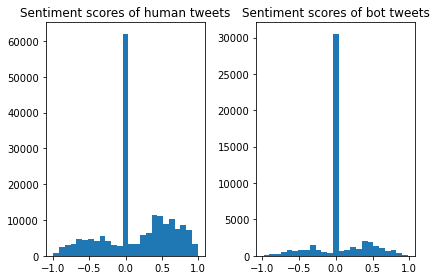

In [8]:
print(human_tweets["sentiment_score"].describe())
print(bot_tweets["sentiment_score"].describe())

n_bins = 25

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(human_tweets['sentiment_score'], bins=n_bins)
axs[0].set_title("Sentiment scores of human tweets")
axs[1].hist(bot_tweets['sentiment_score'], bins=n_bins)
axs[1].set_title("Sentiment scores of bot tweets")
plt.show()

In [36]:
def calculateAverageSentiment(users, tweets):
    curr_ID = users['ID'][0]
    user_index = 0
    tweet_count = 0
    sentiment_count = 0.0

    users['Average_Tweet_Sentiment'] = 0.0
    for index, tweet in tweets.iterrows():
        if curr_ID != tweet['User_ID']:
            if tweet_count != 0:
                users['Average_Tweet_Sentiment'][user_index] = sentiment_count / tweet_count
            user_index += 1
            tweet_count = 0
            sentiment_count = 0
            curr_ID = tweet['User_ID']
        tweet_count += 1
        sentiment_count += tweet['sentiment_score']

    if tweet_count != 0:
        users['Average_Tweet_Sentiment'][user_index] = sentiment_count / tweet_count
    
    return users

In [37]:
human_users = calculateAverageSentiment(human_users, human_tweets)
bot_users = calculateAverageSentiment(bot_users, bot_tweets)

/tmp/ipykernel_4210/2176482200.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Average_Tweet_Sentiment'][user_index] = sentiment_count / tweet_count
/tmp/ipykernel_4210/2176482200.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Average_Tweet_Sentiment'][user_index] = sentiment_count / tweet_count


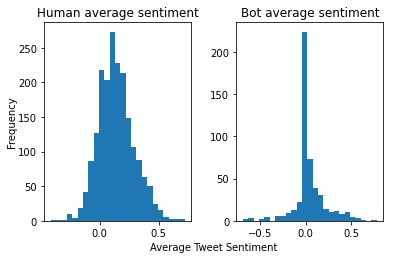

In [205]:
n_bins = 25

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(human_users['Average_Tweet_Sentiment'], bins=n_bins)
axs[0].set_title('Human average sentiment')
axs[1].hist(bot_users['Average_Tweet_Sentiment'], bins=n_bins)
axs[1].set_title('Bot average sentiment')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Average Tweet Sentiment')
plt.ylabel('Frequency')
plt.show()

# Patterns in posting history

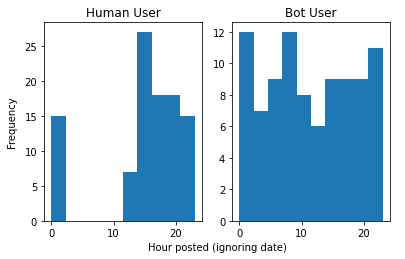

In [9]:
fig, axes = plt.subplots(1, 2, tight_layout=True)

index = 0
id = human_tweets['User_ID'][index]
firstTime = []

while (human_tweets['User_ID'][index] == id) :
    time = human_tweets['Date'][index].hour
    firstTime.append(time)
    index = index + 1

axes[0].hist(firstTime)
axes[0].set_title('Human User')

id = bot_tweets['User_ID'][index]
firstTime = []

while (bot_tweets['User_ID'][index] == id) :
    time = bot_tweets['Date'][index].hour
    firstTime.append(time)
    index = index + 1

axes[1].hist(firstTime)
axes[1].set_title('Bot User')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Hour posted (ignoring date)')
plt.ylabel('Frequency')

plt.show()


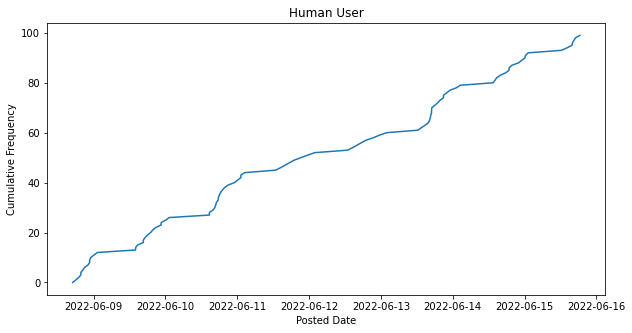

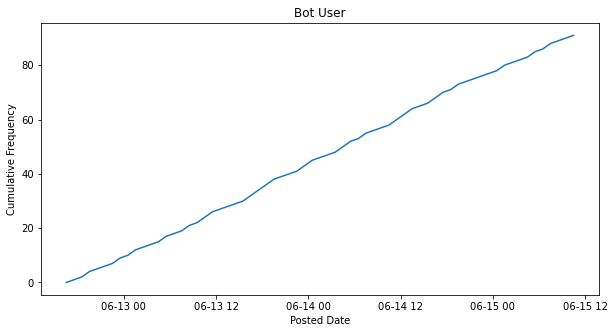

In [10]:
index = 0
id = human_tweets['User_ID'][index]
firstTime = []

while (human_tweets['User_ID'][index] == id) :
    time = human_tweets['Date'][index]
    firstTime.append(time)
    index = index + 1

plt.figure(figsize=(10,5)) 
plt.plot(firstTime[::-1], range(0, len(firstTime)))
plt.title('Human User')
plt.xlabel('Posted Date')
plt.ylabel('Cumulative Frequency')
plt.show()

id = bot_tweets['User_ID'][index]
firstTime = []

while (bot_tweets['User_ID'][index] == id) :
    time = bot_tweets['Date'][index]
    firstTime.append(time)
    index = index + 1

plt.figure(figsize=(10,5)) 
plt.plot(firstTime[::-1], range(0, len(firstTime)))
plt.title('Bot User')
plt.xlabel('Posted Date')
plt.ylabel('Cumulative Frequency')
plt.show()


There's gotta be a statistic for measuring this segmentation/clustering besides standard deviation. <br />
Needs to consider that hour 23 and hour 0 are right next to each other in reality.
would it be better to record tweets since a point in time instead of x amount of tweets?

[(Timestamp('2022-06-08 17:00:00', freq='H'), 1), (Timestamp('2022-06-08 18:00:00', freq='H'), 1), (Timestamp('2022-06-08 19:00:00', freq='H'), 1), (Timestamp('2022-06-08 20:00:00', freq='H'), 3), (Timestamp('2022-06-08 21:00:00', freq='H'), 1), (Timestamp('2022-06-08 22:00:00', freq='H'), 1), (Timestamp('2022-06-08 23:00:00', freq='H'), 3), (Timestamp('2022-06-09 00:00:00', freq='H'), 1), (Timestamp('2022-06-09 01:00:00', freq='H'), 1), (Timestamp('2022-06-09 02:00:00', freq='H'), 0), (Timestamp('2022-06-09 03:00:00', freq='H'), 0), (Timestamp('2022-06-09 04:00:00', freq='H'), 0), (Timestamp('2022-06-09 05:00:00', freq='H'), 0), (Timestamp('2022-06-09 06:00:00', freq='H'), 0), (Timestamp('2022-06-09 07:00:00', freq='H'), 0), (Timestamp('2022-06-09 08:00:00', freq='H'), 0), (Timestamp('2022-06-09 09:00:00', freq='H'), 0), (Timestamp('2022-06-09 10:00:00', freq='H'), 0), (Timestamp('2022-06-09 11:00:00', freq='H'), 0), (Timestamp('2022-06-09 12:00:00', freq='H'), 0), (Timestamp('2022-06

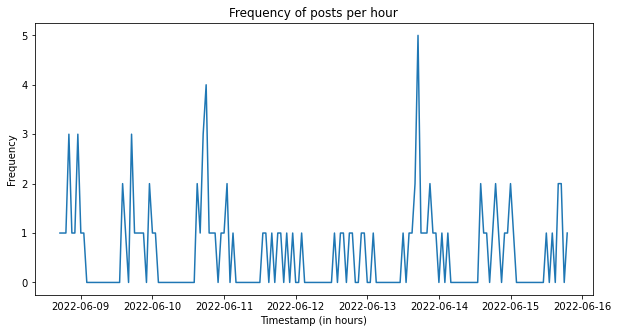

In [71]:
all_tweets = human_tweets
index = 0
id = all_tweets['User_ID'][index]
tweets_of_user = []

while (all_tweets['User_ID'][index] == id) :
    tweets_of_user.append(all_tweets['Date'][index].round('H'))
    index = index + 1

hour_range = pd.date_range(min(tweets_of_user).floor('h'), max(tweets_of_user).ceil('h'), freq = 'h')
unique_hours = dict.fromkeys(hour_range, 0)

curr_hour = tweets_of_user[0]
tweet_count = 0

for time in tweets_of_user:
    if curr_hour != time:
        unique_hours.update({curr_hour: tweet_count})
        tweet_count = 0
        curr_hour = time
    tweet_count += 1
    
if tweet_count != 0:
    unique_hours.update({curr_hour: tweet_count})

df = pd.DataFrame(list(unique_hours.items()), columns=['Hour', 'Frequency'])

plt.figure(figsize=(10,5)) 
plt.title('Frequency of posts per hour')
plt.xlabel('Timestamp (in hours)')
plt.ylabel('Frequency')
plt.plot(df['Hour'], df['Frequency'])

In [83]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

def bin_posting_history(tweets):
    tweets_of_user = []

    #round time stamps
    for index, tweet in tweets.iterrows():
        tweets_of_user.append(tweet['Date'].round('H'))
        
    #create bins
    hour_range = pd.date_range(min(tweets_of_user).floor('h'), max(tweets_of_user).ceil('h'), freq = 'h')
    unique_hours = dict.fromkeys(hour_range, 0)

    curr_hour = tweets_of_user[0]
    tweet_count = 0

    for time in tweets_of_user:
        if curr_hour != time:
            unique_hours.update({curr_hour: tweet_count})
            tweet_count = 0
            curr_hour = time
        tweet_count += 1

    if tweet_count != 0:
        unique_hours.update({curr_hour: tweet_count})

    return pd.DataFrame(list(unique_hours.items()), columns=['Hour', 'Frequency'])

def autocorrelation_posting_history(all_users, all_tweets):
    acf_values = []
    for index, user in all_users.iterrows():
        acf_values.append(bin_posting_history(all_tweets[all_tweets['User_ID'] == user['ID']]))
    all_users = all_users.assign(acf=acf_values)
    return all_users

human_users = autocorrelation_posting_history(human_users, human_tweets)
bot_users = autocorrelation_posting_history(bot_users, bot_tweets)

In [92]:
print(human_users.head(5))

          ID                                                acf
0   54619276                     Hour  Frequency
0   2022-06...
1  948891169                      Hour  Frequency
0    2022-...
2   26042984                       Hour  Frequency
0     202...
3    8283682                     Hour  Frequency
0   2022-05...
4  311062620                     Hour  Frequency
0   2022-06...


/home/austinteng/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/austinteng/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


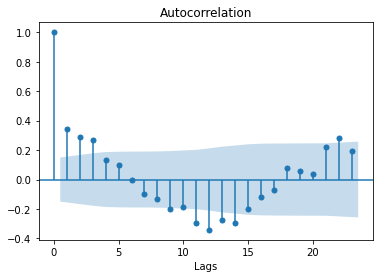

In [17]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

sm.tsa.acf(human_users['acf]'['Frequency'])

fig = tsaplots.plot_acf(h_df['Frequency'])
plt.xlabel('Lags')
plt.show()

# Statistical Tests

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def generate_distribution_histogram(dataframe, 
                                    column_name, 
                                    title, x_axis_label, y_axis_label,
                                    label_name,
                                    number_bins = 15):
    """
    This function generates a histogram.
    Args:
        dataframe:
        column_name: String. Name of the column whose distribution we
        want to visualize.
        title: String. Title of the histogram.
        x_axis_label: String. X-axis label.
        y_axis_label: String. Y-axis label.
    Outputs:
        Histogram containing distribution for specific column column_name.
    """
    plt.hist(dataframe[column_name], bins = number_bins, label = label_name)
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.legend(loc='upper right')
    
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. First distribution that we want to compare.
       distribution_2: List. Second distribution that we want to compare.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float. p-value for the test.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    #Print the results
    print('U-Statistic: ', u_statistic)
    print('p-value: ', p_value)
    return u_statistic, p_value

U-Statistic:  768857.0
p-value:  1.9475937610398338e-93


(768857.0, 1.9475937610398338e-93)

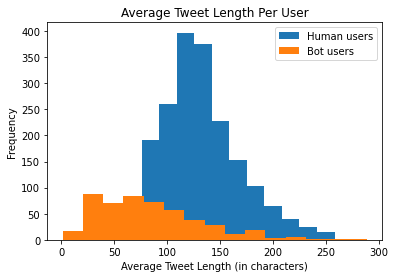

In [42]:
generate_distribution_histogram(human_users, 'Average_Tweet_Length',
                               title = 'Average Tweet Length Per User',
                               x_axis_label = 'Average Tweet Length (in characters)',
                               y_axis_label = 'Frequency',
                               label_name = 'Human users')
generate_distribution_histogram(bot_users, 'Average_Tweet_Length',
                               title = 'Average Tweet Length Per User',
                               x_axis_label = 'Average Tweet Length (in characters)',
                               y_axis_label = 'Frequency',
                               label_name = 'Bot users')
mann_whitney_u_test(list(human_users['Average_Tweet_Length']), list(bot_users['Average_Tweet_Length']))

U-Statistic:  385366.0
p-value:  2.7553189826743513e-12


(385366.0, 2.7553189826743513e-12)

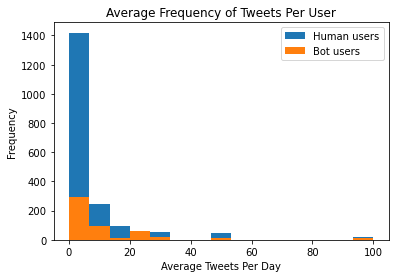

In [43]:
generate_distribution_histogram(human_users, 'Average_Tweets_Per_Day',
                               title = 'Average Frequency of Tweets Per User',
                               x_axis_label = 'Average Tweets Per Day',
                               y_axis_label = 'Frequency',
                               label_name = 'Human users')
generate_distribution_histogram(bot_users, 'Average_Tweets_Per_Day',
                               title = 'Average Frequency of Tweets Per User',
                               x_axis_label = 'Average Tweets Per Day',
                               y_axis_label = 'Frequency',
                               label_name = 'Bot users')
mann_whitney_u_test(list(human_users['Average_Tweets_Per_Day']), list(bot_users['Average_Tweets_Per_Day']))

U-Statistic:  669809.0
p-value:  4.445664328778359e-41


(669809.0, 4.445664328778359e-41)

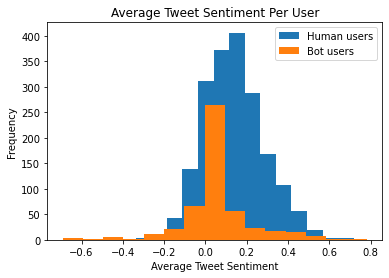

In [47]:
generate_distribution_histogram(human_users, 'Average_Tweet_Sentiment',
                               title = 'Average Tweet Sentiment Per User',
                               x_axis_label = 'Average Tweet Sentiment',
                               y_axis_label = 'Frequency',
                               label_name = 'Human users')
generate_distribution_histogram(bot_users, 'Average_Tweet_Sentiment',
                               title = 'Average Tweet Sentiment Per User',
                               x_axis_label = 'Average Tweet Sentiment',
                               y_axis_label = 'Frequency',
                               label_name = 'Bot users')
mann_whitney_u_test(list(human_users['Average_Tweet_Sentiment']), list(bot_users['Average_Tweet_Sentiment']))

In [187]:
bot_users.head(5)

ID  Average_Tweet_Length  Average_Tweets_Per_Day  \
0  1120973992754581509                    68                       2   
1   999622983424598016                   227                      25   
2  1118951206448181248                   172                       6   
3  1114680860983214081                    23                      20   
4  1028578680187052032                   192                       5   

   Average_Tweet_Sentiment  
0                 0.194072  
1                 0.000000  
2                 0.127919  
3                 0.004939  
4                 0.000000

Min Bot = @ANWarriorBot - Generates posts of America Ninja Warrior contestants that are unfortunately doomed to fail <br />
Max Bot = @FixmeBot - Kindly requests people to fix lacking wikipedia posts <br />
Min Human = @Netwerk24 - German news station? <br />
Max Human = @timsilfies - A person with one tweet? <br />

# User Information WIP

In [11]:
import urllib3
from lxml.html import parse

#returns list(retweet users),list(favorite users) for a given screen_name and status_id
def get_twitter_user_rts_and_favs(screen_name, status_id):
    url = urllib3.urlopen('https://twitter.com/' + screen_name + '/status/' + status_id)
    root = parse(url).getroot()

    num_rts = 0
    num_favs = 0
    rt_users = []
    fav_users = []

    for ul in root.find_class('stats'):
        for li in ul.cssselect('li'):

            cls_name = li.attrib['class']

            if cls_name.find('retweet') >= 0:
                num_rts = int(li.cssselect('a')[0].attrib['data-tweet-stat-count'])

            elif cls_name.find('favorit') >= 0:
                num_favs = int(li.cssselect('a')[0].attrib['data-tweet-stat-count'])

            elif cls_name.find('avatar') >= 0 or cls_name.find('face-pile') >= 0:#else face-plant

                for users in li.cssselect('a'):
                    #apparently, favs are listed before retweets, but the retweet summary's listed before the fav summary
                    #if in doubt you can take the difference of returned uids here with retweet uids from the official api
                    if num_favs > 0:#num_rt > 0:
                        #num_rts -= 1
                        num_favs -= 1
                        #rt_users.append(users.attrib['data-user-id'])
                        fav_users.append(users.attrib['data-user-id'])
                    else:                        
                        #fav_users.append(users.attrib['data-user-id'])
                        rt_users.append(users.attrib['data-user-id'])

        return rt_users, fav_users

In [13]:
def get_twitter_user_rts_and_favs(screen_name, status_id):
    http = urllib3.PoolManager()

In [15]:
http = urllib3.PoolManager()
r = http.request('GET', 'https://twitter.com/ithinkitsk8idk/status/1539507739268874241')
r.data

b'<!DOCTYPE html>\n<html dir="ltr" lang="en">\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" /><link rel="preconnect" href="//abs.twimg.com" /><link rel="dns-prefetch" href="//abs.twimg.com" /><link rel="preconnect" href="//api.twitter.com" /><link rel="dns-prefetch" href="//api.twitter.com" /><link rel="preconnect" href="//pbs.twimg.com" /><link rel="dns-prefetch" href="//pbs.twimg.com" /><link rel="preconnect" href="//t.co" /><link rel="dns-prefetch" href="//t.co" /><link rel="preconnect" href="//video.twimg.com" /><link rel="dns-prefetch" href="//video.twimg.com" /><link rel="preload" as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/polyfills.5d5e8428.js" nonce="MjY5NzU2ODgtNzNkYS00NzVlLWFmY2QtY2VlNzg5OWJhNjUy" /><link rel="preload" as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/vendors~mai

In [12]:
get_twitter_user_rts_and_favs("ithinkitsk8idk", "1539378137900929024")

AttributeError: module 'urllib3' has no attribute 'urlopen'

# Personal food for thought

**Some tweets may not be in English!**


https://www.quora.com/How-do-you-know-if-a-user-is-a-real-person-or-an-AI-bot-on-social-media?share=1

Should I target a specific type of bot?

Engagement? <br />
Search through liked by or retweeted by list on a tweet and determine how many of those accounts were sus <br />
API only allows most recent 100 retweets and 100 likes for tweets <br />
    * Web scraper may be possible instead

Narrative? <br />
Identify based on text? <br />
Network of fake engagement? <br />
Based purely on timings <br />